In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn as sk
from keras.models import load_model

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/NaturalGas_df.csv')
df

,Date,Close,Open,High,Low,7 Days SMA,7 Days STD,7 Days SMA +2STD,7 Days SMA -2STD,Cumulative Change Sum,14 Days EMA,MACD,ATR
0,2013-01-22,3.558,3.572,3.645,3.505,3.46,0.09,3.64,3.28,9.89,3.38,0.07,0.128
1,2013-01-23,3.554,3.573,3.596,3.512,3.49,0.07,3.63,3.35,9.78,3.41,0.08,0.125
2,2013-01-24,3.446,3.570,3.592,3.441,3.50,0.06,3.62,3.38,6.74,3.41,0.08,0.127
3,2013-01-25,3.444,3.452,3.480,3.411,3.50,0.06,3.62,3.38,6.68,3.42,0.07,0.123
4,2013-01-28,3.289,3.392,3.396,3.267,3.48,0.10,3.68,3.28,2.18,3.40,0.06,0.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2023-11-13,3.197,3.064,3.246,3.061,3.19,0.17,3.53,2.85,133.04,3.19,0.04,0.166
2648,2023-11-14,3.106,3.233,3.264,3.086,3.13,0.08,3.29,2.97,130.19,3.18,0.03,0.167
2649,2023-11-15,3.362,3.316,3.448,3.269,3.14,0.11,3.36,2.92,138.43,3.20,0.05,0.179
2650,2023-11-16,3.239,3.326,3.407,3.188,3.15,0.12,3.39,2.91,134.77,3.21,0.04,0.182


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/NaturalGas_test_df.csv')
df_test

,Date,Close
0,2023-11-20,2.882
1,2023-11-21,2.846
2,2023-11-22,2.897
3,2023-11-23,2.930
4,2023-11-24,2.855
5,2023-11-27,2.794
6,2023-11-28,2.706
7,2023-11-29,2.804
8,2023-11-30,2.802
9,2023-12-01,2.773


In [ ]:
train_len = int(len(df)*0.85)
train_len

2254

## Tylko ceny zamknięcia

### Przygotowanie danych wejściowych do modelu

In [ ]:
df_close = df[['Close']]
df_close

,Close
Date,
2013-01-22,3.558
2013-01-23,3.554
2013-01-24,3.446
2013-01-25,3.444
2013-01-28,3.289
...,...
2023-11-13,3.197
2023-11-14,3.106
2023-11-15,3.362


In [ ]:
df_train_close = df_close[:train_len]
df_val_close = df_close[train_len:]

In [ ]:
df_train_close_scaled = df_train_close.copy()
df_val_close_scaled = df_val_close.copy()

In [ ]:
scaler_close = sk.preprocessing.MinMaxScaler(feature_range=(0, 1))

In [ ]:
df_train_close_scaled[df_train_close_scaled.columns] = scaler_close.fit_transform(df_train_close_scaled[df_train_close_scaled.columns])
df_train_close_scaled

,Close
Date,
2013-01-22,0.509448
2013-01-23,0.508466
2013-01-24,0.481963
2013-01-25,0.481472
2013-01-28,0.443436
...,...
2021-08-20,0.581350
2021-08-23,0.604417
2021-08-24,0.592393


In [ ]:
df_val_close_scaled[df_val_close_scaled.columns] = scaler_close.transform(df_val_close_scaled[df_val_close_scaled.columns])
df_val_close_scaled

,Close
Date,
2021-08-27,0.708712
2021-08-30,0.692761
2021-08-31,0.710429
2021-09-01,0.768834
2021-09-02,0.775215
...,...
2023-11-13,0.420859
2023-11-14,0.398528
2023-11-15,0.461350


In [ ]:
def train_val_close(dataframe, days):
  input = dataframe['Close'].values
  X_input = []
  y_input = []
  for i in range(days, len(input)):
    X_input.append(input[i-days:i])
    y_input.append(input[i])

  X_input, y_input = np.array(X_input), np.array(y_input)
  X_input = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))
  return X_input, y_input

In [ ]:
X_train_close, y_train_close = train_val_close(df_train_close_scaled, 14)
X_val_close, y_val_close = train_val_close(df_val_close_scaled, 14)

In [ ]:
X_train_close.shape

(2240, 14, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/Rekurencyjnie/Close_only/Modele')

In [ ]:
units = [16,32,64]
batch_size=[32,64,128]
dropout=[0.0,0.2,0.5]

### 100 Epochs

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_100_days_14_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(1))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=100, batch_size=batch, verbose=2)
      model.save(name)
      del model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
70/70 - 3s - 46ms/step - loss: 0.0221
Epoch 2/100
70/70 - 1s - 8ms/step - loss: 0.0024
Epoch 3/100
70/70 - 1s - 9ms/step - loss: 0.0021
Epoch 4/100
70/70 - 1s - 10ms/step - loss: 0.0021
Epoch 5/100
70/70 - 1s - 20ms/step - loss: 0.0020
Epoch 6/100
70/70 - 1s - 12ms/step - loss: 0.0019
Epoch 7/100
70/70 - 1s - 18ms/step - loss: 0.0017
Epoch 8/100
70/70 - 1s - 14ms/step - loss: 0.0016
Epoch 9/100
70/70 - 1s - 9ms/step - loss: 0.0014
Epoch 10/100
70/70 - 1s - 8ms/step - loss: 0.0013
Epoch 11/100
70/70 - 1s - 8ms/step - loss: 0.0012
Epoch 12/100
70/70 - 1s - 9ms/step - loss: 0.0011
Epoch 13/100
70/70 - 1s - 9ms/step - loss: 0.0012
Epoch 14/100
70/70 - 1s - 8ms/step - loss: 0.0011
Epoch 15/100
70/70 - 1s - 9ms/step - loss: 0.0010
Epoch 16/100
70/70 - 1s - 8ms/step - loss: 9.7492e-04
Epoch 17/100
70/70 - 1s - 8ms/step - loss: 9.5942e-04
Epoch 18/100
70/70 - 1s - 9ms/step - loss: 9.0497e-04
Epoch 19/100
70/70 - 1s - 8ms/step - loss: 9.1863e-04
Epoch 20/100
70/70 - 1s - 8ms/step - 

Epoch 1/100
70/70 - 4s - 51ms/step - loss: 0.0345
Epoch 2/100
70/70 - 1s - 18ms/step - loss: 0.0198
Epoch 3/100
70/70 - 1s - 18ms/step - loss: 0.0171
Epoch 4/100
70/70 - 1s - 13ms/step - loss: 0.0140
Epoch 5/100
70/70 - 1s - 9ms/step - loss: 0.0108
Epoch 6/100
70/70 - 1s - 8ms/step - loss: 0.0086
Epoch 7/100
70/70 - 1s - 8ms/step - loss: 0.0076
Epoch 8/100
70/70 - 1s - 9ms/step - loss: 0.0084
Epoch 9/100
70/70 - 1s - 9ms/step - loss: 0.0081
Epoch 10/100
70/70 - 1s - 9ms/step - loss: 0.0088
Epoch 11/100
70/70 - 1s - 9ms/step - loss: 0.0084
Epoch 12/100
70/70 - 1s - 9ms/step - loss: 0.0080
Epoch 13/100
70/70 - 1s - 9ms/step - loss: 0.0078
Epoch 14/100
70/70 - 1s - 9ms/step - loss: 0.0085
Epoch 15/100
70/70 - 1s - 8ms/step - loss: 0.0081
Epoch 16/100
70/70 - 1s - 8ms/step - loss: 0.0078
Epoch 17/100
70/70 - 1s - 8ms/step - loss: 0.0073
Epoch 18/100
70/70 - 1s - 8ms/step - loss: 0.0076
Epoch 19/100
70/70 - 1s - 9ms/step - loss: 0.0079
Epoch 20/100
70/70 - 1s - 8ms/step - loss: 0.0074
Epoch

Epoch 1/100
70/70 - 3s - 49ms/step - loss: 0.0467
Epoch 2/100
70/70 - 1s - 8ms/step - loss: 0.0250
Epoch 3/100
70/70 - 1s - 9ms/step - loss: 0.0212
Epoch 4/100
70/70 - 1s - 8ms/step - loss: 0.0194
Epoch 5/100
70/70 - 1s - 9ms/step - loss: 0.0192
Epoch 6/100
70/70 - 1s - 9ms/step - loss: 0.0191
Epoch 7/100
70/70 - 1s - 9ms/step - loss: 0.0183
Epoch 8/100
70/70 - 1s - 9ms/step - loss: 0.0179
Epoch 9/100
70/70 - 1s - 8ms/step - loss: 0.0182
Epoch 10/100
70/70 - 1s - 8ms/step - loss: 0.0178
Epoch 11/100
70/70 - 1s - 9ms/step - loss: 0.0186
Epoch 12/100
70/70 - 1s - 8ms/step - loss: 0.0176
Epoch 13/100
70/70 - 1s - 11ms/step - loss: 0.0181
Epoch 14/100
70/70 - 1s - 20ms/step - loss: 0.0178
Epoch 15/100
70/70 - 1s - 13ms/step - loss: 0.0181
Epoch 16/100
70/70 - 1s - 13ms/step - loss: 0.0181
Epoch 17/100
70/70 - 1s - 14ms/step - loss: 0.0175
Epoch 18/100
70/70 - 1s - 8ms/step - loss: 0.0167
Epoch 19/100
70/70 - 1s - 8ms/step - loss: 0.0178
Epoch 20/100
70/70 - 1s - 8ms/step - loss: 0.0174
Epo

Epoch 1/100
35/35 - 3s - 88ms/step - loss: 0.0305
Epoch 2/100
35/35 - 1s - 17ms/step - loss: 0.0041
Epoch 3/100
35/35 - 0s - 9ms/step - loss: 0.0022
Epoch 4/100
35/35 - 0s - 9ms/step - loss: 0.0020
Epoch 5/100
35/35 - 1s - 17ms/step - loss: 0.0020
Epoch 6/100
35/35 - 0s - 9ms/step - loss: 0.0020
Epoch 7/100
35/35 - 1s - 18ms/step - loss: 0.0019
Epoch 8/100
35/35 - 1s - 17ms/step - loss: 0.0019
Epoch 9/100
35/35 - 0s - 13ms/step - loss: 0.0019
Epoch 10/100
35/35 - 1s - 19ms/step - loss: 0.0019
Epoch 11/100
35/35 - 0s - 13ms/step - loss: 0.0018
Epoch 12/100
35/35 - 1s - 18ms/step - loss: 0.0018
Epoch 13/100
35/35 - 1s - 17ms/step - loss: 0.0017
Epoch 14/100
35/35 - 0s - 14ms/step - loss: 0.0017
Epoch 15/100
35/35 - 1s - 14ms/step - loss: 0.0016
Epoch 16/100
35/35 - 1s - 17ms/step - loss: 0.0016
Epoch 17/100
35/35 - 0s - 9ms/step - loss: 0.0015
Epoch 18/100
35/35 - 0s - 10ms/step - loss: 0.0015
Epoch 19/100
35/35 - 0s - 9ms/step - loss: 0.0015
Epoch 20/100
35/35 - 0s - 9ms/step - loss: 0.

Epoch 1/100
35/35 - 4s - 120ms/step - loss: 0.0748
Epoch 2/100
35/35 - 1s - 19ms/step - loss: 0.0199
Epoch 3/100
35/35 - 0s - 12ms/step - loss: 0.0189
Epoch 4/100
35/35 - 0s - 10ms/step - loss: 0.0185
Epoch 5/100
35/35 - 0s - 9ms/step - loss: 0.0166
Epoch 6/100
35/35 - 1s - 17ms/step - loss: 0.0166
Epoch 7/100
35/35 - 0s - 9ms/step - loss: 0.0167
Epoch 8/100
35/35 - 0s - 9ms/step - loss: 0.0144
Epoch 9/100
35/35 - 0s - 10ms/step - loss: 0.0140
Epoch 10/100
35/35 - 0s - 9ms/step - loss: 0.0130
Epoch 11/100
35/35 - 0s - 9ms/step - loss: 0.0122
Epoch 12/100
35/35 - 0s - 9ms/step - loss: 0.0114
Epoch 13/100
35/35 - 0s - 9ms/step - loss: 0.0107
Epoch 14/100
35/35 - 0s - 9ms/step - loss: 0.0102
Epoch 15/100
35/35 - 1s - 18ms/step - loss: 0.0082
Epoch 16/100
35/35 - 0s - 10ms/step - loss: 0.0093
Epoch 17/100
35/35 - 1s - 18ms/step - loss: 0.0086
Epoch 18/100
35/35 - 1s - 17ms/step - loss: 0.0084
Epoch 19/100
35/35 - 0s - 9ms/step - loss: 0.0077
Epoch 20/100
35/35 - 0s - 9ms/step - loss: 0.008

Epoch 1/100
35/35 - 4s - 108ms/step - loss: 0.0591
Epoch 2/100
35/35 - 1s - 18ms/step - loss: 0.0295
Epoch 3/100
35/35 - 1s - 18ms/step - loss: 0.0272
Epoch 4/100
35/35 - 1s - 17ms/step - loss: 0.0261
Epoch 5/100
35/35 - 0s - 9ms/step - loss: 0.0231
Epoch 6/100
35/35 - 0s - 9ms/step - loss: 0.0212
Epoch 7/100
35/35 - 0s - 9ms/step - loss: 0.0198
Epoch 8/100
35/35 - 0s - 10ms/step - loss: 0.0194
Epoch 9/100
35/35 - 0s - 10ms/step - loss: 0.0199
Epoch 10/100
35/35 - 0s - 10ms/step - loss: 0.0196
Epoch 11/100
35/35 - 0s - 10ms/step - loss: 0.0189
Epoch 12/100
35/35 - 0s - 9ms/step - loss: 0.0180
Epoch 13/100
35/35 - 0s - 11ms/step - loss: 0.0183
Epoch 14/100
35/35 - 1s - 15ms/step - loss: 0.0179
Epoch 15/100
35/35 - 0s - 14ms/step - loss: 0.0177
Epoch 16/100
35/35 - 1s - 15ms/step - loss: 0.0190
Epoch 17/100
35/35 - 1s - 14ms/step - loss: 0.0189
Epoch 18/100
35/35 - 1s - 18ms/step - loss: 0.0174
Epoch 19/100
35/35 - 1s - 19ms/step - loss: 0.0183
Epoch 20/100
35/35 - 1s - 18ms/step - loss:

Epoch 1/100
18/18 - 4s - 211ms/step - loss: 0.1174
Epoch 2/100
18/18 - 0s - 16ms/step - loss: 0.0163
Epoch 3/100
18/18 - 0s - 17ms/step - loss: 0.0090
Epoch 4/100
18/18 - 0s - 18ms/step - loss: 0.0052
Epoch 5/100
18/18 - 0s - 16ms/step - loss: 0.0030
Epoch 6/100
18/18 - 0s - 16ms/step - loss: 0.0025
Epoch 7/100
18/18 - 0s - 14ms/step - loss: 0.0025
Epoch 8/100
18/18 - 0s - 16ms/step - loss: 0.0024
Epoch 9/100
18/18 - 0s - 16ms/step - loss: 0.0024
Epoch 10/100
18/18 - 0s - 17ms/step - loss: 0.0024
Epoch 11/100
18/18 - 0s - 13ms/step - loss: 0.0023
Epoch 12/100
18/18 - 0s - 14ms/step - loss: 0.0023
Epoch 13/100
18/18 - 0s - 16ms/step - loss: 0.0023
Epoch 14/100
18/18 - 0s - 14ms/step - loss: 0.0023
Epoch 15/100
18/18 - 0s - 16ms/step - loss: 0.0022
Epoch 16/100
18/18 - 0s - 14ms/step - loss: 0.0022
Epoch 17/100
18/18 - 0s - 17ms/step - loss: 0.0022
Epoch 18/100
18/18 - 0s - 15ms/step - loss: 0.0021
Epoch 19/100
18/18 - 0s - 14ms/step - loss: 0.0021
Epoch 20/100
18/18 - 0s - 16ms/step - l

Epoch 1/100
18/18 - 3s - 191ms/step - loss: 0.1355
Epoch 2/100
18/18 - 0s - 13ms/step - loss: 0.0281
Epoch 3/100
18/18 - 0s - 17ms/step - loss: 0.0215
Epoch 4/100
18/18 - 0s - 24ms/step - loss: 0.0192
Epoch 5/100
18/18 - 0s - 22ms/step - loss: 0.0182
Epoch 6/100
18/18 - 1s - 34ms/step - loss: 0.0185
Epoch 7/100
18/18 - 0s - 21ms/step - loss: 0.0180
Epoch 8/100
18/18 - 1s - 34ms/step - loss: 0.0176
Epoch 9/100
18/18 - 0s - 22ms/step - loss: 0.0166
Epoch 10/100
18/18 - 0s - 21ms/step - loss: 0.0170
Epoch 11/100
18/18 - 1s - 35ms/step - loss: 0.0153
Epoch 12/100
18/18 - 0s - 22ms/step - loss: 0.0172
Epoch 13/100
18/18 - 0s - 16ms/step - loss: 0.0161
Epoch 14/100
18/18 - 0s - 13ms/step - loss: 0.0146
Epoch 15/100
18/18 - 0s - 17ms/step - loss: 0.0158
Epoch 16/100
18/18 - 0s - 18ms/step - loss: 0.0160
Epoch 17/100
18/18 - 0s - 17ms/step - loss: 0.0159
Epoch 18/100
18/18 - 0s - 17ms/step - loss: 0.0147
Epoch 19/100
18/18 - 0s - 13ms/step - loss: 0.0140
Epoch 20/100
18/18 - 0s - 18ms/step - l

Epoch 1/100
18/18 - 3s - 194ms/step - loss: 0.0815
Epoch 2/100
18/18 - 0s - 13ms/step - loss: 0.0399
Epoch 3/100
18/18 - 0s - 17ms/step - loss: 0.0299
Epoch 4/100
18/18 - 0s - 15ms/step - loss: 0.0284
Epoch 5/100
18/18 - 0s - 15ms/step - loss: 0.0271
Epoch 6/100
18/18 - 0s - 17ms/step - loss: 0.0263
Epoch 7/100
18/18 - 0s - 16ms/step - loss: 0.0227
Epoch 8/100
18/18 - 0s - 17ms/step - loss: 0.0208
Epoch 9/100
18/18 - 0s - 16ms/step - loss: 0.0203
Epoch 10/100
18/18 - 0s - 14ms/step - loss: 0.0200
Epoch 11/100
18/18 - 0s - 16ms/step - loss: 0.0190
Epoch 12/100
18/18 - 0s - 17ms/step - loss: 0.0184
Epoch 13/100
18/18 - 0s - 12ms/step - loss: 0.0203
Epoch 14/100
18/18 - 0s - 18ms/step - loss: 0.0185
Epoch 15/100
18/18 - 0s - 17ms/step - loss: 0.0187
Epoch 16/100
18/18 - 0s - 13ms/step - loss: 0.0188
Epoch 17/100
18/18 - 0s - 13ms/step - loss: 0.0184
Epoch 18/100
18/18 - 0s - 17ms/step - loss: 0.0173
Epoch 19/100
18/18 - 0s - 19ms/step - loss: 0.0186
Epoch 20/100
18/18 - 0s - 13ms/step - l

Epoch 1/100
70/70 - 4s - 63ms/step - loss: 0.0186
Epoch 2/100
70/70 - 1s - 16ms/step - loss: 0.0021
Epoch 3/100
70/70 - 1s - 9ms/step - loss: 0.0020
Epoch 4/100
70/70 - 1s - 18ms/step - loss: 0.0019
Epoch 5/100
70/70 - 1s - 9ms/step - loss: 0.0018
Epoch 6/100
70/70 - 1s - 18ms/step - loss: 0.0017
Epoch 7/100
70/70 - 1s - 9ms/step - loss: 0.0015
Epoch 8/100
70/70 - 1s - 9ms/step - loss: 0.0014
Epoch 9/100
70/70 - 1s - 9ms/step - loss: 0.0013
Epoch 10/100
70/70 - 1s - 18ms/step - loss: 0.0012
Epoch 11/100
70/70 - 1s - 9ms/step - loss: 0.0012
Epoch 12/100
70/70 - 1s - 9ms/step - loss: 0.0011
Epoch 13/100
70/70 - 1s - 9ms/step - loss: 0.0010
Epoch 14/100
70/70 - 1s - 9ms/step - loss: 9.9439e-04
Epoch 15/100
70/70 - 1s - 13ms/step - loss: 9.6519e-04
Epoch 16/100
70/70 - 1s - 19ms/step - loss: 9.1443e-04
Epoch 17/100
70/70 - 1s - 14ms/step - loss: 8.4754e-04
Epoch 18/100
70/70 - 1s - 16ms/step - loss: 8.5413e-04
Epoch 19/100
70/70 - 1s - 15ms/step - loss: 8.4585e-04
Epoch 20/100
70/70 - 1s -

Epoch 1/100
70/70 - 3s - 49ms/step - loss: 0.0338
Epoch 2/100
70/70 - 2s - 23ms/step - loss: 0.0183
Epoch 3/100
70/70 - 1s - 15ms/step - loss: 0.0166
Epoch 4/100
70/70 - 1s - 18ms/step - loss: 0.0141
Epoch 5/100
70/70 - 1s - 15ms/step - loss: 0.0109
Epoch 6/100
70/70 - 1s - 11ms/step - loss: 0.0104
Epoch 7/100
70/70 - 1s - 17ms/step - loss: 0.0091
Epoch 8/100
70/70 - 1s - 9ms/step - loss: 0.0083
Epoch 9/100
70/70 - 1s - 9ms/step - loss: 0.0081
Epoch 10/100
70/70 - 1s - 17ms/step - loss: 0.0076
Epoch 11/100
70/70 - 1s - 9ms/step - loss: 0.0078
Epoch 12/100
70/70 - 1s - 10ms/step - loss: 0.0070
Epoch 13/100
70/70 - 1s - 9ms/step - loss: 0.0078
Epoch 14/100
70/70 - 1s - 9ms/step - loss: 0.0077
Epoch 15/100
70/70 - 1s - 10ms/step - loss: 0.0080
Epoch 16/100
70/70 - 1s - 10ms/step - loss: 0.0071
Epoch 17/100
70/70 - 1s - 17ms/step - loss: 0.0070
Epoch 18/100
70/70 - 2s - 25ms/step - loss: 0.0068
Epoch 19/100
70/70 - 1s - 17ms/step - loss: 0.0089
Epoch 20/100
70/70 - 1s - 18ms/step - loss: 0

Epoch 1/100
70/70 - 4s - 63ms/step - loss: 0.0392
Epoch 2/100
70/70 - 1s - 18ms/step - loss: 0.0235
Epoch 3/100
70/70 - 1s - 10ms/step - loss: 0.0193
Epoch 4/100
70/70 - 1s - 10ms/step - loss: 0.0203
Epoch 5/100
70/70 - 1s - 18ms/step - loss: 0.0183
Epoch 6/100
70/70 - 1s - 18ms/step - loss: 0.0188
Epoch 7/100
70/70 - 1s - 10ms/step - loss: 0.0186
Epoch 8/100
70/70 - 1s - 11ms/step - loss: 0.0190
Epoch 9/100
70/70 - 1s - 18ms/step - loss: 0.0182
Epoch 10/100
70/70 - 1s - 15ms/step - loss: 0.0178
Epoch 11/100
70/70 - 1s - 20ms/step - loss: 0.0173
Epoch 12/100
70/70 - 1s - 19ms/step - loss: 0.0185
Epoch 13/100
70/70 - 1s - 16ms/step - loss: 0.0173
Epoch 14/100
70/70 - 1s - 12ms/step - loss: 0.0185
Epoch 15/100
70/70 - 1s - 18ms/step - loss: 0.0184
Epoch 16/100
70/70 - 1s - 18ms/step - loss: 0.0173
Epoch 17/100
70/70 - 1s - 18ms/step - loss: 0.0173
Epoch 18/100
70/70 - 1s - 11ms/step - loss: 0.0184
Epoch 19/100
70/70 - 1s - 11ms/step - loss: 0.0176
Epoch 20/100
70/70 - 1s - 18ms/step - lo

Epoch 1/100
35/35 - 5s - 145ms/step - loss: 0.0370
Epoch 2/100
35/35 - 0s - 13ms/step - loss: 0.0036
Epoch 3/100
35/35 - 1s - 17ms/step - loss: 0.0021
Epoch 4/100
35/35 - 0s - 13ms/step - loss: 0.0020
Epoch 5/100
35/35 - 1s - 17ms/step - loss: 0.0020
Epoch 6/100
35/35 - 1s - 18ms/step - loss: 0.0020
Epoch 7/100
35/35 - 1s - 17ms/step - loss: 0.0019
Epoch 8/100
35/35 - 1s - 39ms/step - loss: 0.0019
Epoch 9/100
35/35 - 1s - 37ms/step - loss: 0.0018
Epoch 10/100
35/35 - 1s - 21ms/step - loss: 0.0017
Epoch 11/100
35/35 - 1s - 19ms/step - loss: 0.0018
Epoch 12/100
35/35 - 0s - 12ms/step - loss: 0.0017
Epoch 13/100
35/35 - 1s - 17ms/step - loss: 0.0017
Epoch 14/100
35/35 - 1s - 18ms/step - loss: 0.0016
Epoch 15/100
35/35 - 0s - 12ms/step - loss: 0.0015
Epoch 16/100
35/35 - 0s - 12ms/step - loss: 0.0014
Epoch 17/100
35/35 - 0s - 12ms/step - loss: 0.0013
Epoch 18/100
35/35 - 1s - 19ms/step - loss: 0.0014
Epoch 19/100
35/35 - 1s - 17ms/step - loss: 0.0013
Epoch 20/100
35/35 - 1s - 19ms/step - l

Epoch 1/100
35/35 - 4s - 108ms/step - loss: 0.0479
Epoch 2/100
35/35 - 0s - 11ms/step - loss: 0.0202
Epoch 3/100
35/35 - 0s - 12ms/step - loss: 0.0196
Epoch 4/100
35/35 - 0s - 13ms/step - loss: 0.0170
Epoch 5/100
35/35 - 0s - 12ms/step - loss: 0.0174
Epoch 6/100
35/35 - 0s - 12ms/step - loss: 0.0133
Epoch 7/100
35/35 - 0s - 13ms/step - loss: 0.0120
Epoch 8/100
35/35 - 1s - 18ms/step - loss: 0.0097
Epoch 9/100
35/35 - 1s - 17ms/step - loss: 0.0097
Epoch 10/100
35/35 - 1s - 18ms/step - loss: 0.0084
Epoch 11/100
35/35 - 0s - 13ms/step - loss: 0.0097
Epoch 12/100
35/35 - 1s - 18ms/step - loss: 0.0083
Epoch 13/100
35/35 - 1s - 16ms/step - loss: 0.0084
Epoch 14/100
35/35 - 0s - 14ms/step - loss: 0.0073
Epoch 15/100
35/35 - 0s - 14ms/step - loss: 0.0084
Epoch 16/100
35/35 - 1s - 23ms/step - loss: 0.0083
Epoch 17/100
35/35 - 1s - 39ms/step - loss: 0.0078
Epoch 18/100
35/35 - 1s - 24ms/step - loss: 0.0078
Epoch 19/100
35/35 - 1s - 22ms/step - loss: 0.0074
Epoch 20/100
35/35 - 1s - 21ms/step - l

Epoch 1/100
35/35 - 5s - 130ms/step - loss: 0.0561
Epoch 2/100
35/35 - 1s - 37ms/step - loss: 0.0284
Epoch 3/100
35/35 - 1s - 28ms/step - loss: 0.0267
Epoch 4/100
35/35 - 0s - 13ms/step - loss: 0.0242
Epoch 5/100
35/35 - 1s - 18ms/step - loss: 0.0220
Epoch 6/100
35/35 - 0s - 11ms/step - loss: 0.0200
Epoch 7/100
35/35 - 1s - 19ms/step - loss: 0.0182
Epoch 8/100
35/35 - 1s - 19ms/step - loss: 0.0190
Epoch 9/100
35/35 - 0s - 14ms/step - loss: 0.0201
Epoch 10/100
35/35 - 1s - 18ms/step - loss: 0.0185
Epoch 11/100
35/35 - 1s - 17ms/step - loss: 0.0186
Epoch 12/100
35/35 - 0s - 14ms/step - loss: 0.0189
Epoch 13/100
35/35 - 1s - 17ms/step - loss: 0.0176
Epoch 14/100
35/35 - 1s - 18ms/step - loss: 0.0177
Epoch 15/100
35/35 - 1s - 19ms/step - loss: 0.0181
Epoch 16/100
35/35 - 1s - 16ms/step - loss: 0.0174
Epoch 17/100
35/35 - 1s - 18ms/step - loss: 0.0177
Epoch 18/100
35/35 - 1s - 17ms/step - loss: 0.0179
Epoch 19/100
35/35 - 1s - 18ms/step - loss: 0.0179
Epoch 20/100
35/35 - 1s - 17ms/step - l

Epoch 1/100
18/18 - 4s - 209ms/step - loss: 0.0752
Epoch 2/100
18/18 - 0s - 18ms/step - loss: 0.0107
Epoch 3/100
18/18 - 0s - 19ms/step - loss: 0.0047
Epoch 4/100
18/18 - 0s - 17ms/step - loss: 0.0026
Epoch 5/100
18/18 - 0s - 17ms/step - loss: 0.0022
Epoch 6/100
18/18 - 0s - 18ms/step - loss: 0.0021
Epoch 7/100
18/18 - 1s - 34ms/step - loss: 0.0021
Epoch 8/100
18/18 - 1s - 44ms/step - loss: 0.0020
Epoch 9/100
18/18 - 1s - 28ms/step - loss: 0.0020
Epoch 10/100
18/18 - 1s - 33ms/step - loss: 0.0020
Epoch 11/100
18/18 - 1s - 30ms/step - loss: 0.0019
Epoch 12/100
18/18 - 0s - 27ms/step - loss: 0.0020
Epoch 13/100
18/18 - 1s - 28ms/step - loss: 0.0019
Epoch 14/100
18/18 - 1s - 34ms/step - loss: 0.0019
Epoch 15/100
18/18 - 0s - 27ms/step - loss: 0.0018
Epoch 16/100
18/18 - 0s - 16ms/step - loss: 0.0018
Epoch 17/100
18/18 - 0s - 16ms/step - loss: 0.0018
Epoch 18/100
18/18 - 0s - 17ms/step - loss: 0.0017
Epoch 19/100
18/18 - 0s - 17ms/step - loss: 0.0017
Epoch 20/100
18/18 - 0s - 16ms/step - l

Epoch 1/100
18/18 - 4s - 196ms/step - loss: 0.0756
Epoch 2/100
18/18 - 0s - 18ms/step - loss: 0.0226
Epoch 3/100
18/18 - 0s - 20ms/step - loss: 0.0207
Epoch 4/100
18/18 - 1s - 42ms/step - loss: 0.0200
Epoch 5/100
18/18 - 1s - 33ms/step - loss: 0.0197
Epoch 6/100
18/18 - 1s - 35ms/step - loss: 0.0194
Epoch 7/100
18/18 - 1s - 34ms/step - loss: 0.0191
Epoch 8/100
18/18 - 1s - 28ms/step - loss: 0.0183
Epoch 9/100
18/18 - 1s - 36ms/step - loss: 0.0183
Epoch 10/100
18/18 - 0s - 28ms/step - loss: 0.0167
Epoch 11/100
18/18 - 0s - 16ms/step - loss: 0.0165
Epoch 12/100
18/18 - 0s - 17ms/step - loss: 0.0150
Epoch 13/100
18/18 - 0s - 17ms/step - loss: 0.0151
Epoch 14/100
18/18 - 0s - 16ms/step - loss: 0.0150
Epoch 15/100
18/18 - 0s - 18ms/step - loss: 0.0151
Epoch 16/100
18/18 - 0s - 17ms/step - loss: 0.0149
Epoch 17/100
18/18 - 0s - 16ms/step - loss: 0.0141
Epoch 18/100
18/18 - 0s - 17ms/step - loss: 0.0128
Epoch 19/100
18/18 - 0s - 17ms/step - loss: 0.0111
Epoch 20/100
18/18 - 0s - 16ms/step - l

Epoch 1/100
18/18 - 4s - 212ms/step - loss: 0.0785
Epoch 2/100
18/18 - 1s - 38ms/step - loss: 0.0360
Epoch 3/100
18/18 - 1s - 39ms/step - loss: 0.0290
Epoch 4/100
18/18 - 1s - 33ms/step - loss: 0.0276
Epoch 5/100
18/18 - 1s - 35ms/step - loss: 0.0267
Epoch 6/100
18/18 - 1s - 33ms/step - loss: 0.0249
Epoch 7/100
18/18 - 1s - 36ms/step - loss: 0.0223
Epoch 8/100
18/18 - 1s - 28ms/step - loss: 0.0199
Epoch 9/100
18/18 - 0s - 24ms/step - loss: 0.0193
Epoch 10/100
18/18 - 0s - 17ms/step - loss: 0.0198
Epoch 11/100
18/18 - 0s - 19ms/step - loss: 0.0185
Epoch 12/100
18/18 - 0s - 18ms/step - loss: 0.0192
Epoch 13/100
18/18 - 1s - 34ms/step - loss: 0.0176
Epoch 14/100
18/18 - 1s - 34ms/step - loss: 0.0187
Epoch 15/100
18/18 - 1s - 34ms/step - loss: 0.0187
Epoch 16/100
18/18 - 0s - 18ms/step - loss: 0.0180
Epoch 17/100
18/18 - 1s - 33ms/step - loss: 0.0181
Epoch 18/100
18/18 - 0s - 17ms/step - loss: 0.0184
Epoch 19/100
18/18 - 0s - 18ms/step - loss: 0.0191
Epoch 20/100
18/18 - 0s - 19ms/step - l

Epoch 1/100
70/70 - 5s - 69ms/step - loss: 0.0153
Epoch 2/100
70/70 - 2s - 29ms/step - loss: 0.0020
Epoch 3/100
70/70 - 1s - 18ms/step - loss: 0.0019
Epoch 4/100
70/70 - 1s - 18ms/step - loss: 0.0017
Epoch 5/100
70/70 - 1s - 13ms/step - loss: 0.0016
Epoch 6/100
70/70 - 1s - 19ms/step - loss: 0.0014
Epoch 7/100
70/70 - 1s - 13ms/step - loss: 0.0014
Epoch 8/100
70/70 - 1s - 13ms/step - loss: 0.0013
Epoch 9/100
70/70 - 1s - 18ms/step - loss: 0.0011
Epoch 10/100
70/70 - 2s - 22ms/step - loss: 0.0012
Epoch 11/100
70/70 - 1s - 21ms/step - loss: 0.0011
Epoch 12/100
70/70 - 2s - 30ms/step - loss: 0.0010
Epoch 13/100
70/70 - 1s - 16ms/step - loss: 0.0010
Epoch 14/100
70/70 - 1s - 18ms/step - loss: 9.7022e-04
Epoch 15/100
70/70 - 1s - 12ms/step - loss: 8.9275e-04
Epoch 16/100
70/70 - 1s - 13ms/step - loss: 8.2737e-04
Epoch 17/100
70/70 - 1s - 13ms/step - loss: 7.6777e-04
Epoch 18/100
70/70 - 1s - 18ms/step - loss: 7.4770e-04
Epoch 19/100
70/70 - 1s - 12ms/step - loss: 7.7622e-04
Epoch 20/100
70/

Epoch 1/100
70/70 - 4s - 53ms/step - loss: 0.0272
Epoch 2/100
70/70 - 2s - 24ms/step - loss: 0.0187
Epoch 3/100
70/70 - 1s - 20ms/step - loss: 0.0127
Epoch 4/100
70/70 - 1s - 20ms/step - loss: 0.0098
Epoch 5/100
70/70 - 2s - 29ms/step - loss: 0.0098
Epoch 6/100
70/70 - 1s - 13ms/step - loss: 0.0088
Epoch 7/100
70/70 - 1s - 17ms/step - loss: 0.0085
Epoch 8/100
70/70 - 1s - 18ms/step - loss: 0.0082
Epoch 9/100
70/70 - 1s - 18ms/step - loss: 0.0079
Epoch 10/100
70/70 - 1s - 12ms/step - loss: 0.0075
Epoch 11/100
70/70 - 1s - 18ms/step - loss: 0.0077
Epoch 12/100
70/70 - 1s - 18ms/step - loss: 0.0079
Epoch 13/100
70/70 - 2s - 25ms/step - loss: 0.0083
Epoch 14/100
70/70 - 3s - 37ms/step - loss: 0.0074
Epoch 15/100
70/70 - 2s - 29ms/step - loss: 0.0075
Epoch 16/100
70/70 - 1s - 18ms/step - loss: 0.0080
Epoch 17/100
70/70 - 1s - 19ms/step - loss: 0.0088
Epoch 18/100
70/70 - 1s - 13ms/step - loss: 0.0078
Epoch 19/100
70/70 - 1s - 17ms/step - loss: 0.0068
Epoch 20/100
70/70 - 1s - 12ms/step - lo

Epoch 1/100
70/70 - 5s - 76ms/step - loss: 0.0397
Epoch 2/100
70/70 - 1s - 14ms/step - loss: 0.0234
Epoch 3/100
70/70 - 1s - 14ms/step - loss: 0.0205
Epoch 4/100
70/70 - 1s - 13ms/step - loss: 0.0189
Epoch 5/100
70/70 - 2s - 24ms/step - loss: 0.0184
Epoch 6/100
70/70 - 2s - 21ms/step - loss: 0.0190
Epoch 7/100
70/70 - 2s - 29ms/step - loss: 0.0181
Epoch 8/100
70/70 - 1s - 18ms/step - loss: 0.0182
Epoch 9/100
70/70 - 1s - 14ms/step - loss: 0.0174
Epoch 10/100
70/70 - 1s - 19ms/step - loss: 0.0183
Epoch 11/100
70/70 - 1s - 17ms/step - loss: 0.0185
Epoch 12/100
70/70 - 1s - 18ms/step - loss: 0.0182
Epoch 13/100
70/70 - 1s - 18ms/step - loss: 0.0186
Epoch 14/100
70/70 - 1s - 18ms/step - loss: 0.0178
Epoch 15/100
70/70 - 2s - 24ms/step - loss: 0.0174
Epoch 16/100
70/70 - 2s - 22ms/step - loss: 0.0173
Epoch 17/100
70/70 - 2s - 28ms/step - loss: 0.0181
Epoch 18/100
70/70 - 1s - 17ms/step - loss: 0.0170
Epoch 19/100
70/70 - 1s - 20ms/step - loss: 0.0188
Epoch 20/100
70/70 - 1s - 14ms/step - lo

Epoch 1/100
35/35 - 5s - 144ms/step - loss: 0.0295
Epoch 2/100
35/35 - 1s - 27ms/step - loss: 0.0025
Epoch 3/100
35/35 - 1s - 36ms/step - loss: 0.0019
Epoch 4/100
35/35 - 1s - 18ms/step - loss: 0.0019
Epoch 5/100
35/35 - 1s - 18ms/step - loss: 0.0018
Epoch 6/100
35/35 - 1s - 18ms/step - loss: 0.0017
Epoch 7/100
35/35 - 1s - 17ms/step - loss: 0.0016
Epoch 8/100
35/35 - 1s - 18ms/step - loss: 0.0015
Epoch 9/100
35/35 - 1s - 35ms/step - loss: 0.0015
Epoch 10/100
35/35 - 1s - 18ms/step - loss: 0.0014
Epoch 11/100
35/35 - 1s - 17ms/step - loss: 0.0013
Epoch 12/100
35/35 - 1s - 18ms/step - loss: 0.0013
Epoch 13/100
35/35 - 1s - 18ms/step - loss: 0.0012
Epoch 14/100
35/35 - 1s - 17ms/step - loss: 0.0012
Epoch 15/100
35/35 - 1s - 21ms/step - loss: 0.0012
Epoch 16/100
35/35 - 1s - 42ms/step - loss: 0.0012
Epoch 17/100
35/35 - 1s - 27ms/step - loss: 0.0011
Epoch 18/100
35/35 - 1s - 38ms/step - loss: 0.0011
Epoch 19/100
35/35 - 1s - 24ms/step - loss: 0.0011
Epoch 20/100
35/35 - 1s - 18ms/step - l

Epoch 1/100
35/35 - 4s - 105ms/step - loss: 0.0352
Epoch 2/100
35/35 - 1s - 42ms/step - loss: 0.0201
Epoch 3/100
35/35 - 1s - 36ms/step - loss: 0.0192
Epoch 4/100
35/35 - 1s - 30ms/step - loss: 0.0158
Epoch 5/100
35/35 - 1s - 32ms/step - loss: 0.0135
Epoch 6/100
35/35 - 1s - 37ms/step - loss: 0.0102
Epoch 7/100
35/35 - 1s - 34ms/step - loss: 0.0100
Epoch 8/100
35/35 - 1s - 17ms/step - loss: 0.0090
Epoch 9/100
35/35 - 1s - 19ms/step - loss: 0.0090
Epoch 10/100
35/35 - 1s - 35ms/step - loss: 0.0087
Epoch 11/100
35/35 - 1s - 19ms/step - loss: 0.0088
Epoch 12/100
35/35 - 1s - 18ms/step - loss: 0.0092
Epoch 13/100
35/35 - 1s - 18ms/step - loss: 0.0093
Epoch 14/100
35/35 - 1s - 17ms/step - loss: 0.0081
Epoch 15/100
35/35 - 1s - 17ms/step - loss: 0.0081
Epoch 16/100
35/35 - 1s - 22ms/step - loss: 0.0080
Epoch 17/100
35/35 - 1s - 41ms/step - loss: 0.0083
Epoch 18/100
35/35 - 1s - 36ms/step - loss: 0.0085
Epoch 19/100
35/35 - 1s - 30ms/step - loss: 0.0077
Epoch 20/100
35/35 - 1s - 32ms/step - l

Epoch 1/100
35/35 - 3s - 98ms/step - loss: 0.0542
Epoch 2/100
35/35 - 1s - 17ms/step - loss: 0.0285
Epoch 3/100
35/35 - 1s - 17ms/step - loss: 0.0275
Epoch 4/100
35/35 - 1s - 18ms/step - loss: 0.0232
Epoch 5/100
35/35 - 1s - 18ms/step - loss: 0.0201
Epoch 6/100
35/35 - 1s - 18ms/step - loss: 0.0189
Epoch 7/100
35/35 - 1s - 17ms/step - loss: 0.0187
Epoch 8/100
35/35 - 1s - 18ms/step - loss: 0.0190
Epoch 9/100
35/35 - 1s - 27ms/step - loss: 0.0181
Epoch 10/100
35/35 - 1s - 27ms/step - loss: 0.0196
Epoch 11/100
35/35 - 1s - 27ms/step - loss: 0.0197
Epoch 12/100
35/35 - 1s - 37ms/step - loss: 0.0189
Epoch 13/100
35/35 - 1s - 24ms/step - loss: 0.0185
Epoch 14/100
35/35 - 1s - 30ms/step - loss: 0.0187
Epoch 15/100
35/35 - 1s - 17ms/step - loss: 0.0180
Epoch 16/100
35/35 - 1s - 16ms/step - loss: 0.0174
Epoch 17/100
35/35 - 1s - 18ms/step - loss: 0.0187
Epoch 18/100
35/35 - 1s - 16ms/step - loss: 0.0196
Epoch 19/100
35/35 - 1s - 18ms/step - loss: 0.0185
Epoch 20/100
35/35 - 1s - 18ms/step - lo

Epoch 1/100
18/18 - 6s - 313ms/step - loss: 0.0353
Epoch 2/100
18/18 - 1s - 38ms/step - loss: 0.0061
Epoch 3/100
18/18 - 1s - 38ms/step - loss: 0.0029
Epoch 4/100
18/18 - 1s - 71ms/step - loss: 0.0020
Epoch 5/100
18/18 - 1s - 69ms/step - loss: 0.0020
Epoch 6/100
18/18 - 1s - 38ms/step - loss: 0.0019
Epoch 7/100
18/18 - 1s - 37ms/step - loss: 0.0019
Epoch 8/100
18/18 - 1s - 73ms/step - loss: 0.0019
Epoch 9/100
18/18 - 1s - 41ms/step - loss: 0.0018
Epoch 10/100
18/18 - 1s - 66ms/step - loss: 0.0018
Epoch 11/100
18/18 - 1s - 39ms/step - loss: 0.0018
Epoch 12/100
18/18 - 2s - 102ms/step - loss: 0.0017
Epoch 13/100
18/18 - 1s - 76ms/step - loss: 0.0017
Epoch 14/100
18/18 - 2s - 101ms/step - loss: 0.0017
Epoch 15/100
18/18 - 1s - 72ms/step - loss: 0.0016
Epoch 16/100
18/18 - 1s - 71ms/step - loss: 0.0016
Epoch 17/100
18/18 - 1s - 40ms/step - loss: 0.0015
Epoch 18/100
18/18 - 1s - 38ms/step - loss: 0.0015
Epoch 19/100
18/18 - 1s - 70ms/step - loss: 0.0014
Epoch 20/100
18/18 - 1s - 69ms/step -

Epoch 1/100
18/18 - 4s - 216ms/step - loss: 0.0451
Epoch 2/100
18/18 - 1s - 37ms/step - loss: 0.0213
Epoch 3/100
18/18 - 1s - 40ms/step - loss: 0.0184
Epoch 4/100
18/18 - 1s - 69ms/step - loss: 0.0178
Epoch 5/100
18/18 - 2s - 87ms/step - loss: 0.0182
Epoch 6/100
18/18 - 2s - 92ms/step - loss: 0.0187
Epoch 7/100
18/18 - 1s - 80ms/step - loss: 0.0172
Epoch 8/100
18/18 - 1s - 78ms/step - loss: 0.0148
Epoch 9/100
18/18 - 2s - 103ms/step - loss: 0.0134
Epoch 10/100
18/18 - 1s - 71ms/step - loss: 0.0131
Epoch 11/100
18/18 - 1s - 40ms/step - loss: 0.0115
Epoch 12/100
18/18 - 1s - 69ms/step - loss: 0.0100
Epoch 13/100
18/18 - 1s - 39ms/step - loss: 0.0101
Epoch 14/100
18/18 - 1s - 66ms/step - loss: 0.0089
Epoch 15/100
18/18 - 1s - 73ms/step - loss: 0.0085
Epoch 16/100
18/18 - 1s - 40ms/step - loss: 0.0078
Epoch 17/100
18/18 - 1s - 38ms/step - loss: 0.0085
Epoch 18/100
18/18 - 1s - 66ms/step - loss: 0.0088
Epoch 19/100
18/18 - 1s - 75ms/step - loss: 0.0089
Epoch 20/100
18/18 - 2s - 108ms/step -

Epoch 1/100
18/18 - 6s - 311ms/step - loss: 0.0667
Epoch 2/100
18/18 - 1s - 80ms/step - loss: 0.0322
Epoch 3/100
18/18 - 1s - 43ms/step - loss: 0.0300
Epoch 4/100
18/18 - 1s - 67ms/step - loss: 0.0270
Epoch 5/100
18/18 - 1s - 71ms/step - loss: 0.0258
Epoch 6/100
18/18 - 1s - 68ms/step - loss: 0.0256
Epoch 7/100
18/18 - 1s - 69ms/step - loss: 0.0216
Epoch 8/100
18/18 - 1s - 38ms/step - loss: 0.0204
Epoch 9/100
18/18 - 1s - 69ms/step - loss: 0.0196
Epoch 10/100
18/18 - 1s - 37ms/step - loss: 0.0186
Epoch 11/100
18/18 - 1s - 73ms/step - loss: 0.0193
Epoch 12/100
18/18 - 2s - 105ms/step - loss: 0.0184
Epoch 13/100
18/18 - 3s - 145ms/step - loss: 0.0189
Epoch 14/100
18/18 - 2s - 101ms/step - loss: 0.0182
Epoch 15/100
18/18 - 1s - 38ms/step - loss: 0.0180
Epoch 16/100
18/18 - 1s - 39ms/step - loss: 0.0186
Epoch 17/100
18/18 - 1s - 40ms/step - loss: 0.0193
Epoch 18/100
18/18 - 1s - 40ms/step - loss: 0.0186
Epoch 19/100
18/18 - 1s - 67ms/step - loss: 0.0190
Epoch 20/100
18/18 - 1s - 38ms/step 

Epoch 1/100
70/70 - 6s - 87ms/step - loss: 0.0089
Epoch 2/100
70/70 - 3s - 38ms/step - loss: 0.0018
Epoch 3/100
70/70 - 2s - 36ms/step - loss: 0.0017
Epoch 4/100
70/70 - 4s - 61ms/step - loss: 0.0015
Epoch 5/100
70/70 - 3s - 48ms/step - loss: 0.0013
Epoch 6/100
70/70 - 4s - 60ms/step - loss: 0.0013
Epoch 7/100
70/70 - 3s - 39ms/step - loss: 0.0013
Epoch 8/100
70/70 - 4s - 56ms/step - loss: 0.0013
Epoch 9/100
70/70 - 4s - 54ms/step - loss: 0.0010
Epoch 10/100
70/70 - 3s - 36ms/step - loss: 9.2404e-04
Epoch 11/100
70/70 - 3s - 39ms/step - loss: 8.7785e-04
Epoch 12/100
70/70 - 6s - 84ms/step - loss: 8.9493e-04
Epoch 13/100
70/70 - 4s - 61ms/step - loss: 8.1543e-04
Epoch 14/100
70/70 - 5s - 72ms/step - loss: 7.5108e-04
Epoch 15/100
70/70 - 7s - 105ms/step - loss: 7.1940e-04
Epoch 16/100
70/70 - 3s - 40ms/step - loss: 6.9039e-04
Epoch 17/100
70/70 - 5s - 71ms/step - loss: 6.6386e-04
Epoch 18/100
70/70 - 7s - 102ms/step - loss: 6.2382e-04
Epoch 19/100
70/70 - 3s - 43ms/step - loss: 6.1051e-0

Epoch 1/100
70/70 - 5s - 78ms/step - loss: 0.0257
Epoch 2/100
70/70 - 3s - 37ms/step - loss: 0.0175
Epoch 3/100
70/70 - 7s - 105ms/step - loss: 0.0143
Epoch 4/100
70/70 - 3s - 42ms/step - loss: 0.0096
Epoch 5/100
70/70 - 5s - 72ms/step - loss: 0.0098
Epoch 6/100
70/70 - 7s - 101ms/step - loss: 0.0092
Epoch 7/100
70/70 - 3s - 45ms/step - loss: 0.0088
Epoch 8/100
70/70 - 5s - 72ms/step - loss: 0.0081
Epoch 9/100
70/70 - 3s - 46ms/step - loss: 0.0070
Epoch 10/100
70/70 - 4s - 59ms/step - loss: 0.0090
Epoch 11/100
70/70 - 3s - 50ms/step - loss: 0.0085
Epoch 12/100
70/70 - 2s - 36ms/step - loss: 0.0078
Epoch 13/100
70/70 - 3s - 37ms/step - loss: 0.0083
Epoch 14/100
70/70 - 4s - 60ms/step - loss: 0.0083
Epoch 15/100
70/70 - 3s - 48ms/step - loss: 0.0083
Epoch 16/100
70/70 - 2s - 34ms/step - loss: 0.0073
Epoch 17/100
70/70 - 2s - 35ms/step - loss: 0.0086
Epoch 18/100
70/70 - 2s - 35ms/step - loss: 0.0083
Epoch 19/100
70/70 - 4s - 56ms/step - loss: 0.0076
Epoch 20/100
70/70 - 4s - 53ms/step - 

Epoch 1/100
70/70 - 8s - 112ms/step - loss: 0.0367
Epoch 2/100
70/70 - 2s - 34ms/step - loss: 0.0239
Epoch 3/100
70/70 - 2s - 35ms/step - loss: 0.0202
Epoch 4/100
70/70 - 3s - 36ms/step - loss: 0.0194
Epoch 5/100
70/70 - 2s - 34ms/step - loss: 0.0183
Epoch 6/100
70/70 - 5s - 68ms/step - loss: 0.0202
Epoch 7/100
70/70 - 3s - 43ms/step - loss: 0.0192
Epoch 8/100
70/70 - 2s - 36ms/step - loss: 0.0176
Epoch 9/100
70/70 - 2s - 35ms/step - loss: 0.0180
Epoch 10/100
70/70 - 3s - 40ms/step - loss: 0.0185
Epoch 11/100
70/70 - 5s - 66ms/step - loss: 0.0171
Epoch 12/100
70/70 - 2s - 35ms/step - loss: 0.0176
Epoch 13/100
70/70 - 2s - 35ms/step - loss: 0.0176
Epoch 14/100
70/70 - 2s - 35ms/step - loss: 0.0170
Epoch 15/100
70/70 - 5s - 68ms/step - loss: 0.0193
Epoch 16/100
70/70 - 3s - 39ms/step - loss: 0.0175
Epoch 17/100
70/70 - 2s - 36ms/step - loss: 0.0191
Epoch 18/100
70/70 - 2s - 35ms/step - loss: 0.0173
Epoch 19/100
70/70 - 2s - 35ms/step - loss: 0.0178
Epoch 20/100
70/70 - 5s - 68ms/step - l

Epoch 1/100
35/35 - 6s - 174ms/step - loss: 0.0150
Epoch 2/100
35/35 - 4s - 110ms/step - loss: 0.0020
Epoch 3/100
35/35 - 3s - 84ms/step - loss: 0.0017
Epoch 4/100
35/35 - 2s - 53ms/step - loss: 0.0017
Epoch 5/100
35/35 - 2s - 71ms/step - loss: 0.0016
Epoch 6/100
35/35 - 2s - 71ms/step - loss: 0.0015
Epoch 7/100
35/35 - 3s - 75ms/step - loss: 0.0014
Epoch 8/100
35/35 - 3s - 99ms/step - loss: 0.0013
Epoch 9/100
35/35 - 3s - 72ms/step - loss: 0.0013
Epoch 10/100
35/35 - 2s - 50ms/step - loss: 0.0012
Epoch 11/100
35/35 - 3s - 75ms/step - loss: 0.0013
Epoch 12/100
35/35 - 2s - 50ms/step - loss: 0.0012
Epoch 13/100
35/35 - 2s - 51ms/step - loss: 0.0011
Epoch 14/100
35/35 - 4s - 116ms/step - loss: 0.0012
Epoch 15/100
35/35 - 4s - 107ms/step - loss: 0.0011
Epoch 16/100
35/35 - 2s - 66ms/step - loss: 0.0010
Epoch 17/100
35/35 - 2s - 54ms/step - loss: 9.8783e-04
Epoch 18/100
35/35 - 2s - 52ms/step - loss: 9.3996e-04
Epoch 19/100
35/35 - 4s - 107ms/step - loss: 8.7055e-04
Epoch 20/100
35/35 - 4s

Epoch 1/100
35/35 - 5s - 136ms/step - loss: 0.0295
Epoch 2/100
35/35 - 4s - 117ms/step - loss: 0.0175
Epoch 3/100
35/35 - 4s - 102ms/step - loss: 0.0184
Epoch 4/100
35/35 - 2s - 71ms/step - loss: 0.0149
Epoch 5/100
35/35 - 2s - 49ms/step - loss: 0.0112
Epoch 6/100
35/35 - 2s - 51ms/step - loss: 0.0086
Epoch 7/100
35/35 - 4s - 107ms/step - loss: 0.0085
Epoch 8/100
35/35 - 3s - 86ms/step - loss: 0.0108
Epoch 9/100
35/35 - 4s - 111ms/step - loss: 0.0101
Epoch 10/100
35/35 - 2s - 50ms/step - loss: 0.0094
Epoch 11/100
35/35 - 2s - 47ms/step - loss: 0.0086
Epoch 12/100
35/35 - 3s - 87ms/step - loss: 0.0079
Epoch 13/100
35/35 - 3s - 95ms/step - loss: 0.0094
Epoch 14/100
35/35 - 4s - 101ms/step - loss: 0.0079
Epoch 15/100
35/35 - 2s - 50ms/step - loss: 0.0084
Epoch 16/100
35/35 - 3s - 73ms/step - loss: 0.0080
Epoch 17/100
35/35 - 2s - 51ms/step - loss: 0.0077
Epoch 18/100
35/35 - 3s - 72ms/step - loss: 0.0084
Epoch 19/100
35/35 - 3s - 97ms/step - loss: 0.0081
Epoch 20/100
35/35 - 3s - 98ms/ste

Epoch 1/100
35/35 - 4s - 126ms/step - loss: 0.0454
Epoch 2/100
35/35 - 3s - 82ms/step - loss: 0.0277
Epoch 3/100
35/35 - 3s - 83ms/step - loss: 0.0236
Epoch 4/100
35/35 - 2s - 49ms/step - loss: 0.0224
Epoch 5/100
35/35 - 3s - 74ms/step - loss: 0.0193
Epoch 6/100
35/35 - 2s - 46ms/step - loss: 0.0176
Epoch 7/100
35/35 - 2s - 47ms/step - loss: 0.0190
Epoch 8/100
35/35 - 3s - 89ms/step - loss: 0.0195
Epoch 9/100
35/35 - 4s - 107ms/step - loss: 0.0189
Epoch 10/100
35/35 - 2s - 47ms/step - loss: 0.0183
Epoch 11/100
35/35 - 3s - 73ms/step - loss: 0.0178
Epoch 12/100
35/35 - 3s - 73ms/step - loss: 0.0168
Epoch 13/100
35/35 - 3s - 71ms/step - loss: 0.0186
Epoch 14/100
35/35 - 4s - 117ms/step - loss: 0.0177
Epoch 15/100
35/35 - 4s - 102ms/step - loss: 0.0192
Epoch 16/100
35/35 - 3s - 73ms/step - loss: 0.0189
Epoch 17/100
35/35 - 2s - 48ms/step - loss: 0.0185
Epoch 18/100
35/35 - 2s - 46ms/step - loss: 0.0179
Epoch 19/100
35/35 - 4s - 108ms/step - loss: 0.0180
Epoch 20/100
35/35 - 4s - 111ms/ste

Epoch 1/100
18/18 - 4s - 244ms/step - loss: 0.0286
Epoch 2/100
18/18 - 1s - 73ms/step - loss: 0.0038
Epoch 3/100
18/18 - 3s - 151ms/step - loss: 0.0021
Epoch 4/100
18/18 - 4s - 200ms/step - loss: 0.0017
Epoch 5/100
18/18 - 2s - 92ms/step - loss: 0.0017
Epoch 6/100
18/18 - 1s - 74ms/step - loss: 0.0017
Epoch 7/100
18/18 - 1s - 71ms/step - loss: 0.0016
Epoch 8/100
18/18 - 3s - 144ms/step - loss: 0.0016
Epoch 9/100
18/18 - 1s - 74ms/step - loss: 0.0015
Epoch 10/100
18/18 - 1s - 72ms/step - loss: 0.0015
Epoch 11/100
18/18 - 1s - 83ms/step - loss: 0.0014
Epoch 12/100
18/18 - 3s - 191ms/step - loss: 0.0014
Epoch 13/100
18/18 - 2s - 91ms/step - loss: 0.0013
Epoch 14/100
18/18 - 2s - 138ms/step - loss: 0.0013
Epoch 15/100
18/18 - 1s - 74ms/step - loss: 0.0013
Epoch 16/100
18/18 - 3s - 140ms/step - loss: 0.0012
Epoch 17/100
18/18 - 3s - 146ms/step - loss: 0.0012
Epoch 18/100
18/18 - 2s - 131ms/step - loss: 0.0012
Epoch 19/100
18/18 - 2s - 136ms/step - loss: 0.0015
Epoch 20/100
18/18 - 2s - 84ms

Epoch 1/100
18/18 - 5s - 301ms/step - loss: 0.0473
Epoch 2/100
18/18 - 3s - 150ms/step - loss: 0.0225
Epoch 3/100
18/18 - 1s - 78ms/step - loss: 0.0192
Epoch 4/100
18/18 - 3s - 145ms/step - loss: 0.0192
Epoch 5/100
18/18 - 1s - 75ms/step - loss: 0.0194
Epoch 6/100
18/18 - 1s - 75ms/step - loss: 0.0185
Epoch 7/100
18/18 - 1s - 74ms/step - loss: 0.0169
Epoch 8/100
18/18 - 1s - 73ms/step - loss: 0.0147
Epoch 9/100
18/18 - 4s - 200ms/step - loss: 0.0124
Epoch 10/100
18/18 - 2s - 118ms/step - loss: 0.0125
Epoch 11/100
18/18 - 2s - 98ms/step - loss: 0.0106
Epoch 12/100
18/18 - 3s - 143ms/step - loss: 0.0090
Epoch 13/100
18/18 - 3s - 141ms/step - loss: 0.0091
Epoch 14/100
18/18 - 3s - 141ms/step - loss: 0.0086
Epoch 15/100
18/18 - 2s - 124ms/step - loss: 0.0071
Epoch 16/100
18/18 - 3s - 152ms/step - loss: 0.0077
Epoch 17/100
18/18 - 1s - 80ms/step - loss: 0.0077
Epoch 18/100
18/18 - 1s - 75ms/step - loss: 0.0086
Epoch 19/100
18/18 - 1s - 71ms/step - loss: 0.0081
Epoch 20/100
18/18 - 1s - 73ms

Epoch 1/100
18/18 - 6s - 342ms/step - loss: 0.0576
Epoch 2/100
18/18 - 2s - 106ms/step - loss: 0.0297
Epoch 3/100
18/18 - 2s - 116ms/step - loss: 0.0281
Epoch 4/100
18/18 - 1s - 74ms/step - loss: 0.0269
Epoch 5/100
18/18 - 3s - 143ms/step - loss: 0.0252
Epoch 6/100
18/18 - 1s - 75ms/step - loss: 0.0212
Epoch 7/100
18/18 - 2s - 98ms/step - loss: 0.0191
Epoch 8/100
18/18 - 3s - 190ms/step - loss: 0.0195
Epoch 9/100
18/18 - 4s - 211ms/step - loss: 0.0180
Epoch 10/100
18/18 - 1s - 75ms/step - loss: 0.0180
Epoch 11/100
18/18 - 3s - 142ms/step - loss: 0.0181
Epoch 12/100
18/18 - 1s - 75ms/step - loss: 0.0189
Epoch 13/100
18/18 - 1s - 77ms/step - loss: 0.0182
Epoch 14/100
18/18 - 1s - 76ms/step - loss: 0.0180
Epoch 15/100
18/18 - 4s - 203ms/step - loss: 0.0181
Epoch 16/100
18/18 - 2s - 104ms/step - loss: 0.0177
Epoch 17/100
18/18 - 2s - 116ms/step - loss: 0.0194
Epoch 18/100
18/18 - 1s - 75ms/step - loss: 0.0179
Epoch 19/100
18/18 - 3s - 147ms/step - loss: 0.0176
Epoch 20/100
18/18 - 1s - 79m

14 dni

30 dni

In [ ]:
X_train_close.shape

(2224, 30, 1)

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_100_days_30_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(1))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=100, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 - 5s - 70ms/step - loss: 0.0199
Epoch 2/100
70/70 - 2s - 31ms/step - loss: 0.0025
Epoch 3/100
70/70 - 3s - 37ms/step - loss: 0.0022
Epoch 4/100
70/70 - 2s - 29ms/step - loss: 0.0020
Epoch 5/100
70/70 - 3s - 36ms/step - loss: 0.0017
Epoch 6/100
70/70 - 1s - 19ms/step - loss: 0.0017
Epoch 7/100
70/70 - 1s - 20ms/step - loss: 0.0016
Epoch 8/100
70/70 - 3s - 36ms/step - loss: 0.0015
Epoch 9/100
70/70 - 3s - 48ms/step - loss: 0.0014
Epoch 10/100
70/70 - 2s - 26ms/step - loss: 0.0014
Epoch 11/100
70/70 - 2s - 30ms/step - loss: 0.0013
Epoch 12/100
70/70 - 1s - 21ms/step - loss: 0.0012
Epoch 13/100
70/70 - 1s - 21ms/step - loss: 0.0012
Epoch 14/100
70/70 - 2s - 35ms/step - loss: 0.0012
Epoch 15/100
70/70 - 1s - 21ms/step - loss: 0.0011
Epoch 16/100
70/70 - 3s - 47ms/step - loss: 0.0011
Epoch 17/100
70/70 - 2s - 29ms/step - loss: 0.0011
Epoch 18/100
70/70 - 1s - 19ms/step - loss: 0.0011
Epoch 19/100
70/70 - 1s - 19ms/step - loss: 0.0010
Epoch 20/100
70/70 - 3s - 38ms/step - loss: 0.0010
E

Epoch 1/100
70/70 - 6s - 92ms/step - loss: 0.0393
Epoch 2/100
70/70 - 3s - 36ms/step - loss: 0.0189
Epoch 3/100
70/70 - 1s - 21ms/step - loss: 0.0157
Epoch 4/100
70/70 - 2s - 35ms/step - loss: 0.0146
Epoch 5/100
70/70 - 2s - 22ms/step - loss: 0.0148
Epoch 6/100
70/70 - 3s - 46ms/step - loss: 0.0130
Epoch 7/100
70/70 - 2s - 24ms/step - loss: 0.0100
Epoch 8/100
70/70 - 1s - 20ms/step - loss: 0.0092
Epoch 9/100
70/70 - 3s - 37ms/step - loss: 0.0093
Epoch 10/100
70/70 - 2s - 36ms/step - loss: 0.0077
Epoch 11/100
70/70 - 1s - 20ms/step - loss: 0.0084
Epoch 12/100
70/70 - 3s - 46ms/step - loss: 0.0078
Epoch 13/100
70/70 - 2s - 32ms/step - loss: 0.0083
Epoch 14/100
70/70 - 2s - 24ms/step - loss: 0.0080
Epoch 15/100
70/70 - 1s - 19ms/step - loss: 0.0078
Epoch 16/100
70/70 - 1s - 20ms/step - loss: 0.0079
Epoch 17/100
70/70 - 2s - 26ms/step - loss: 0.0076
Epoch 18/100
70/70 - 2s - 31ms/step - loss: 0.0075
Epoch 19/100
70/70 - 2s - 29ms/step - loss: 0.0082
Epoch 20/100
70/70 - 3s - 39ms/step - lo

Epoch 1/100
70/70 - 5s - 68ms/step - loss: 0.0540
Epoch 2/100
70/70 - 3s - 46ms/step - loss: 0.0280
Epoch 3/100
70/70 - 2s - 26ms/step - loss: 0.0218
Epoch 4/100
70/70 - 1s - 19ms/step - loss: 0.0189
Epoch 5/100
70/70 - 3s - 37ms/step - loss: 0.0185
Epoch 6/100
70/70 - 1s - 20ms/step - loss: 0.0185
Epoch 7/100
70/70 - 3s - 36ms/step - loss: 0.0190
Epoch 8/100
70/70 - 3s - 46ms/step - loss: 0.0176
Epoch 9/100
70/70 - 2s - 31ms/step - loss: 0.0185
Epoch 10/100
70/70 - 1s - 20ms/step - loss: 0.0178
Epoch 11/100
70/70 - 3s - 36ms/step - loss: 0.0176
Epoch 12/100
70/70 - 1s - 20ms/step - loss: 0.0176
Epoch 13/100
70/70 - 3s - 37ms/step - loss: 0.0187
Epoch 14/100
70/70 - 3s - 40ms/step - loss: 0.0172
Epoch 15/100
70/70 - 2s - 30ms/step - loss: 0.0174
Epoch 16/100
70/70 - 2s - 31ms/step - loss: 0.0177
Epoch 17/100
70/70 - 2s - 27ms/step - loss: 0.0180
Epoch 18/100
70/70 - 2s - 34ms/step - loss: 0.0175
Epoch 19/100
70/70 - 1s - 20ms/step - loss: 0.0182
Epoch 20/100
70/70 - 1s - 19ms/step - lo

Epoch 1/100
35/35 - 6s - 158ms/step - loss: 0.0503
Epoch 2/100
35/35 - 1s - 38ms/step - loss: 0.0053
Epoch 3/100
35/35 - 1s - 22ms/step - loss: 0.0026
Epoch 4/100
35/35 - 1s - 23ms/step - loss: 0.0023
Epoch 5/100
35/35 - 1s - 35ms/step - loss: 0.0022
Epoch 6/100
35/35 - 1s - 22ms/step - loss: 0.0021
Epoch 7/100
35/35 - 1s - 36ms/step - loss: 0.0020
Epoch 8/100
35/35 - 1s - 37ms/step - loss: 0.0018
Epoch 9/100
35/35 - 1s - 24ms/step - loss: 0.0017
Epoch 10/100
35/35 - 1s - 33ms/step - loss: 0.0016
Epoch 11/100
35/35 - 1s - 36ms/step - loss: 0.0016
Epoch 12/100
35/35 - 1s - 36ms/step - loss: 0.0015
Epoch 13/100
35/35 - 1s - 31ms/step - loss: 0.0015
Epoch 14/100
35/35 - 1s - 30ms/step - loss: 0.0015
Epoch 15/100
35/35 - 1s - 34ms/step - loss: 0.0014
Epoch 16/100
35/35 - 1s - 22ms/step - loss: 0.0013
Epoch 17/100
35/35 - 1s - 36ms/step - loss: 0.0013
Epoch 18/100
35/35 - 1s - 37ms/step - loss: 0.0013
Epoch 19/100
35/35 - 1s - 34ms/step - loss: 0.0012
Epoch 20/100
35/35 - 1s - 37ms/step - l

Epoch 1/100
35/35 - 5s - 129ms/step - loss: 0.0468
Epoch 2/100
35/35 - 1s - 37ms/step - loss: 0.0222
Epoch 3/100
35/35 - 1s - 34ms/step - loss: 0.0201
Epoch 4/100
35/35 - 1s - 29ms/step - loss: 0.0196
Epoch 5/100
35/35 - 1s - 22ms/step - loss: 0.0179
Epoch 6/100
35/35 - 1s - 23ms/step - loss: 0.0166
Epoch 7/100
35/35 - 1s - 28ms/step - loss: 0.0162
Epoch 8/100
35/35 - 1s - 42ms/step - loss: 0.0143
Epoch 9/100
35/35 - 1s - 35ms/step - loss: 0.0134
Epoch 10/100
35/35 - 1s - 34ms/step - loss: 0.0135
Epoch 11/100
35/35 - 1s - 27ms/step - loss: 0.0118
Epoch 12/100
35/35 - 1s - 21ms/step - loss: 0.0097
Epoch 13/100
35/35 - 1s - 21ms/step - loss: 0.0082
Epoch 14/100
35/35 - 1s - 22ms/step - loss: 0.0100
Epoch 15/100
35/35 - 1s - 32ms/step - loss: 0.0089
Epoch 16/100
35/35 - 1s - 33ms/step - loss: 0.0078
Epoch 17/100
35/35 - 1s - 36ms/step - loss: 0.0078
Epoch 18/100
35/35 - 1s - 31ms/step - loss: 0.0088
Epoch 19/100
35/35 - 1s - 21ms/step - loss: 0.0093
Epoch 20/100
35/35 - 1s - 22ms/step - l

Epoch 1/100
35/35 - 7s - 189ms/step - loss: 0.0708
Epoch 2/100
35/35 - 1s - 36ms/step - loss: 0.0315
Epoch 3/100
35/35 - 1s - 36ms/step - loss: 0.0266
Epoch 4/100
35/35 - 2s - 48ms/step - loss: 0.0219
Epoch 5/100
35/35 - 1s - 38ms/step - loss: 0.0197
Epoch 6/100
35/35 - 1s - 40ms/step - loss: 0.0197
Epoch 7/100
35/35 - 1s - 28ms/step - loss: 0.0192
Epoch 8/100
35/35 - 1s - 34ms/step - loss: 0.0179
Epoch 9/100
35/35 - 1s - 34ms/step - loss: 0.0185
Epoch 10/100
35/35 - 1s - 25ms/step - loss: 0.0181
Epoch 11/100
35/35 - 1s - 26ms/step - loss: 0.0181
Epoch 12/100
35/35 - 1s - 26ms/step - loss: 0.0189
Epoch 13/100
35/35 - 1s - 26ms/step - loss: 0.0176
Epoch 14/100
35/35 - 1s - 24ms/step - loss: 0.0189
Epoch 15/100
35/35 - 1s - 24ms/step - loss: 0.0186
Epoch 16/100
35/35 - 1s - 37ms/step - loss: 0.0181
Epoch 17/100
35/35 - 1s - 33ms/step - loss: 0.0176
Epoch 18/100
35/35 - 1s - 40ms/step - loss: 0.0183
Epoch 19/100
35/35 - 2s - 45ms/step - loss: 0.0179
Epoch 20/100
35/35 - 2s - 43ms/step - l

Epoch 1/100
18/18 - 4s - 212ms/step - loss: 0.0396
Epoch 2/100
18/18 - 1s - 48ms/step - loss: 0.0075
Epoch 3/100
18/18 - 1s - 69ms/step - loss: 0.0040
Epoch 4/100
18/18 - 1s - 42ms/step - loss: 0.0028
Epoch 5/100
18/18 - 1s - 58ms/step - loss: 0.0025
Epoch 6/100
18/18 - 1s - 31ms/step - loss: 0.0024
Epoch 7/100
18/18 - 0s - 25ms/step - loss: 0.0024
Epoch 8/100
18/18 - 0s - 26ms/step - loss: 0.0023
Epoch 9/100
18/18 - 0s - 26ms/step - loss: 0.0023
Epoch 10/100
18/18 - 1s - 34ms/step - loss: 0.0023
Epoch 11/100
18/18 - 1s - 36ms/step - loss: 0.0022
Epoch 12/100
18/18 - 1s - 33ms/step - loss: 0.0022
Epoch 13/100
18/18 - 1s - 34ms/step - loss: 0.0021
Epoch 14/100
18/18 - 1s - 34ms/step - loss: 0.0021
Epoch 15/100
18/18 - 1s - 35ms/step - loss: 0.0021
Epoch 16/100
18/18 - 1s - 35ms/step - loss: 0.0021
Epoch 17/100
18/18 - 0s - 26ms/step - loss: 0.0020
Epoch 18/100
18/18 - 0s - 26ms/step - loss: 0.0020
Epoch 19/100
18/18 - 0s - 26ms/step - loss: 0.0019
Epoch 20/100
18/18 - 0s - 25ms/step - l

Epoch 1/100
18/18 - 4s - 200ms/step - loss: 0.0589
Epoch 2/100
18/18 - 0s - 25ms/step - loss: 0.0255
Epoch 3/100
18/18 - 0s - 26ms/step - loss: 0.0235
Epoch 4/100
18/18 - 1s - 33ms/step - loss: 0.0213
Epoch 5/100
18/18 - 0s - 26ms/step - loss: 0.0195
Epoch 6/100
18/18 - 1s - 39ms/step - loss: 0.0189
Epoch 7/100
18/18 - 1s - 44ms/step - loss: 0.0187
Epoch 8/100
18/18 - 1s - 72ms/step - loss: 0.0195
Epoch 9/100
18/18 - 1s - 71ms/step - loss: 0.0157
Epoch 10/100
18/18 - 1s - 54ms/step - loss: 0.0157
Epoch 11/100
18/18 - 1s - 34ms/step - loss: 0.0133
Epoch 12/100
18/18 - 0s - 26ms/step - loss: 0.0116
Epoch 13/100
18/18 - 0s - 25ms/step - loss: 0.0098
Epoch 14/100
18/18 - 0s - 26ms/step - loss: 0.0098
Epoch 15/100
18/18 - 1s - 34ms/step - loss: 0.0089
Epoch 16/100
18/18 - 0s - 26ms/step - loss: 0.0100
Epoch 17/100
18/18 - 1s - 35ms/step - loss: 0.0083
Epoch 18/100
18/18 - 1s - 33ms/step - loss: 0.0087
Epoch 19/100
18/18 - 0s - 25ms/step - loss: 0.0089
Epoch 20/100
18/18 - 1s - 33ms/step - l

Epoch 1/100
18/18 - 4s - 215ms/step - loss: 0.0701
Epoch 2/100
18/18 - 1s - 36ms/step - loss: 0.0362
Epoch 3/100
18/18 - 0s - 23ms/step - loss: 0.0295
Epoch 4/100
18/18 - 1s - 36ms/step - loss: 0.0265
Epoch 5/100
18/18 - 1s - 34ms/step - loss: 0.0235
Epoch 6/100
18/18 - 1s - 35ms/step - loss: 0.0225
Epoch 7/100
18/18 - 0s - 23ms/step - loss: 0.0207
Epoch 8/100
18/18 - 1s - 36ms/step - loss: 0.0204
Epoch 9/100
18/18 - 1s - 39ms/step - loss: 0.0201
Epoch 10/100
18/18 - 1s - 38ms/step - loss: 0.0196
Epoch 11/100
18/18 - 1s - 69ms/step - loss: 0.0190
Epoch 12/100
18/18 - 1s - 41ms/step - loss: 0.0181
Epoch 13/100
18/18 - 1s - 53ms/step - loss: 0.0181
Epoch 14/100
18/18 - 0s - 24ms/step - loss: 0.0194
Epoch 15/100
18/18 - 0s - 24ms/step - loss: 0.0175
Epoch 16/100
18/18 - 1s - 35ms/step - loss: 0.0176
Epoch 17/100
18/18 - 0s - 24ms/step - loss: 0.0180
Epoch 18/100
18/18 - 1s - 34ms/step - loss: 0.0187
Epoch 19/100
18/18 - 1s - 34ms/step - loss: 0.0178
Epoch 20/100
18/18 - 0s - 25ms/step - l

Epoch 1/100
70/70 - 6s - 89ms/step - loss: 0.0176
Epoch 2/100
70/70 - 2s - 33ms/step - loss: 0.0023
Epoch 3/100
70/70 - 3s - 37ms/step - loss: 0.0021
Epoch 4/100
70/70 - 1s - 21ms/step - loss: 0.0019
Epoch 5/100
70/70 - 2s - 22ms/step - loss: 0.0017
Epoch 6/100
70/70 - 3s - 46ms/step - loss: 0.0016
Epoch 7/100
70/70 - 2s - 33ms/step - loss: 0.0015
Epoch 8/100
70/70 - 2s - 25ms/step - loss: 0.0014
Epoch 9/100
70/70 - 3s - 37ms/step - loss: 0.0013
Epoch 10/100
70/70 - 1s - 21ms/step - loss: 0.0013
Epoch 11/100
70/70 - 3s - 38ms/step - loss: 0.0012
Epoch 12/100
70/70 - 3s - 44ms/step - loss: 0.0011
Epoch 13/100
70/70 - 2s - 33ms/step - loss: 0.0011
Epoch 14/100
70/70 - 2s - 25ms/step - loss: 0.0011
Epoch 15/100
70/70 - 1s - 21ms/step - loss: 0.0011
Epoch 16/100
70/70 - 3s - 36ms/step - loss: 0.0010
Epoch 17/100
70/70 - 3s - 37ms/step - loss: 0.0010
Epoch 18/100
70/70 - 3s - 39ms/step - loss: 9.8857e-04
Epoch 19/100
70/70 - 3s - 45ms/step - loss: 9.5296e-04
Epoch 20/100
70/70 - 2s - 25ms/s

Epoch 1/100
70/70 - 6s - 79ms/step - loss: 0.0344
Epoch 2/100
70/70 - 3s - 37ms/step - loss: 0.0180
Epoch 3/100
70/70 - 2s - 27ms/step - loss: 0.0162
Epoch 4/100
70/70 - 2s - 33ms/step - loss: 0.0126
Epoch 5/100
70/70 - 2s - 22ms/step - loss: 0.0093
Epoch 6/100
70/70 - 3s - 37ms/step - loss: 0.0095
Epoch 7/100
70/70 - 2s - 22ms/step - loss: 0.0092
Epoch 8/100
70/70 - 2s - 26ms/step - loss: 0.0091
Epoch 9/100
70/70 - 2s - 34ms/step - loss: 0.0092
Epoch 10/100
70/70 - 2s - 29ms/step - loss: 0.0085
Epoch 11/100
70/70 - 2s - 29ms/step - loss: 0.0081
Epoch 12/100
70/70 - 3s - 36ms/step - loss: 0.0087
Epoch 13/100
70/70 - 2s - 22ms/step - loss: 0.0079
Epoch 14/100
70/70 - 1s - 21ms/step - loss: 0.0079
Epoch 15/100
70/70 - 3s - 45ms/step - loss: 0.0076
Epoch 16/100
70/70 - 2s - 34ms/step - loss: 0.0078
Epoch 17/100
70/70 - 2s - 25ms/step - loss: 0.0067
Epoch 18/100
70/70 - 2s - 22ms/step - loss: 0.0078
Epoch 19/100
70/70 - 3s - 37ms/step - loss: 0.0073
Epoch 20/100
70/70 - 3s - 37ms/step - lo

Epoch 1/100
70/70 - 5s - 67ms/step - loss: 0.0368
Epoch 2/100
70/70 - 3s - 45ms/step - loss: 0.0214
Epoch 3/100
70/70 - 3s - 40ms/step - loss: 0.0184
Epoch 4/100
70/70 - 2s - 25ms/step - loss: 0.0194
Epoch 5/100
70/70 - 3s - 36ms/step - loss: 0.0184
Epoch 6/100
70/70 - 1s - 21ms/step - loss: 0.0186
Epoch 7/100
70/70 - 1s - 21ms/step - loss: 0.0186
Epoch 8/100
70/70 - 3s - 37ms/step - loss: 0.0175
Epoch 9/100
70/70 - 2s - 29ms/step - loss: 0.0178
Epoch 10/100
70/70 - 3s - 40ms/step - loss: 0.0172
Epoch 11/100
70/70 - 2s - 25ms/step - loss: 0.0173
Epoch 12/100
70/70 - 3s - 37ms/step - loss: 0.0184
Epoch 13/100
70/70 - 1s - 21ms/step - loss: 0.0175
Epoch 14/100
70/70 - 2s - 21ms/step - loss: 0.0179
Epoch 15/100
70/70 - 3s - 37ms/step - loss: 0.0173
Epoch 16/100
70/70 - 3s - 48ms/step - loss: 0.0175
Epoch 17/100
70/70 - 2s - 27ms/step - loss: 0.0170
Epoch 18/100
70/70 - 1s - 21ms/step - loss: 0.0173
Epoch 19/100
70/70 - 3s - 37ms/step - loss: 0.0173
Epoch 20/100
70/70 - 2s - 35ms/step - lo

Epoch 1/100
35/35 - 4s - 115ms/step - loss: 0.0360
Epoch 2/100
35/35 - 1s - 24ms/step - loss: 0.0036
Epoch 3/100
35/35 - 1s - 23ms/step - loss: 0.0024
Epoch 4/100
35/35 - 1s - 24ms/step - loss: 0.0023
Epoch 5/100
35/35 - 1s - 31ms/step - loss: 0.0022
Epoch 6/100
35/35 - 2s - 44ms/step - loss: 0.0020
Epoch 7/100
35/35 - 2s - 59ms/step - loss: 0.0019
Epoch 8/100
35/35 - 1s - 23ms/step - loss: 0.0017
Epoch 9/100
35/35 - 1s - 23ms/step - loss: 0.0016
Epoch 10/100
35/35 - 1s - 24ms/step - loss: 0.0016
Epoch 11/100
35/35 - 1s - 25ms/step - loss: 0.0015
Epoch 12/100
35/35 - 1s - 36ms/step - loss: 0.0016
Epoch 13/100
35/35 - 1s - 34ms/step - loss: 0.0014
Epoch 14/100
35/35 - 1s - 36ms/step - loss: 0.0014
Epoch 15/100
35/35 - 1s - 23ms/step - loss: 0.0013
Epoch 16/100
35/35 - 1s - 23ms/step - loss: 0.0013
Epoch 17/100
35/35 - 1s - 28ms/step - loss: 0.0012
Epoch 18/100
35/35 - 2s - 45ms/step - loss: 0.0012
Epoch 19/100
35/35 - 2s - 61ms/step - loss: 0.0011
Epoch 20/100
35/35 - 1s - 25ms/step - l

Epoch 1/100
35/35 - 4s - 121ms/step - loss: 0.0331
Epoch 2/100
35/35 - 1s - 36ms/step - loss: 0.0205
Epoch 3/100
35/35 - 1s - 24ms/step - loss: 0.0194
Epoch 4/100
35/35 - 1s - 36ms/step - loss: 0.0161
Epoch 5/100
35/35 - 1s - 30ms/step - loss: 0.0123
Epoch 6/100
35/35 - 2s - 45ms/step - loss: 0.0091
Epoch 7/100
35/35 - 1s - 41ms/step - loss: 0.0095
Epoch 8/100
35/35 - 1s - 40ms/step - loss: 0.0073
Epoch 9/100
35/35 - 1s - 24ms/step - loss: 0.0082
Epoch 10/100
35/35 - 1s - 36ms/step - loss: 0.0091
Epoch 11/100
35/35 - 1s - 24ms/step - loss: 0.0080
Epoch 12/100
35/35 - 1s - 35ms/step - loss: 0.0082
Epoch 13/100
35/35 - 1s - 36ms/step - loss: 0.0086
Epoch 14/100
35/35 - 1s - 24ms/step - loss: 0.0076
Epoch 15/100
35/35 - 1s - 34ms/step - loss: 0.0072
Epoch 16/100
35/35 - 1s - 39ms/step - loss: 0.0080
Epoch 17/100
35/35 - 1s - 24ms/step - loss: 0.0076
Epoch 18/100
35/35 - 1s - 34ms/step - loss: 0.0087
Epoch 19/100
35/35 - 1s - 40ms/step - loss: 0.0077
Epoch 20/100
35/35 - 1s - 39ms/step - l

Epoch 1/100
35/35 - 4s - 125ms/step - loss: 0.0422
Epoch 2/100
35/35 - 1s - 26ms/step - loss: 0.0225
Epoch 3/100
35/35 - 2s - 53ms/step - loss: 0.0212
Epoch 4/100
35/35 - 3s - 72ms/step - loss: 0.0194
Epoch 5/100
35/35 - 1s - 32ms/step - loss: 0.0189
Epoch 6/100
35/35 - 1s - 24ms/step - loss: 0.0183
Epoch 7/100
35/35 - 1s - 36ms/step - loss: 0.0176
Epoch 8/100
35/35 - 1s - 25ms/step - loss: 0.0180
Epoch 9/100
35/35 - 1s - 35ms/step - loss: 0.0171
Epoch 10/100
35/35 - 1s - 37ms/step - loss: 0.0177
Epoch 11/100
35/35 - 1s - 25ms/step - loss: 0.0183
Epoch 12/100
35/35 - 1s - 26ms/step - loss: 0.0196
Epoch 13/100
35/35 - 1s - 24ms/step - loss: 0.0187
Epoch 14/100
35/35 - 1s - 24ms/step - loss: 0.0175
Epoch 15/100
35/35 - 1s - 32ms/step - loss: 0.0167
Epoch 16/100
35/35 - 2s - 43ms/step - loss: 0.0169
Epoch 17/100
35/35 - 1s - 40ms/step - loss: 0.0173
Epoch 18/100
35/35 - 2s - 59ms/step - loss: 0.0183
Epoch 19/100
35/35 - 1s - 24ms/step - loss: 0.0177
Epoch 20/100
35/35 - 1s - 25ms/step - l

Epoch 1/100
18/18 - 4s - 215ms/step - loss: 0.0492
Epoch 2/100
18/18 - 1s - 33ms/step - loss: 0.0073
Epoch 3/100
18/18 - 1s - 35ms/step - loss: 0.0041
Epoch 4/100
18/18 - 1s - 35ms/step - loss: 0.0028
Epoch 5/100
18/18 - 1s - 45ms/step - loss: 0.0026
Epoch 6/100
18/18 - 1s - 50ms/step - loss: 0.0025
Epoch 7/100
18/18 - 1s - 69ms/step - loss: 0.0025
Epoch 8/100
18/18 - 1s - 75ms/step - loss: 0.0024
Epoch 9/100
18/18 - 1s - 49ms/step - loss: 0.0024
Epoch 10/100
18/18 - 1s - 29ms/step - loss: 0.0023
Epoch 11/100
18/18 - 1s - 31ms/step - loss: 0.0022
Epoch 12/100
18/18 - 1s - 29ms/step - loss: 0.0021
Epoch 13/100
18/18 - 1s - 36ms/step - loss: 0.0021
Epoch 14/100
18/18 - 1s - 29ms/step - loss: 0.0020
Epoch 15/100
18/18 - 1s - 31ms/step - loss: 0.0019
Epoch 16/100
18/18 - 1s - 30ms/step - loss: 0.0018
Epoch 17/100
18/18 - 1s - 30ms/step - loss: 0.0017
Epoch 18/100
18/18 - 1s - 35ms/step - loss: 0.0017
Epoch 19/100
18/18 - 1s - 33ms/step - loss: 0.0017
Epoch 20/100
18/18 - 1s - 31ms/step - l

Epoch 1/100
18/18 - 4s - 242ms/step - loss: 0.0665
Epoch 2/100
18/18 - 1s - 71ms/step - loss: 0.0233
Epoch 3/100
18/18 - 1s - 72ms/step - loss: 0.0224
Epoch 4/100
18/18 - 1s - 49ms/step - loss: 0.0210
Epoch 5/100
18/18 - 1s - 34ms/step - loss: 0.0183
Epoch 6/100
18/18 - 1s - 36ms/step - loss: 0.0182
Epoch 7/100
18/18 - 1s - 32ms/step - loss: 0.0132
Epoch 8/100
18/18 - 1s - 36ms/step - loss: 0.0102
Epoch 9/100
18/18 - 1s - 31ms/step - loss: 0.0095
Epoch 10/100
18/18 - 1s - 31ms/step - loss: 0.0093
Epoch 11/100
18/18 - 1s - 31ms/step - loss: 0.0087
Epoch 12/100
18/18 - 1s - 30ms/step - loss: 0.0088
Epoch 13/100
18/18 - 1s - 31ms/step - loss: 0.0084
Epoch 14/100
18/18 - 1s - 37ms/step - loss: 0.0087
Epoch 15/100
18/18 - 1s - 32ms/step - loss: 0.0092
Epoch 16/100
18/18 - 1s - 30ms/step - loss: 0.0083
Epoch 17/100
18/18 - 1s - 31ms/step - loss: 0.0083
Epoch 18/100
18/18 - 1s - 29ms/step - loss: 0.0087
Epoch 19/100
18/18 - 1s - 30ms/step - loss: 0.0084
Epoch 20/100
18/18 - 1s - 36ms/step - l

Epoch 1/100
18/18 - 5s - 284ms/step - loss: 0.0712
Epoch 2/100
18/18 - 1s - 49ms/step - loss: 0.0321
Epoch 3/100
18/18 - 1s - 34ms/step - loss: 0.0284
Epoch 4/100
18/18 - 1s - 30ms/step - loss: 0.0261
Epoch 5/100
18/18 - 1s - 35ms/step - loss: 0.0217
Epoch 6/100
18/18 - 1s - 30ms/step - loss: 0.0203
Epoch 7/100
18/18 - 1s - 30ms/step - loss: 0.0189
Epoch 8/100
18/18 - 1s - 34ms/step - loss: 0.0181
Epoch 9/100
18/18 - 1s - 36ms/step - loss: 0.0193
Epoch 10/100
18/18 - 1s - 31ms/step - loss: 0.0179
Epoch 11/100
18/18 - 1s - 34ms/step - loss: 0.0188
Epoch 12/100
18/18 - 1s - 31ms/step - loss: 0.0191
Epoch 13/100
18/18 - 1s - 32ms/step - loss: 0.0181
Epoch 14/100
18/18 - 1s - 33ms/step - loss: 0.0175
Epoch 15/100
18/18 - 1s - 34ms/step - loss: 0.0167
Epoch 16/100
18/18 - 1s - 36ms/step - loss: 0.0191
Epoch 17/100
18/18 - 1s - 31ms/step - loss: 0.0183
Epoch 18/100
18/18 - 1s - 34ms/step - loss: 0.0179
Epoch 19/100
18/18 - 1s - 54ms/step - loss: 0.0178
Epoch 20/100
18/18 - 1s - 69ms/step - l

Epoch 1/100
70/70 - 7s - 97ms/step - loss: 0.0071
Epoch 2/100
70/70 - 2s - 27ms/step - loss: 0.0018
Epoch 3/100
70/70 - 3s - 37ms/step - loss: 0.0016
Epoch 4/100
70/70 - 2s - 35ms/step - loss: 0.0014
Epoch 5/100
70/70 - 3s - 42ms/step - loss: 0.0013
Epoch 6/100
70/70 - 4s - 50ms/step - loss: 0.0012
Epoch 7/100
70/70 - 4s - 54ms/step - loss: 0.0011
Epoch 8/100
70/70 - 2s - 35ms/step - loss: 0.0010
Epoch 9/100
70/70 - 2s - 27ms/step - loss: 9.9672e-04
Epoch 10/100
70/70 - 3s - 41ms/step - loss: 8.9009e-04
Epoch 11/100
70/70 - 3s - 46ms/step - loss: 8.0997e-04
Epoch 12/100
70/70 - 4s - 54ms/step - loss: 7.7291e-04
Epoch 13/100
70/70 - 2s - 26ms/step - loss: 7.3702e-04
Epoch 14/100
70/70 - 2s - 26ms/step - loss: 7.0103e-04
Epoch 15/100
70/70 - 3s - 37ms/step - loss: 7.1399e-04
Epoch 16/100
70/70 - 4s - 54ms/step - loss: 6.5572e-04
Epoch 17/100
70/70 - 4s - 56ms/step - loss: 6.0098e-04
Epoch 18/100
70/70 - 3s - 37ms/step - loss: 6.1192e-04
Epoch 19/100
70/70 - 2s - 35ms/step - loss: 6.1368e

Epoch 1/100
70/70 - 10s - 136ms/step - loss: 0.0295
Epoch 2/100
70/70 - 2s - 30ms/step - loss: 0.0187
Epoch 3/100
70/70 - 3s - 36ms/step - loss: 0.0137
Epoch 4/100
70/70 - 2s - 30ms/step - loss: 0.0113
Epoch 5/100
70/70 - 2s - 31ms/step - loss: 0.0094
Epoch 6/100
70/70 - 4s - 56ms/step - loss: 0.0088
Epoch 7/100
70/70 - 3s - 36ms/step - loss: 0.0078
Epoch 8/100
70/70 - 2s - 32ms/step - loss: 0.0073
Epoch 9/100
70/70 - 2s - 31ms/step - loss: 0.0075
Epoch 10/100
70/70 - 3s - 36ms/step - loss: 0.0077
Epoch 11/100
70/70 - 3s - 45ms/step - loss: 0.0075
Epoch 12/100
70/70 - 4s - 64ms/step - loss: 0.0084
Epoch 13/100
70/70 - 2s - 30ms/step - loss: 0.0078
Epoch 14/100
70/70 - 3s - 37ms/step - loss: 0.0080
Epoch 15/100
70/70 - 3s - 36ms/step - loss: 0.0080
Epoch 16/100
70/70 - 4s - 56ms/step - loss: 0.0075
Epoch 17/100
70/70 - 2s - 33ms/step - loss: 0.0078
Epoch 18/100
70/70 - 2s - 35ms/step - loss: 0.0081
Epoch 19/100
70/70 - 3s - 37ms/step - loss: 0.0077
Epoch 20/100
70/70 - 2s - 35ms/step - 

Epoch 1/100
70/70 - 6s - 80ms/step - loss: 0.0382
Epoch 2/100
70/70 - 3s - 39ms/step - loss: 0.0211
Epoch 3/100
70/70 - 4s - 53ms/step - loss: 0.0209
Epoch 4/100
70/70 - 2s - 33ms/step - loss: 0.0191
Epoch 5/100
70/70 - 2s - 30ms/step - loss: 0.0180
Epoch 6/100
70/70 - 2s - 30ms/step - loss: 0.0187
Epoch 7/100
70/70 - 2s - 36ms/step - loss: 0.0184
Epoch 8/100
70/70 - 3s - 36ms/step - loss: 0.0186
Epoch 9/100
70/70 - 4s - 51ms/step - loss: 0.0179
Epoch 10/100
70/70 - 4s - 52ms/step - loss: 0.0182
Epoch 11/100
70/70 - 2s - 29ms/step - loss: 0.0171
Epoch 12/100
70/70 - 3s - 37ms/step - loss: 0.0188
Epoch 13/100
70/70 - 3s - 44ms/step - loss: 0.0183
Epoch 14/100
70/70 - 5s - 66ms/step - loss: 0.0180
Epoch 15/100
70/70 - 2s - 30ms/step - loss: 0.0175
Epoch 16/100
70/70 - 2s - 30ms/step - loss: 0.0172
Epoch 17/100
70/70 - 2s - 35ms/step - loss: 0.0168
Epoch 18/100
70/70 - 3s - 43ms/step - loss: 0.0182
Epoch 19/100
70/70 - 4s - 60ms/step - loss: 0.0166
Epoch 20/100
70/70 - 3s - 37ms/step - lo

Epoch 1/100
35/35 - 6s - 177ms/step - loss: 0.0239
Epoch 2/100
35/35 - 2s - 63ms/step - loss: 0.0027
Epoch 3/100
35/35 - 1s - 36ms/step - loss: 0.0022
Epoch 4/100
35/35 - 1s - 36ms/step - loss: 0.0020
Epoch 5/100
35/35 - 1s - 37ms/step - loss: 0.0019
Epoch 6/100
35/35 - 3s - 73ms/step - loss: 0.0018
Epoch 7/100
35/35 - 2s - 48ms/step - loss: 0.0016
Epoch 8/100
35/35 - 3s - 88ms/step - loss: 0.0016
Epoch 9/100
35/35 - 1s - 43ms/step - loss: 0.0014
Epoch 10/100
35/35 - 2s - 67ms/step - loss: 0.0014
Epoch 11/100
35/35 - 1s - 36ms/step - loss: 0.0014
Epoch 12/100
35/35 - 3s - 74ms/step - loss: 0.0013
Epoch 13/100
35/35 - 1s - 36ms/step - loss: 0.0012
Epoch 14/100
35/35 - 1s - 37ms/step - loss: 0.0012
Epoch 15/100
35/35 - 3s - 96ms/step - loss: 0.0012
Epoch 16/100
35/35 - 2s - 48ms/step - loss: 0.0011
Epoch 17/100
35/35 - 2s - 64ms/step - loss: 0.0011
Epoch 18/100
35/35 - 1s - 37ms/step - loss: 0.0010
Epoch 19/100
35/35 - 3s - 74ms/step - loss: 0.0010
Epoch 20/100
35/35 - 3s - 72ms/step - l

Epoch 1/100
35/35 - 5s - 150ms/step - loss: 0.0328
Epoch 2/100
35/35 - 3s - 80ms/step - loss: 0.0207
Epoch 3/100
35/35 - 1s - 40ms/step - loss: 0.0154
Epoch 4/100
35/35 - 2s - 69ms/step - loss: 0.0116
Epoch 5/100
35/35 - 1s - 35ms/step - loss: 0.0093
Epoch 6/100
35/35 - 1s - 37ms/step - loss: 0.0090
Epoch 7/100
35/35 - 1s - 39ms/step - loss: 0.0098
Epoch 8/100
35/35 - 2s - 69ms/step - loss: 0.0082
Epoch 9/100
35/35 - 2s - 57ms/step - loss: 0.0090
Epoch 10/100
35/35 - 2s - 58ms/step - loss: 0.0079
Epoch 11/100
35/35 - 2s - 47ms/step - loss: 0.0083
Epoch 12/100
35/35 - 2s - 61ms/step - loss: 0.0071
Epoch 13/100
35/35 - 1s - 36ms/step - loss: 0.0076
Epoch 14/100
35/35 - 1s - 35ms/step - loss: 0.0084
Epoch 15/100
35/35 - 1s - 36ms/step - loss: 0.0079
Epoch 16/100
35/35 - 1s - 36ms/step - loss: 0.0093
Epoch 17/100
35/35 - 1s - 36ms/step - loss: 0.0068
Epoch 18/100
35/35 - 1s - 40ms/step - loss: 0.0082
Epoch 19/100
35/35 - 3s - 91ms/step - loss: 0.0071
Epoch 20/100
35/35 - 1s - 42ms/step - l

Epoch 1/100
35/35 - 5s - 142ms/step - loss: 0.0509
Epoch 2/100
35/35 - 1s - 38ms/step - loss: 0.0285
Epoch 3/100
35/35 - 3s - 74ms/step - loss: 0.0230
Epoch 4/100
35/35 - 2s - 70ms/step - loss: 0.0208
Epoch 5/100
35/35 - 2s - 49ms/step - loss: 0.0190
Epoch 6/100
35/35 - 3s - 83ms/step - loss: 0.0197
Epoch 7/100
35/35 - 2s - 47ms/step - loss: 0.0179
Epoch 8/100
35/35 - 1s - 37ms/step - loss: 0.0184
Epoch 9/100
35/35 - 1s - 36ms/step - loss: 0.0175
Epoch 10/100
35/35 - 1s - 35ms/step - loss: 0.0171
Epoch 11/100
35/35 - 1s - 36ms/step - loss: 0.0181
Epoch 12/100
35/35 - 1s - 36ms/step - loss: 0.0179
Epoch 13/100
35/35 - 1s - 36ms/step - loss: 0.0171
Epoch 14/100
35/35 - 1s - 41ms/step - loss: 0.0172
Epoch 15/100
35/35 - 3s - 92ms/step - loss: 0.0171
Epoch 16/100
35/35 - 1s - 41ms/step - loss: 0.0180
Epoch 17/100
35/35 - 1s - 35ms/step - loss: 0.0179
Epoch 18/100
35/35 - 1s - 35ms/step - loss: 0.0182
Epoch 19/100
35/35 - 1s - 35ms/step - loss: 0.0177
Epoch 20/100
35/35 - 1s - 37ms/step - l

Epoch 1/100
18/18 - 6s - 343ms/step - loss: 0.0288
Epoch 2/100
18/18 - 2s - 126ms/step - loss: 0.0045
Epoch 3/100
18/18 - 1s - 73ms/step - loss: 0.0026
Epoch 4/100
18/18 - 3s - 142ms/step - loss: 0.0023
Epoch 5/100
18/18 - 3s - 144ms/step - loss: 0.0021
Epoch 6/100
18/18 - 2s - 137ms/step - loss: 0.0020
Epoch 7/100
18/18 - 3s - 151ms/step - loss: 0.0019
Epoch 8/100
18/18 - 1s - 72ms/step - loss: 0.0018
Epoch 9/100
18/18 - 3s - 142ms/step - loss: 0.0017
Epoch 10/100
18/18 - 1s - 74ms/step - loss: 0.0017
Epoch 11/100
18/18 - 1s - 72ms/step - loss: 0.0016
Epoch 12/100
18/18 - 1s - 72ms/step - loss: 0.0015
Epoch 13/100
18/18 - 3s - 170ms/step - loss: 0.0015
Epoch 14/100
18/18 - 3s - 190ms/step - loss: 0.0014
Epoch 15/100
18/18 - 4s - 212ms/step - loss: 0.0014
Epoch 16/100
18/18 - 2s - 137ms/step - loss: 0.0014
Epoch 17/100
18/18 - 3s - 143ms/step - loss: 0.0014
Epoch 18/100
18/18 - 4s - 198ms/step - loss: 0.0013
Epoch 19/100
18/18 - 3s - 155ms/step - loss: 0.0013
Epoch 20/100
18/18 - 4s - 

Epoch 1/100
18/18 - 6s - 342ms/step - loss: 0.0412
Epoch 2/100
18/18 - 3s - 141ms/step - loss: 0.0186
Epoch 3/100
18/18 - 1s - 77ms/step - loss: 0.0205
Epoch 4/100
18/18 - 3s - 141ms/step - loss: 0.0187
Epoch 5/100
18/18 - 3s - 163ms/step - loss: 0.0175
Epoch 6/100
18/18 - 3s - 145ms/step - loss: 0.0154
Epoch 7/100
18/18 - 4s - 214ms/step - loss: 0.0137
Epoch 8/100
18/18 - 1s - 74ms/step - loss: 0.0113
Epoch 9/100
18/18 - 1s - 77ms/step - loss: 0.0093
Epoch 10/100
18/18 - 3s - 140ms/step - loss: 0.0099
Epoch 11/100
18/18 - 1s - 74ms/step - loss: 0.0083
Epoch 12/100
18/18 - 3s - 141ms/step - loss: 0.0099
Epoch 13/100
18/18 - 3s - 149ms/step - loss: 0.0083
Epoch 14/100
18/18 - 4s - 213ms/step - loss: 0.0086
Epoch 15/100
18/18 - 1s - 75ms/step - loss: 0.0089
Epoch 16/100
18/18 - 3s - 143ms/step - loss: 0.0076
Epoch 17/100
18/18 - 1s - 78ms/step - loss: 0.0093
Epoch 18/100
18/18 - 4s - 219ms/step - loss: 0.0088
Epoch 19/100
18/18 - 2s - 121ms/step - loss: 0.0084
Epoch 20/100
18/18 - 2s - 9

Epoch 1/100
18/18 - 6s - 343ms/step - loss: 0.0696
Epoch 2/100
18/18 - 2s - 134ms/step - loss: 0.0302
Epoch 3/100
18/18 - 1s - 83ms/step - loss: 0.0273
Epoch 4/100
18/18 - 1s - 77ms/step - loss: 0.0266
Epoch 5/100
18/18 - 3s - 139ms/step - loss: 0.0243
Epoch 6/100
18/18 - 3s - 146ms/step - loss: 0.0211
Epoch 7/100
18/18 - 1s - 76ms/step - loss: 0.0199
Epoch 8/100
18/18 - 4s - 216ms/step - loss: 0.0205
Epoch 9/100
18/18 - 2s - 94ms/step - loss: 0.0191
Epoch 10/100
18/18 - 1s - 74ms/step - loss: 0.0182
Epoch 11/100
18/18 - 1s - 74ms/step - loss: 0.0179
Epoch 12/100
18/18 - 3s - 144ms/step - loss: 0.0188
Epoch 13/100
18/18 - 1s - 73ms/step - loss: 0.0201
Epoch 14/100
18/18 - 3s - 158ms/step - loss: 0.0176
Epoch 15/100
18/18 - 4s - 202ms/step - loss: 0.0179
Epoch 16/100
18/18 - 4s - 213ms/step - loss: 0.0176
Epoch 17/100
18/18 - 1s - 75ms/step - loss: 0.0168
Epoch 18/100
18/18 - 1s - 74ms/step - loss: 0.0180
Epoch 19/100
18/18 - 3s - 142ms/step - loss: 0.0188
Epoch 20/100
18/18 - 4s - 208m

Epoch 1/100
70/70 - 11s - 153ms/step - loss: 0.0091
Epoch 2/100
70/70 - 8s - 113ms/step - loss: 0.0017
Epoch 3/100
70/70 - 8s - 110ms/step - loss: 0.0015
Epoch 4/100
70/70 - 8s - 110ms/step - loss: 0.0015
Epoch 5/100
70/70 - 10s - 145ms/step - loss: 0.0013
Epoch 6/100
70/70 - 7s - 100ms/step - loss: 0.0012
Epoch 7/100
70/70 - 8s - 120ms/step - loss: 0.0011
Epoch 8/100
70/70 - 10s - 146ms/step - loss: 0.0011
Epoch 9/100
70/70 - 6s - 83ms/step - loss: 0.0011
Epoch 10/100
70/70 - 7s - 101ms/step - loss: 8.9502e-04
Epoch 11/100
70/70 - 5s - 75ms/step - loss: 9.1524e-04
Epoch 12/100
70/70 - 10s - 145ms/step - loss: 8.3434e-04
Epoch 13/100
70/70 - 6s - 87ms/step - loss: 7.3878e-04
Epoch 14/100
70/70 - 9s - 134ms/step - loss: 6.9234e-04
Epoch 15/100
70/70 - 10s - 145ms/step - loss: 7.2916e-04
Epoch 16/100
70/70 - 6s - 83ms/step - loss: 7.1251e-04
Epoch 17/100
70/70 - 10s - 138ms/step - loss: 6.1223e-04
Epoch 18/100
70/70 - 8s - 108ms/step - loss: 5.9525e-04
Epoch 19/100
70/70 - 5s - 76ms/step

Epoch 1/100
70/70 - 10s - 140ms/step - loss: 0.0244
Epoch 2/100
70/70 - 7s - 100ms/step - loss: 0.0151
Epoch 3/100
70/70 - 11s - 158ms/step - loss: 0.0118
Epoch 4/100
70/70 - 6s - 81ms/step - loss: 0.0092
Epoch 5/100
70/70 - 13s - 180ms/step - loss: 0.0085
Epoch 6/100
70/70 - 8s - 108ms/step - loss: 0.0082
Epoch 7/100
70/70 - 10s - 144ms/step - loss: 0.0082
Epoch 8/100
70/70 - 8s - 108ms/step - loss: 0.0075
Epoch 9/100
70/70 - 8s - 110ms/step - loss: 0.0088
Epoch 10/100
70/70 - 8s - 108ms/step - loss: 0.0070
Epoch 11/100
70/70 - 8s - 114ms/step - loss: 0.0079
Epoch 12/100
70/70 - 10s - 145ms/step - loss: 0.0082
Epoch 13/100
70/70 - 6s - 85ms/step - loss: 0.0072
Epoch 14/100
70/70 - 9s - 136ms/step - loss: 0.0071
Epoch 15/100
70/70 - 10s - 148ms/step - loss: 0.0072
Epoch 16/100
70/70 - 12s - 178ms/step - loss: 0.0086
Epoch 17/100
70/70 - 5s - 74ms/step - loss: 0.0076
Epoch 18/100
70/70 - 10s - 146ms/step - loss: 0.0072
Epoch 19/100
70/70 - 6s - 87ms/step - loss: 0.0069
Epoch 20/100
70/7

Epoch 1/100
70/70 - 10s - 148ms/step - loss: 0.0347
Epoch 2/100
70/70 - 6s - 92ms/step - loss: 0.0211
Epoch 3/100
70/70 - 12s - 165ms/step - loss: 0.0188
Epoch 4/100
70/70 - 8s - 111ms/step - loss: 0.0213
Epoch 5/100
70/70 - 10s - 146ms/step - loss: 0.0181
Epoch 6/100
70/70 - 12s - 171ms/step - loss: 0.0179
Epoch 7/100
70/70 - 10s - 145ms/step - loss: 0.0175
Epoch 8/100
70/70 - 9s - 122ms/step - loss: 0.0169
Epoch 9/100
70/70 - 10s - 147ms/step - loss: 0.0171
Epoch 10/100
70/70 - 14s - 197ms/step - loss: 0.0177
Epoch 11/100
70/70 - 10s - 149ms/step - loss: 0.0182
Epoch 12/100
70/70 - 9s - 125ms/step - loss: 0.0165
Epoch 13/100
70/70 - 13s - 187ms/step - loss: 0.0175
Epoch 14/100
70/70 - 19s - 269ms/step - loss: 0.0157
Epoch 15/100
70/70 - 8s - 111ms/step - loss: 0.0173
Epoch 16/100
70/70 - 11s - 152ms/step - loss: 0.0183
Epoch 17/100
70/70 - 12s - 172ms/step - loss: 0.0178
Epoch 18/100
70/70 - 7s - 103ms/step - loss: 0.0167
Epoch 19/100
70/70 - 13s - 186ms/step - loss: 0.0181
Epoch 20/

Epoch 1/100
35/35 - 9s - 263ms/step - loss: 0.0133
Epoch 2/100
35/35 - 8s - 235ms/step - loss: 0.0019
Epoch 3/100
35/35 - 5s - 136ms/step - loss: 0.0016
Epoch 4/100
35/35 - 5s - 139ms/step - loss: 0.0015
Epoch 5/100
35/35 - 4s - 102ms/step - loss: 0.0015
Epoch 6/100
35/35 - 4s - 101ms/step - loss: 0.0013
Epoch 7/100
35/35 - 7s - 192ms/step - loss: 0.0013
Epoch 8/100
35/35 - 4s - 109ms/step - loss: 0.0012
Epoch 9/100
35/35 - 4s - 115ms/step - loss: 0.0012
Epoch 10/100
35/35 - 6s - 186ms/step - loss: 0.0012
Epoch 11/100
35/35 - 4s - 106ms/step - loss: 0.0011
Epoch 12/100
35/35 - 6s - 159ms/step - loss: 0.0010
Epoch 13/100
35/35 - 6s - 163ms/step - loss: 0.0010
Epoch 14/100
35/35 - 4s - 110ms/step - loss: 9.6532e-04
Epoch 15/100
35/35 - 6s - 164ms/step - loss: 9.3430e-04
Epoch 16/100
35/35 - 6s - 161ms/step - loss: 8.9551e-04
Epoch 17/100
35/35 - 4s - 111ms/step - loss: 8.6110e-04
Epoch 18/100
35/35 - 6s - 170ms/step - loss: 8.2414e-04
Epoch 19/100
35/35 - 5s - 151ms/step - loss: 8.5456e-

Epoch 1/100
35/35 - 9s - 263ms/step - loss: 0.0315
Epoch 2/100
35/35 - 8s - 227ms/step - loss: 0.0190
Epoch 3/100
35/35 - 7s - 213ms/step - loss: 0.0178
Epoch 4/100
35/35 - 8s - 222ms/step - loss: 0.0138
Epoch 5/100
35/35 - 5s - 131ms/step - loss: 0.0115
Epoch 6/100
35/35 - 5s - 132ms/step - loss: 0.0099
Epoch 7/100
35/35 - 3s - 99ms/step - loss: 0.0090
Epoch 8/100
35/35 - 6s - 172ms/step - loss: 0.0088
Epoch 9/100
35/35 - 5s - 152ms/step - loss: 0.0094
Epoch 10/100
35/35 - 4s - 118ms/step - loss: 0.0096
Epoch 11/100
35/35 - 3s - 97ms/step - loss: 0.0089
Epoch 12/100
35/35 - 6s - 186ms/step - loss: 0.0092
Epoch 13/100
35/35 - 4s - 110ms/step - loss: 0.0079
Epoch 14/100
35/35 - 4s - 103ms/step - loss: 0.0082
Epoch 15/100
35/35 - 6s - 170ms/step - loss: 0.0097
Epoch 16/100
35/35 - 8s - 225ms/step - loss: 0.0086
Epoch 17/100
35/35 - 5s - 147ms/step - loss: 0.0072
Epoch 18/100
35/35 - 9s - 251ms/step - loss: 0.0082
Epoch 19/100
35/35 - 7s - 210ms/step - loss: 0.0080
Epoch 20/100
35/35 - 8s

Epoch 1/100
35/35 - 7s - 205ms/step - loss: 0.0428
Epoch 2/100
35/35 - 5s - 154ms/step - loss: 0.0252
Epoch 3/100
35/35 - 8s - 239ms/step - loss: 0.0194
Epoch 4/100
35/35 - 5s - 138ms/step - loss: 0.0201
Epoch 5/100
35/35 - 5s - 139ms/step - loss: 0.0196
Epoch 6/100
35/35 - 4s - 127ms/step - loss: 0.0184
Epoch 7/100
35/35 - 6s - 183ms/step - loss: 0.0189
Epoch 8/100
35/35 - 9s - 251ms/step - loss: 0.0171
Epoch 9/100
35/35 - 7s - 210ms/step - loss: 0.0171
Epoch 10/100
35/35 - 4s - 105ms/step - loss: 0.0194
Epoch 11/100
35/35 - 5s - 147ms/step - loss: 0.0171
Epoch 12/100
35/35 - 7s - 189ms/step - loss: 0.0175
Epoch 13/100
35/35 - 9s - 254ms/step - loss: 0.0181
Epoch 14/100
35/35 - 6s - 172ms/step - loss: 0.0189
Epoch 15/100
35/35 - 4s - 108ms/step - loss: 0.0173
Epoch 16/100
35/35 - 6s - 171ms/step - loss: 0.0173
Epoch 17/100
35/35 - 5s - 139ms/step - loss: 0.0166
Epoch 18/100
35/35 - 4s - 100ms/step - loss: 0.0169
Epoch 19/100
35/35 - 6s - 158ms/step - loss: 0.0178
Epoch 20/100
35/35 - 

Epoch 1/100
18/18 - 7s - 364ms/step - loss: 0.0322
Epoch 2/100
18/18 - 4s - 224ms/step - loss: 0.0041
Epoch 3/100
18/18 - 3s - 150ms/step - loss: 0.0022
Epoch 4/100
18/18 - 5s - 283ms/step - loss: 0.0019
Epoch 5/100
18/18 - 4s - 208ms/step - loss: 0.0018
Epoch 6/100
18/18 - 4s - 224ms/step - loss: 0.0017
Epoch 7/100
18/18 - 5s - 284ms/step - loss: 0.0017
Epoch 8/100
18/18 - 3s - 181ms/step - loss: 0.0016
Epoch 9/100
18/18 - 5s - 260ms/step - loss: 0.0015
Epoch 10/100
18/18 - 3s - 149ms/step - loss: 0.0015
Epoch 11/100
18/18 - 3s - 153ms/step - loss: 0.0015
Epoch 12/100
18/18 - 7s - 392ms/step - loss: 0.0014
Epoch 13/100
18/18 - 3s - 154ms/step - loss: 0.0015
Epoch 14/100
18/18 - 5s - 280ms/step - loss: 0.0013
Epoch 15/100
18/18 - 3s - 189ms/step - loss: 0.0013
Epoch 16/100
18/18 - 4s - 247ms/step - loss: 0.0013
Epoch 17/100
18/18 - 5s - 284ms/step - loss: 0.0012
Epoch 18/100
18/18 - 7s - 408ms/step - loss: 0.0013
Epoch 19/100
18/18 - 3s - 161ms/step - loss: 0.0012
Epoch 20/100
18/18 - 

Epoch 1/100
18/18 - 8s - 446ms/step - loss: 0.0443
Epoch 2/100
18/18 - 4s - 218ms/step - loss: 0.0227
Epoch 3/100
18/18 - 5s - 284ms/step - loss: 0.0201
Epoch 4/100
18/18 - 5s - 290ms/step - loss: 0.0197
Epoch 5/100
18/18 - 5s - 276ms/step - loss: 0.0199
Epoch 6/100
18/18 - 7s - 390ms/step - loss: 0.0169
Epoch 7/100
18/18 - 3s - 176ms/step - loss: 0.0122
Epoch 8/100
18/18 - 5s - 287ms/step - loss: 0.0088
Epoch 9/100
18/18 - 7s - 391ms/step - loss: 0.0102
Epoch 10/100
18/18 - 3s - 174ms/step - loss: 0.0087
Epoch 11/100
18/18 - 5s - 280ms/step - loss: 0.0092
Epoch 12/100
18/18 - 7s - 378ms/step - loss: 0.0086
Epoch 13/100
18/18 - 3s - 151ms/step - loss: 0.0077
Epoch 14/100
18/18 - 5s - 285ms/step - loss: 0.0081
Epoch 15/100
18/18 - 4s - 205ms/step - loss: 0.0085
Epoch 16/100
18/18 - 4s - 229ms/step - loss: 0.0074
Epoch 17/100
18/18 - 5s - 280ms/step - loss: 0.0083
Epoch 18/100
18/18 - 7s - 398ms/step - loss: 0.0078
Epoch 19/100
18/18 - 3s - 152ms/step - loss: 0.0082
Epoch 20/100
18/18 - 

Epoch 1/100
18/18 - 12s - 660ms/step - loss: 0.0554
Epoch 2/100
18/18 - 3s - 164ms/step - loss: 0.0293
Epoch 3/100
18/18 - 6s - 310ms/step - loss: 0.0272
Epoch 4/100
18/18 - 5s - 261ms/step - loss: 0.0217
Epoch 5/100
18/18 - 5s - 285ms/step - loss: 0.0217
Epoch 6/100
18/18 - 7s - 403ms/step - loss: 0.0190
Epoch 7/100
18/18 - 8s - 438ms/step - loss: 0.0189
Epoch 8/100
18/18 - 3s - 189ms/step - loss: 0.0198
Epoch 9/100
18/18 - 5s - 269ms/step - loss: 0.0188
Epoch 10/100
18/18 - 5s - 278ms/step - loss: 0.0188
Epoch 11/100
18/18 - 7s - 405ms/step - loss: 0.0178
Epoch 12/100
18/18 - 3s - 174ms/step - loss: 0.0176
Epoch 13/100
18/18 - 5s - 280ms/step - loss: 0.0179
Epoch 14/100
18/18 - 3s - 190ms/step - loss: 0.0167
Epoch 15/100
18/18 - 5s - 269ms/step - loss: 0.0178
Epoch 16/100
18/18 - 3s - 157ms/step - loss: 0.0172
Epoch 17/100
18/18 - 6s - 328ms/step - loss: 0.0176
Epoch 18/100
18/18 - 5s - 278ms/step - loss: 0.0171
Epoch 19/100
18/18 - 3s - 161ms/step - loss: 0.0171
Epoch 20/100
18/18 -

60 dni

In [ ]:
X_train_close.shape

(2194, 60, 1)

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_100_days_60_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(1))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=100, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 - 8s - 117ms/step - loss: 0.0082
Epoch 2/100
69/69 - 4s - 63ms/step - loss: 0.0021
Epoch 3/100
69/69 - 3s - 50ms/step - loss: 0.0017
Epoch 4/100
69/69 - 6s - 82ms/step - loss: 0.0015
Epoch 5/100
69/69 - 5s - 74ms/step - loss: 0.0015
Epoch 6/100
69/69 - 3s - 50ms/step - loss: 0.0012
Epoch 7/100
69/69 - 4s - 51ms/step - loss: 0.0013
Epoch 8/100
69/69 - 6s - 93ms/step - loss: 0.0011
Epoch 9/100
69/69 - 3s - 50ms/step - loss: 0.0011
Epoch 10/100
69/69 - 3s - 50ms/step - loss: 0.0011
Epoch 11/100
69/69 - 5s - 70ms/step - loss: 9.2098e-04
Epoch 12/100
69/69 - 4s - 63ms/step - loss: 8.8927e-04
Epoch 13/100
69/69 - 4s - 64ms/step - loss: 8.2080e-04
Epoch 14/100
69/69 - 7s - 96ms/step - loss: 7.7361e-04
Epoch 15/100
69/69 - 4s - 61ms/step - loss: 7.5321e-04
Epoch 16/100
69/69 - 4s - 64ms/step - loss: 6.9355e-04
Epoch 17/100
69/69 - 7s - 95ms/step - loss: 6.7697e-04
Epoch 18/100
69/69 - 4s - 61ms/step - loss: 6.9089e-04
Epoch 19/100
69/69 - 5s - 67ms/step - loss: 5.9050e-04
Epoch 20/100
69

Epoch 1/100
69/69 - 7s - 106ms/step - loss: 0.0276
Epoch 2/100
69/69 - 5s - 78ms/step - loss: 0.0160
Epoch 3/100
69/69 - 4s - 59ms/step - loss: 0.0118
Epoch 4/100
69/69 - 6s - 90ms/step - loss: 0.0100
Epoch 5/100
69/69 - 5s - 68ms/step - loss: 0.0093
Epoch 6/100
69/69 - 4s - 57ms/step - loss: 0.0079
Epoch 7/100
69/69 - 6s - 84ms/step - loss: 0.0086
Epoch 8/100
69/69 - 5s - 75ms/step - loss: 0.0100
Epoch 9/100
69/69 - 4s - 51ms/step - loss: 0.0074
Epoch 10/100
69/69 - 5s - 74ms/step - loss: 0.0084
Epoch 11/100
69/69 - 6s - 87ms/step - loss: 0.0082
Epoch 12/100
69/69 - 3s - 51ms/step - loss: 0.0072
Epoch 13/100
69/69 - 3s - 51ms/step - loss: 0.0076
Epoch 14/100
69/69 - 7s - 98ms/step - loss: 0.0074
Epoch 15/100
69/69 - 4s - 51ms/step - loss: 0.0077
Epoch 16/100
69/69 - 3s - 51ms/step - loss: 0.0076
Epoch 17/100
69/69 - 7s - 105ms/step - loss: 0.0072
Epoch 18/100
69/69 - 3s - 51ms/step - loss: 0.0073
Epoch 19/100
69/69 - 5s - 74ms/step - loss: 0.0078
Epoch 20/100
69/69 - 7s - 98ms/step - 

Epoch 1/100
69/69 - 6s - 94ms/step - loss: 0.0375
Epoch 2/100
69/69 - 7s - 97ms/step - loss: 0.0229
Epoch 3/100
69/69 - 4s - 62ms/step - loss: 0.0198
Epoch 4/100
69/69 - 4s - 63ms/step - loss: 0.0183
Epoch 5/100
69/69 - 4s - 55ms/step - loss: 0.0177
Epoch 6/100
69/69 - 6s - 84ms/step - loss: 0.0176
Epoch 7/100
69/69 - 4s - 52ms/step - loss: 0.0177
Epoch 8/100
69/69 - 6s - 81ms/step - loss: 0.0188
Epoch 9/100
69/69 - 6s - 80ms/step - loss: 0.0177
Epoch 10/100
69/69 - 4s - 60ms/step - loss: 0.0170
Epoch 11/100
69/69 - 3s - 50ms/step - loss: 0.0174
Epoch 12/100
69/69 - 6s - 88ms/step - loss: 0.0180
Epoch 13/100
69/69 - 4s - 61ms/step - loss: 0.0174
Epoch 14/100
69/69 - 4s - 51ms/step - loss: 0.0180
Epoch 15/100
69/69 - 6s - 90ms/step - loss: 0.0183
Epoch 16/100
69/69 - 4s - 51ms/step - loss: 0.0173
Epoch 17/100
69/69 - 6s - 82ms/step - loss: 0.0168
Epoch 18/100
69/69 - 5s - 76ms/step - loss: 0.0171
Epoch 19/100
69/69 - 3s - 51ms/step - loss: 0.0157
Epoch 20/100
69/69 - 5s - 74ms/step - lo

Epoch 1/100
35/35 - 6s - 170ms/step - loss: 0.0180
Epoch 2/100
35/35 - 4s - 113ms/step - loss: 0.0022
Epoch 3/100
35/35 - 3s - 90ms/step - loss: 0.0018
Epoch 4/100
35/35 - 4s - 126ms/step - loss: 0.0018
Epoch 5/100
35/35 - 3s - 72ms/step - loss: 0.0016
Epoch 6/100
35/35 - 3s - 90ms/step - loss: 0.0016
Epoch 7/100
35/35 - 4s - 128ms/step - loss: 0.0015
Epoch 8/100
35/35 - 3s - 72ms/step - loss: 0.0014
Epoch 9/100
35/35 - 2s - 68ms/step - loss: 0.0013
Epoch 10/100
35/35 - 3s - 77ms/step - loss: 0.0013
Epoch 11/100
35/35 - 5s - 142ms/step - loss: 0.0013
Epoch 12/100
35/35 - 2s - 69ms/step - loss: 0.0012
Epoch 13/100
35/35 - 2s - 70ms/step - loss: 0.0012
Epoch 14/100
35/35 - 2s - 71ms/step - loss: 0.0012
Epoch 15/100
35/35 - 4s - 119ms/step - loss: 0.0011
Epoch 16/100
35/35 - 4s - 103ms/step - loss: 0.0011
Epoch 17/100
35/35 - 2s - 70ms/step - loss: 0.0010
Epoch 18/100
35/35 - 3s - 72ms/step - loss: 0.0011
Epoch 19/100
35/35 - 3s - 82ms/step - loss: 0.0011
Epoch 20/100
35/35 - 5s - 134ms/s

Epoch 1/100
35/35 - 5s - 157ms/step - loss: 0.0357
Epoch 2/100
35/35 - 3s - 81ms/step - loss: 0.0180
Epoch 3/100
35/35 - 5s - 133ms/step - loss: 0.0195
Epoch 4/100
35/35 - 3s - 73ms/step - loss: 0.0151
Epoch 5/100
35/35 - 2s - 68ms/step - loss: 0.0123
Epoch 6/100
35/35 - 3s - 77ms/step - loss: 0.0101
Epoch 7/100
35/35 - 4s - 114ms/step - loss: 0.0077
Epoch 8/100
35/35 - 3s - 76ms/step - loss: 0.0089
Epoch 9/100
35/35 - 2s - 67ms/step - loss: 0.0080
Epoch 10/100
35/35 - 2s - 68ms/step - loss: 0.0082
Epoch 11/100
35/35 - 3s - 73ms/step - loss: 0.0082
Epoch 12/100
35/35 - 4s - 102ms/step - loss: 0.0080
Epoch 13/100
35/35 - 4s - 112ms/step - loss: 0.0088
Epoch 14/100
35/35 - 3s - 73ms/step - loss: 0.0070
Epoch 15/100
35/35 - 2s - 68ms/step - loss: 0.0078
Epoch 16/100
35/35 - 2s - 71ms/step - loss: 0.0074
Epoch 17/100
35/35 - 4s - 115ms/step - loss: 0.0088
Epoch 18/100
35/35 - 3s - 80ms/step - loss: 0.0077
Epoch 19/100
35/35 - 2s - 67ms/step - loss: 0.0072
Epoch 20/100
35/35 - 2s - 67ms/ste

Epoch 1/100
35/35 - 6s - 181ms/step - loss: 0.0487
Epoch 2/100
35/35 - 4s - 117ms/step - loss: 0.0272
Epoch 3/100
35/35 - 2s - 68ms/step - loss: 0.0200
Epoch 4/100
35/35 - 2s - 69ms/step - loss: 0.0191
Epoch 5/100
35/35 - 3s - 74ms/step - loss: 0.0192
Epoch 6/100
35/35 - 4s - 117ms/step - loss: 0.0193
Epoch 7/100
35/35 - 3s - 100ms/step - loss: 0.0180
Epoch 8/100
35/35 - 3s - 73ms/step - loss: 0.0180
Epoch 9/100
35/35 - 2s - 69ms/step - loss: 0.0183
Epoch 10/100
35/35 - 3s - 82ms/step - loss: 0.0189
Epoch 11/100
35/35 - 5s - 135ms/step - loss: 0.0170
Epoch 12/100
35/35 - 3s - 73ms/step - loss: 0.0172
Epoch 13/100
35/35 - 2s - 69ms/step - loss: 0.0188
Epoch 14/100
35/35 - 2s - 71ms/step - loss: 0.0186
Epoch 15/100
35/35 - 4s - 114ms/step - loss: 0.0179
Epoch 16/100
35/35 - 4s - 101ms/step - loss: 0.0180
Epoch 17/100
35/35 - 3s - 72ms/step - loss: 0.0183
Epoch 18/100
35/35 - 2s - 68ms/step - loss: 0.0171
Epoch 19/100
35/35 - 3s - 83ms/step - loss: 0.0166
Epoch 20/100
35/35 - 5s - 135ms/s

Epoch 1/100
18/18 - 8s - 447ms/step - loss: 0.0373
Epoch 2/100
18/18 - 3s - 153ms/step - loss: 0.0050
Epoch 3/100
18/18 - 3s - 150ms/step - loss: 0.0028
Epoch 4/100
18/18 - 6s - 349ms/step - loss: 0.0022
Epoch 5/100
18/18 - 4s - 222ms/step - loss: 0.0021
Epoch 6/100
18/18 - 5s - 280ms/step - loss: 0.0022
Epoch 7/100
18/18 - 3s - 163ms/step - loss: 0.0020
Epoch 8/100
18/18 - 5s - 276ms/step - loss: 0.0019
Epoch 9/100
18/18 - 5s - 281ms/step - loss: 0.0018
Epoch 10/100
18/18 - 7s - 414ms/step - loss: 0.0017
Epoch 11/100
18/18 - 8s - 434ms/step - loss: 0.0016
Epoch 12/100
18/18 - 3s - 165ms/step - loss: 0.0016
Epoch 13/100
18/18 - 5s - 274ms/step - loss: 0.0015
Epoch 14/100
18/18 - 3s - 156ms/step - loss: 0.0014
Epoch 15/100
18/18 - 5s - 295ms/step - loss: 0.0014
Epoch 16/100
18/18 - 5s - 276ms/step - loss: 0.0014
Epoch 17/100
18/18 - 3s - 162ms/step - loss: 0.0013
Epoch 18/100
18/18 - 3s - 150ms/step - loss: 0.0013
Epoch 19/100
18/18 - 6s - 335ms/step - loss: 0.0013
Epoch 20/100
18/18 - 

Epoch 1/100
18/18 - 6s - 316ms/step - loss: 0.0540
Epoch 2/100
18/18 - 3s - 148ms/step - loss: 0.0221
Epoch 3/100
18/18 - 7s - 381ms/step - loss: 0.0208
Epoch 4/100
18/18 - 3s - 150ms/step - loss: 0.0199
Epoch 5/100
18/18 - 3s - 151ms/step - loss: 0.0184
Epoch 6/100
18/18 - 6s - 342ms/step - loss: 0.0192
Epoch 7/100
18/18 - 4s - 222ms/step - loss: 0.0151
Epoch 8/100
18/18 - 3s - 152ms/step - loss: 0.0132
Epoch 9/100
18/18 - 3s - 148ms/step - loss: 0.0120
Epoch 10/100
18/18 - 7s - 400ms/step - loss: 0.0094
Epoch 11/100
18/18 - 3s - 170ms/step - loss: 0.0088
Epoch 12/100
18/18 - 5s - 283ms/step - loss: 0.0075
Epoch 13/100
18/18 - 4s - 216ms/step - loss: 0.0095
Epoch 14/100
18/18 - 4s - 226ms/step - loss: 0.0080
Epoch 15/100
18/18 - 4s - 210ms/step - loss: 0.0077
Epoch 16/100
18/18 - 5s - 282ms/step - loss: 0.0079
Epoch 17/100
18/18 - 5s - 295ms/step - loss: 0.0083
Epoch 18/100
18/18 - 3s - 151ms/step - loss: 0.0086
Epoch 19/100
18/18 - 5s - 299ms/step - loss: 0.0075
Epoch 20/100
18/18 - 

Epoch 1/100
18/18 - 8s - 465ms/step - loss: 0.0738
Epoch 2/100
18/18 - 3s - 185ms/step - loss: 0.0304
Epoch 3/100
18/18 - 3s - 155ms/step - loss: 0.0270
Epoch 4/100
18/18 - 3s - 154ms/step - loss: 0.0237
Epoch 5/100
18/18 - 7s - 378ms/step - loss: 0.0206
Epoch 6/100
18/18 - 3s - 156ms/step - loss: 0.0193
Epoch 7/100
18/18 - 5s - 282ms/step - loss: 0.0201
Epoch 8/100
18/18 - 4s - 240ms/step - loss: 0.0179
Epoch 9/100
18/18 - 4s - 198ms/step - loss: 0.0186
Epoch 10/100
18/18 - 3s - 150ms/step - loss: 0.0184
Epoch 11/100
18/18 - 3s - 155ms/step - loss: 0.0185
Epoch 12/100
18/18 - 4s - 204ms/step - loss: 0.0165
Epoch 13/100
18/18 - 4s - 239ms/step - loss: 0.0192
Epoch 14/100
18/18 - 3s - 153ms/step - loss: 0.0177
Epoch 15/100
18/18 - 3s - 154ms/step - loss: 0.0171
Epoch 16/100
18/18 - 4s - 210ms/step - loss: 0.0177
Epoch 17/100
18/18 - 5s - 251ms/step - loss: 0.0174
Epoch 18/100
18/18 - 3s - 152ms/step - loss: 0.0173
Epoch 19/100
18/18 - 5s - 286ms/step - loss: 0.0175
Epoch 20/100
18/18 - 

Epoch 1/100
69/69 - 15s - 222ms/step - loss: 0.0099
Epoch 2/100
69/69 - 22s - 320ms/step - loss: 0.0018
Epoch 3/100
69/69 - 18s - 264ms/step - loss: 0.0016
Epoch 4/100
69/69 - 23s - 331ms/step - loss: 0.0015
Epoch 5/100
69/69 - 13s - 188ms/step - loss: 0.0013
Epoch 6/100
69/69 - 13s - 189ms/step - loss: 0.0013
Epoch 7/100
69/69 - 11s - 157ms/step - loss: 0.0012
Epoch 8/100
69/69 - 23s - 328ms/step - loss: 0.0012
Epoch 9/100
69/69 - 18s - 268ms/step - loss: 9.6216e-04
Epoch 10/100
69/69 - 23s - 328ms/step - loss: 9.9456e-04
Epoch 11/100
69/69 - 18s - 262ms/step - loss: 9.0850e-04
Epoch 12/100
69/69 - 13s - 189ms/step - loss: 8.3492e-04
Epoch 13/100
69/69 - 20s - 295ms/step - loss: 7.3624e-04
Epoch 14/100
69/69 - 21s - 299ms/step - loss: 7.5054e-04
Epoch 15/100
69/69 - 19s - 269ms/step - loss: 6.9432e-04
Epoch 16/100
69/69 - 13s - 190ms/step - loss: 7.0259e-04
Epoch 17/100
69/69 - 20s - 287ms/step - loss: 6.5899e-04
Epoch 18/100
69/69 - 21s - 306ms/step - loss: 7.2958e-04
Epoch 19/100
69

Epoch 1/100
69/69 - 16s - 238ms/step - loss: 0.0277
Epoch 2/100
69/69 - 22s - 313ms/step - loss: 0.0164
Epoch 3/100
69/69 - 13s - 188ms/step - loss: 0.0120
Epoch 4/100
69/69 - 20s - 291ms/step - loss: 0.0099
Epoch 5/100
69/69 - 13s - 189ms/step - loss: 0.0090
Epoch 6/100
69/69 - 19s - 280ms/step - loss: 0.0083
Epoch 7/100
69/69 - 22s - 315ms/step - loss: 0.0096
Epoch 8/100
69/69 - 13s - 193ms/step - loss: 0.0076
Epoch 9/100
69/69 - 13s - 190ms/step - loss: 0.0084
Epoch 10/100
69/69 - 21s - 298ms/step - loss: 0.0075
Epoch 11/100
69/69 - 19s - 273ms/step - loss: 0.0074
Epoch 12/100
69/69 - 22s - 321ms/step - loss: 0.0073
Epoch 13/100
69/69 - 18s - 262ms/step - loss: 0.0078
Epoch 14/100
69/69 - 13s - 187ms/step - loss: 0.0071
Epoch 15/100
69/69 - 21s - 305ms/step - loss: 0.0067
Epoch 16/100
69/69 - 12s - 173ms/step - loss: 0.0076
Epoch 17/100
69/69 - 22s - 315ms/step - loss: 0.0076
Epoch 18/100
69/69 - 13s - 192ms/step - loss: 0.0069
Epoch 19/100
69/69 - 20s - 294ms/step - loss: 0.0109
Ep

KeyboardInterrupt: 

### 200 Epochs

14 Dni

In [ ]:
X_train_close.shape

(2240, 14, 1)

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_200_days_14_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(1))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=200, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/200
70/70 - 3s - 44ms/step - loss: 0.0319
Epoch 2/200
70/70 - 1s - 8ms/step - loss: 0.0027
Epoch 3/200
70/70 - 1s - 9ms/step - loss: 0.0024
Epoch 4/200
70/70 - 1s - 8ms/step - loss: 0.0023
Epoch 5/200
70/70 - 1s - 9ms/step - loss: 0.0022
Epoch 6/200
70/70 - 1s - 8ms/step - loss: 0.0022
Epoch 7/200
70/70 - 1s - 9ms/step - loss: 0.0021
Epoch 8/200
70/70 - 1s - 9ms/step - loss: 0.0020
Epoch 9/200
70/70 - 1s - 9ms/step - loss: 0.0019
Epoch 10/200
70/70 - 1s - 10ms/step - loss: 0.0019
Epoch 11/200
70/70 - 1s - 21ms/step - loss: 0.0018
Epoch 12/200
70/70 - 1s - 13ms/step - loss: 0.0017
Epoch 13/200
70/70 - 1s - 13ms/step - loss: 0.0017
Epoch 14/200
70/70 - 1s - 13ms/step - loss: 0.0015
Epoch 15/200
70/70 - 1s - 9ms/step - loss: 0.0015
Epoch 16/200
70/70 - 1s - 8ms/step - loss: 0.0014
Epoch 17/200
70/70 - 1s - 9ms/step - loss: 0.0013
Epoch 18/200
70/70 - 1s - 8ms/step - loss: 0.0013
Epoch 19/200
70/70 - 1s - 9ms/step - loss: 0.0013
Epoch 20/200
70/70 - 1s - 8ms/step - loss: 0.0012
Epo

Epoch 1/200
70/70 - 3s - 45ms/step - loss: 0.0484
Epoch 2/200
70/70 - 1s - 8ms/step - loss: 0.0201
Epoch 3/200
70/70 - 1s - 9ms/step - loss: 0.0182
Epoch 4/200
70/70 - 1s - 9ms/step - loss: 0.0143
Epoch 5/200
70/70 - 1s - 8ms/step - loss: 0.0139
Epoch 6/200
70/70 - 1s - 9ms/step - loss: 0.0115
Epoch 7/200
70/70 - 1s - 9ms/step - loss: 0.0079
Epoch 8/200
70/70 - 1s - 9ms/step - loss: 0.0084
Epoch 9/200
70/70 - 1s - 9ms/step - loss: 0.0080
Epoch 10/200
70/70 - 1s - 9ms/step - loss: 0.0084
Epoch 11/200
70/70 - 1s - 8ms/step - loss: 0.0083
Epoch 12/200
70/70 - 1s - 8ms/step - loss: 0.0083
Epoch 13/200
70/70 - 1s - 9ms/step - loss: 0.0084
Epoch 14/200
70/70 - 1s - 13ms/step - loss: 0.0090
Epoch 15/200
70/70 - 1s - 13ms/step - loss: 0.0079
Epoch 16/200
70/70 - 1s - 18ms/step - loss: 0.0089
Epoch 17/200
70/70 - 1s - 13ms/step - loss: 0.0070
Epoch 18/200
70/70 - 1s - 12ms/step - loss: 0.0079
Epoch 19/200
70/70 - 1s - 8ms/step - loss: 0.0068
Epoch 20/200
70/70 - 1s - 8ms/step - loss: 0.0076
Epo

Epoch 1/200
70/70 - 4s - 60ms/step - loss: 0.0435
Epoch 2/200
70/70 - 1s - 9ms/step - loss: 0.0254
Epoch 3/200
70/70 - 1s - 9ms/step - loss: 0.0197
Epoch 4/200
70/70 - 1s - 9ms/step - loss: 0.0187
Epoch 5/200
70/70 - 1s - 9ms/step - loss: 0.0178
Epoch 6/200
70/70 - 1s - 9ms/step - loss: 0.0200
Epoch 7/200
70/70 - 1s - 9ms/step - loss: 0.0181
Epoch 8/200
70/70 - 1s - 9ms/step - loss: 0.0187
Epoch 9/200
70/70 - 1s - 11ms/step - loss: 0.0175
Epoch 10/200
70/70 - 1s - 20ms/step - loss: 0.0169
Epoch 11/200
70/70 - 1s - 18ms/step - loss: 0.0185
Epoch 12/200
70/70 - 1s - 14ms/step - loss: 0.0173
Epoch 13/200
70/70 - 1s - 12ms/step - loss: 0.0184
Epoch 14/200
70/70 - 1s - 8ms/step - loss: 0.0182
Epoch 15/200
70/70 - 1s - 9ms/step - loss: 0.0182
Epoch 16/200
70/70 - 1s - 9ms/step - loss: 0.0186
Epoch 17/200
70/70 - 1s - 8ms/step - loss: 0.0178
Epoch 18/200
70/70 - 1s - 9ms/step - loss: 0.0171
Epoch 19/200
70/70 - 1s - 9ms/step - loss: 0.0169
Epoch 20/200
70/70 - 1s - 18ms/step - loss: 0.0170
Ep

Epoch 1/200
35/35 - 4s - 113ms/step - loss: 0.0632
Epoch 2/200
35/35 - 0s - 10ms/step - loss: 0.0065
Epoch 3/200
35/35 - 1s - 18ms/step - loss: 0.0028
Epoch 4/200
35/35 - 0s - 9ms/step - loss: 0.0021
Epoch 5/200
35/35 - 0s - 9ms/step - loss: 0.0021
Epoch 6/200
35/35 - 1s - 18ms/step - loss: 0.0020
Epoch 7/200
35/35 - 0s - 9ms/step - loss: 0.0020
Epoch 8/200
35/35 - 0s - 10ms/step - loss: 0.0019
Epoch 9/200
35/35 - 0s - 10ms/step - loss: 0.0019
Epoch 10/200
35/35 - 0s - 9ms/step - loss: 0.0019
Epoch 11/200
35/35 - 0s - 10ms/step - loss: 0.0018
Epoch 12/200
35/35 - 1s - 17ms/step - loss: 0.0018
Epoch 13/200
35/35 - 0s - 9ms/step - loss: 0.0018
Epoch 14/200
35/35 - 0s - 10ms/step - loss: 0.0017
Epoch 15/200
35/35 - 1s - 17ms/step - loss: 0.0017
Epoch 16/200
35/35 - 0s - 10ms/step - loss: 0.0016
Epoch 17/200
35/35 - 0s - 9ms/step - loss: 0.0016
Epoch 18/200
35/35 - 1s - 18ms/step - loss: 0.0015
Epoch 19/200
35/35 - 0s - 9ms/step - loss: 0.0015
Epoch 20/200
35/35 - 0s - 9ms/step - loss: 0.0

Epoch 1/200
35/35 - 3s - 84ms/step - loss: 0.0541
Epoch 2/200
35/35 - 0s - 9ms/step - loss: 0.0204
Epoch 3/200
35/35 - 1s - 18ms/step - loss: 0.0205
Epoch 4/200
35/35 - 1s - 18ms/step - loss: 0.0191
Epoch 5/200
35/35 - 1s - 18ms/step - loss: 0.0154
Epoch 6/200
35/35 - 1s - 18ms/step - loss: 0.0149
Epoch 7/200
35/35 - 1s - 16ms/step - loss: 0.0165
Epoch 8/200
35/35 - 1s - 18ms/step - loss: 0.0142
Epoch 9/200
35/35 - 0s - 9ms/step - loss: 0.0122
Epoch 10/200
35/35 - 0s - 10ms/step - loss: 0.0115
Epoch 11/200
35/35 - 0s - 10ms/step - loss: 0.0095
Epoch 12/200
35/35 - 0s - 9ms/step - loss: 0.0087
Epoch 13/200
35/35 - 0s - 10ms/step - loss: 0.0085
Epoch 14/200
35/35 - 1s - 18ms/step - loss: 0.0090
Epoch 15/200
35/35 - 0s - 10ms/step - loss: 0.0087
Epoch 16/200
35/35 - 1s - 22ms/step - loss: 0.0086
Epoch 17/200
35/35 - 1s - 18ms/step - loss: 0.0094
Epoch 18/200
35/35 - 1s - 17ms/step - loss: 0.0084
Epoch 19/200
35/35 - 1s - 18ms/step - loss: 0.0082
Epoch 20/200
35/35 - 1s - 18ms/step - loss:

Epoch 1/200
35/35 - 3s - 81ms/step - loss: 0.0906
Epoch 2/200
35/35 - 0s - 10ms/step - loss: 0.0315
Epoch 3/200
35/35 - 1s - 19ms/step - loss: 0.0279
Epoch 4/200
35/35 - 0s - 11ms/step - loss: 0.0279
Epoch 5/200
35/35 - 0s - 10ms/step - loss: 0.0259
Epoch 6/200
35/35 - 0s - 10ms/step - loss: 0.0233
Epoch 7/200
35/35 - 1s - 21ms/step - loss: 0.0210
Epoch 8/200
35/35 - 0s - 14ms/step - loss: 0.0197
Epoch 9/200
35/35 - 1s - 18ms/step - loss: 0.0189
Epoch 10/200
35/35 - 1s - 17ms/step - loss: 0.0191
Epoch 11/200
35/35 - 1s - 15ms/step - loss: 0.0191
Epoch 12/200
35/35 - 0s - 14ms/step - loss: 0.0177
Epoch 13/200
35/35 - 1s - 18ms/step - loss: 0.0184
Epoch 14/200
35/35 - 0s - 9ms/step - loss: 0.0177
Epoch 15/200
35/35 - 0s - 9ms/step - loss: 0.0181
Epoch 16/200
35/35 - 1s - 18ms/step - loss: 0.0185
Epoch 17/200
35/35 - 0s - 9ms/step - loss: 0.0177
Epoch 18/200
35/35 - 0s - 9ms/step - loss: 0.0176
Epoch 19/200
35/35 - 0s - 9ms/step - loss: 0.0171
Epoch 20/200
35/35 - 1s - 18ms/step - loss: 0

Epoch 1/200
18/18 - 3s - 174ms/step - loss: 0.1073
Epoch 2/200
18/18 - 0s - 16ms/step - loss: 0.0145
Epoch 3/200
18/18 - 0s - 24ms/step - loss: 0.0075
Epoch 4/200
18/18 - 0s - 22ms/step - loss: 0.0047
Epoch 5/200
18/18 - 1s - 33ms/step - loss: 0.0031
Epoch 6/200
18/18 - 0s - 21ms/step - loss: 0.0024
Epoch 7/200
18/18 - 0s - 21ms/step - loss: 0.0023
Epoch 8/200
18/18 - 0s - 20ms/step - loss: 0.0022
Epoch 9/200
18/18 - 1s - 36ms/step - loss: 0.0022
Epoch 10/200
18/18 - 0s - 21ms/step - loss: 0.0022
Epoch 11/200
18/18 - 1s - 34ms/step - loss: 0.0022
Epoch 12/200
18/18 - 0s - 28ms/step - loss: 0.0021
Epoch 13/200
18/18 - 0s - 18ms/step - loss: 0.0021
Epoch 14/200
18/18 - 0s - 13ms/step - loss: 0.0021
Epoch 15/200
18/18 - 0s - 17ms/step - loss: 0.0021
Epoch 16/200
18/18 - 0s - 17ms/step - loss: 0.0020
Epoch 17/200
18/18 - 0s - 14ms/step - loss: 0.0020
Epoch 18/200
18/18 - 0s - 13ms/step - loss: 0.0020
Epoch 19/200
18/18 - 0s - 13ms/step - loss: 0.0020
Epoch 20/200
18/18 - 0s - 14ms/step - l

Epoch 1/200
18/18 - 3s - 177ms/step - loss: 0.1681
Epoch 2/200
18/18 - 0s - 13ms/step - loss: 0.0367
Epoch 3/200
18/18 - 0s - 16ms/step - loss: 0.0228
Epoch 4/200
18/18 - 0s - 17ms/step - loss: 0.0214
Epoch 5/200
18/18 - 0s - 17ms/step - loss: 0.0190
Epoch 6/200
18/18 - 0s - 14ms/step - loss: 0.0191
Epoch 7/200
18/18 - 0s - 16ms/step - loss: 0.0184
Epoch 8/200
18/18 - 0s - 17ms/step - loss: 0.0172
Epoch 9/200
18/18 - 0s - 14ms/step - loss: 0.0171
Epoch 10/200
18/18 - 0s - 23ms/step - loss: 0.0163
Epoch 11/200
18/18 - 1s - 35ms/step - loss: 0.0150
Epoch 12/200
18/18 - 1s - 34ms/step - loss: 0.0173
Epoch 13/200
18/18 - 1s - 37ms/step - loss: 0.0162
Epoch 14/200
18/18 - 0s - 26ms/step - loss: 0.0164
Epoch 15/200
18/18 - 0s - 25ms/step - loss: 0.0150
Epoch 16/200
18/18 - 1s - 36ms/step - loss: 0.0161
Epoch 17/200
18/18 - 0s - 27ms/step - loss: 0.0150
Epoch 18/200
18/18 - 1s - 32ms/step - loss: 0.0142
Epoch 19/200
18/18 - 0s - 16ms/step - loss: 0.0137
Epoch 20/200
18/18 - 0s - 17ms/step - l

Epoch 1/200
18/18 - 4s - 208ms/step - loss: 0.0914
Epoch 2/200
18/18 - 0s - 17ms/step - loss: 0.0418
Epoch 3/200
18/18 - 0s - 16ms/step - loss: 0.0310
Epoch 4/200
18/18 - 0s - 21ms/step - loss: 0.0282
Epoch 5/200
18/18 - 0s - 26ms/step - loss: 0.0274
Epoch 6/200
18/18 - 1s - 32ms/step - loss: 0.0260
Epoch 7/200
18/18 - 0s - 26ms/step - loss: 0.0256
Epoch 8/200
18/18 - 0s - 25ms/step - loss: 0.0232
Epoch 9/200
18/18 - 0s - 25ms/step - loss: 0.0218
Epoch 10/200
18/18 - 0s - 24ms/step - loss: 0.0198
Epoch 11/200
18/18 - 1s - 36ms/step - loss: 0.0189
Epoch 12/200
18/18 - 0s - 25ms/step - loss: 0.0190
Epoch 13/200
18/18 - 0s - 26ms/step - loss: 0.0197
Epoch 14/200
18/18 - 0s - 26ms/step - loss: 0.0191
Epoch 15/200
18/18 - 0s - 17ms/step - loss: 0.0191
Epoch 16/200
18/18 - 0s - 16ms/step - loss: 0.0198
Epoch 17/200
18/18 - 0s - 15ms/step - loss: 0.0188
Epoch 18/200
18/18 - 0s - 18ms/step - loss: 0.0185
Epoch 19/200
18/18 - 0s - 16ms/step - loss: 0.0180
Epoch 20/200
18/18 - 0s - 15ms/step - l

Epoch 1/200
70/70 - 7s - 99ms/step - loss: 0.0145
Epoch 2/200
70/70 - 2s - 29ms/step - loss: 0.0020
Epoch 3/200
70/70 - 1s - 19ms/step - loss: 0.0020
Epoch 4/200
70/70 - 1s - 18ms/step - loss: 0.0018
Epoch 5/200
70/70 - 1s - 18ms/step - loss: 0.0018
Epoch 6/200
70/70 - 1s - 18ms/step - loss: 0.0017
Epoch 7/200
70/70 - 1s - 19ms/step - loss: 0.0016
Epoch 8/200
70/70 - 1s - 12ms/step - loss: 0.0014
Epoch 9/200
70/70 - 1s - 15ms/step - loss: 0.0013
Epoch 10/200
70/70 - 1s - 20ms/step - loss: 0.0012
Epoch 11/200
70/70 - 1s - 19ms/step - loss: 0.0013
Epoch 12/200
70/70 - 2s - 29ms/step - loss: 0.0012
Epoch 13/200
70/70 - 1s - 12ms/step - loss: 0.0011
Epoch 14/200
70/70 - 1s - 18ms/step - loss: 0.0010
Epoch 15/200
70/70 - 1s - 18ms/step - loss: 0.0010
Epoch 16/200
70/70 - 1s - 12ms/step - loss: 9.7567e-04
Epoch 17/200
70/70 - 1s - 12ms/step - loss: 9.2270e-04
Epoch 18/200
70/70 - 1s - 12ms/step - loss: 8.8715e-04
Epoch 19/200
70/70 - 1s - 18ms/step - loss: 8.5595e-04
Epoch 20/200
70/70 - 1s 

Epoch 1/200
70/70 - 3s - 47ms/step - loss: 0.0329
Epoch 2/200
70/70 - 1s - 10ms/step - loss: 0.0207
Epoch 3/200
70/70 - 1s - 18ms/step - loss: 0.0152
Epoch 4/200
70/70 - 1s - 14ms/step - loss: 0.0145
Epoch 5/200
70/70 - 1s - 15ms/step - loss: 0.0124
Epoch 6/200
70/70 - 1s - 15ms/step - loss: 0.0098
Epoch 7/200
70/70 - 1s - 18ms/step - loss: 0.0086
Epoch 8/200
70/70 - 1s - 13ms/step - loss: 0.0098
Epoch 9/200
70/70 - 1s - 10ms/step - loss: 0.0091
Epoch 10/200
70/70 - 1s - 18ms/step - loss: 0.0092
Epoch 11/200
70/70 - 1s - 10ms/step - loss: 0.0091
Epoch 12/200
70/70 - 1s - 17ms/step - loss: 0.0077
Epoch 13/200
70/70 - 1s - 10ms/step - loss: 0.0095
Epoch 14/200
70/70 - 1s - 18ms/step - loss: 0.0072
Epoch 15/200
70/70 - 1s - 10ms/step - loss: 0.0081
Epoch 16/200
70/70 - 1s - 10ms/step - loss: 0.0081
Epoch 17/200
70/70 - 1s - 18ms/step - loss: 0.0088
Epoch 18/200
70/70 - 1s - 21ms/step - loss: 0.0075
Epoch 19/200
70/70 - 1s - 16ms/step - loss: 0.0072
Epoch 20/200
70/70 - 1s - 18ms/step - lo

Epoch 1/200
70/70 - 4s - 62ms/step - loss: 0.0461
Epoch 2/200
70/70 - 1s - 18ms/step - loss: 0.0242
Epoch 3/200
70/70 - 1s - 10ms/step - loss: 0.0196
Epoch 4/200
70/70 - 1s - 18ms/step - loss: 0.0198
Epoch 5/200
70/70 - 1s - 18ms/step - loss: 0.0175
Epoch 6/200
70/70 - 1s - 9ms/step - loss: 0.0186
Epoch 7/200
70/70 - 1s - 10ms/step - loss: 0.0171
Epoch 8/200
70/70 - 1s - 18ms/step - loss: 0.0174
Epoch 9/200
70/70 - 1s - 10ms/step - loss: 0.0187
Epoch 10/200
70/70 - 1s - 18ms/step - loss: 0.0177
Epoch 11/200
70/70 - 1s - 14ms/step - loss: 0.0168
Epoch 12/200
70/70 - 1s - 19ms/step - loss: 0.0189
Epoch 13/200
70/70 - 1s - 18ms/step - loss: 0.0184
Epoch 14/200
70/70 - 1s - 15ms/step - loss: 0.0176
Epoch 15/200
70/70 - 1s - 9ms/step - loss: 0.0173
Epoch 16/200
70/70 - 1s - 10ms/step - loss: 0.0183
Epoch 17/200
70/70 - 1s - 18ms/step - loss: 0.0176
Epoch 18/200
70/70 - 1s - 18ms/step - loss: 0.0177
Epoch 19/200
70/70 - 1s - 10ms/step - loss: 0.0174
Epoch 20/200
70/70 - 1s - 18ms/step - loss

Epoch 1/200
35/35 - 4s - 102ms/step - loss: 0.0248
Epoch 2/200
35/35 - 1s - 18ms/step - loss: 0.0030
Epoch 3/200
35/35 - 1s - 18ms/step - loss: 0.0021
Epoch 4/200
35/35 - 0s - 11ms/step - loss: 0.0021
Epoch 5/200
35/35 - 0s - 11ms/step - loss: 0.0020
Epoch 6/200
35/35 - 0s - 11ms/step - loss: 0.0020
Epoch 7/200
35/35 - 1s - 18ms/step - loss: 0.0020
Epoch 8/200
35/35 - 1s - 18ms/step - loss: 0.0019
Epoch 9/200
35/35 - 0s - 11ms/step - loss: 0.0018
Epoch 10/200
35/35 - 1s - 18ms/step - loss: 0.0017
Epoch 11/200
35/35 - 0s - 11ms/step - loss: 0.0017
Epoch 12/200
35/35 - 0s - 11ms/step - loss: 0.0016
Epoch 13/200
35/35 - 1s - 18ms/step - loss: 0.0014
Epoch 14/200
35/35 - 0s - 11ms/step - loss: 0.0014
Epoch 15/200
35/35 - 0s - 11ms/step - loss: 0.0013
Epoch 16/200
35/35 - 0s - 11ms/step - loss: 0.0012
Epoch 17/200
35/35 - 0s - 11ms/step - loss: 0.0012
Epoch 18/200
35/35 - 1s - 17ms/step - loss: 0.0012
Epoch 19/200
35/35 - 0s - 11ms/step - loss: 0.0011
Epoch 20/200
35/35 - 0s - 13ms/step - l

Epoch 1/200
35/35 - 3s - 85ms/step - loss: 0.0502
Epoch 2/200
35/35 - 1s - 18ms/step - loss: 0.0198
Epoch 3/200
35/35 - 0s - 11ms/step - loss: 0.0184
Epoch 4/200
35/35 - 0s - 11ms/step - loss: 0.0173
Epoch 5/200
35/35 - 0s - 11ms/step - loss: 0.0178
Epoch 6/200
35/35 - 0s - 12ms/step - loss: 0.0150
Epoch 7/200
35/35 - 1s - 17ms/step - loss: 0.0128
Epoch 8/200
35/35 - 1s - 18ms/step - loss: 0.0132
Epoch 9/200
35/35 - 1s - 18ms/step - loss: 0.0107
Epoch 10/200
35/35 - 1s - 17ms/step - loss: 0.0093
Epoch 11/200
35/35 - 0s - 11ms/step - loss: 0.0098
Epoch 12/200
35/35 - 0s - 11ms/step - loss: 0.0087
Epoch 13/200
35/35 - 0s - 11ms/step - loss: 0.0083
Epoch 14/200
35/35 - 1s - 18ms/step - loss: 0.0098
Epoch 15/200
35/35 - 0s - 14ms/step - loss: 0.0096
Epoch 16/200
35/35 - 1s - 21ms/step - loss: 0.0086
Epoch 17/200
35/35 - 1s - 35ms/step - loss: 0.0087
Epoch 18/200
35/35 - 1s - 18ms/step - loss: 0.0081
Epoch 19/200
35/35 - 1s - 29ms/step - loss: 0.0078
Epoch 20/200
35/35 - 0s - 11ms/step - lo

Epoch 1/200
35/35 - 3s - 83ms/step - loss: 0.0569
Epoch 2/200
35/35 - 1s - 18ms/step - loss: 0.0293
Epoch 3/200
35/35 - 1s - 18ms/step - loss: 0.0285
Epoch 4/200
35/35 - 0s - 11ms/step - loss: 0.0251
Epoch 5/200
35/35 - 1s - 18ms/step - loss: 0.0214
Epoch 6/200
35/35 - 0s - 11ms/step - loss: 0.0206
Epoch 7/200
35/35 - 1s - 17ms/step - loss: 0.0199
Epoch 8/200
35/35 - 0s - 11ms/step - loss: 0.0194
Epoch 9/200
35/35 - 1s - 17ms/step - loss: 0.0186
Epoch 10/200
35/35 - 1s - 18ms/step - loss: 0.0179
Epoch 11/200
35/35 - 1s - 18ms/step - loss: 0.0188
Epoch 12/200
35/35 - 1s - 18ms/step - loss: 0.0177
Epoch 13/200
35/35 - 1s - 18ms/step - loss: 0.0178
Epoch 14/200
35/35 - 1s - 32ms/step - loss: 0.0176
Epoch 15/200
35/35 - 1s - 15ms/step - loss: 0.0177
Epoch 16/200
35/35 - 1s - 18ms/step - loss: 0.0167
Epoch 17/200
35/35 - 0s - 11ms/step - loss: 0.0176
Epoch 18/200
35/35 - 1s - 18ms/step - loss: 0.0187
Epoch 19/200
35/35 - 1s - 17ms/step - loss: 0.0176
Epoch 20/200
35/35 - 0s - 11ms/step - lo

Epoch 1/200
18/18 - 3s - 176ms/step - loss: 0.0578
Epoch 2/200
18/18 - 0s - 16ms/step - loss: 0.0086
Epoch 3/200
18/18 - 0s - 17ms/step - loss: 0.0043
Epoch 4/200
18/18 - 0s - 17ms/step - loss: 0.0027
Epoch 5/200
18/18 - 0s - 17ms/step - loss: 0.0022
Epoch 6/200
18/18 - 0s - 16ms/step - loss: 0.0022
Epoch 7/200
18/18 - 0s - 18ms/step - loss: 0.0021
Epoch 8/200
18/18 - 1s - 36ms/step - loss: 0.0021
Epoch 9/200
18/18 - 0s - 21ms/step - loss: 0.0021
Epoch 10/200
18/18 - 1s - 40ms/step - loss: 0.0021
Epoch 11/200
18/18 - 1s - 29ms/step - loss: 0.0020
Epoch 12/200
18/18 - 0s - 27ms/step - loss: 0.0020
Epoch 13/200
18/18 - 1s - 35ms/step - loss: 0.0020
Epoch 14/200
18/18 - 1s - 35ms/step - loss: 0.0020
Epoch 15/200
18/18 - 1s - 35ms/step - loss: 0.0020
Epoch 16/200
18/18 - 1s - 33ms/step - loss: 0.0019
Epoch 17/200
18/18 - 0s - 16ms/step - loss: 0.0019
Epoch 18/200
18/18 - 0s - 16ms/step - loss: 0.0019
Epoch 19/200
18/18 - 0s - 19ms/step - loss: 0.0018
Epoch 20/200
18/18 - 0s - 17ms/step - l

Epoch 1/200
18/18 - 4s - 241ms/step - loss: 0.0666
Epoch 2/200
18/18 - 0s - 17ms/step - loss: 0.0254
Epoch 3/200
18/18 - 1s - 34ms/step - loss: 0.0207
Epoch 4/200
18/18 - 1s - 34ms/step - loss: 0.0190
Epoch 5/200
18/18 - 0s - 16ms/step - loss: 0.0188
Epoch 6/200
18/18 - 0s - 18ms/step - loss: 0.0194
Epoch 7/200
18/18 - 0s - 17ms/step - loss: 0.0180
Epoch 8/200
18/18 - 0s - 16ms/step - loss: 0.0168
Epoch 9/200
18/18 - 0s - 18ms/step - loss: 0.0160
Epoch 10/200
18/18 - 0s - 17ms/step - loss: 0.0139
Epoch 11/200
18/18 - 0s - 16ms/step - loss: 0.0127
Epoch 12/200
18/18 - 0s - 18ms/step - loss: 0.0119
Epoch 13/200
18/18 - 1s - 34ms/step - loss: 0.0113
Epoch 14/200
18/18 - 0s - 16ms/step - loss: 0.0095
Epoch 15/200
18/18 - 0s - 18ms/step - loss: 0.0095
Epoch 16/200
18/18 - 0s - 17ms/step - loss: 0.0087
Epoch 17/200
18/18 - 0s - 16ms/step - loss: 0.0088
Epoch 18/200
18/18 - 0s - 18ms/step - loss: 0.0090
Epoch 19/200
18/18 - 1s - 33ms/step - loss: 0.0104
Epoch 20/200
18/18 - 0s - 18ms/step - l

Epoch 1/200
18/18 - 3s - 180ms/step - loss: 0.0774
Epoch 2/200
18/18 - 0s - 28ms/step - loss: 0.0334
Epoch 3/200
18/18 - 1s - 34ms/step - loss: 0.0305
Epoch 4/200
18/18 - 1s - 35ms/step - loss: 0.0291
Epoch 5/200
18/18 - 1s - 35ms/step - loss: 0.0284
Epoch 6/200
18/18 - 1s - 28ms/step - loss: 0.0265
Epoch 7/200
18/18 - 1s - 37ms/step - loss: 0.0250
Epoch 8/200
18/18 - 1s - 29ms/step - loss: 0.0211
Epoch 9/200
18/18 - 1s - 30ms/step - loss: 0.0199
Epoch 10/200
18/18 - 0s - 28ms/step - loss: 0.0199
Epoch 11/200
18/18 - 0s - 17ms/step - loss: 0.0197
Epoch 12/200
18/18 - 1s - 34ms/step - loss: 0.0183
Epoch 13/200
18/18 - 0s - 17ms/step - loss: 0.0175
Epoch 14/200
18/18 - 0s - 18ms/step - loss: 0.0171
Epoch 15/200
18/18 - 1s - 33ms/step - loss: 0.0177
Epoch 16/200
18/18 - 0s - 19ms/step - loss: 0.0179
Epoch 17/200
18/18 - 1s - 33ms/step - loss: 0.0181
Epoch 18/200
18/18 - 0s - 17ms/step - loss: 0.0180
Epoch 19/200
18/18 - 0s - 17ms/step - loss: 0.0175
Epoch 20/200
18/18 - 0s - 17ms/step - l

Epoch 1/200
70/70 - 5s - 74ms/step - loss: 0.0075
Epoch 2/200
70/70 - 2s - 22ms/step - loss: 0.0019
Epoch 3/200
70/70 - 2s - 22ms/step - loss: 0.0018
Epoch 4/200
70/70 - 1s - 18ms/step - loss: 0.0017
Epoch 5/200
70/70 - 1s - 14ms/step - loss: 0.0016
Epoch 6/200
70/70 - 1s - 14ms/step - loss: 0.0013
Epoch 7/200
70/70 - 1s - 14ms/step - loss: 0.0014
Epoch 8/200
70/70 - 1s - 14ms/step - loss: 0.0012
Epoch 9/200
70/70 - 1s - 18ms/step - loss: 0.0011
Epoch 10/200
70/70 - 1s - 14ms/step - loss: 0.0010
Epoch 11/200
70/70 - 1s - 19ms/step - loss: 0.0010
Epoch 12/200
70/70 - 1s - 14ms/step - loss: 9.6654e-04
Epoch 13/200
70/70 - 1s - 13ms/step - loss: 9.4396e-04
Epoch 14/200
70/70 - 1s - 20ms/step - loss: 8.9965e-04
Epoch 15/200
70/70 - 3s - 38ms/step - loss: 8.6019e-04
Epoch 16/200
70/70 - 2s - 28ms/step - loss: 8.8848e-04
Epoch 17/200
70/70 - 1s - 18ms/step - loss: 7.6917e-04
Epoch 18/200
70/70 - 1s - 13ms/step - loss: 7.1603e-04
Epoch 19/200
70/70 - 1s - 13ms/step - loss: 7.0279e-04
Epoch 20

Epoch 1/200
70/70 - 3s - 49ms/step - loss: 0.0290
Epoch 2/200
70/70 - 1s - 13ms/step - loss: 0.0193
Epoch 3/200
70/70 - 1s - 18ms/step - loss: 0.0145
Epoch 4/200
70/70 - 1s - 18ms/step - loss: 0.0114
Epoch 5/200
70/70 - 1s - 13ms/step - loss: 0.0093
Epoch 6/200
70/70 - 1s - 21ms/step - loss: 0.0100
Epoch 7/200
70/70 - 2s - 23ms/step - loss: 0.0082
Epoch 8/200
70/70 - 2s - 32ms/step - loss: 0.0086
Epoch 9/200
70/70 - 1s - 14ms/step - loss: 0.0083
Epoch 10/200
70/70 - 1s - 18ms/step - loss: 0.0093
Epoch 11/200
70/70 - 1s - 18ms/step - loss: 0.0086
Epoch 12/200
70/70 - 1s - 13ms/step - loss: 0.0087
Epoch 13/200
70/70 - 1s - 18ms/step - loss: 0.0089
Epoch 14/200
70/70 - 1s - 13ms/step - loss: 0.0073
Epoch 15/200
70/70 - 1s - 18ms/step - loss: 0.0077
Epoch 16/200
70/70 - 1s - 13ms/step - loss: 0.0082
Epoch 17/200
70/70 - 1s - 16ms/step - loss: 0.0074
Epoch 18/200
70/70 - 2s - 24ms/step - loss: 0.0084
Epoch 19/200
70/70 - 2s - 30ms/step - loss: 0.0074
Epoch 20/200
70/70 - 1s - 15ms/step - lo

Epoch 1/200
70/70 - 3s - 49ms/step - loss: 0.0407
Epoch 2/200
70/70 - 1s - 18ms/step - loss: 0.0255
Epoch 3/200
70/70 - 2s - 26ms/step - loss: 0.0202
Epoch 4/200
70/70 - 1s - 21ms/step - loss: 0.0194
Epoch 5/200
70/70 - 2s - 28ms/step - loss: 0.0181
Epoch 6/200
70/70 - 1s - 13ms/step - loss: 0.0189
Epoch 7/200
70/70 - 1s - 18ms/step - loss: 0.0182
Epoch 8/200
70/70 - 1s - 18ms/step - loss: 0.0186
Epoch 9/200
70/70 - 1s - 13ms/step - loss: 0.0182
Epoch 10/200
70/70 - 1s - 18ms/step - loss: 0.0174
Epoch 11/200
70/70 - 1s - 18ms/step - loss: 0.0181
Epoch 12/200
70/70 - 1s - 19ms/step - loss: 0.0175
Epoch 13/200
70/70 - 1s - 14ms/step - loss: 0.0181
Epoch 14/200
70/70 - 2s - 24ms/step - loss: 0.0182
Epoch 15/200
70/70 - 2s - 30ms/step - loss: 0.0177
Epoch 16/200
70/70 - 1s - 13ms/step - loss: 0.0180
Epoch 17/200
70/70 - 1s - 18ms/step - loss: 0.0177
Epoch 18/200
70/70 - 1s - 18ms/step - loss: 0.0173
Epoch 19/200
70/70 - 1s - 18ms/step - loss: 0.0176
Epoch 20/200
70/70 - 1s - 13ms/step - lo

Epoch 1/200
35/35 - 3s - 86ms/step - loss: 0.0244
Epoch 2/200
35/35 - 1s - 18ms/step - loss: 0.0023
Epoch 3/200
35/35 - 1s - 18ms/step - loss: 0.0020
Epoch 4/200
35/35 - 1s - 17ms/step - loss: 0.0019
Epoch 5/200
35/35 - 1s - 17ms/step - loss: 0.0019
Epoch 6/200
35/35 - 1s - 18ms/step - loss: 0.0018
Epoch 7/200
35/35 - 1s - 18ms/step - loss: 0.0018
Epoch 8/200
35/35 - 1s - 17ms/step - loss: 0.0017
Epoch 9/200
35/35 - 1s - 18ms/step - loss: 0.0017
Epoch 10/200
35/35 - 1s - 17ms/step - loss: 0.0015
Epoch 11/200
35/35 - 1s - 23ms/step - loss: 0.0014
Epoch 12/200
35/35 - 1s - 29ms/step - loss: 0.0014
Epoch 13/200
35/35 - 1s - 29ms/step - loss: 0.0014
Epoch 14/200
35/35 - 1s - 28ms/step - loss: 0.0014
Epoch 15/200
35/35 - 1s - 29ms/step - loss: 0.0013
Epoch 16/200
35/35 - 1s - 26ms/step - loss: 0.0013
Epoch 17/200
35/35 - 1s - 35ms/step - loss: 0.0012
Epoch 18/200
35/35 - 1s - 17ms/step - loss: 0.0012
Epoch 19/200
35/35 - 1s - 17ms/step - loss: 0.0011
Epoch 20/200
35/35 - 1s - 18ms/step - lo

Epoch 1/200
35/35 - 3s - 98ms/step - loss: 0.0366
Epoch 2/200
35/35 - 1s - 28ms/step - loss: 0.0204
Epoch 3/200
35/35 - 1s - 28ms/step - loss: 0.0191
Epoch 4/200
35/35 - 1s - 36ms/step - loss: 0.0168
Epoch 5/200
35/35 - 1s - 26ms/step - loss: 0.0128
Epoch 6/200
35/35 - 1s - 18ms/step - loss: 0.0119
Epoch 7/200
35/35 - 1s - 18ms/step - loss: 0.0095
Epoch 8/200
35/35 - 1s - 17ms/step - loss: 0.0082
Epoch 9/200
35/35 - 1s - 18ms/step - loss: 0.0092
Epoch 10/200
35/35 - 1s - 17ms/step - loss: 0.0085
Epoch 11/200
35/35 - 1s - 18ms/step - loss: 0.0085
Epoch 12/200
35/35 - 1s - 18ms/step - loss: 0.0082
Epoch 13/200
35/35 - 1s - 36ms/step - loss: 0.0084
Epoch 14/200
35/35 - 1s - 19ms/step - loss: 0.0084
Epoch 15/200
35/35 - 1s - 35ms/step - loss: 0.0080
Epoch 16/200
35/35 - 1s - 18ms/step - loss: 0.0082
Epoch 17/200
35/35 - 1s - 18ms/step - loss: 0.0086
Epoch 18/200
35/35 - 1s - 18ms/step - loss: 0.0083
Epoch 19/200
35/35 - 2s - 46ms/step - loss: 0.0076
Epoch 20/200
35/35 - 1s - 36ms/step - lo

Epoch 1/200
35/35 - 3s - 98ms/step - loss: 0.0606
Epoch 2/200
35/35 - 1s - 28ms/step - loss: 0.0281
Epoch 3/200
35/35 - 1s - 36ms/step - loss: 0.0277
Epoch 4/200
35/35 - 1s - 38ms/step - loss: 0.0262
Epoch 5/200
35/35 - 1s - 25ms/step - loss: 0.0211
Epoch 6/200
35/35 - 1s - 17ms/step - loss: 0.0200
Epoch 7/200
35/35 - 1s - 18ms/step - loss: 0.0194
Epoch 8/200
35/35 - 1s - 18ms/step - loss: 0.0187
Epoch 9/200
35/35 - 1s - 18ms/step - loss: 0.0173
Epoch 10/200
35/35 - 1s - 18ms/step - loss: 0.0183
Epoch 11/200
35/35 - 1s - 18ms/step - loss: 0.0180
Epoch 12/200
35/35 - 1s - 36ms/step - loss: 0.0176
Epoch 13/200
35/35 - 1s - 17ms/step - loss: 0.0180
Epoch 14/200
35/35 - 1s - 18ms/step - loss: 0.0175
Epoch 15/200
35/35 - 1s - 19ms/step - loss: 0.0183
Epoch 16/200
35/35 - 1s - 35ms/step - loss: 0.0173
Epoch 17/200
35/35 - 1s - 18ms/step - loss: 0.0186
Epoch 18/200
35/35 - 1s - 19ms/step - loss: 0.0185
Epoch 19/200
35/35 - 1s - 23ms/step - loss: 0.0186
Epoch 20/200
35/35 - 1s - 29ms/step - lo

Epoch 1/200
18/18 - 5s - 278ms/step - loss: 0.0278
Epoch 2/200
18/18 - 1s - 81ms/step - loss: 0.0049
Epoch 3/200
18/18 - 2s - 103ms/step - loss: 0.0023
Epoch 4/200
18/18 - 1s - 40ms/step - loss: 0.0020
Epoch 5/200
18/18 - 1s - 40ms/step - loss: 0.0019
Epoch 6/200
18/18 - 1s - 41ms/step - loss: 0.0018
Epoch 7/200
18/18 - 1s - 68ms/step - loss: 0.0018
Epoch 8/200
18/18 - 1s - 39ms/step - loss: 0.0018
Epoch 9/200
18/18 - 1s - 40ms/step - loss: 0.0017
Epoch 10/200
18/18 - 1s - 69ms/step - loss: 0.0017
Epoch 11/200
18/18 - 1s - 40ms/step - loss: 0.0016
Epoch 12/200
18/18 - 1s - 40ms/step - loss: 0.0016
Epoch 13/200
18/18 - 2s - 88ms/step - loss: 0.0016
Epoch 14/200
18/18 - 1s - 77ms/step - loss: 0.0015
Epoch 15/200
18/18 - 1s - 78ms/step - loss: 0.0015
Epoch 16/200
18/18 - 1s - 81ms/step - loss: 0.0014
Epoch 17/200
18/18 - 1s - 49ms/step - loss: 0.0014
Epoch 18/200
18/18 - 1s - 65ms/step - loss: 0.0014
Epoch 19/200
18/18 - 1s - 66ms/step - loss: 0.0013
Epoch 20/200
18/18 - 1s - 41ms/step - 

Epoch 1/200
18/18 - 5s - 269ms/step - loss: 0.0478
Epoch 2/200
18/18 - 2s - 102ms/step - loss: 0.0227
Epoch 3/200
18/18 - 1s - 71ms/step - loss: 0.0204
Epoch 4/200
18/18 - 1s - 72ms/step - loss: 0.0198
Epoch 5/200
18/18 - 1s - 71ms/step - loss: 0.0184
Epoch 6/200
18/18 - 1s - 66ms/step - loss: 0.0183
Epoch 7/200
18/18 - 1s - 71ms/step - loss: 0.0183
Epoch 8/200
18/18 - 1s - 40ms/step - loss: 0.0162
Epoch 9/200
18/18 - 1s - 40ms/step - loss: 0.0133
Epoch 10/200
18/18 - 1s - 40ms/step - loss: 0.0122
Epoch 11/200
18/18 - 2s - 92ms/step - loss: 0.0106
Epoch 12/200
18/18 - 1s - 72ms/step - loss: 0.0087
Epoch 13/200
18/18 - 1s - 80ms/step - loss: 0.0082
Epoch 14/200
18/18 - 1s - 79ms/step - loss: 0.0086
Epoch 15/200
18/18 - 1s - 50ms/step - loss: 0.0080
Epoch 16/200
18/18 - 1s - 60ms/step - loss: 0.0088
Epoch 17/200
18/18 - 1s - 69ms/step - loss: 0.0085
Epoch 18/200
18/18 - 1s - 40ms/step - loss: 0.0086
Epoch 19/200
18/18 - 1s - 40ms/step - loss: 0.0086
Epoch 20/200
18/18 - 1s - 40ms/step - 

Epoch 1/200
18/18 - 4s - 226ms/step - loss: 0.0635
Epoch 2/200
18/18 - 1s - 70ms/step - loss: 0.0300
Epoch 3/200
18/18 - 1s - 39ms/step - loss: 0.0289
Epoch 4/200
18/18 - 1s - 70ms/step - loss: 0.0272
Epoch 5/200
18/18 - 1s - 74ms/step - loss: 0.0237
Epoch 6/200
18/18 - 1s - 72ms/step - loss: 0.0223
Epoch 7/200
18/18 - 1s - 74ms/step - loss: 0.0202
Epoch 8/200
18/18 - 2s - 98ms/step - loss: 0.0206
Epoch 9/200
18/18 - 2s - 110ms/step - loss: 0.0193
Epoch 10/200
18/18 - 1s - 64ms/step - loss: 0.0188
Epoch 11/200
18/18 - 1s - 41ms/step - loss: 0.0188
Epoch 12/200
18/18 - 1s - 39ms/step - loss: 0.0178
Epoch 13/200
18/18 - 1s - 74ms/step - loss: 0.0183
Epoch 14/200
18/18 - 1s - 40ms/step - loss: 0.0177
Epoch 15/200
18/18 - 1s - 70ms/step - loss: 0.0191
Epoch 16/200
18/18 - 1s - 39ms/step - loss: 0.0175
Epoch 17/200
18/18 - 1s - 41ms/step - loss: 0.0192
Epoch 18/200
18/18 - 1s - 40ms/step - loss: 0.0176
Epoch 19/200
18/18 - 1s - 39ms/step - loss: 0.0176
Epoch 20/200
18/18 - 2s - 106ms/step -

30 Dni

In [ ]:
X_train_close.shape

(2224, 30, 1)

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_200_days_30_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(1))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=200, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/200
70/70 - 5s - 65ms/step - loss: 0.0362
Epoch 2/200
70/70 - 1s - 20ms/step - loss: 0.0027
Epoch 3/200
70/70 - 3s - 36ms/step - loss: 0.0023
Epoch 4/200
70/70 - 3s - 46ms/step - loss: 0.0021
Epoch 5/200
70/70 - 3s - 37ms/step - loss: 0.0019
Epoch 6/200
70/70 - 2s - 26ms/step - loss: 0.0017
Epoch 7/200
70/70 - 3s - 37ms/step - loss: 0.0016
Epoch 8/200
70/70 - 1s - 19ms/step - loss: 0.0015
Epoch 9/200
70/70 - 3s - 36ms/step - loss: 0.0015
Epoch 10/200
70/70 - 3s - 43ms/step - loss: 0.0013
Epoch 11/200
70/70 - 3s - 41ms/step - loss: 0.0013
Epoch 12/200
70/70 - 2s - 22ms/step - loss: 0.0013
Epoch 13/200
70/70 - 1s - 19ms/step - loss: 0.0012
Epoch 14/200
70/70 - 1s - 19ms/step - loss: 0.0012
Epoch 15/200
70/70 - 1s - 19ms/step - loss: 0.0011
Epoch 16/200
70/70 - 3s - 37ms/step - loss: 0.0011
Epoch 17/200
70/70 - 1s - 19ms/step - loss: 0.0011
Epoch 18/200
70/70 - 2s - 23ms/step - loss: 0.0011
Epoch 19/200
70/70 - 2s - 29ms/step - loss: 0.0011
Epoch 20/200
70/70 - 2s - 30ms/step - lo

Epoch 1/200
70/70 - 6s - 93ms/step - loss: 0.0326
Epoch 2/200
70/70 - 3s - 36ms/step - loss: 0.0191
Epoch 3/200
70/70 - 3s - 37ms/step - loss: 0.0166
Epoch 4/200
70/70 - 2s - 32ms/step - loss: 0.0141
Epoch 5/200
70/70 - 3s - 36ms/step - loss: 0.0089
Epoch 6/200
70/70 - 2s - 26ms/step - loss: 0.0091
Epoch 7/200
70/70 - 1s - 21ms/step - loss: 0.0082
Epoch 8/200
70/70 - 1s - 21ms/step - loss: 0.0080
Epoch 9/200
70/70 - 1s - 21ms/step - loss: 0.0086
Epoch 10/200
70/70 - 3s - 36ms/step - loss: 0.0078
Epoch 11/200
70/70 - 3s - 47ms/step - loss: 0.0089
Epoch 12/200
70/70 - 3s - 37ms/step - loss: 0.0084
Epoch 13/200
70/70 - 2s - 26ms/step - loss: 0.0072
Epoch 14/200
70/70 - 3s - 36ms/step - loss: 0.0081
Epoch 15/200
70/70 - 1s - 21ms/step - loss: 0.0090
Epoch 16/200
70/70 - 3s - 37ms/step - loss: 0.0078
Epoch 17/200
70/70 - 3s - 43ms/step - loss: 0.0077
Epoch 18/200
70/70 - 2s - 32ms/step - loss: 0.0066
Epoch 19/200
70/70 - 2s - 26ms/step - loss: 0.0084
Epoch 20/200
70/70 - 2s - 36ms/step - lo

Epoch 1/200
70/70 - 6s - 87ms/step - loss: 0.0425
Epoch 2/200
70/70 - 2s - 26ms/step - loss: 0.0237
Epoch 3/200
70/70 - 1s - 20ms/step - loss: 0.0203
Epoch 4/200
70/70 - 1s - 20ms/step - loss: 0.0196
Epoch 5/200
70/70 - 1s - 20ms/step - loss: 0.0188
Epoch 6/200
70/70 - 1s - 20ms/step - loss: 0.0189
Epoch 7/200
70/70 - 3s - 38ms/step - loss: 0.0173
Epoch 8/200
70/70 - 3s - 45ms/step - loss: 0.0185
Epoch 9/200
70/70 - 2s - 25ms/step - loss: 0.0184
Epoch 10/200
70/70 - 1s - 20ms/step - loss: 0.0180
Epoch 11/200
70/70 - 1s - 20ms/step - loss: 0.0185
Epoch 12/200
70/70 - 1s - 20ms/step - loss: 0.0173
Epoch 13/200
70/70 - 3s - 37ms/step - loss: 0.0172
Epoch 14/200
70/70 - 1s - 21ms/step - loss: 0.0174
Epoch 15/200
70/70 - 2s - 25ms/step - loss: 0.0177
Epoch 16/200
70/70 - 3s - 42ms/step - loss: 0.0178
Epoch 17/200
70/70 - 2s - 23ms/step - loss: 0.0177
Epoch 18/200
70/70 - 2s - 34ms/step - loss: 0.0191
Epoch 19/200
70/70 - 3s - 37ms/step - loss: 0.0174
Epoch 20/200
70/70 - 1s - 20ms/step - lo

Epoch 1/200
35/35 - 5s - 150ms/step - loss: 0.0360
Epoch 2/200
35/35 - 1s - 25ms/step - loss: 0.0044
Epoch 3/200
35/35 - 1s - 33ms/step - loss: 0.0023
Epoch 4/200
35/35 - 1s - 22ms/step - loss: 0.0021
Epoch 5/200
35/35 - 1s - 22ms/step - loss: 0.0020
Epoch 6/200
35/35 - 1s - 36ms/step - loss: 0.0019
Epoch 7/200
35/35 - 1s - 22ms/step - loss: 0.0018
Epoch 8/200
35/35 - 1s - 23ms/step - loss: 0.0017
Epoch 9/200
35/35 - 1s - 35ms/step - loss: 0.0016
Epoch 10/200
35/35 - 1s - 22ms/step - loss: 0.0016
Epoch 11/200
35/35 - 1s - 22ms/step - loss: 0.0015
Epoch 12/200
35/35 - 1s - 22ms/step - loss: 0.0014
Epoch 13/200
35/35 - 1s - 30ms/step - loss: 0.0014
Epoch 14/200
35/35 - 1s - 40ms/step - loss: 0.0013
Epoch 15/200
35/35 - 1s - 35ms/step - loss: 0.0013
Epoch 16/200
35/35 - 1s - 36ms/step - loss: 0.0012
Epoch 17/200
35/35 - 1s - 22ms/step - loss: 0.0012
Epoch 18/200
35/35 - 1s - 21ms/step - loss: 0.0012
Epoch 19/200
35/35 - 1s - 37ms/step - loss: 0.0012
Epoch 20/200
35/35 - 1s - 35ms/step - l

Epoch 1/200
35/35 - 5s - 152ms/step - loss: 0.0394
Epoch 2/200
35/35 - 1s - 25ms/step - loss: 0.0216
Epoch 3/200
35/35 - 1s - 36ms/step - loss: 0.0210
Epoch 4/200
35/35 - 1s - 36ms/step - loss: 0.0179
Epoch 5/200
35/35 - 1s - 37ms/step - loss: 0.0153
Epoch 6/200
35/35 - 1s - 35ms/step - loss: 0.0130
Epoch 7/200
35/35 - 1s - 36ms/step - loss: 0.0111
Epoch 8/200
35/35 - 1s - 36ms/step - loss: 0.0087
Epoch 9/200
35/35 - 1s - 22ms/step - loss: 0.0088
Epoch 10/200
35/35 - 1s - 22ms/step - loss: 0.0073
Epoch 11/200
35/35 - 1s - 32ms/step - loss: 0.0090
Epoch 12/200
35/35 - 1s - 37ms/step - loss: 0.0084
Epoch 13/200
35/35 - 1s - 34ms/step - loss: 0.0079
Epoch 14/200
35/35 - 1s - 37ms/step - loss: 0.0084
Epoch 15/200
35/35 - 1s - 24ms/step - loss: 0.0079
Epoch 16/200
35/35 - 1s - 35ms/step - loss: 0.0087
Epoch 17/200
35/35 - 1s - 36ms/step - loss: 0.0084
Epoch 18/200
35/35 - 1s - 23ms/step - loss: 0.0095
Epoch 19/200
35/35 - 1s - 22ms/step - loss: 0.0086
Epoch 20/200
35/35 - 1s - 36ms/step - l

Epoch 1/200
35/35 - 5s - 151ms/step - loss: 0.0911
Epoch 2/200
35/35 - 1s - 22ms/step - loss: 0.0308
Epoch 3/200
35/35 - 1s - 35ms/step - loss: 0.0280
Epoch 4/200
35/35 - 1s - 22ms/step - loss: 0.0266
Epoch 5/200
35/35 - 1s - 39ms/step - loss: 0.0247
Epoch 6/200
35/35 - 1s - 34ms/step - loss: 0.0217
Epoch 7/200
35/35 - 1s - 21ms/step - loss: 0.0185
Epoch 8/200
35/35 - 1s - 36ms/step - loss: 0.0187
Epoch 9/200
35/35 - 1s - 36ms/step - loss: 0.0190
Epoch 10/200
35/35 - 1s - 36ms/step - loss: 0.0174
Epoch 11/200
35/35 - 2s - 46ms/step - loss: 0.0181
Epoch 12/200
35/35 - 1s - 32ms/step - loss: 0.0184
Epoch 13/200
35/35 - 1s - 37ms/step - loss: 0.0178
Epoch 14/200
35/35 - 1s - 28ms/step - loss: 0.0168
Epoch 15/200
35/35 - 1s - 22ms/step - loss: 0.0185
Epoch 16/200
35/35 - 1s - 22ms/step - loss: 0.0178
Epoch 17/200
35/35 - 1s - 22ms/step - loss: 0.0189
Epoch 18/200
35/35 - 1s - 36ms/step - loss: 0.0170
Epoch 19/200
35/35 - 1s - 36ms/step - loss: 0.0171
Epoch 20/200
35/35 - 1s - 22ms/step - l

Epoch 1/200
18/18 - 4s - 242ms/step - loss: 0.0521
Epoch 2/200
18/18 - 0s - 24ms/step - loss: 0.0099
Epoch 3/200
18/18 - 1s - 35ms/step - loss: 0.0051
Epoch 4/200
18/18 - 1s - 34ms/step - loss: 0.0030
Epoch 5/200
18/18 - 1s - 34ms/step - loss: 0.0024
Epoch 6/200
18/18 - 0s - 24ms/step - loss: 0.0024
Epoch 7/200
18/18 - 1s - 34ms/step - loss: 0.0023
Epoch 8/200
18/18 - 1s - 35ms/step - loss: 0.0022
Epoch 9/200
18/18 - 1s - 34ms/step - loss: 0.0021
Epoch 10/200
18/18 - 1s - 35ms/step - loss: 0.0020
Epoch 11/200
18/18 - 1s - 34ms/step - loss: 0.0019
Epoch 12/200
18/18 - 1s - 34ms/step - loss: 0.0019
Epoch 13/200
18/18 - 0s - 24ms/step - loss: 0.0019
Epoch 14/200
18/18 - 1s - 34ms/step - loss: 0.0018
Epoch 15/200
18/18 - 0s - 23ms/step - loss: 0.0018
Epoch 16/200
18/18 - 0s - 24ms/step - loss: 0.0017
Epoch 17/200
18/18 - 1s - 45ms/step - loss: 0.0017
Epoch 18/200
18/18 - 1s - 74ms/step - loss: 0.0016
Epoch 19/200
18/18 - 1s - 40ms/step - loss: 0.0016
Epoch 20/200
18/18 - 1s - 39ms/step - l

Epoch 1/200
18/18 - 4s - 219ms/step - loss: 0.0485
Epoch 2/200
18/18 - 1s - 71ms/step - loss: 0.0265
Epoch 3/200
18/18 - 1s - 60ms/step - loss: 0.0208
Epoch 4/200
18/18 - 1s - 30ms/step - loss: 0.0209
Epoch 5/200
18/18 - 0s - 25ms/step - loss: 0.0189
Epoch 6/200
18/18 - 0s - 24ms/step - loss: 0.0197
Epoch 7/200
18/18 - 1s - 36ms/step - loss: 0.0177
Epoch 8/200
18/18 - 0s - 23ms/step - loss: 0.0178
Epoch 9/200
18/18 - 0s - 24ms/step - loss: 0.0160
Epoch 10/200
18/18 - 1s - 35ms/step - loss: 0.0150
Epoch 11/200
18/18 - 1s - 35ms/step - loss: 0.0130
Epoch 12/200
18/18 - 1s - 34ms/step - loss: 0.0103
Epoch 13/200
18/18 - 0s - 25ms/step - loss: 0.0091
Epoch 14/200
18/18 - 1s - 32ms/step - loss: 0.0085
Epoch 15/200
18/18 - 0s - 27ms/step - loss: 0.0100
Epoch 16/200
18/18 - 1s - 31ms/step - loss: 0.0084
Epoch 17/200
18/18 - 0s - 25ms/step - loss: 0.0090
Epoch 18/200
18/18 - 1s - 33ms/step - loss: 0.0086
Epoch 19/200
18/18 - 0s - 25ms/step - loss: 0.0087
Epoch 20/200
18/18 - 0s - 24ms/step - l

Epoch 1/200
18/18 - 4s - 241ms/step - loss: 0.1095
Epoch 2/200
18/18 - 1s - 63ms/step - loss: 0.0390
Epoch 3/200
18/18 - 1s - 29ms/step - loss: 0.0313
Epoch 4/200
18/18 - 0s - 24ms/step - loss: 0.0286
Epoch 5/200
18/18 - 1s - 34ms/step - loss: 0.0276
Epoch 6/200
18/18 - 1s - 36ms/step - loss: 0.0260
Epoch 7/200
18/18 - 0s - 23ms/step - loss: 0.0227
Epoch 8/200
18/18 - 0s - 26ms/step - loss: 0.0217
Epoch 9/200
18/18 - 0s - 24ms/step - loss: 0.0204
Epoch 10/200
18/18 - 1s - 34ms/step - loss: 0.0215
Epoch 11/200
18/18 - 1s - 35ms/step - loss: 0.0202
Epoch 12/200
18/18 - 1s - 35ms/step - loss: 0.0191
Epoch 13/200
18/18 - 0s - 24ms/step - loss: 0.0209
Epoch 14/200
18/18 - 0s - 24ms/step - loss: 0.0191
Epoch 15/200
18/18 - 1s - 34ms/step - loss: 0.0187
Epoch 16/200
18/18 - 0s - 24ms/step - loss: 0.0190
Epoch 17/200
18/18 - 1s - 34ms/step - loss: 0.0180
Epoch 18/200
18/18 - 0s - 24ms/step - loss: 0.0180
Epoch 19/200
18/18 - 0s - 24ms/step - loss: 0.0192
Epoch 20/200
18/18 - 0s - 25ms/step - l

Epoch 1/200
70/70 - 6s - 87ms/step - loss: 0.0143
Epoch 2/200
70/70 - 2s - 22ms/step - loss: 0.0024
Epoch 3/200
70/70 - 2s - 22ms/step - loss: 0.0021
Epoch 4/200
70/70 - 3s - 36ms/step - loss: 0.0019
Epoch 5/200
70/70 - 3s - 37ms/step - loss: 0.0018
Epoch 6/200
70/70 - 2s - 22ms/step - loss: 0.0015
Epoch 7/200
70/70 - 3s - 47ms/step - loss: 0.0014
Epoch 8/200
70/70 - 2s - 26ms/step - loss: 0.0013
Epoch 9/200
70/70 - 1s - 21ms/step - loss: 0.0012
Epoch 10/200
70/70 - 2s - 22ms/step - loss: 0.0012
Epoch 11/200
70/70 - 1s - 21ms/step - loss: 0.0012
Epoch 12/200
70/70 - 3s - 37ms/step - loss: 0.0012
Epoch 13/200
70/70 - 3s - 43ms/step - loss: 0.0011
Epoch 14/200
70/70 - 2s - 34ms/step - loss: 0.0011
Epoch 15/200
70/70 - 2s - 25ms/step - loss: 0.0010
Epoch 16/200
70/70 - 2s - 22ms/step - loss: 9.8126e-04
Epoch 17/200
70/70 - 2s - 22ms/step - loss: 9.1343e-04
Epoch 18/200
70/70 - 2s - 22ms/step - loss: 9.2248e-04
Epoch 19/200
70/70 - 1s - 21ms/step - loss: 8.3067e-04
Epoch 20/200
70/70 - 2s 

Epoch 1/200
70/70 - 5s - 70ms/step - loss: 0.0299
Epoch 2/200
70/70 - 2s - 22ms/step - loss: 0.0183
Epoch 3/200
70/70 - 3s - 37ms/step - loss: 0.0168
Epoch 4/200
70/70 - 2s - 22ms/step - loss: 0.0128
Epoch 5/200
70/70 - 2s - 28ms/step - loss: 0.0109
Epoch 6/200
70/70 - 2s - 33ms/step - loss: 0.0101
Epoch 7/200
70/70 - 2s - 32ms/step - loss: 0.0091
Epoch 8/200
70/70 - 2s - 22ms/step - loss: 0.0086
Epoch 9/200
70/70 - 3s - 38ms/step - loss: 0.0074
Epoch 10/200
70/70 - 2s - 35ms/step - loss: 0.0088
Epoch 11/200
70/70 - 3s - 36ms/step - loss: 0.0086
Epoch 12/200
70/70 - 2s - 32ms/step - loss: 0.0070
Epoch 13/200
70/70 - 3s - 39ms/step - loss: 0.0081
Epoch 14/200
70/70 - 2s - 22ms/step - loss: 0.0079
Epoch 15/200
70/70 - 2s - 36ms/step - loss: 0.0078
Epoch 16/200
70/70 - 2s - 22ms/step - loss: 0.0079
Epoch 17/200
70/70 - 3s - 37ms/step - loss: 0.0079
Epoch 18/200
70/70 - 2s - 22ms/step - loss: 0.0074
Epoch 19/200
70/70 - 2s - 30ms/step - loss: 0.0074
Epoch 20/200
70/70 - 2s - 34ms/step - lo

Epoch 1/200
70/70 - 4s - 63ms/step - loss: 0.0417
Epoch 2/200
70/70 - 3s - 36ms/step - loss: 0.0231
Epoch 3/200
70/70 - 2s - 22ms/step - loss: 0.0190
Epoch 4/200
70/70 - 2s - 33ms/step - loss: 0.0190
Epoch 5/200
70/70 - 3s - 37ms/step - loss: 0.0173
Epoch 6/200
70/70 - 2s - 22ms/step - loss: 0.0179
Epoch 7/200
70/70 - 2s - 22ms/step - loss: 0.0180
Epoch 8/200
70/70 - 3s - 36ms/step - loss: 0.0176
Epoch 9/200
70/70 - 3s - 36ms/step - loss: 0.0176
Epoch 10/200
70/70 - 3s - 41ms/step - loss: 0.0182
Epoch 11/200
70/70 - 2s - 33ms/step - loss: 0.0187
Epoch 12/200
70/70 - 2s - 32ms/step - loss: 0.0183
Epoch 13/200
70/70 - 2s - 29ms/step - loss: 0.0180
Epoch 14/200
70/70 - 1s - 21ms/step - loss: 0.0169
Epoch 15/200
70/70 - 1s - 21ms/step - loss: 0.0182
Epoch 16/200
70/70 - 3s - 37ms/step - loss: 0.0172
Epoch 17/200
70/70 - 2s - 22ms/step - loss: 0.0185
Epoch 18/200
70/70 - 3s - 47ms/step - loss: 0.0177
Epoch 19/200
70/70 - 2s - 27ms/step - loss: 0.0174
Epoch 20/200
70/70 - 2s - 22ms/step - lo

Epoch 1/200
35/35 - 6s - 177ms/step - loss: 0.0263
Epoch 2/200
35/35 - 2s - 49ms/step - loss: 0.0033
Epoch 3/200
35/35 - 2s - 45ms/step - loss: 0.0023
Epoch 4/200
35/35 - 1s - 34ms/step - loss: 0.0022
Epoch 5/200
35/35 - 1s - 27ms/step - loss: 0.0021
Epoch 6/200
35/35 - 1s - 36ms/step - loss: 0.0019
Epoch 7/200
35/35 - 1s - 27ms/step - loss: 0.0018
Epoch 8/200
35/35 - 1s - 36ms/step - loss: 0.0018
Epoch 9/200
35/35 - 1s - 27ms/step - loss: 0.0017
Epoch 10/200
35/35 - 1s - 27ms/step - loss: 0.0015
Epoch 11/200
35/35 - 1s - 27ms/step - loss: 0.0015
Epoch 12/200
35/35 - 1s - 27ms/step - loss: 0.0015
Epoch 13/200
35/35 - 1s - 27ms/step - loss: 0.0014
Epoch 14/200
35/35 - 2s - 52ms/step - loss: 0.0013
Epoch 15/200
35/35 - 2s - 67ms/step - loss: 0.0013
Epoch 16/200
35/35 - 2s - 62ms/step - loss: 0.0013
Epoch 17/200
35/35 - 1s - 36ms/step - loss: 0.0012
Epoch 18/200
35/35 - 1s - 36ms/step - loss: 0.0012
Epoch 19/200
35/35 - 1s - 27ms/step - loss: 0.0011
Epoch 20/200
35/35 - 1s - 36ms/step - l

Epoch 1/200
35/35 - 5s - 137ms/step - loss: 0.0439
Epoch 2/200
35/35 - 1s - 36ms/step - loss: 0.0191
Epoch 3/200
35/35 - 1s - 28ms/step - loss: 0.0179
Epoch 4/200
35/35 - 1s - 27ms/step - loss: 0.0178
Epoch 5/200
35/35 - 1s - 27ms/step - loss: 0.0150
Epoch 6/200
35/35 - 1s - 36ms/step - loss: 0.0128
Epoch 7/200
35/35 - 1s - 36ms/step - loss: 0.0106
Epoch 8/200
35/35 - 1s - 40ms/step - loss: 0.0093
Epoch 9/200
35/35 - 2s - 47ms/step - loss: 0.0084
Epoch 10/200
35/35 - 2s - 44ms/step - loss: 0.0078
Epoch 11/200
35/35 - 1s - 40ms/step - loss: 0.0095
Epoch 12/200
35/35 - 2s - 60ms/step - loss: 0.0086
Epoch 13/200
35/35 - 1s - 27ms/step - loss: 0.0088
Epoch 14/200
35/35 - 1s - 37ms/step - loss: 0.0070
Epoch 15/200
35/35 - 1s - 27ms/step - loss: 0.0084
Epoch 16/200
35/35 - 1s - 36ms/step - loss: 0.0077
Epoch 17/200
35/35 - 1s - 36ms/step - loss: 0.0096
Epoch 18/200
35/35 - 1s - 26ms/step - loss: 0.0093
Epoch 19/200
35/35 - 1s - 41ms/step - loss: 0.0072
Epoch 20/200
35/35 - 2s - 48ms/step - l

Epoch 1/200
35/35 - 4s - 126ms/step - loss: 0.0692
Epoch 2/200
35/35 - 3s - 76ms/step - loss: 0.0284
Epoch 3/200
35/35 - 1s - 25ms/step - loss: 0.0264
Epoch 4/200
35/35 - 1s - 25ms/step - loss: 0.0226
Epoch 5/200
35/35 - 1s - 25ms/step - loss: 0.0206
Epoch 6/200
35/35 - 1s - 36ms/step - loss: 0.0199
Epoch 7/200
35/35 - 1s - 26ms/step - loss: 0.0189
Epoch 8/200
35/35 - 1s - 35ms/step - loss: 0.0191
Epoch 9/200
35/35 - 1s - 36ms/step - loss: 0.0190
Epoch 10/200
35/35 - 1s - 36ms/step - loss: 0.0185
Epoch 11/200
35/35 - 1s - 26ms/step - loss: 0.0190
Epoch 12/200
35/35 - 1s - 35ms/step - loss: 0.0185
Epoch 13/200
35/35 - 1s - 42ms/step - loss: 0.0186
Epoch 14/200
35/35 - 2s - 43ms/step - loss: 0.0182
Epoch 15/200
35/35 - 2s - 55ms/step - loss: 0.0176
Epoch 16/200
35/35 - 1s - 36ms/step - loss: 0.0185
Epoch 17/200
35/35 - 1s - 26ms/step - loss: 0.0180
Epoch 18/200
35/35 - 1s - 36ms/step - loss: 0.0177
Epoch 19/200
35/35 - 1s - 25ms/step - loss: 0.0184
Epoch 20/200
35/35 - 1s - 26ms/step - l

Epoch 1/200
18/18 - 3s - 191ms/step - loss: 0.0599
Epoch 2/200
18/18 - 1s - 34ms/step - loss: 0.0075
Epoch 3/200
18/18 - 1s - 34ms/step - loss: 0.0040
Epoch 4/200
18/18 - 1s - 36ms/step - loss: 0.0028
Epoch 5/200
18/18 - 1s - 31ms/step - loss: 0.0025
Epoch 6/200
18/18 - 1s - 31ms/step - loss: 0.0024
Epoch 7/200
18/18 - 1s - 31ms/step - loss: 0.0024
Epoch 8/200
18/18 - 1s - 31ms/step - loss: 0.0023
Epoch 9/200
18/18 - 1s - 55ms/step - loss: 0.0022
Epoch 10/200
18/18 - 1s - 68ms/step - loss: 0.0022
Epoch 11/200
18/18 - 1s - 52ms/step - loss: 0.0021
Epoch 12/200
18/18 - 1s - 53ms/step - loss: 0.0020
Epoch 13/200
18/18 - 1s - 46ms/step - loss: 0.0020
Epoch 14/200
18/18 - 1s - 56ms/step - loss: 0.0019
Epoch 15/200
18/18 - 1s - 31ms/step - loss: 0.0018
Epoch 16/200
18/18 - 1s - 35ms/step - loss: 0.0017
Epoch 17/200
18/18 - 1s - 35ms/step - loss: 0.0017
Epoch 18/200
18/18 - 1s - 30ms/step - loss: 0.0016
Epoch 19/200
18/18 - 1s - 32ms/step - loss: 0.0016
Epoch 20/200
18/18 - 1s - 33ms/step - l

Epoch 1/200
18/18 - 3s - 190ms/step - loss: 0.0576
Epoch 2/200
18/18 - 1s - 34ms/step - loss: 0.0206
Epoch 3/200
18/18 - 1s - 31ms/step - loss: 0.0206
Epoch 4/200
18/18 - 1s - 32ms/step - loss: 0.0183
Epoch 5/200
18/18 - 1s - 31ms/step - loss: 0.0194
Epoch 6/200
18/18 - 1s - 36ms/step - loss: 0.0170
Epoch 7/200
18/18 - 1s - 34ms/step - loss: 0.0144
Epoch 8/200
18/18 - 1s - 34ms/step - loss: 0.0146
Epoch 9/200
18/18 - 1s - 42ms/step - loss: 0.0115
Epoch 10/200
18/18 - 1s - 79ms/step - loss: 0.0105
Epoch 11/200
18/18 - 1s - 51ms/step - loss: 0.0089
Epoch 12/200
18/18 - 1s - 68ms/step - loss: 0.0086
Epoch 13/200
18/18 - 1s - 54ms/step - loss: 0.0095
Epoch 14/200
18/18 - 1s - 33ms/step - loss: 0.0089
Epoch 15/200
18/18 - 1s - 31ms/step - loss: 0.0084
Epoch 16/200
18/18 - 1s - 34ms/step - loss: 0.0082
Epoch 17/200
18/18 - 1s - 31ms/step - loss: 0.0072
Epoch 18/200
18/18 - 1s - 31ms/step - loss: 0.0090
Epoch 19/200
18/18 - 1s - 34ms/step - loss: 0.0083
Epoch 20/200
18/18 - 1s - 35ms/step - l

Epoch 1/200
18/18 - 4s - 195ms/step - loss: 0.0688
Epoch 2/200
18/18 - 1s - 32ms/step - loss: 0.0310
Epoch 3/200
18/18 - 1s - 30ms/step - loss: 0.0279
Epoch 4/200
18/18 - 1s - 39ms/step - loss: 0.0254
Epoch 5/200
18/18 - 1s - 52ms/step - loss: 0.0223
Epoch 6/200
18/18 - 1s - 53ms/step - loss: 0.0211
Epoch 7/200
18/18 - 1s - 71ms/step - loss: 0.0197
Epoch 8/200
18/18 - 1s - 56ms/step - loss: 0.0191
Epoch 9/200
18/18 - 1s - 32ms/step - loss: 0.0185
Epoch 10/200
18/18 - 1s - 31ms/step - loss: 0.0195
Epoch 11/200
18/18 - 1s - 33ms/step - loss: 0.0185
Epoch 12/200
18/18 - 1s - 33ms/step - loss: 0.0187
Epoch 13/200
18/18 - 1s - 35ms/step - loss: 0.0174
Epoch 14/200
18/18 - 1s - 31ms/step - loss: 0.0191
Epoch 15/200
18/18 - 1s - 32ms/step - loss: 0.0174
Epoch 16/200
18/18 - 1s - 32ms/step - loss: 0.0176
Epoch 17/200
18/18 - 1s - 33ms/step - loss: 0.0175
Epoch 18/200
18/18 - 1s - 32ms/step - loss: 0.0179
Epoch 19/200
18/18 - 1s - 34ms/step - loss: 0.0181
Epoch 20/200
18/18 - 1s - 35ms/step - l

Epoch 1/200
70/70 - 5s - 73ms/step - loss: 0.0131
Epoch 2/200
70/70 - 4s - 53ms/step - loss: 0.0022
Epoch 3/200
70/70 - 4s - 55ms/step - loss: 0.0017
Epoch 4/200
70/70 - 2s - 35ms/step - loss: 0.0016
Epoch 5/200
70/70 - 3s - 36ms/step - loss: 0.0014
Epoch 6/200
70/70 - 2s - 32ms/step - loss: 0.0013
Epoch 7/200
70/70 - 4s - 51ms/step - loss: 0.0013
Epoch 8/200
70/70 - 2s - 30ms/step - loss: 0.0012
Epoch 9/200
70/70 - 2s - 28ms/step - loss: 0.0011
Epoch 10/200
70/70 - 2s - 28ms/step - loss: 0.0010
Epoch 11/200
70/70 - 3s - 36ms/step - loss: 0.0010
Epoch 12/200
70/70 - 2s - 28ms/step - loss: 9.3689e-04
Epoch 13/200
70/70 - 3s - 47ms/step - loss: 9.3970e-04
Epoch 14/200
70/70 - 4s - 55ms/step - loss: 8.2810e-04
Epoch 15/200
70/70 - 2s - 28ms/step - loss: 8.0983e-04
Epoch 16/200
70/70 - 3s - 37ms/step - loss: 7.4697e-04
Epoch 17/200
70/70 - 2s - 28ms/step - loss: 7.4338e-04
Epoch 18/200
70/70 - 4s - 56ms/step - loss: 7.4470e-04
Epoch 19/200
70/70 - 2s - 35ms/step - loss: 7.0537e-04
Epoch 20

Epoch 1/200
70/70 - 6s - 82ms/step - loss: 0.0296
Epoch 2/200
70/70 - 4s - 62ms/step - loss: 0.0167
Epoch 3/200
70/70 - 3s - 36ms/step - loss: 0.0125
Epoch 4/200
70/70 - 3s - 36ms/step - loss: 0.0095
Epoch 5/200
70/70 - 2s - 28ms/step - loss: 0.0089
Epoch 6/200
70/70 - 3s - 46ms/step - loss: 0.0089
Epoch 7/200
70/70 - 4s - 54ms/step - loss: 0.0085
Epoch 8/200
70/70 - 3s - 37ms/step - loss: 0.0086
Epoch 9/200
70/70 - 2s - 28ms/step - loss: 0.0095
Epoch 10/200
70/70 - 3s - 38ms/step - loss: 0.0083
Epoch 11/200
70/70 - 4s - 55ms/step - loss: 0.0084
Epoch 12/200
70/70 - 2s - 30ms/step - loss: 0.0061
Epoch 13/200
70/70 - 2s - 28ms/step - loss: 0.0078
Epoch 14/200
70/70 - 3s - 36ms/step - loss: 0.0073
Epoch 15/200
70/70 - 2s - 28ms/step - loss: 0.0077
Epoch 16/200
70/70 - 2s - 29ms/step - loss: 0.0079
Epoch 17/200
70/70 - 3s - 47ms/step - loss: 0.0083
Epoch 18/200
70/70 - 4s - 54ms/step - loss: 0.0079
Epoch 19/200
70/70 - 3s - 36ms/step - loss: 0.0080
Epoch 20/200
70/70 - 3s - 36ms/step - lo

Epoch 1/200
70/70 - 5s - 71ms/step - loss: 0.0395
Epoch 2/200
70/70 - 2s - 35ms/step - loss: 0.0226
Epoch 3/200
70/70 - 3s - 48ms/step - loss: 0.0191
Epoch 4/200
70/70 - 2s - 29ms/step - loss: 0.0181
Epoch 5/200
70/70 - 2s - 27ms/step - loss: 0.0187
Epoch 6/200
70/70 - 2s - 27ms/step - loss: 0.0177
Epoch 7/200
70/70 - 3s - 36ms/step - loss: 0.0186
Epoch 8/200
70/70 - 2s - 29ms/step - loss: 0.0185
Epoch 9/200
70/70 - 3s - 47ms/step - loss: 0.0175
Epoch 10/200
70/70 - 3s - 36ms/step - loss: 0.0176
Epoch 11/200
70/70 - 2s - 28ms/step - loss: 0.0175
Epoch 12/200
70/70 - 2s - 27ms/step - loss: 0.0184
Epoch 13/200
70/70 - 3s - 36ms/step - loss: 0.0178
Epoch 14/200
70/70 - 2s - 27ms/step - loss: 0.0168
Epoch 15/200
70/70 - 4s - 56ms/step - loss: 0.0178
Epoch 16/200
70/70 - 3s - 36ms/step - loss: 0.0178
Epoch 17/200
70/70 - 2s - 28ms/step - loss: 0.0180
Epoch 18/200
70/70 - 3s - 37ms/step - loss: 0.0174
Epoch 19/200
70/70 - 2s - 28ms/step - loss: 0.0178
Epoch 20/200
70/70 - 2s - 28ms/step - lo

Epoch 1/200
35/35 - 4s - 117ms/step - loss: 0.0212
Epoch 2/200
35/35 - 1s - 37ms/step - loss: 0.0025
Epoch 3/200
35/35 - 1s - 36ms/step - loss: 0.0021
Epoch 4/200
35/35 - 1s - 36ms/step - loss: 0.0020
Epoch 5/200
35/35 - 2s - 51ms/step - loss: 0.0018
Epoch 6/200
35/35 - 2s - 61ms/step - loss: 0.0016
Epoch 7/200
35/35 - 2s - 50ms/step - loss: 0.0016
Epoch 8/200
35/35 - 1s - 36ms/step - loss: 0.0016
Epoch 9/200
35/35 - 1s - 36ms/step - loss: 0.0014
Epoch 10/200
35/35 - 1s - 37ms/step - loss: 0.0013
Epoch 11/200
35/35 - 1s - 36ms/step - loss: 0.0014
Epoch 12/200
35/35 - 1s - 36ms/step - loss: 0.0012
Epoch 13/200
35/35 - 3s - 74ms/step - loss: 0.0013
Epoch 14/200
35/35 - 2s - 60ms/step - loss: 0.0011
Epoch 15/200
35/35 - 2s - 62ms/step - loss: 0.0011
Epoch 16/200
35/35 - 2s - 48ms/step - loss: 0.0011
Epoch 17/200
35/35 - 1s - 37ms/step - loss: 0.0010
Epoch 18/200
35/35 - 3s - 73ms/step - loss: 0.0011
Epoch 19/200
35/35 - 1s - 37ms/step - loss: 9.7539e-04
Epoch 20/200
35/35 - 1s - 37ms/step

Epoch 1/200
35/35 - 5s - 136ms/step - loss: 0.0367
Epoch 2/200
35/35 - 2s - 61ms/step - loss: 0.0202
Epoch 3/200
35/35 - 2s - 58ms/step - loss: 0.0188
Epoch 4/200
35/35 - 2s - 52ms/step - loss: 0.0175
Epoch 5/200
35/35 - 3s - 72ms/step - loss: 0.0128
Epoch 6/200
35/35 - 1s - 37ms/step - loss: 0.0099
Epoch 7/200
35/35 - 1s - 37ms/step - loss: 0.0103
Epoch 8/200
35/35 - 1s - 37ms/step - loss: 0.0097
Epoch 9/200
35/35 - 3s - 91ms/step - loss: 0.0091
Epoch 10/200
35/35 - 3s - 78ms/step - loss: 0.0083
Epoch 11/200
35/35 - 1s - 37ms/step - loss: 0.0095
Epoch 12/200
35/35 - 1s - 36ms/step - loss: 0.0080
Epoch 13/200
35/35 - 3s - 72ms/step - loss: 0.0084
Epoch 14/200
35/35 - 1s - 37ms/step - loss: 0.0081
Epoch 15/200
35/35 - 3s - 73ms/step - loss: 0.0073
Epoch 16/200
35/35 - 2s - 43ms/step - loss: 0.0076
Epoch 17/200
35/35 - 2s - 60ms/step - loss: 0.0079
Epoch 18/200
35/35 - 2s - 69ms/step - loss: 0.0088
Epoch 19/200
35/35 - 1s - 37ms/step - loss: 0.0078
Epoch 20/200
35/35 - 1s - 36ms/step - l

Epoch 1/200
35/35 - 5s - 146ms/step - loss: 0.0475
Epoch 2/200
35/35 - 3s - 79ms/step - loss: 0.0285
Epoch 3/200
35/35 - 2s - 47ms/step - loss: 0.0243
Epoch 4/200
35/35 - 1s - 37ms/step - loss: 0.0198
Epoch 5/200
35/35 - 3s - 73ms/step - loss: 0.0196
Epoch 6/200
35/35 - 1s - 37ms/step - loss: 0.0182
Epoch 7/200
35/35 - 3s - 73ms/step - loss: 0.0186
Epoch 8/200
35/35 - 3s - 95ms/step - loss: 0.0181
Epoch 9/200
35/35 - 2s - 60ms/step - loss: 0.0188
Epoch 10/200
35/35 - 1s - 36ms/step - loss: 0.0180
Epoch 11/200
35/35 - 3s - 73ms/step - loss: 0.0174
Epoch 12/200
35/35 - 1s - 37ms/step - loss: 0.0177
Epoch 13/200
35/35 - 1s - 37ms/step - loss: 0.0184
Epoch 14/200
35/35 - 3s - 72ms/step - loss: 0.0183
Epoch 15/200
35/35 - 3s - 97ms/step - loss: 0.0175
Epoch 16/200
35/35 - 2s - 50ms/step - loss: 0.0188
Epoch 17/200
35/35 - 2s - 59ms/step - loss: 0.0188
Epoch 18/200
35/35 - 1s - 37ms/step - loss: 0.0178
Epoch 19/200
35/35 - 3s - 72ms/step - loss: 0.0177
Epoch 20/200
35/35 - 1s - 37ms/step - l

Epoch 1/200
18/18 - 5s - 283ms/step - loss: 0.0311
Epoch 2/200
18/18 - 2s - 86ms/step - loss: 0.0055
Epoch 3/200
18/18 - 2s - 96ms/step - loss: 0.0029
Epoch 4/200
18/18 - 4s - 220ms/step - loss: 0.0022
Epoch 5/200
18/18 - 4s - 196ms/step - loss: 0.0021
Epoch 6/200
18/18 - 2s - 87ms/step - loss: 0.0020
Epoch 7/200
18/18 - 2s - 85ms/step - loss: 0.0019
Epoch 8/200
18/18 - 2s - 86ms/step - loss: 0.0018
Epoch 9/200
18/18 - 3s - 163ms/step - loss: 0.0017
Epoch 10/200
18/18 - 3s - 164ms/step - loss: 0.0016
Epoch 11/200
18/18 - 4s - 203ms/step - loss: 0.0016
Epoch 12/200
18/18 - 3s - 142ms/step - loss: 0.0015
Epoch 13/200
18/18 - 3s - 141ms/step - loss: 0.0015
Epoch 14/200
18/18 - 3s - 188ms/step - loss: 0.0016
Epoch 15/200
18/18 - 3s - 185ms/step - loss: 0.0015
Epoch 16/200
18/18 - 4s - 195ms/step - loss: 0.0015
Epoch 17/200
18/18 - 2s - 86ms/step - loss: 0.0013
Epoch 18/200
18/18 - 2s - 85ms/step - loss: 0.0013
Epoch 19/200
18/18 - 3s - 141ms/step - loss: 0.0012
Epoch 20/200
18/18 - 4s - 22

Epoch 1/200
18/18 - 5s - 283ms/step - loss: 0.0409
Epoch 2/200
18/18 - 2s - 88ms/step - loss: 0.0213
Epoch 3/200
18/18 - 2s - 90ms/step - loss: 0.0193
Epoch 4/200
18/18 - 3s - 178ms/step - loss: 0.0194
Epoch 5/200
18/18 - 4s - 198ms/step - loss: 0.0182
Epoch 6/200
18/18 - 2s - 138ms/step - loss: 0.0176
Epoch 7/200
18/18 - 2s - 87ms/step - loss: 0.0133
Epoch 8/200
18/18 - 3s - 141ms/step - loss: 0.0099
Epoch 9/200
18/18 - 2s - 137ms/step - loss: 0.0094
Epoch 10/200
18/18 - 3s - 167ms/step - loss: 0.0081
Epoch 11/200
18/18 - 2s - 87ms/step - loss: 0.0096
Epoch 12/200
18/18 - 2s - 134ms/step - loss: 0.0089
Epoch 13/200
18/18 - 3s - 142ms/step - loss: 0.0075
Epoch 14/200
18/18 - 1s - 80ms/step - loss: 0.0086
Epoch 15/200
18/18 - 1s - 79ms/step - loss: 0.0082
Epoch 16/200
18/18 - 4s - 210ms/step - loss: 0.0079
Epoch 17/200
18/18 - 4s - 216ms/step - loss: 0.0084
Epoch 18/200
18/18 - 1s - 79ms/step - loss: 0.0083
Epoch 19/200
18/18 - 1s - 77ms/step - loss: 0.0078
Epoch 20/200
18/18 - 3s - 140

Epoch 1/200
18/18 - 9s - 498ms/step - loss: 0.0576
Epoch 2/200
18/18 - 3s - 143ms/step - loss: 0.0292
Epoch 3/200
18/18 - 3s - 141ms/step - loss: 0.0269
Epoch 4/200
18/18 - 3s - 170ms/step - loss: 0.0242
Epoch 5/200
18/18 - 4s - 199ms/step - loss: 0.0214
Epoch 6/200
18/18 - 3s - 140ms/step - loss: 0.0185
Epoch 7/200
18/18 - 3s - 140ms/step - loss: 0.0185
Epoch 8/200
18/18 - 4s - 199ms/step - loss: 0.0182
Epoch 9/200
18/18 - 4s - 226ms/step - loss: 0.0191
Epoch 10/200
18/18 - 3s - 142ms/step - loss: 0.0183
Epoch 11/200
18/18 - 2s - 85ms/step - loss: 0.0183
Epoch 12/200
18/18 - 2s - 86ms/step - loss: 0.0179
Epoch 13/200
18/18 - 3s - 191ms/step - loss: 0.0182
Epoch 14/200
18/18 - 3s - 168ms/step - loss: 0.0175
Epoch 15/200
18/18 - 4s - 200ms/step - loss: 0.0180
Epoch 16/200
18/18 - 2s - 85ms/step - loss: 0.0179
Epoch 17/200
18/18 - 2s - 139ms/step - loss: 0.0179
Epoch 18/200
18/18 - 2s - 88ms/step - loss: 0.0171
Epoch 19/200
18/18 - 2s - 118ms/step - loss: 0.0170
Epoch 20/200
18/18 - 3s -

60 Dni

In [ ]:
X_train_close.shape

(2194, 60, 1)

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_200_days_60_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(1))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=200, batch_size=batch, verbose=2)
      model.save(name)
      del model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
69/69 - 7s - 102ms/step - loss: 0.0160
Epoch 2/200
69/69 - 2s - 36ms/step - loss: 0.0024
Epoch 3/200
69/69 - 2s - 29ms/step - loss: 0.0022
Epoch 4/200
69/69 - 2s - 29ms/step - loss: 0.0020
Epoch 5/200
69/69 - 2s - 36ms/step - loss: 0.0018
Epoch 6/200
69/69 - 4s - 54ms/step - loss: 0.0017
Epoch 7/200
69/69 - 3s - 49ms/step - loss: 0.0016
Epoch 8/200
69/69 - 2s - 29ms/step - loss: 0.0015
Epoch 9/200
69/69 - 3s - 39ms/step - loss: 0.0014
Epoch 10/200
69/69 - 3s - 41ms/step - loss: 0.0014
Epoch 11/200
69/69 - 3s - 48ms/step - loss: 0.0012
Epoch 12/200
69/69 - 2s - 33ms/step - loss: 0.0012
Epoch 13/200
69/69 - 2s - 33ms/step - loss: 0.0013
Epoch 14/200
69/69 - 2s - 29ms/step - loss: 0.0012
Epoch 15/200
69/69 - 3s - 37ms/step - loss: 0.0011
Epoch 16/200
69/69 - 3s - 46ms/step - loss: 0.0011
Epoch 17/200
69/69 - 3s - 46ms/step - loss: 0.0011
Epoch 18/200
69/69 - 4s - 56ms/step - loss: 0.0011
Epoch 19/200
69/69 - 3s - 37ms/step - loss: 0.0011
Epoch 20/200
69/69 - 3s - 37ms/step - l

Epoch 1/200
69/69 - 5s - 74ms/step - loss: 0.0309
Epoch 2/200
69/69 - 3s - 50ms/step - loss: 0.0179
Epoch 3/200
69/69 - 4s - 60ms/step - loss: 0.0140
Epoch 4/200
69/69 - 2s - 30ms/step - loss: 0.0105
Epoch 5/200
69/69 - 3s - 37ms/step - loss: 0.0087
Epoch 6/200
69/69 - 2s - 30ms/step - loss: 0.0096
Epoch 7/200
69/69 - 3s - 46ms/step - loss: 0.0083
Epoch 8/200
69/69 - 3s - 42ms/step - loss: 0.0084
Epoch 9/200
69/69 - 2s - 30ms/step - loss: 0.0077
Epoch 10/200
69/69 - 2s - 29ms/step - loss: 0.0085
Epoch 11/200
69/69 - 3s - 38ms/step - loss: 0.0069
Epoch 12/200
69/69 - 2s - 30ms/step - loss: 0.0079
Epoch 13/200
69/69 - 3s - 47ms/step - loss: 0.0080
Epoch 14/200
69/69 - 4s - 57ms/step - loss: 0.0072
Epoch 15/200
69/69 - 2s - 30ms/step - loss: 0.0076
Epoch 16/200
69/69 - 2s - 30ms/step - loss: 0.0081
Epoch 17/200
69/69 - 2s - 30ms/step - loss: 0.0072
Epoch 18/200
69/69 - 3s - 49ms/step - loss: 0.0084
Epoch 19/200
69/69 - 4s - 54ms/step - loss: 0.0079
Epoch 20/200
69/69 - 2s - 31ms/step - lo

Epoch 1/200
69/69 - 7s - 95ms/step - loss: 0.0432
Epoch 2/200
69/69 - 5s - 67ms/step - loss: 0.0235
Epoch 3/200
69/69 - 2s - 30ms/step - loss: 0.0208
Epoch 4/200
69/69 - 3s - 41ms/step - loss: 0.0187
Epoch 5/200
69/69 - 4s - 52ms/step - loss: 0.0179
Epoch 6/200
69/69 - 4s - 55ms/step - loss: 0.0184
Epoch 7/200
69/69 - 2s - 30ms/step - loss: 0.0183
Epoch 8/200
69/69 - 2s - 30ms/step - loss: 0.0171
Epoch 9/200
69/69 - 3s - 38ms/step - loss: 0.0167
Epoch 10/200
69/69 - 3s - 49ms/step - loss: 0.0176
Epoch 11/200
69/69 - 4s - 55ms/step - loss: 0.0175
Epoch 12/200
69/69 - 3s - 37ms/step - loss: 0.0178
Epoch 13/200
69/69 - 3s - 37ms/step - loss: 0.0178
Epoch 14/200
69/69 - 3s - 46ms/step - loss: 0.0174
Epoch 15/200
69/69 - 3s - 47ms/step - loss: 0.0180
Epoch 16/200
69/69 - 4s - 57ms/step - loss: 0.0169
Epoch 17/200
69/69 - 2s - 30ms/step - loss: 0.0167
Epoch 18/200
69/69 - 2s - 36ms/step - loss: 0.0188
Epoch 19/200
69/69 - 3s - 39ms/step - loss: 0.0173
Epoch 20/200
69/69 - 4s - 64ms/step - lo

Epoch 1/200
35/35 - 6s - 175ms/step - loss: 0.0443
Epoch 2/200
35/35 - 1s - 36ms/step - loss: 0.0054
Epoch 3/200
35/35 - 1s - 37ms/step - loss: 0.0025
Epoch 4/200
35/35 - 3s - 72ms/step - loss: 0.0022
Epoch 5/200
35/35 - 1s - 36ms/step - loss: 0.0021
Epoch 6/200
35/35 - 1s - 36ms/step - loss: 0.0019
Epoch 7/200
35/35 - 1s - 36ms/step - loss: 0.0017
Epoch 8/200
35/35 - 2s - 53ms/step - loss: 0.0016
Epoch 9/200
35/35 - 2s - 57ms/step - loss: 0.0016
Epoch 10/200
35/35 - 1s - 42ms/step - loss: 0.0015
Epoch 11/200
35/35 - 2s - 67ms/step - loss: 0.0014
Epoch 12/200
35/35 - 1s - 36ms/step - loss: 0.0013
Epoch 13/200
35/35 - 1s - 36ms/step - loss: 0.0013
Epoch 14/200
35/35 - 1s - 37ms/step - loss: 0.0013
Epoch 15/200
35/35 - 3s - 72ms/step - loss: 0.0012
Epoch 16/200
35/35 - 2s - 50ms/step - loss: 0.0012
Epoch 17/200
35/35 - 2s - 55ms/step - loss: 0.0012
Epoch 18/200
35/35 - 2s - 51ms/step - loss: 0.0012
Epoch 19/200
35/35 - 2s - 57ms/step - loss: 0.0012
Epoch 20/200
35/35 - 1s - 36ms/step - l

Epoch 1/200
35/35 - 4s - 118ms/step - loss: 0.0443
Epoch 2/200
35/35 - 2s - 46ms/step - loss: 0.0188
Epoch 3/200
35/35 - 3s - 84ms/step - loss: 0.0168
Epoch 4/200
35/35 - 1s - 37ms/step - loss: 0.0163
Epoch 5/200
35/35 - 2s - 71ms/step - loss: 0.0146
Epoch 6/200
35/35 - 1s - 35ms/step - loss: 0.0143
Epoch 7/200
35/35 - 1s - 35ms/step - loss: 0.0139
Epoch 8/200
35/35 - 1s - 38ms/step - loss: 0.0136
Epoch 9/200
35/35 - 1s - 35ms/step - loss: 0.0124
Epoch 10/200
35/35 - 1s - 37ms/step - loss: 0.0119
Epoch 11/200
35/35 - 2s - 52ms/step - loss: 0.0110
Epoch 12/200
35/35 - 3s - 78ms/step - loss: 0.0093
Epoch 13/200
35/35 - 1s - 34ms/step - loss: 0.0084
Epoch 14/200
35/35 - 1s - 35ms/step - loss: 0.0090
Epoch 15/200
35/35 - 1s - 36ms/step - loss: 0.0093
Epoch 16/200
35/35 - 1s - 36ms/step - loss: 0.0089
Epoch 17/200
35/35 - 1s - 35ms/step - loss: 0.0088
Epoch 18/200
35/35 - 1s - 35ms/step - loss: 0.0082
Epoch 19/200
35/35 - 1s - 35ms/step - loss: 0.0095
Epoch 20/200
35/35 - 1s - 35ms/step - l

Epoch 1/200
35/35 - 5s - 138ms/step - loss: 0.0653
Epoch 2/200
35/35 - 2s - 48ms/step - loss: 0.0312
Epoch 3/200
35/35 - 2s - 64ms/step - loss: 0.0262
Epoch 4/200
35/35 - 3s - 90ms/step - loss: 0.0208
Epoch 5/200
35/35 - 3s - 82ms/step - loss: 0.0208
Epoch 6/200
35/35 - 2s - 53ms/step - loss: 0.0194
Epoch 7/200
35/35 - 2s - 62ms/step - loss: 0.0181
Epoch 8/200
35/35 - 1s - 35ms/step - loss: 0.0184
Epoch 9/200
35/35 - 1s - 42ms/step - loss: 0.0179
Epoch 10/200
35/35 - 3s - 79ms/step - loss: 0.0181
Epoch 11/200
35/35 - 2s - 62ms/step - loss: 0.0180
Epoch 12/200
35/35 - 2s - 66ms/step - loss: 0.0170
Epoch 13/200
35/35 - 2s - 59ms/step - loss: 0.0165
Epoch 14/200
35/35 - 3s - 77ms/step - loss: 0.0190
Epoch 15/200
35/35 - 2s - 67ms/step - loss: 0.0190
Epoch 16/200
35/35 - 2s - 65ms/step - loss: 0.0174
Epoch 17/200
35/35 - 2s - 47ms/step - loss: 0.0179
Epoch 18/200
35/35 - 3s - 89ms/step - loss: 0.0179
Epoch 19/200
35/35 - 3s - 73ms/step - loss: 0.0182
Epoch 20/200
35/35 - 1s - 38ms/step - l

Epoch 1/200
18/18 - 4s - 232ms/step - loss: 0.0747
Epoch 2/200
18/18 - 1s - 70ms/step - loss: 0.0142
Epoch 3/200
18/18 - 1s - 65ms/step - loss: 0.0073
Epoch 4/200
18/18 - 1s - 55ms/step - loss: 0.0042
Epoch 5/200
18/18 - 1s - 60ms/step - loss: 0.0030
Epoch 6/200
18/18 - 1s - 40ms/step - loss: 0.0027
Epoch 7/200
18/18 - 1s - 68ms/step - loss: 0.0027
Epoch 8/200
18/18 - 1s - 39ms/step - loss: 0.0026
Epoch 9/200
18/18 - 1s - 39ms/step - loss: 0.0025
Epoch 10/200
18/18 - 1s - 69ms/step - loss: 0.0025
Epoch 11/200
18/18 - 1s - 70ms/step - loss: 0.0024
Epoch 12/200
18/18 - 1s - 39ms/step - loss: 0.0024
Epoch 13/200
18/18 - 1s - 39ms/step - loss: 0.0023
Epoch 14/200
18/18 - 1s - 73ms/step - loss: 0.0023
Epoch 15/200
18/18 - 1s - 65ms/step - loss: 0.0022
Epoch 16/200
18/18 - 1s - 65ms/step - loss: 0.0021
Epoch 17/200
18/18 - 1s - 70ms/step - loss: 0.0021
Epoch 18/200
18/18 - 1s - 54ms/step - loss: 0.0020
Epoch 19/200
18/18 - 1s - 55ms/step - loss: 0.0020
Epoch 20/200
18/18 - 1s - 39ms/step - l

Epoch 1/200
18/18 - 4s - 204ms/step - loss: 0.0917
Epoch 2/200
18/18 - 1s - 43ms/step - loss: 0.0266
Epoch 3/200
18/18 - 2s - 90ms/step - loss: 0.0217
Epoch 4/200
18/18 - 1s - 73ms/step - loss: 0.0197
Epoch 5/200
18/18 - 1s - 69ms/step - loss: 0.0188
Epoch 6/200
18/18 - 1s - 43ms/step - loss: 0.0204
Epoch 7/200
18/18 - 1s - 41ms/step - loss: 0.0182
Epoch 8/200
18/18 - 1s - 40ms/step - loss: 0.0174
Epoch 9/200
18/18 - 1s - 70ms/step - loss: 0.0159
Epoch 10/200
18/18 - 1s - 40ms/step - loss: 0.0156
Epoch 11/200
18/18 - 1s - 38ms/step - loss: 0.0145
Epoch 12/200
18/18 - 1s - 71ms/step - loss: 0.0146
Epoch 13/200
18/18 - 1s - 39ms/step - loss: 0.0138
Epoch 14/200
18/18 - 1s - 42ms/step - loss: 0.0120
Epoch 15/200
18/18 - 1s - 66ms/step - loss: 0.0104
Epoch 16/200
18/18 - 1s - 71ms/step - loss: 0.0083
Epoch 17/200
18/18 - 2s - 96ms/step - loss: 0.0097
Epoch 18/200
18/18 - 1s - 71ms/step - loss: 0.0084
Epoch 19/200
18/18 - 1s - 60ms/step - loss: 0.0095
Epoch 20/200
18/18 - 1s - 39ms/step - l

Epoch 1/200
18/18 - 4s - 246ms/step - loss: 0.0898
Epoch 2/200
18/18 - 1s - 52ms/step - loss: 0.0419
Epoch 3/200
18/18 - 2s - 84ms/step - loss: 0.0288
Epoch 4/200
18/18 - 1s - 68ms/step - loss: 0.0277
Epoch 5/200
18/18 - 1s - 69ms/step - loss: 0.0254
Epoch 6/200
18/18 - 1s - 41ms/step - loss: 0.0226
Epoch 7/200
18/18 - 1s - 41ms/step - loss: 0.0197
Epoch 8/200
18/18 - 1s - 41ms/step - loss: 0.0187
Epoch 9/200
18/18 - 1s - 70ms/step - loss: 0.0190
Epoch 10/200
18/18 - 1s - 41ms/step - loss: 0.0182
Epoch 11/200
18/18 - 1s - 70ms/step - loss: 0.0192
Epoch 12/200
18/18 - 1s - 40ms/step - loss: 0.0188
Epoch 13/200
18/18 - 1s - 41ms/step - loss: 0.0184
Epoch 14/200
18/18 - 1s - 41ms/step - loss: 0.0183
Epoch 15/200
18/18 - 1s - 40ms/step - loss: 0.0176
Epoch 16/200
18/18 - 1s - 71ms/step - loss: 0.0180
Epoch 17/200
18/18 - 1s - 59ms/step - loss: 0.0185
Epoch 18/200
18/18 - 1s - 65ms/step - loss: 0.0176
Epoch 19/200
18/18 - 1s - 71ms/step - loss: 0.0180
Epoch 20/200
18/18 - 1s - 75ms/step - l

Epoch 1/200
69/69 - 7s - 99ms/step - loss: 0.0172
Epoch 2/200
69/69 - 2s - 36ms/step - loss: 0.0025
Epoch 3/200
69/69 - 2s - 35ms/step - loss: 0.0022
Epoch 4/200
69/69 - 3s - 37ms/step - loss: 0.0021
Epoch 5/200
69/69 - 3s - 48ms/step - loss: 0.0018
Epoch 6/200
69/69 - 3s - 47ms/step - loss: 0.0016
Epoch 7/200
69/69 - 4s - 62ms/step - loss: 0.0015
Epoch 8/200
69/69 - 2s - 35ms/step - loss: 0.0014
Epoch 9/200
69/69 - 3s - 41ms/step - loss: 0.0014
Epoch 10/200
69/69 - 5s - 70ms/step - loss: 0.0013
Epoch 11/200
69/69 - 2s - 36ms/step - loss: 0.0012
Epoch 12/200
69/69 - 2s - 35ms/step - loss: 0.0012
Epoch 13/200
69/69 - 3s - 36ms/step - loss: 0.0011
Epoch 14/200
69/69 - 4s - 56ms/step - loss: 0.0011
Epoch 15/200
69/69 - 3s - 39ms/step - loss: 0.0010
Epoch 16/200
69/69 - 5s - 70ms/step - loss: 0.0010
Epoch 17/200
69/69 - 2s - 36ms/step - loss: 9.2682e-04
Epoch 18/200
69/69 - 3s - 50ms/step - loss: 9.3630e-04
Epoch 19/200
69/69 - 4s - 59ms/step - loss: 9.3787e-04
Epoch 20/200
69/69 - 2s - 35

Epoch 1/200
69/69 - 6s - 80ms/step - loss: 0.0304
Epoch 2/200
69/69 - 4s - 58ms/step - loss: 0.0185
Epoch 3/200
69/69 - 3s - 42ms/step - loss: 0.0114
Epoch 4/200
69/69 - 5s - 68ms/step - loss: 0.0092
Epoch 5/200
69/69 - 3s - 36ms/step - loss: 0.0089
Epoch 6/200
69/69 - 4s - 52ms/step - loss: 0.0086
Epoch 7/200
69/69 - 3s - 48ms/step - loss: 0.0082
Epoch 8/200
69/69 - 2s - 36ms/step - loss: 0.0080
Epoch 9/200
69/69 - 2s - 36ms/step - loss: 0.0089
Epoch 10/200
69/69 - 3s - 38ms/step - loss: 0.0075
Epoch 11/200
69/69 - 3s - 48ms/step - loss: 0.0071
Epoch 12/200
69/69 - 3s - 51ms/step - loss: 0.0080
Epoch 13/200
69/69 - 3s - 37ms/step - loss: 0.0076
Epoch 14/200
69/69 - 2s - 36ms/step - loss: 0.0076
Epoch 15/200
69/69 - 2s - 36ms/step - loss: 0.0082
Epoch 16/200
69/69 - 3s - 45ms/step - loss: 0.0076
Epoch 17/200
69/69 - 4s - 54ms/step - loss: 0.0072
Epoch 18/200
69/69 - 4s - 56ms/step - loss: 0.0069
Epoch 19/200
69/69 - 2s - 36ms/step - loss: 0.0072
Epoch 20/200
69/69 - 3s - 37ms/step - lo

Epoch 1/200
69/69 - 7s - 104ms/step - loss: 0.0394
Epoch 2/200
69/69 - 2s - 35ms/step - loss: 0.0230
Epoch 3/200
69/69 - 2s - 36ms/step - loss: 0.0181
Epoch 4/200
69/69 - 2s - 36ms/step - loss: 0.0186
Epoch 5/200
69/69 - 3s - 39ms/step - loss: 0.0171
Epoch 6/200
69/69 - 4s - 57ms/step - loss: 0.0182
Epoch 7/200
69/69 - 4s - 52ms/step - loss: 0.0180
Epoch 8/200
69/69 - 2s - 35ms/step - loss: 0.0189
Epoch 9/200
69/69 - 3s - 38ms/step - loss: 0.0171
Epoch 10/200
69/69 - 3s - 46ms/step - loss: 0.0187
Epoch 11/200
69/69 - 4s - 63ms/step - loss: 0.0168
Epoch 12/200
69/69 - 3s - 37ms/step - loss: 0.0185
Epoch 13/200
69/69 - 3s - 37ms/step - loss: 0.0176
Epoch 14/200
69/69 - 3s - 40ms/step - loss: 0.0177
Epoch 15/200
69/69 - 4s - 57ms/step - loss: 0.0170
Epoch 16/200
69/69 - 2s - 36ms/step - loss: 0.0159
Epoch 17/200
69/69 - 3s - 36ms/step - loss: 0.0172
Epoch 18/200
69/69 - 3s - 37ms/step - loss: 0.0182
Epoch 19/200
69/69 - 2s - 36ms/step - loss: 0.0167
Epoch 20/200
69/69 - 4s - 58ms/step - l

Epoch 1/200
35/35 - 4s - 120ms/step - loss: 0.0218
Epoch 2/200
35/35 - 3s - 72ms/step - loss: 0.0029
Epoch 3/200
35/35 - 1s - 39ms/step - loss: 0.0023
Epoch 4/200
35/35 - 1s - 40ms/step - loss: 0.0021
Epoch 5/200
35/35 - 2s - 65ms/step - loss: 0.0020
Epoch 6/200
35/35 - 2s - 68ms/step - loss: 0.0019
Epoch 7/200
35/35 - 2s - 44ms/step - loss: 0.0018
Epoch 8/200
35/35 - 1s - 39ms/step - loss: 0.0017
Epoch 9/200
35/35 - 3s - 72ms/step - loss: 0.0016
Epoch 10/200
35/35 - 1s - 39ms/step - loss: 0.0015
Epoch 11/200
35/35 - 3s - 73ms/step - loss: 0.0014
Epoch 12/200
35/35 - 2s - 50ms/step - loss: 0.0014
Epoch 13/200
35/35 - 3s - 86ms/step - loss: 0.0013
Epoch 14/200
35/35 - 1s - 39ms/step - loss: 0.0014
Epoch 15/200
35/35 - 3s - 72ms/step - loss: 0.0012
Epoch 16/200
35/35 - 3s - 73ms/step - loss: 0.0012
Epoch 17/200
35/35 - 1s - 39ms/step - loss: 0.0012
Epoch 18/200
35/35 - 3s - 82ms/step - loss: 0.0011
Epoch 19/200
35/35 - 2s - 66ms/step - loss: 0.0011
Epoch 20/200
35/35 - 2s - 61ms/step - l

Epoch 1/200
35/35 - 5s - 152ms/step - loss: 0.0495
Epoch 2/200
35/35 - 1s - 42ms/step - loss: 0.0193
Epoch 3/200
35/35 - 2s - 71ms/step - loss: 0.0185
Epoch 4/200
35/35 - 4s - 103ms/step - loss: 0.0172
Epoch 5/200
35/35 - 2s - 48ms/step - loss: 0.0149
Epoch 6/200
35/35 - 2s - 44ms/step - loss: 0.0090
Epoch 7/200
35/35 - 1s - 41ms/step - loss: 0.0072
Epoch 8/200
35/35 - 1s - 42ms/step - loss: 0.0072
Epoch 9/200
35/35 - 3s - 73ms/step - loss: 0.0089
Epoch 10/200
35/35 - 3s - 85ms/step - loss: 0.0075
Epoch 11/200
35/35 - 3s - 85ms/step - loss: 0.0078
Epoch 12/200
35/35 - 1s - 41ms/step - loss: 0.0076
Epoch 13/200
35/35 - 3s - 73ms/step - loss: 0.0077
Epoch 14/200
35/35 - 1s - 41ms/step - loss: 0.0073
Epoch 15/200
35/35 - 1s - 42ms/step - loss: 0.0083
Epoch 16/200
35/35 - 3s - 72ms/step - loss: 0.0071
Epoch 17/200
35/35 - 2s - 62ms/step - loss: 0.0075
Epoch 18/200
35/35 - 2s - 70ms/step - loss: 0.0081
Epoch 19/200
35/35 - 2s - 47ms/step - loss: 0.0068
Epoch 20/200
35/35 - 1s - 41ms/step - 

Epoch 1/200
35/35 - 4s - 122ms/step - loss: 0.0639
Epoch 2/200
35/35 - 3s - 73ms/step - loss: 0.0284
Epoch 3/200
35/35 - 4s - 100ms/step - loss: 0.0276
Epoch 4/200
35/35 - 2s - 56ms/step - loss: 0.0258
Epoch 5/200
35/35 - 1s - 39ms/step - loss: 0.0196
Epoch 6/200
35/35 - 3s - 73ms/step - loss: 0.0199
Epoch 7/200
35/35 - 1s - 40ms/step - loss: 0.0194
Epoch 8/200
35/35 - 3s - 73ms/step - loss: 0.0187
Epoch 9/200
35/35 - 1s - 40ms/step - loss: 0.0189
Epoch 10/200
35/35 - 2s - 69ms/step - loss: 0.0179
Epoch 11/200
35/35 - 2s - 67ms/step - loss: 0.0172
Epoch 12/200
35/35 - 2s - 47ms/step - loss: 0.0181
Epoch 13/200
35/35 - 1s - 40ms/step - loss: 0.0170
Epoch 14/200
35/35 - 3s - 73ms/step - loss: 0.0174
Epoch 15/200
35/35 - 1s - 40ms/step - loss: 0.0178
Epoch 16/200
35/35 - 3s - 72ms/step - loss: 0.0179
Epoch 17/200
35/35 - 3s - 98ms/step - loss: 0.0179
Epoch 18/200
35/35 - 2s - 59ms/step - loss: 0.0181
Epoch 19/200
35/35 - 1s - 40ms/step - loss: 0.0171
Epoch 20/200
35/35 - 1s - 40ms/step - 

Epoch 1/200
18/18 - 4s - 206ms/step - loss: 0.0311
Epoch 2/200
18/18 - 1s - 72ms/step - loss: 0.0054
Epoch 3/200
18/18 - 1s - 70ms/step - loss: 0.0031
Epoch 4/200
18/18 - 1s - 79ms/step - loss: 0.0024
Epoch 5/200
18/18 - 1s - 82ms/step - loss: 0.0023
Epoch 6/200
18/18 - 2s - 85ms/step - loss: 0.0022
Epoch 7/200
18/18 - 1s - 83ms/step - loss: 0.0023
Epoch 8/200
18/18 - 1s - 52ms/step - loss: 0.0023
Epoch 9/200
18/18 - 1s - 68ms/step - loss: 0.0021
Epoch 10/200
18/18 - 1s - 50ms/step - loss: 0.0020
Epoch 11/200
18/18 - 1s - 50ms/step - loss: 0.0020
Epoch 12/200
18/18 - 1s - 71ms/step - loss: 0.0019
Epoch 13/200
18/18 - 1s - 70ms/step - loss: 0.0018
Epoch 14/200
18/18 - 1s - 51ms/step - loss: 0.0017
Epoch 15/200
18/18 - 1s - 51ms/step - loss: 0.0017
Epoch 16/200
18/18 - 1s - 70ms/step - loss: 0.0016
Epoch 17/200
18/18 - 1s - 75ms/step - loss: 0.0016
Epoch 18/200
18/18 - 3s - 152ms/step - loss: 0.0015
Epoch 19/200
18/18 - 2s - 106ms/step - loss: 0.0016
Epoch 20/200
18/18 - 1s - 51ms/step -

Epoch 1/200
18/18 - 4s - 211ms/step - loss: 0.0555
Epoch 2/200
18/18 - 1s - 72ms/step - loss: 0.0218
Epoch 3/200
18/18 - 1s - 71ms/step - loss: 0.0206
Epoch 4/200
18/18 - 1s - 77ms/step - loss: 0.0185
Epoch 5/200
18/18 - 2s - 94ms/step - loss: 0.0164
Epoch 6/200
18/18 - 2s - 86ms/step - loss: 0.0158
Epoch 7/200
18/18 - 1s - 68ms/step - loss: 0.0126
Epoch 8/200
18/18 - 1s - 55ms/step - loss: 0.0102
Epoch 9/200
18/18 - 1s - 50ms/step - loss: 0.0082
Epoch 10/200
18/18 - 1s - 70ms/step - loss: 0.0090
Epoch 11/200
18/18 - 1s - 72ms/step - loss: 0.0093
Epoch 12/200
18/18 - 1s - 50ms/step - loss: 0.0091
Epoch 13/200
18/18 - 1s - 70ms/step - loss: 0.0100
Epoch 14/200
18/18 - 1s - 49ms/step - loss: 0.0084
Epoch 15/200
18/18 - 1s - 70ms/step - loss: 0.0082
Epoch 16/200
18/18 - 1s - 59ms/step - loss: 0.0088
Epoch 17/200
18/18 - 2s - 93ms/step - loss: 0.0075
Epoch 18/200
18/18 - 2s - 116ms/step - loss: 0.0077
Epoch 19/200
18/18 - 1s - 50ms/step - loss: 0.0087
Epoch 20/200
18/18 - 1s - 50ms/step - 

Epoch 1/200
18/18 - 5s - 292ms/step - loss: 0.0641
Epoch 2/200
18/18 - 1s - 62ms/step - loss: 0.0306
Epoch 3/200
18/18 - 1s - 50ms/step - loss: 0.0272
Epoch 4/200
18/18 - 1s - 51ms/step - loss: 0.0215
Epoch 5/200
18/18 - 1s - 50ms/step - loss: 0.0196
Epoch 6/200
18/18 - 1s - 51ms/step - loss: 0.0182
Epoch 7/200
18/18 - 1s - 69ms/step - loss: 0.0196
Epoch 8/200
18/18 - 1s - 52ms/step - loss: 0.0177
Epoch 9/200
18/18 - 1s - 68ms/step - loss: 0.0179
Epoch 10/200
18/18 - 1s - 70ms/step - loss: 0.0182
Epoch 11/200
18/18 - 1s - 51ms/step - loss: 0.0171
Epoch 12/200
18/18 - 2s - 102ms/step - loss: 0.0176
Epoch 13/200
18/18 - 2s - 126ms/step - loss: 0.0184
Epoch 14/200
18/18 - 1s - 51ms/step - loss: 0.0176
Epoch 15/200
18/18 - 1s - 70ms/step - loss: 0.0175
Epoch 16/200
18/18 - 1s - 70ms/step - loss: 0.0177
Epoch 17/200
18/18 - 1s - 50ms/step - loss: 0.0181
Epoch 18/200
18/18 - 1s - 50ms/step - loss: 0.0179
Epoch 19/200
18/18 - 1s - 71ms/step - loss: 0.0189
Epoch 20/200
18/18 - 1s - 50ms/step -

Epoch 1/200
69/69 - 6s - 89ms/step - loss: 0.0129
Epoch 2/200
69/69 - 6s - 85ms/step - loss: 0.0020
Epoch 3/200
69/69 - 4s - 62ms/step - loss: 0.0018
Epoch 4/200
69/69 - 3s - 45ms/step - loss: 0.0016
Epoch 5/200
69/69 - 5s - 74ms/step - loss: 0.0015
Epoch 6/200
69/69 - 6s - 87ms/step - loss: 0.0013
Epoch 7/200
69/69 - 4s - 61ms/step - loss: 0.0012
Epoch 8/200
69/69 - 6s - 88ms/step - loss: 0.0012
Epoch 9/200
69/69 - 4s - 61ms/step - loss: 0.0012
Epoch 10/200
69/69 - 5s - 73ms/step - loss: 0.0012
Epoch 11/200
69/69 - 4s - 56ms/step - loss: 0.0012
Epoch 12/200
69/69 - 5s - 66ms/step - loss: 0.0010
Epoch 13/200
69/69 - 3s - 46ms/step - loss: 9.3778e-04
Epoch 14/200
69/69 - 3s - 45ms/step - loss: 9.1564e-04
Epoch 15/200
69/69 - 6s - 92ms/step - loss: 8.5468e-04
Epoch 16/200
69/69 - 4s - 56ms/step - loss: 8.0437e-04
Epoch 17/200
69/69 - 5s - 80ms/step - loss: 7.9249e-04
Epoch 18/200
69/69 - 5s - 68ms/step - loss: 7.6081e-04
Epoch 19/200
69/69 - 4s - 52ms/step - loss: 7.1346e-04
Epoch 20/200

Epoch 1/200
69/69 - 6s - 87ms/step - loss: 0.0268
Epoch 2/200
69/69 - 5s - 73ms/step - loss: 0.0169
Epoch 3/200
69/69 - 3s - 47ms/step - loss: 0.0112
Epoch 4/200
69/69 - 5s - 73ms/step - loss: 0.0093
Epoch 5/200
69/69 - 7s - 101ms/step - loss: 0.0086
Epoch 6/200
69/69 - 3s - 48ms/step - loss: 0.0087
Epoch 7/200
69/69 - 5s - 75ms/step - loss: 0.0089
Epoch 8/200
69/69 - 6s - 93ms/step - loss: 0.0081
Epoch 9/200
69/69 - 3s - 46ms/step - loss: 0.0086
Epoch 10/200
69/69 - 5s - 74ms/step - loss: 0.0084
Epoch 11/200
69/69 - 6s - 89ms/step - loss: 0.0074
Epoch 12/200
69/69 - 4s - 59ms/step - loss: 0.0074
Epoch 13/200
69/69 - 6s - 85ms/step - loss: 0.0080
Epoch 14/200
69/69 - 5s - 66ms/step - loss: 0.0076
Epoch 15/200
69/69 - 5s - 71ms/step - loss: 0.0073
Epoch 16/200
69/69 - 7s - 103ms/step - loss: 0.0073
Epoch 17/200
69/69 - 8s - 118ms/step - loss: 0.0081
Epoch 18/200
69/69 - 7s - 100ms/step - loss: 0.0073
Epoch 19/200
69/69 - 3s - 48ms/step - loss: 0.0067
Epoch 20/200
69/69 - 5s - 73ms/step 

Epoch 1/200
69/69 - 9s - 135ms/step - loss: 0.0372
Epoch 2/200
69/69 - 3s - 49ms/step - loss: 0.0207
Epoch 3/200
69/69 - 3s - 48ms/step - loss: 0.0184
Epoch 4/200
69/69 - 6s - 90ms/step - loss: 0.0178
Epoch 5/200
69/69 - 4s - 59ms/step - loss: 0.0181
Epoch 6/200
69/69 - 3s - 48ms/step - loss: 0.0187
Epoch 7/200
69/69 - 6s - 90ms/step - loss: 0.0184
Epoch 8/200
69/69 - 4s - 60ms/step - loss: 0.0189
Epoch 9/200
69/69 - 4s - 61ms/step - loss: 0.0165
Epoch 10/200
69/69 - 6s - 89ms/step - loss: 0.0185
Epoch 11/200
69/69 - 4s - 62ms/step - loss: 0.0176
Epoch 12/200
69/69 - 3s - 48ms/step - loss: 0.0179
Epoch 13/200
69/69 - 3s - 48ms/step - loss: 0.0173
Epoch 14/200
69/69 - 5s - 76ms/step - loss: 0.0167
Epoch 15/200
69/69 - 3s - 48ms/step - loss: 0.0181
Epoch 16/200
69/69 - 5s - 74ms/step - loss: 0.0169
Epoch 17/200
69/69 - 5s - 67ms/step - loss: 0.0173
Epoch 18/200
69/69 - 4s - 55ms/step - loss: 0.0169
Epoch 19/200
69/69 - 3s - 48ms/step - loss: 0.0183
Epoch 20/200
69/69 - 6s - 90ms/step - l

Epoch 1/200
35/35 - 5s - 154ms/step - loss: 0.0180
Epoch 2/200
35/35 - 2s - 60ms/step - loss: 0.0025
Epoch 3/200
35/35 - 2s - 60ms/step - loss: 0.0021
Epoch 4/200
35/35 - 2s - 65ms/step - loss: 0.0019
Epoch 5/200
35/35 - 4s - 109ms/step - loss: 0.0017
Epoch 6/200
35/35 - 4s - 105ms/step - loss: 0.0017
Epoch 7/200
35/35 - 3s - 72ms/step - loss: 0.0016
Epoch 8/200
35/35 - 3s - 72ms/step - loss: 0.0015
Epoch 9/200
35/35 - 3s - 71ms/step - loss: 0.0014
Epoch 10/200
35/35 - 4s - 102ms/step - loss: 0.0014
Epoch 11/200
35/35 - 2s - 61ms/step - loss: 0.0014
Epoch 12/200
35/35 - 2s - 60ms/step - loss: 0.0013
Epoch 13/200
35/35 - 2s - 60ms/step - loss: 0.0013
Epoch 14/200
35/35 - 3s - 72ms/step - loss: 0.0013
Epoch 15/200
35/35 - 3s - 81ms/step - loss: 0.0012
Epoch 16/200
35/35 - 4s - 124ms/step - loss: 0.0012
Epoch 17/200
35/35 - 3s - 74ms/step - loss: 0.0011
Epoch 18/200
35/35 - 3s - 73ms/step - loss: 0.0011
Epoch 19/200
35/35 - 3s - 82ms/step - loss: 0.0011
Epoch 20/200
35/35 - 4s - 101ms/ste

Epoch 1/200
35/35 - 5s - 142ms/step - loss: 0.0315
Epoch 2/200
35/35 - 3s - 99ms/step - loss: 0.0184
Epoch 3/200
35/35 - 3s - 91ms/step - loss: 0.0178
Epoch 4/200
35/35 - 2s - 60ms/step - loss: 0.0138
Epoch 5/200
35/35 - 2s - 60ms/step - loss: 0.0100
Epoch 6/200
35/35 - 2s - 60ms/step - loss: 0.0084
Epoch 7/200
35/35 - 3s - 73ms/step - loss: 0.0081
Epoch 8/200
35/35 - 3s - 94ms/step - loss: 0.0080
Epoch 9/200
35/35 - 4s - 112ms/step - loss: 0.0087
Epoch 10/200
35/35 - 2s - 60ms/step - loss: 0.0088
Epoch 11/200
35/35 - 2s - 60ms/step - loss: 0.0082
Epoch 12/200
35/35 - 3s - 72ms/step - loss: 0.0084
Epoch 13/200
35/35 - 3s - 97ms/step - loss: 0.0080
Epoch 14/200
35/35 - 3s - 80ms/step - loss: 0.0081
Epoch 15/200
35/35 - 2s - 60ms/step - loss: 0.0082
Epoch 16/200
35/35 - 3s - 73ms/step - loss: 0.0084
Epoch 17/200
35/35 - 2s - 60ms/step - loss: 0.0080
Epoch 18/200
35/35 - 2s - 60ms/step - loss: 0.0082
Epoch 19/200
35/35 - 3s - 100ms/step - loss: 0.0065
Epoch 20/200
35/35 - 3s - 76ms/step -

Epoch 1/200
35/35 - 6s - 183ms/step - loss: 0.0483
Epoch 2/200
35/35 - 2s - 70ms/step - loss: 0.0276
Epoch 3/200
35/35 - 3s - 72ms/step - loss: 0.0199
Epoch 4/200
35/35 - 3s - 72ms/step - loss: 0.0186
Epoch 5/200
35/35 - 3s - 88ms/step - loss: 0.0186
Epoch 6/200
35/35 - 4s - 117ms/step - loss: 0.0186
Epoch 7/200
35/35 - 2s - 59ms/step - loss: 0.0179
Epoch 8/200
35/35 - 2s - 59ms/step - loss: 0.0176
Epoch 9/200
35/35 - 2s - 60ms/step - loss: 0.0186
Epoch 10/200
35/35 - 3s - 87ms/step - loss: 0.0190
Epoch 11/200
35/35 - 4s - 119ms/step - loss: 0.0187
Epoch 12/200
35/35 - 3s - 72ms/step - loss: 0.0172
Epoch 13/200
35/35 - 2s - 60ms/step - loss: 0.0182
Epoch 14/200
35/35 - 3s - 76ms/step - loss: 0.0180
Epoch 15/200
35/35 - 4s - 101ms/step - loss: 0.0178
Epoch 16/200
35/35 - 4s - 105ms/step - loss: 0.0175
Epoch 17/200
35/35 - 3s - 73ms/step - loss: 0.0170
Epoch 18/200
35/35 - 2s - 60ms/step - loss: 0.0172
Epoch 19/200
35/35 - 3s - 84ms/step - loss: 0.0175
Epoch 20/200
35/35 - 4s - 100ms/ste

Epoch 1/200
18/18 - 6s - 338ms/step - loss: 0.0320
Epoch 2/200
18/18 - 2s - 133ms/step - loss: 0.0047
Epoch 3/200
18/18 - 3s - 141ms/step - loss: 0.0029
Epoch 4/200
18/18 - 3s - 150ms/step - loss: 0.0023
Epoch 5/200
18/18 - 5s - 267ms/step - loss: 0.0021
Epoch 6/200
18/18 - 3s - 141ms/step - loss: 0.0020
Epoch 7/200
18/18 - 3s - 141ms/step - loss: 0.0019
Epoch 8/200
18/18 - 2s - 135ms/step - loss: 0.0018
Epoch 9/200
18/18 - 5s - 250ms/step - loss: 0.0017
Epoch 10/200
18/18 - 2s - 139ms/step - loss: 0.0017
Epoch 11/200
18/18 - 2s - 135ms/step - loss: 0.0016
Epoch 12/200
18/18 - 2s - 134ms/step - loss: 0.0015
Epoch 13/200
18/18 - 2s - 133ms/step - loss: 0.0015
Epoch 14/200
18/18 - 4s - 245ms/step - loss: 0.0015
Epoch 15/200
18/18 - 3s - 176ms/step - loss: 0.0014
Epoch 16/200
18/18 - 2s - 131ms/step - loss: 0.0014
Epoch 17/200
18/18 - 2s - 133ms/step - loss: 0.0014
Epoch 18/200
18/18 - 2s - 132ms/step - loss: 0.0013
Epoch 19/200
18/18 - 5s - 253ms/step - loss: 0.0013
Epoch 20/200
18/18 - 

Epoch 1/200
18/18 - 6s - 348ms/step - loss: 0.0409
Epoch 2/200
18/18 - 4s - 223ms/step - loss: 0.0205
Epoch 3/200
18/18 - 3s - 144ms/step - loss: 0.0206
Epoch 4/200
18/18 - 3s - 140ms/step - loss: 0.0184
Epoch 5/200
18/18 - 3s - 164ms/step - loss: 0.0148
Epoch 6/200
18/18 - 4s - 234ms/step - loss: 0.0123
Epoch 7/200
18/18 - 3s - 184ms/step - loss: 0.0108
Epoch 8/200
18/18 - 2s - 134ms/step - loss: 0.0099
Epoch 9/200
18/18 - 3s - 140ms/step - loss: 0.0101
Epoch 10/200
18/18 - 3s - 174ms/step - loss: 0.0081
Epoch 11/200
18/18 - 4s - 244ms/step - loss: 0.0083
Epoch 12/200
18/18 - 3s - 140ms/step - loss: 0.0078
Epoch 13/200
18/18 - 3s - 142ms/step - loss: 0.0079
Epoch 14/200
18/18 - 3s - 148ms/step - loss: 0.0084
Epoch 15/200
18/18 - 4s - 245ms/step - loss: 0.0077
Epoch 16/200
18/18 - 3s - 174ms/step - loss: 0.0076
Epoch 17/200
18/18 - 2s - 132ms/step - loss: 0.0082
Epoch 18/200
18/18 - 3s - 143ms/step - loss: 0.0073
Epoch 19/200
18/18 - 3s - 179ms/step - loss: 0.0085
Epoch 20/200
18/18 - 

Epoch 1/200
18/18 - 7s - 415ms/step - loss: 0.0548
Epoch 2/200
18/18 - 2s - 135ms/step - loss: 0.0287
Epoch 3/200
18/18 - 3s - 143ms/step - loss: 0.0254
Epoch 4/200
18/18 - 2s - 134ms/step - loss: 0.0223
Epoch 5/200
18/18 - 3s - 142ms/step - loss: 0.0207
Epoch 6/200
18/18 - 5s - 277ms/step - loss: 0.0190
Epoch 7/200
18/18 - 2s - 135ms/step - loss: 0.0194
Epoch 8/200
18/18 - 3s - 140ms/step - loss: 0.0175
Epoch 9/200
18/18 - 2s - 133ms/step - loss: 0.0190
Epoch 10/200
18/18 - 5s - 253ms/step - loss: 0.0189
Epoch 11/200
18/18 - 3s - 164ms/step - loss: 0.0181
Epoch 12/200
18/18 - 3s - 144ms/step - loss: 0.0177
Epoch 13/200
18/18 - 3s - 145ms/step - loss: 0.0183
Epoch 14/200
18/18 - 3s - 147ms/step - loss: 0.0196
Epoch 15/200
18/18 - 5s - 269ms/step - loss: 0.0181
Epoch 16/200
18/18 - 2s - 137ms/step - loss: 0.0181
Epoch 17/200
18/18 - 2s - 130ms/step - loss: 0.0178
Epoch 18/200
18/18 - 3s - 150ms/step - loss: 0.0160
Epoch 19/200
18/18 - 5s - 251ms/step - loss: 0.0182
Epoch 20/200
18/18 - 

* df_close_validation - zbiór do sprawdzania modelu przed finalną ewaluacją
* df_close_train - zbiór do trenowania modelu

# 300 Epochs

14 Dni

In [ ]:
X_train_close.shape

(2240, 14, 1)

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_300_days_14_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(1))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=300, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/300
70/70 - 4s - 59ms/step - loss: 0.0488
Epoch 2/300
70/70 - 1s - 8ms/step - loss: 0.0029
Epoch 3/300
70/70 - 1s - 8ms/step - loss: 0.0022
Epoch 4/300
70/70 - 1s - 9ms/step - loss: 0.0022
Epoch 5/300
70/70 - 1s - 10ms/step - loss: 0.0021
Epoch 6/300
70/70 - 1s - 20ms/step - loss: 0.0020
Epoch 7/300
70/70 - 1s - 19ms/step - loss: 0.0019
Epoch 8/300
70/70 - 1s - 13ms/step - loss: 0.0019
Epoch 9/300
70/70 - 1s - 9ms/step - loss: 0.0018
Epoch 10/300
70/70 - 1s - 8ms/step - loss: 0.0017
Epoch 11/300
70/70 - 1s - 9ms/step - loss: 0.0016
Epoch 12/300
70/70 - 1s - 7ms/step - loss: 0.0015
Epoch 13/300
70/70 - 1s - 9ms/step - loss: 0.0015
Epoch 14/300
70/70 - 1s - 8ms/step - loss: 0.0014
Epoch 15/300
70/70 - 1s - 9ms/step - loss: 0.0013
Epoch 16/300
70/70 - 1s - 8ms/step - loss: 0.0013
Epoch 17/300
70/70 - 1s - 9ms/step - loss: 0.0012
Epoch 18/300
70/70 - 1s - 8ms/step - loss: 0.0012
Epoch 19/300
70/70 - 1s - 10ms/step - loss: 0.0012
Epoch 20/300
70/70 - 1s - 8ms/step - loss: 0.0012
Epo

Epoch 1/300
70/70 - 3s - 41ms/step - loss: 0.0265
Epoch 2/300
70/70 - 0s - 7ms/step - loss: 0.0187
Epoch 3/300
70/70 - 1s - 9ms/step - loss: 0.0144
Epoch 4/300
70/70 - 0s - 7ms/step - loss: 0.0108
Epoch 5/300
70/70 - 0s - 7ms/step - loss: 0.0103
Epoch 6/300
70/70 - 0s - 7ms/step - loss: 0.0078
Epoch 7/300
70/70 - 1s - 7ms/step - loss: 0.0086
Epoch 8/300
70/70 - 1s - 7ms/step - loss: 0.0079
Epoch 9/300
70/70 - 1s - 7ms/step - loss: 0.0086
Epoch 10/300
70/70 - 1s - 9ms/step - loss: 0.0083
Epoch 11/300
70/70 - 1s - 12ms/step - loss: 0.0083
Epoch 12/300
70/70 - 1s - 11ms/step - loss: 0.0084
Epoch 13/300
70/70 - 1s - 11ms/step - loss: 0.0082
Epoch 14/300
70/70 - 1s - 12ms/step - loss: 0.0077
Epoch 15/300
70/70 - 1s - 14ms/step - loss: 0.0081
Epoch 16/300
70/70 - 1s - 9ms/step - loss: 0.0080
Epoch 17/300
70/70 - 1s - 9ms/step - loss: 0.0076
Epoch 18/300
70/70 - 1s - 8ms/step - loss: 0.0082
Epoch 19/300
70/70 - 0s - 7ms/step - loss: 0.0078
Epoch 20/300
70/70 - 0s - 7ms/step - loss: 0.0074
Epo

Epoch 1/300
70/70 - 3s - 41ms/step - loss: 0.0591
Epoch 2/300
70/70 - 0s - 7ms/step - loss: 0.0286
Epoch 3/300
70/70 - 1s - 9ms/step - loss: 0.0249
Epoch 4/300
70/70 - 1s - 9ms/step - loss: 0.0209
Epoch 5/300
70/70 - 1s - 9ms/step - loss: 0.0195
Epoch 6/300
70/70 - 1s - 9ms/step - loss: 0.0190
Epoch 7/300
70/70 - 1s - 11ms/step - loss: 0.0181
Epoch 8/300
70/70 - 1s - 10ms/step - loss: 0.0187
Epoch 9/300
70/70 - 1s - 19ms/step - loss: 0.0167
Epoch 10/300
70/70 - 1s - 11ms/step - loss: 0.0180
Epoch 11/300
70/70 - 1s - 11ms/step - loss: 0.0178
Epoch 12/300
70/70 - 1s - 14ms/step - loss: 0.0176
Epoch 13/300
70/70 - 0s - 7ms/step - loss: 0.0183
Epoch 14/300
70/70 - 0s - 7ms/step - loss: 0.0172
Epoch 15/300
70/70 - 1s - 9ms/step - loss: 0.0175
Epoch 16/300
70/70 - 1s - 9ms/step - loss: 0.0183
Epoch 17/300
70/70 - 1s - 8ms/step - loss: 0.0179
Epoch 18/300
70/70 - 1s - 9ms/step - loss: 0.0171
Epoch 19/300
70/70 - 1s - 9ms/step - loss: 0.0179
Epoch 20/300
70/70 - 0s - 7ms/step - loss: 0.0189
Ep

Epoch 1/300
35/35 - 3s - 74ms/step - loss: 0.0348
Epoch 2/300
35/35 - 0s - 9ms/step - loss: 0.0047
Epoch 3/300
35/35 - 0s - 9ms/step - loss: 0.0023
Epoch 4/300
35/35 - 0s - 8ms/step - loss: 0.0022
Epoch 5/300
35/35 - 0s - 9ms/step - loss: 0.0021
Epoch 6/300
35/35 - 0s - 8ms/step - loss: 0.0021
Epoch 7/300
35/35 - 0s - 9ms/step - loss: 0.0020
Epoch 8/300
35/35 - 0s - 9ms/step - loss: 0.0020
Epoch 9/300
35/35 - 0s - 8ms/step - loss: 0.0019
Epoch 10/300
35/35 - 0s - 9ms/step - loss: 0.0019
Epoch 11/300
35/35 - 1s - 20ms/step - loss: 0.0018
Epoch 12/300
35/35 - 1s - 18ms/step - loss: 0.0018
Epoch 13/300
35/35 - 1s - 18ms/step - loss: 0.0017
Epoch 14/300
35/35 - 0s - 12ms/step - loss: 0.0018
Epoch 15/300
35/35 - 0s - 12ms/step - loss: 0.0016
Epoch 16/300
35/35 - 0s - 13ms/step - loss: 0.0016
Epoch 17/300
35/35 - 1s - 15ms/step - loss: 0.0015
Epoch 18/300
35/35 - 1s - 16ms/step - loss: 0.0014
Epoch 19/300
35/35 - 0s - 8ms/step - loss: 0.0016
Epoch 20/300
35/35 - 0s - 7ms/step - loss: 0.0014


Epoch 1/300
35/35 - 4s - 111ms/step - loss: 0.0423
Epoch 2/300
35/35 - 0s - 13ms/step - loss: 0.0211
Epoch 3/300
35/35 - 0s - 11ms/step - loss: 0.0198
Epoch 4/300
35/35 - 1s - 16ms/step - loss: 0.0172
Epoch 5/300
35/35 - 0s - 7ms/step - loss: 0.0145
Epoch 6/300
35/35 - 0s - 9ms/step - loss: 0.0117
Epoch 7/300
35/35 - 0s - 8ms/step - loss: 0.0093
Epoch 8/300
35/35 - 0s - 8ms/step - loss: 0.0095
Epoch 9/300
35/35 - 0s - 8ms/step - loss: 0.0090
Epoch 10/300
35/35 - 0s - 9ms/step - loss: 0.0083
Epoch 11/300
35/35 - 0s - 8ms/step - loss: 0.0081
Epoch 12/300
35/35 - 0s - 8ms/step - loss: 0.0078
Epoch 13/300
35/35 - 0s - 9ms/step - loss: 0.0090
Epoch 14/300
35/35 - 0s - 8ms/step - loss: 0.0078
Epoch 15/300
35/35 - 0s - 9ms/step - loss: 0.0078
Epoch 16/300
35/35 - 0s - 7ms/step - loss: 0.0089
Epoch 17/300
35/35 - 0s - 8ms/step - loss: 0.0080
Epoch 18/300
35/35 - 0s - 8ms/step - loss: 0.0079
Epoch 19/300
35/35 - 0s - 8ms/step - loss: 0.0076
Epoch 20/300
35/35 - 0s - 9ms/step - loss: 0.0071
Epoc

Epoch 1/300
35/35 - 3s - 79ms/step - loss: 0.0604
Epoch 2/300
35/35 - 0s - 8ms/step - loss: 0.0301
Epoch 3/300
35/35 - 0s - 9ms/step - loss: 0.0273
Epoch 4/300
35/35 - 0s - 9ms/step - loss: 0.0252
Epoch 5/300
35/35 - 0s - 8ms/step - loss: 0.0234
Epoch 6/300
35/35 - 0s - 8ms/step - loss: 0.0210
Epoch 7/300
35/35 - 0s - 8ms/step - loss: 0.0208
Epoch 8/300
35/35 - 0s - 9ms/step - loss: 0.0200
Epoch 9/300
35/35 - 0s - 8ms/step - loss: 0.0196
Epoch 10/300
35/35 - 0s - 8ms/step - loss: 0.0192
Epoch 11/300
35/35 - 0s - 8ms/step - loss: 0.0179
Epoch 12/300
35/35 - 0s - 9ms/step - loss: 0.0194
Epoch 13/300
35/35 - 0s - 8ms/step - loss: 0.0183
Epoch 14/300
35/35 - 0s - 9ms/step - loss: 0.0192
Epoch 15/300
35/35 - 0s - 9ms/step - loss: 0.0177
Epoch 16/300
35/35 - 1s - 22ms/step - loss: 0.0188
Epoch 17/300
35/35 - 1s - 18ms/step - loss: 0.0176
Epoch 18/300
35/35 - 0s - 13ms/step - loss: 0.0177
Epoch 19/300
35/35 - 0s - 12ms/step - loss: 0.0172
Epoch 20/300
35/35 - 1s - 19ms/step - loss: 0.0180
Epo

Epoch 1/300
18/18 - 3s - 169ms/step - loss: 0.0678
Epoch 2/300
18/18 - 0s - 17ms/step - loss: 0.0112
Epoch 3/300
18/18 - 0s - 12ms/step - loss: 0.0068
Epoch 4/300
18/18 - 0s - 16ms/step - loss: 0.0041
Epoch 5/300
18/18 - 0s - 17ms/step - loss: 0.0028
Epoch 6/300
18/18 - 0s - 16ms/step - loss: 0.0024
Epoch 7/300
18/18 - 0s - 17ms/step - loss: 0.0024
Epoch 8/300
18/18 - 0s - 12ms/step - loss: 0.0024
Epoch 9/300
18/18 - 0s - 12ms/step - loss: 0.0024
Epoch 10/300
18/18 - 0s - 16ms/step - loss: 0.0023
Epoch 11/300
18/18 - 0s - 16ms/step - loss: 0.0023
Epoch 12/300
18/18 - 0s - 12ms/step - loss: 0.0023
Epoch 13/300
18/18 - 0s - 18ms/step - loss: 0.0023
Epoch 14/300
18/18 - 0s - 16ms/step - loss: 0.0023
Epoch 15/300
18/18 - 0s - 12ms/step - loss: 0.0023
Epoch 16/300
18/18 - 0s - 11ms/step - loss: 0.0022
Epoch 17/300
18/18 - 0s - 12ms/step - loss: 0.0022
Epoch 18/300
18/18 - 0s - 16ms/step - loss: 0.0022
Epoch 19/300
18/18 - 0s - 12ms/step - loss: 0.0022
Epoch 20/300
18/18 - 0s - 16ms/step - l

Epoch 1/300
18/18 - 3s - 173ms/step - loss: 0.0959
Epoch 2/300
18/18 - 0s - 12ms/step - loss: 0.0224
Epoch 3/300
18/18 - 0s - 16ms/step - loss: 0.0220
Epoch 4/300
18/18 - 0s - 12ms/step - loss: 0.0189
Epoch 5/300
18/18 - 0s - 12ms/step - loss: 0.0198
Epoch 6/300
18/18 - 0s - 11ms/step - loss: 0.0174
Epoch 7/300
18/18 - 0s - 12ms/step - loss: 0.0182
Epoch 8/300
18/18 - 0s - 12ms/step - loss: 0.0174
Epoch 9/300
18/18 - 0s - 12ms/step - loss: 0.0172
Epoch 10/300
18/18 - 0s - 16ms/step - loss: 0.0153
Epoch 11/300
18/18 - 0s - 17ms/step - loss: 0.0176
Epoch 12/300
18/18 - 0s - 12ms/step - loss: 0.0159
Epoch 13/300
18/18 - 0s - 16ms/step - loss: 0.0152
Epoch 14/300
18/18 - 0s - 12ms/step - loss: 0.0158
Epoch 15/300
18/18 - 0s - 18ms/step - loss: 0.0136
Epoch 16/300
18/18 - 0s - 16ms/step - loss: 0.0129
Epoch 17/300
18/18 - 0s - 12ms/step - loss: 0.0125
Epoch 18/300
18/18 - 0s - 12ms/step - loss: 0.0111
Epoch 19/300
18/18 - 0s - 17ms/step - loss: 0.0112
Epoch 20/300
18/18 - 0s - 12ms/step - l

Epoch 1/300
18/18 - 4s - 204ms/step - loss: 0.1315
Epoch 2/300
18/18 - 0s - 17ms/step - loss: 0.0437
Epoch 3/300
18/18 - 0s - 18ms/step - loss: 0.0331
Epoch 4/300
18/18 - 0s - 12ms/step - loss: 0.0281
Epoch 5/300
18/18 - 0s - 12ms/step - loss: 0.0286
Epoch 6/300
18/18 - 0s - 17ms/step - loss: 0.0289
Epoch 7/300
18/18 - 0s - 12ms/step - loss: 0.0280
Epoch 8/300
18/18 - 0s - 12ms/step - loss: 0.0270
Epoch 9/300
18/18 - 0s - 12ms/step - loss: 0.0256
Epoch 10/300
18/18 - 0s - 11ms/step - loss: 0.0249
Epoch 11/300
18/18 - 0s - 17ms/step - loss: 0.0223
Epoch 12/300
18/18 - 0s - 16ms/step - loss: 0.0217
Epoch 13/300
18/18 - 0s - 12ms/step - loss: 0.0206
Epoch 14/300
18/18 - 0s - 17ms/step - loss: 0.0203
Epoch 15/300
18/18 - 0s - 18ms/step - loss: 0.0190
Epoch 16/300
18/18 - 0s - 16ms/step - loss: 0.0205
Epoch 17/300
18/18 - 0s - 11ms/step - loss: 0.0187
Epoch 18/300
18/18 - 0s - 17ms/step - loss: 0.0199
Epoch 19/300
18/18 - 0s - 18ms/step - loss: 0.0194
Epoch 20/300
18/18 - 0s - 12ms/step - l

Epoch 1/300
70/70 - 4s - 52ms/step - loss: 0.0258
Epoch 2/300
70/70 - 1s - 18ms/step - loss: 0.0022
Epoch 3/300
70/70 - 1s - 15ms/step - loss: 0.0021
Epoch 4/300
70/70 - 1s - 8ms/step - loss: 0.0021
Epoch 5/300
70/70 - 1s - 8ms/step - loss: 0.0020
Epoch 6/300
70/70 - 1s - 8ms/step - loss: 0.0019
Epoch 7/300
70/70 - 1s - 8ms/step - loss: 0.0018
Epoch 8/300
70/70 - 1s - 8ms/step - loss: 0.0017
Epoch 9/300
70/70 - 1s - 9ms/step - loss: 0.0015
Epoch 10/300
70/70 - 1s - 9ms/step - loss: 0.0014
Epoch 11/300
70/70 - 1s - 9ms/step - loss: 0.0014
Epoch 12/300
70/70 - 1s - 8ms/step - loss: 0.0014
Epoch 13/300
70/70 - 1s - 9ms/step - loss: 0.0012
Epoch 14/300
70/70 - 1s - 8ms/step - loss: 0.0012
Epoch 15/300
70/70 - 1s - 9ms/step - loss: 0.0011
Epoch 16/300
70/70 - 1s - 8ms/step - loss: 0.0010
Epoch 17/300
70/70 - 1s - 8ms/step - loss: 0.0010
Epoch 18/300
70/70 - 1s - 8ms/step - loss: 9.5135e-04
Epoch 19/300
70/70 - 1s - 8ms/step - loss: 0.0010
Epoch 20/300
70/70 - 1s - 11ms/step - loss: 9.0371e-

Epoch 1/300
70/70 - 3s - 43ms/step - loss: 0.0449
Epoch 2/300
70/70 - 1s - 9ms/step - loss: 0.0190
Epoch 3/300
70/70 - 1s - 12ms/step - loss: 0.0180
Epoch 4/300
70/70 - 1s - 19ms/step - loss: 0.0150
Epoch 5/300
70/70 - 1s - 12ms/step - loss: 0.0127
Epoch 6/300
70/70 - 1s - 15ms/step - loss: 0.0096
Epoch 7/300
70/70 - 1s - 16ms/step - loss: 0.0099
Epoch 8/300
70/70 - 1s - 8ms/step - loss: 0.0101
Epoch 9/300
70/70 - 1s - 8ms/step - loss: 0.0089
Epoch 10/300
70/70 - 1s - 8ms/step - loss: 0.0096
Epoch 11/300
70/70 - 1s - 8ms/step - loss: 0.0094
Epoch 12/300
70/70 - 1s - 8ms/step - loss: 0.0076
Epoch 13/300
70/70 - 1s - 9ms/step - loss: 0.0088
Epoch 14/300
70/70 - 1s - 8ms/step - loss: 0.0086
Epoch 15/300
70/70 - 1s - 8ms/step - loss: 0.0084
Epoch 16/300
70/70 - 1s - 8ms/step - loss: 0.0078
Epoch 17/300
70/70 - 1s - 8ms/step - loss: 0.0079
Epoch 18/300
70/70 - 1s - 8ms/step - loss: 0.0081
Epoch 19/300
70/70 - 1s - 8ms/step - loss: 0.0082
Epoch 20/300
70/70 - 1s - 9ms/step - loss: 0.0073
Epo

Epoch 1/300
70/70 - 5s - 66ms/step - loss: 0.0456
Epoch 2/300
70/70 - 1s - 13ms/step - loss: 0.0259
Epoch 3/300
70/70 - 1s - 9ms/step - loss: 0.0197
Epoch 4/300
70/70 - 1s - 9ms/step - loss: 0.0187
Epoch 5/300
70/70 - 1s - 9ms/step - loss: 0.0182
Epoch 6/300
70/70 - 1s - 9ms/step - loss: 0.0179
Epoch 7/300
70/70 - 1s - 9ms/step - loss: 0.0164
Epoch 8/300
70/70 - 1s - 18ms/step - loss: 0.0173
Epoch 9/300
70/70 - 1s - 17ms/step - loss: 0.0179
Epoch 10/300
70/70 - 1s - 9ms/step - loss: 0.0187
Epoch 11/300
70/70 - 1s - 9ms/step - loss: 0.0176
Epoch 12/300
70/70 - 1s - 9ms/step - loss: 0.0190
Epoch 13/300
70/70 - 1s - 9ms/step - loss: 0.0176
Epoch 14/300
70/70 - 1s - 9ms/step - loss: 0.0172
Epoch 15/300
70/70 - 1s - 10ms/step - loss: 0.0163
Epoch 16/300
70/70 - 1s - 21ms/step - loss: 0.0181
Epoch 17/300
70/70 - 1s - 13ms/step - loss: 0.0178
Epoch 18/300
70/70 - 1s - 14ms/step - loss: 0.0183
Epoch 19/300
70/70 - 1s - 13ms/step - loss: 0.0179
Epoch 20/300
70/70 - 1s - 9ms/step - loss: 0.0175


Epoch 1/300
35/35 - 4s - 112ms/step - loss: 0.0251
Epoch 2/300
35/35 - 1s - 17ms/step - loss: 0.0029
Epoch 3/300
35/35 - 0s - 10ms/step - loss: 0.0021
Epoch 4/300
35/35 - 0s - 10ms/step - loss: 0.0020
Epoch 5/300
35/35 - 1s - 18ms/step - loss: 0.0020
Epoch 6/300
35/35 - 0s - 10ms/step - loss: 0.0020
Epoch 7/300
35/35 - 0s - 10ms/step - loss: 0.0019
Epoch 8/300
35/35 - 0s - 10ms/step - loss: 0.0019
Epoch 9/300
35/35 - 1s - 18ms/step - loss: 0.0019
Epoch 10/300
35/35 - 1s - 18ms/step - loss: 0.0018
Epoch 11/300
35/35 - 0s - 10ms/step - loss: 0.0018
Epoch 12/300
35/35 - 0s - 10ms/step - loss: 0.0017
Epoch 13/300
35/35 - 1s - 18ms/step - loss: 0.0016
Epoch 14/300
35/35 - 1s - 18ms/step - loss: 0.0015
Epoch 15/300
35/35 - 1s - 18ms/step - loss: 0.0015
Epoch 16/300
35/35 - 0s - 11ms/step - loss: 0.0015
Epoch 17/300
35/35 - 0s - 11ms/step - loss: 0.0014
Epoch 18/300
35/35 - 1s - 18ms/step - loss: 0.0013
Epoch 19/300
35/35 - 0s - 10ms/step - loss: 0.0013
Epoch 20/300
35/35 - 0s - 10ms/step - l

Epoch 1/300
35/35 - 4s - 115ms/step - loss: 0.0339
Epoch 2/300
35/35 - 0s - 9ms/step - loss: 0.0208
Epoch 3/300
35/35 - 0s - 9ms/step - loss: 0.0184
Epoch 4/300
35/35 - 1s - 18ms/step - loss: 0.0178
Epoch 5/300
35/35 - 0s - 9ms/step - loss: 0.0139
Epoch 6/300
35/35 - 1s - 18ms/step - loss: 0.0112
Epoch 7/300
35/35 - 0s - 9ms/step - loss: 0.0096
Epoch 8/300
35/35 - 0s - 9ms/step - loss: 0.0097
Epoch 9/300
35/35 - 1s - 18ms/step - loss: 0.0083
Epoch 10/300
35/35 - 1s - 18ms/step - loss: 0.0085
Epoch 11/300
35/35 - 1s - 17ms/step - loss: 0.0079
Epoch 12/300
35/35 - 0s - 10ms/step - loss: 0.0084
Epoch 13/300
35/35 - 0s - 9ms/step - loss: 0.0090
Epoch 14/300
35/35 - 0s - 9ms/step - loss: 0.0089
Epoch 15/300
35/35 - 0s - 9ms/step - loss: 0.0078
Epoch 16/300
35/35 - 0s - 10ms/step - loss: 0.0081
Epoch 17/300
35/35 - 0s - 9ms/step - loss: 0.0085
Epoch 18/300
35/35 - 0s - 9ms/step - loss: 0.0076
Epoch 19/300
35/35 - 0s - 10ms/step - loss: 0.0089
Epoch 20/300
35/35 - 0s - 9ms/step - loss: 0.0084

Epoch 1/300
35/35 - 4s - 109ms/step - loss: 0.0529
Epoch 2/300
35/35 - 1s - 18ms/step - loss: 0.0282
Epoch 3/300
35/35 - 1s - 18ms/step - loss: 0.0253
Epoch 4/300
35/35 - 0s - 10ms/step - loss: 0.0214
Epoch 5/300
35/35 - 0s - 9ms/step - loss: 0.0193
Epoch 6/300
35/35 - 1s - 18ms/step - loss: 0.0196
Epoch 7/300
35/35 - 1s - 18ms/step - loss: 0.0187
Epoch 8/300
35/35 - 0s - 9ms/step - loss: 0.0189
Epoch 9/300
35/35 - 1s - 18ms/step - loss: 0.0178
Epoch 10/300
35/35 - 0s - 10ms/step - loss: 0.0169
Epoch 11/300
35/35 - 0s - 10ms/step - loss: 0.0190
Epoch 12/300
35/35 - 0s - 9ms/step - loss: 0.0179
Epoch 13/300
35/35 - 0s - 10ms/step - loss: 0.0181
Epoch 14/300
35/35 - 1s - 18ms/step - loss: 0.0173
Epoch 15/300
35/35 - 0s - 9ms/step - loss: 0.0175
Epoch 16/300
35/35 - 0s - 10ms/step - loss: 0.0180
Epoch 17/300
35/35 - 0s - 9ms/step - loss: 0.0179
Epoch 18/300
35/35 - 0s - 9ms/step - loss: 0.0168
Epoch 19/300
35/35 - 1s - 17ms/step - loss: 0.0188
Epoch 20/300
35/35 - 0s - 9ms/step - loss: 0.

Epoch 1/300
18/18 - 3s - 169ms/step - loss: 0.0409
Epoch 2/300
18/18 - 0s - 16ms/step - loss: 0.0055
Epoch 3/300
18/18 - 0s - 18ms/step - loss: 0.0031
Epoch 4/300
18/18 - 0s - 15ms/step - loss: 0.0022
Epoch 5/300
18/18 - 0s - 16ms/step - loss: 0.0020
Epoch 6/300
18/18 - 0s - 15ms/step - loss: 0.0020
Epoch 7/300
18/18 - 0s - 15ms/step - loss: 0.0020
Epoch 8/300
18/18 - 0s - 17ms/step - loss: 0.0020
Epoch 9/300
18/18 - 0s - 19ms/step - loss: 0.0020
Epoch 10/300
18/18 - 0s - 24ms/step - loss: 0.0019
Epoch 11/300
18/18 - 0s - 24ms/step - loss: 0.0019
Epoch 12/300
18/18 - 0s - 24ms/step - loss: 0.0019
Epoch 13/300
18/18 - 0s - 25ms/step - loss: 0.0019
Epoch 14/300
18/18 - 0s - 23ms/step - loss: 0.0018
Epoch 15/300
18/18 - 1s - 36ms/step - loss: 0.0018
Epoch 16/300
18/18 - 0s - 25ms/step - loss: 0.0017
Epoch 17/300
18/18 - 0s - 25ms/step - loss: 0.0017
Epoch 18/300
18/18 - 0s - 25ms/step - loss: 0.0017
Epoch 19/300
18/18 - 0s - 23ms/step - loss: 0.0017
Epoch 20/300
18/18 - 0s - 27ms/step - l

Epoch 1/300
18/18 - 4s - 224ms/step - loss: 0.0599
Epoch 2/300
18/18 - 0s - 15ms/step - loss: 0.0233
Epoch 3/300
18/18 - 0s - 14ms/step - loss: 0.0208
Epoch 4/300
18/18 - 0s - 18ms/step - loss: 0.0207
Epoch 5/300
18/18 - 0s - 16ms/step - loss: 0.0201
Epoch 6/300
18/18 - 0s - 14ms/step - loss: 0.0180
Epoch 7/300
18/18 - 0s - 17ms/step - loss: 0.0174
Epoch 8/300
18/18 - 0s - 15ms/step - loss: 0.0186
Epoch 9/300
18/18 - 0s - 15ms/step - loss: 0.0175
Epoch 10/300
18/18 - 0s - 16ms/step - loss: 0.0148
Epoch 11/300
18/18 - 0s - 14ms/step - loss: 0.0143
Epoch 12/300
18/18 - 0s - 18ms/step - loss: 0.0128
Epoch 13/300
18/18 - 0s - 15ms/step - loss: 0.0108
Epoch 14/300
18/18 - 0s - 14ms/step - loss: 0.0090
Epoch 15/300
18/18 - 0s - 15ms/step - loss: 0.0095
Epoch 16/300
18/18 - 0s - 17ms/step - loss: 0.0091
Epoch 17/300
18/18 - 0s - 15ms/step - loss: 0.0080
Epoch 18/300
18/18 - 0s - 16ms/step - loss: 0.0088
Epoch 19/300
18/18 - 0s - 15ms/step - loss: 0.0080
Epoch 20/300
18/18 - 0s - 15ms/step - l

Epoch 1/300
18/18 - 3s - 174ms/step - loss: 0.0799
Epoch 2/300
18/18 - 0s - 14ms/step - loss: 0.0342
Epoch 3/300
18/18 - 0s - 17ms/step - loss: 0.0288
Epoch 4/300
18/18 - 0s - 18ms/step - loss: 0.0281
Epoch 5/300
18/18 - 0s - 16ms/step - loss: 0.0270
Epoch 6/300
18/18 - 0s - 14ms/step - loss: 0.0257
Epoch 7/300
18/18 - 0s - 15ms/step - loss: 0.0229
Epoch 8/300
18/18 - 0s - 16ms/step - loss: 0.0204
Epoch 9/300
18/18 - 0s - 16ms/step - loss: 0.0194
Epoch 10/300
18/18 - 0s - 15ms/step - loss: 0.0204
Epoch 11/300
18/18 - 0s - 15ms/step - loss: 0.0196
Epoch 12/300
18/18 - 0s - 17ms/step - loss: 0.0191
Epoch 13/300
18/18 - 0s - 24ms/step - loss: 0.0184
Epoch 14/300
18/18 - 1s - 34ms/step - loss: 0.0190
Epoch 15/300
18/18 - 0s - 24ms/step - loss: 0.0176
Epoch 16/300
18/18 - 1s - 34ms/step - loss: 0.0172
Epoch 17/300
18/18 - 1s - 36ms/step - loss: 0.0189
Epoch 18/300
18/18 - 1s - 34ms/step - loss: 0.0186
Epoch 19/300
18/18 - 1s - 32ms/step - loss: 0.0198
Epoch 20/300
18/18 - 0s - 14ms/step - l

Epoch 1/300
70/70 - 4s - 62ms/step - loss: 0.0100
Epoch 2/300
70/70 - 1s - 17ms/step - loss: 0.0020
Epoch 3/300
70/70 - 1s - 11ms/step - loss: 0.0018
Epoch 4/300
70/70 - 1s - 18ms/step - loss: 0.0017
Epoch 5/300
70/70 - 1s - 11ms/step - loss: 0.0015
Epoch 6/300
70/70 - 1s - 11ms/step - loss: 0.0015
Epoch 7/300
70/70 - 1s - 18ms/step - loss: 0.0013
Epoch 8/300
70/70 - 1s - 11ms/step - loss: 0.0012
Epoch 9/300
70/70 - 1s - 11ms/step - loss: 0.0011
Epoch 10/300
70/70 - 1s - 11ms/step - loss: 0.0011
Epoch 11/300
70/70 - 1s - 18ms/step - loss: 0.0011
Epoch 12/300
70/70 - 1s - 11ms/step - loss: 0.0010
Epoch 13/300
70/70 - 1s - 11ms/step - loss: 0.0011
Epoch 14/300
70/70 - 1s - 18ms/step - loss: 8.7167e-04
Epoch 15/300
70/70 - 1s - 18ms/step - loss: 8.3795e-04
Epoch 16/300
70/70 - 1s - 19ms/step - loss: 7.6768e-04
Epoch 17/300
70/70 - 1s - 16ms/step - loss: 7.7025e-04
Epoch 18/300
70/70 - 1s - 11ms/step - loss: 7.3562e-04
Epoch 19/300
70/70 - 1s - 11ms/step - loss: 6.8241e-04
Epoch 20/300
70/

Epoch 1/300
70/70 - 4s - 63ms/step - loss: 0.0287
Epoch 2/300
70/70 - 1s - 11ms/step - loss: 0.0176
Epoch 3/300
70/70 - 1s - 18ms/step - loss: 0.0145
Epoch 4/300
70/70 - 1s - 11ms/step - loss: 0.0118
Epoch 5/300
70/70 - 1s - 11ms/step - loss: 0.0102
Epoch 6/300
70/70 - 1s - 18ms/step - loss: 0.0105
Epoch 7/300
70/70 - 1s - 11ms/step - loss: 0.0097
Epoch 8/300
70/70 - 1s - 11ms/step - loss: 0.0088
Epoch 9/300
70/70 - 1s - 11ms/step - loss: 0.0089
Epoch 10/300
70/70 - 1s - 11ms/step - loss: 0.0090
Epoch 11/300
70/70 - 1s - 11ms/step - loss: 0.0078
Epoch 12/300
70/70 - 2s - 25ms/step - loss: 0.0079
Epoch 13/300
70/70 - 1s - 18ms/step - loss: 0.0084
Epoch 14/300
70/70 - 2s - 29ms/step - loss: 0.0082
Epoch 15/300
70/70 - 1s - 18ms/step - loss: 0.0074
Epoch 16/300
70/70 - 1s - 18ms/step - loss: 0.0074
Epoch 17/300
70/70 - 1s - 11ms/step - loss: 0.0082
Epoch 18/300
70/70 - 1s - 18ms/step - loss: 0.0079
Epoch 19/300
70/70 - 1s - 18ms/step - loss: 0.0071
Epoch 20/300
70/70 - 1s - 11ms/step - lo

Epoch 1/300
70/70 - 3s - 45ms/step - loss: 0.0394
Epoch 2/300
70/70 - 1s - 11ms/step - loss: 0.0233
Epoch 3/300
70/70 - 1s - 18ms/step - loss: 0.0206
Epoch 4/300
70/70 - 1s - 18ms/step - loss: 0.0190
Epoch 5/300
70/70 - 1s - 21ms/step - loss: 0.0199
Epoch 6/300
70/70 - 1s - 21ms/step - loss: 0.0186
Epoch 7/300
70/70 - 1s - 19ms/step - loss: 0.0185
Epoch 8/300
70/70 - 1s - 15ms/step - loss: 0.0182
Epoch 9/300
70/70 - 1s - 15ms/step - loss: 0.0184
Epoch 10/300
70/70 - 1s - 18ms/step - loss: 0.0175
Epoch 11/300
70/70 - 1s - 11ms/step - loss: 0.0180
Epoch 12/300
70/70 - 1s - 18ms/step - loss: 0.0169
Epoch 13/300
70/70 - 1s - 11ms/step - loss: 0.0178
Epoch 14/300
70/70 - 1s - 11ms/step - loss: 0.0185
Epoch 15/300
70/70 - 1s - 18ms/step - loss: 0.0177
Epoch 16/300
70/70 - 1s - 18ms/step - loss: 0.0181
Epoch 17/300
70/70 - 1s - 11ms/step - loss: 0.0175
Epoch 18/300
70/70 - 1s - 13ms/step - loss: 0.0192
Epoch 19/300
70/70 - 2s - 23ms/step - loss: 0.0179
Epoch 20/300
70/70 - 1s - 18ms/step - lo

Epoch 1/300
35/35 - 4s - 110ms/step - loss: 0.0237
Epoch 2/300
35/35 - 1s - 18ms/step - loss: 0.0025
Epoch 3/300
35/35 - 1s - 18ms/step - loss: 0.0019
Epoch 4/300
35/35 - 1s - 15ms/step - loss: 0.0019
Epoch 5/300
35/35 - 1s - 16ms/step - loss: 0.0018
Epoch 6/300
35/35 - 1s - 17ms/step - loss: 0.0018
Epoch 7/300
35/35 - 1s - 15ms/step - loss: 0.0017
Epoch 8/300
35/35 - 1s - 18ms/step - loss: 0.0017
Epoch 9/300
35/35 - 1s - 17ms/step - loss: 0.0016
Epoch 10/300
35/35 - 1s - 16ms/step - loss: 0.0016
Epoch 11/300
35/35 - 1s - 15ms/step - loss: 0.0015
Epoch 12/300
35/35 - 1s - 19ms/step - loss: 0.0014
Epoch 13/300
35/35 - 1s - 17ms/step - loss: 0.0013
Epoch 14/300
35/35 - 1s - 15ms/step - loss: 0.0013
Epoch 15/300
35/35 - 1s - 15ms/step - loss: 0.0013
Epoch 16/300
35/35 - 1s - 15ms/step - loss: 0.0012
Epoch 17/300
35/35 - 1s - 15ms/step - loss: 0.0012
Epoch 18/300
35/35 - 1s - 27ms/step - loss: 0.0012
Epoch 19/300
35/35 - 1s - 36ms/step - loss: 0.0012
Epoch 20/300
35/35 - 1s - 37ms/step - l

Epoch 1/300
35/35 - 4s - 122ms/step - loss: 0.0363
Epoch 2/300
35/35 - 1s - 29ms/step - loss: 0.0204
Epoch 3/300
35/35 - 1s - 19ms/step - loss: 0.0197
Epoch 4/300
35/35 - 1s - 17ms/step - loss: 0.0174
Epoch 5/300
35/35 - 1s - 15ms/step - loss: 0.0145
Epoch 6/300
35/35 - 1s - 15ms/step - loss: 0.0115
Epoch 7/300
35/35 - 1s - 16ms/step - loss: 0.0105
Epoch 8/300
35/35 - 1s - 17ms/step - loss: 0.0097
Epoch 9/300
35/35 - 1s - 15ms/step - loss: 0.0083
Epoch 10/300
35/35 - 1s - 18ms/step - loss: 0.0079
Epoch 11/300
35/35 - 1s - 15ms/step - loss: 0.0094
Epoch 12/300
35/35 - 1s - 15ms/step - loss: 0.0080
Epoch 13/300
35/35 - 1s - 15ms/step - loss: 0.0070
Epoch 14/300
35/35 - 1s - 18ms/step - loss: 0.0079
Epoch 15/300
35/35 - 1s - 18ms/step - loss: 0.0099
Epoch 16/300
35/35 - 1s - 15ms/step - loss: 0.0081
Epoch 17/300
35/35 - 1s - 15ms/step - loss: 0.0088
Epoch 18/300
35/35 - 1s - 23ms/step - loss: 0.0090
Epoch 19/300
35/35 - 1s - 24ms/step - loss: 0.0089
Epoch 20/300
35/35 - 1s - 36ms/step - l

Epoch 1/300
35/35 - 6s - 181ms/step - loss: 0.0494
Epoch 2/300
35/35 - 1s - 18ms/step - loss: 0.0286
Epoch 3/300
35/35 - 1s - 17ms/step - loss: 0.0269
Epoch 4/300
35/35 - 1s - 18ms/step - loss: 0.0211
Epoch 5/300
35/35 - 1s - 17ms/step - loss: 0.0200
Epoch 6/300
35/35 - 1s - 18ms/step - loss: 0.0184
Epoch 7/300
35/35 - 1s - 18ms/step - loss: 0.0195
Epoch 8/300
35/35 - 1s - 17ms/step - loss: 0.0183
Epoch 9/300
35/35 - 1s - 18ms/step - loss: 0.0187
Epoch 10/300
35/35 - 1s - 18ms/step - loss: 0.0182
Epoch 11/300
35/35 - 1s - 17ms/step - loss: 0.0183
Epoch 12/300
35/35 - 1s - 17ms/step - loss: 0.0189
Epoch 13/300
35/35 - 1s - 17ms/step - loss: 0.0186
Epoch 14/300
35/35 - 1s - 17ms/step - loss: 0.0177
Epoch 15/300
35/35 - 1s - 17ms/step - loss: 0.0189
Epoch 16/300
35/35 - 1s - 16ms/step - loss: 0.0186
Epoch 17/300
35/35 - 1s - 17ms/step - loss: 0.0171
Epoch 18/300
35/35 - 1s - 22ms/step - loss: 0.0175
Epoch 19/300
35/35 - 1s - 26ms/step - loss: 0.0180
Epoch 20/300
35/35 - 1s - 35ms/step - l

Epoch 1/300
18/18 - 4s - 197ms/step - loss: 0.0365
Epoch 2/300
18/18 - 1s - 38ms/step - loss: 0.0056
Epoch 3/300
18/18 - 1s - 79ms/step - loss: 0.0024
Epoch 4/300
18/18 - 1s - 72ms/step - loss: 0.0020
Epoch 5/300
18/18 - 1s - 72ms/step - loss: 0.0019
Epoch 6/300
18/18 - 2s - 105ms/step - loss: 0.0019
Epoch 7/300
18/18 - 1s - 71ms/step - loss: 0.0018
Epoch 8/300
18/18 - 1s - 70ms/step - loss: 0.0018
Epoch 9/300
18/18 - 1s - 70ms/step - loss: 0.0018
Epoch 10/300
18/18 - 1s - 38ms/step - loss: 0.0018
Epoch 11/300
18/18 - 1s - 37ms/step - loss: 0.0017
Epoch 12/300
18/18 - 1s - 70ms/step - loss: 0.0017
Epoch 13/300
18/18 - 1s - 69ms/step - loss: 0.0016
Epoch 14/300
18/18 - 1s - 37ms/step - loss: 0.0015
Epoch 15/300
18/18 - 2s - 105ms/step - loss: 0.0015
Epoch 16/300
18/18 - 2s - 111ms/step - loss: 0.0015
Epoch 17/300
18/18 - 1s - 37ms/step - loss: 0.0014
Epoch 18/300
18/18 - 1s - 37ms/step - loss: 0.0014
Epoch 19/300
18/18 - 1s - 70ms/step - loss: 0.0013
Epoch 20/300
18/18 - 1s - 36ms/step 

Epoch 1/300
18/18 - 4s - 195ms/step - loss: 0.0562
Epoch 2/300
18/18 - 1s - 35ms/step - loss: 0.0231
Epoch 3/300
18/18 - 1s - 36ms/step - loss: 0.0200
Epoch 4/300
18/18 - 1s - 69ms/step - loss: 0.0194
Epoch 5/300
18/18 - 1s - 37ms/step - loss: 0.0187
Epoch 6/300
18/18 - 2s - 102ms/step - loss: 0.0189
Epoch 7/300
18/18 - 1s - 68ms/step - loss: 0.0182
Epoch 8/300
18/18 - 1s - 64ms/step - loss: 0.0167
Epoch 9/300
18/18 - 1s - 47ms/step - loss: 0.0147
Epoch 10/300
18/18 - 1s - 70ms/step - loss: 0.0136
Epoch 11/300
18/18 - 1s - 70ms/step - loss: 0.0118
Epoch 12/300
18/18 - 1s - 69ms/step - loss: 0.0107
Epoch 13/300
18/18 - 1s - 36ms/step - loss: 0.0108
Epoch 14/300
18/18 - 1s - 70ms/step - loss: 0.0094
Epoch 15/300
18/18 - 1s - 69ms/step - loss: 0.0088
Epoch 16/300
18/18 - 1s - 36ms/step - loss: 0.0087
Epoch 17/300
18/18 - 1s - 68ms/step - loss: 0.0089
Epoch 18/300
18/18 - 1s - 65ms/step - loss: 0.0085
Epoch 19/300
18/18 - 1s - 73ms/step - loss: 0.0091
Epoch 20/300
18/18 - 1s - 77ms/step - 

Epoch 1/300
18/18 - 4s - 248ms/step - loss: 0.0626
Epoch 2/300
18/18 - 1s - 37ms/step - loss: 0.0289
Epoch 3/300
18/18 - 1s - 68ms/step - loss: 0.0287
Epoch 4/300
18/18 - 1s - 36ms/step - loss: 0.0281
Epoch 5/300
18/18 - 1s - 36ms/step - loss: 0.0242
Epoch 6/300
18/18 - 1s - 69ms/step - loss: 0.0230
Epoch 7/300
18/18 - 1s - 34ms/step - loss: 0.0216
Epoch 8/300
18/18 - 1s - 36ms/step - loss: 0.0196
Epoch 9/300
18/18 - 1s - 36ms/step - loss: 0.0196
Epoch 10/300
18/18 - 1s - 35ms/step - loss: 0.0194
Epoch 11/300
18/18 - 1s - 36ms/step - loss: 0.0182
Epoch 12/300
18/18 - 1s - 35ms/step - loss: 0.0186
Epoch 13/300
18/18 - 1s - 39ms/step - loss: 0.0188
Epoch 14/300
18/18 - 1s - 69ms/step - loss: 0.0184
Epoch 15/300
18/18 - 1s - 66ms/step - loss: 0.0187
Epoch 16/300
18/18 - 1s - 74ms/step - loss: 0.0173
Epoch 17/300
18/18 - 2s - 107ms/step - loss: 0.0185
Epoch 18/300
18/18 - 1s - 35ms/step - loss: 0.0177
Epoch 19/300
18/18 - 1s - 69ms/step - loss: 0.0174
Epoch 20/300
18/18 - 1s - 37ms/step - 

30 Dni

In [ ]:
X_train_close.shape

(2224, 30, 1)

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_300_days_30_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(1))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=300, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 - 4s - 58ms/step - loss: 0.0188
Epoch 2/300
70/70 - 1s - 18ms/step - loss: 0.0027
Epoch 3/300
70/70 - 1s - 17ms/step - loss: 0.0024
Epoch 4/300
70/70 - 1s - 18ms/step - loss: 0.0023
Epoch 5/300
70/70 - 2s - 23ms/step - loss: 0.0020
Epoch 6/300
70/70 - 2s - 26ms/step - loss: 0.0018
Epoch 7/300
70/70 - 2s - 28ms/step - loss: 0.0017
Epoch 8/300
70/70 - 1s - 17ms/step - loss: 0.0016
Epoch 9/300
70/70 - 1s - 19ms/step - loss: 0.0015
Epoch 10/300
70/70 - 1s - 20ms/step - loss: 0.0014
Epoch 11/300
70/70 - 2s - 34ms/step - loss: 0.0014
Epoch 12/300
70/70 - 1s - 17ms/step - loss: 0.0013
Epoch 13/300
70/70 - 1s - 17ms/step - loss: 0.0012
Epoch 14/300
70/70 - 2s - 25ms/step - loss: 0.0012
Epoch 15/300
70/70 - 2s - 26ms/step - loss: 0.0012
Epoch 16/300
70/70 - 2s - 25ms/step - loss: 0.0011
Epoch 17/300
70/70 - 1s - 17ms/step - loss: 0.0010
Epoch 18/300
70/70 - 1s - 18ms/step - loss: 0.0010
Epoch 19/300
70/70 - 1s - 17ms/step - loss: 9.4641e-04
Epoch 20/300
70/70 - 1s - 17ms/step - loss: 9.02

Epoch 1/300
70/70 - 4s - 63ms/step - loss: 0.0275
Epoch 2/300
70/70 - 3s - 43ms/step - loss: 0.0177
Epoch 3/300
70/70 - 2s - 27ms/step - loss: 0.0143
Epoch 4/300
70/70 - 1s - 18ms/step - loss: 0.0116
Epoch 5/300
70/70 - 1s - 17ms/step - loss: 0.0095
Epoch 6/300
70/70 - 1s - 18ms/step - loss: 0.0089
Epoch 7/300
70/70 - 1s - 17ms/step - loss: 0.0081
Epoch 8/300
70/70 - 1s - 17ms/step - loss: 0.0088
Epoch 9/300
70/70 - 1s - 18ms/step - loss: 0.0093
Epoch 10/300
70/70 - 1s - 20ms/step - loss: 0.0075
Epoch 11/300
70/70 - 3s - 43ms/step - loss: 0.0082
Epoch 12/300
70/70 - 2s - 27ms/step - loss: 0.0079
Epoch 13/300
70/70 - 1s - 17ms/step - loss: 0.0079
Epoch 14/300
70/70 - 1s - 18ms/step - loss: 0.0080
Epoch 15/300
70/70 - 1s - 16ms/step - loss: 0.0074
Epoch 16/300
70/70 - 1s - 17ms/step - loss: 0.0073
Epoch 17/300
70/70 - 1s - 17ms/step - loss: 0.0076
Epoch 18/300
70/70 - 1s - 17ms/step - loss: 0.0077
Epoch 19/300
70/70 - 1s - 17ms/step - loss: 0.0066
Epoch 20/300
70/70 - 2s - 27ms/step - lo

Epoch 1/300
70/70 - 4s - 60ms/step - loss: 0.0420
Epoch 2/300
70/70 - 1s - 17ms/step - loss: 0.0230
Epoch 3/300
70/70 - 2s - 24ms/step - loss: 0.0195
Epoch 4/300
70/70 - 3s - 40ms/step - loss: 0.0194
Epoch 5/300
70/70 - 1s - 18ms/step - loss: 0.0179
Epoch 6/300
70/70 - 2s - 35ms/step - loss: 0.0184
Epoch 7/300
70/70 - 1s - 17ms/step - loss: 0.0178
Epoch 8/300
70/70 - 1s - 18ms/step - loss: 0.0182
Epoch 9/300
70/70 - 1s - 17ms/step - loss: 0.0179
Epoch 10/300
70/70 - 1s - 17ms/step - loss: 0.0186
Epoch 11/300
70/70 - 1s - 18ms/step - loss: 0.0172
Epoch 12/300
70/70 - 2s - 24ms/step - loss: 0.0183
Epoch 13/300
70/70 - 3s - 39ms/step - loss: 0.0178
Epoch 14/300
70/70 - 1s - 17ms/step - loss: 0.0182
Epoch 15/300
70/70 - 1s - 18ms/step - loss: 0.0166
Epoch 16/300
70/70 - 1s - 17ms/step - loss: 0.0174
Epoch 17/300
70/70 - 1s - 18ms/step - loss: 0.0169
Epoch 18/300
70/70 - 1s - 18ms/step - loss: 0.0175
Epoch 19/300
70/70 - 1s - 17ms/step - loss: 0.0174
Epoch 20/300
70/70 - 1s - 18ms/step - lo

Epoch 1/300
35/35 - 5s - 138ms/step - loss: 0.0602
Epoch 2/300
35/35 - 1s - 36ms/step - loss: 0.0074
Epoch 3/300
35/35 - 1s - 36ms/step - loss: 0.0031
Epoch 4/300
35/35 - 1s - 36ms/step - loss: 0.0025
Epoch 5/300
35/35 - 1s - 36ms/step - loss: 0.0024
Epoch 6/300
35/35 - 1s - 18ms/step - loss: 0.0023
Epoch 7/300
35/35 - 1s - 36ms/step - loss: 0.0022
Epoch 8/300
35/35 - 1s - 36ms/step - loss: 0.0021
Epoch 9/300
35/35 - 1s - 18ms/step - loss: 0.0020
Epoch 10/300
35/35 - 1s - 22ms/step - loss: 0.0019
Epoch 11/300
35/35 - 1s - 28ms/step - loss: 0.0017
Epoch 12/300
35/35 - 1s - 28ms/step - loss: 0.0017
Epoch 13/300
35/35 - 1s - 37ms/step - loss: 0.0017
Epoch 14/300
35/35 - 1s - 29ms/step - loss: 0.0016
Epoch 15/300
35/35 - 1s - 26ms/step - loss: 0.0015
Epoch 16/300
35/35 - 1s - 19ms/step - loss: 0.0015
Epoch 17/300
35/35 - 1s - 18ms/step - loss: 0.0014
Epoch 18/300
35/35 - 1s - 18ms/step - loss: 0.0014
Epoch 19/300
35/35 - 1s - 36ms/step - loss: 0.0014
Epoch 20/300
35/35 - 1s - 19ms/step - l

Epoch 1/300
35/35 - 4s - 102ms/step - loss: 0.0424
Epoch 2/300
35/35 - 1s - 37ms/step - loss: 0.0192
Epoch 3/300
35/35 - 1s - 36ms/step - loss: 0.0167
Epoch 4/300
35/35 - 1s - 36ms/step - loss: 0.0174
Epoch 5/300
35/35 - 1s - 29ms/step - loss: 0.0132
Epoch 6/300
35/35 - 1s - 29ms/step - loss: 0.0114
Epoch 7/300
35/35 - 1s - 29ms/step - loss: 0.0094
Epoch 8/300
35/35 - 1s - 30ms/step - loss: 0.0094
Epoch 9/300
35/35 - 1s - 24ms/step - loss: 0.0098
Epoch 10/300
35/35 - 1s - 19ms/step - loss: 0.0091
Epoch 11/300
35/35 - 1s - 18ms/step - loss: 0.0104
Epoch 12/300
35/35 - 1s - 19ms/step - loss: 0.0092
Epoch 13/300
35/35 - 1s - 19ms/step - loss: 0.0089
Epoch 14/300
35/35 - 1s - 36ms/step - loss: 0.0076
Epoch 15/300
35/35 - 1s - 18ms/step - loss: 0.0079
Epoch 16/300
35/35 - 1s - 19ms/step - loss: 0.0086
Epoch 17/300
35/35 - 1s - 19ms/step - loss: 0.0072
Epoch 18/300
35/35 - 1s - 36ms/step - loss: 0.0068
Epoch 19/300
35/35 - 1s - 36ms/step - loss: 0.0082
Epoch 20/300
35/35 - 1s - 19ms/step - l

Epoch 1/300
35/35 - 4s - 107ms/step - loss: 0.0614
Epoch 2/300
35/35 - 1s - 38ms/step - loss: 0.0297
Epoch 3/300
35/35 - 2s - 44ms/step - loss: 0.0282
Epoch 4/300
35/35 - 1s - 36ms/step - loss: 0.0239
Epoch 5/300
35/35 - 1s - 30ms/step - loss: 0.0236
Epoch 6/300
35/35 - 1s - 26ms/step - loss: 0.0235
Epoch 7/300
35/35 - 1s - 19ms/step - loss: 0.0214
Epoch 8/300
35/35 - 1s - 36ms/step - loss: 0.0208
Epoch 9/300
35/35 - 1s - 19ms/step - loss: 0.0194
Epoch 10/300
35/35 - 1s - 36ms/step - loss: 0.0186
Epoch 11/300
35/35 - 1s - 19ms/step - loss: 0.0183
Epoch 12/300
35/35 - 1s - 19ms/step - loss: 0.0185
Epoch 13/300
35/35 - 1s - 19ms/step - loss: 0.0190
Epoch 14/300
35/35 - 1s - 36ms/step - loss: 0.0181
Epoch 15/300
35/35 - 1s - 36ms/step - loss: 0.0190
Epoch 16/300
35/35 - 1s - 19ms/step - loss: 0.0189
Epoch 17/300
35/35 - 1s - 26ms/step - loss: 0.0190
Epoch 18/300
35/35 - 1s - 28ms/step - loss: 0.0189
Epoch 19/300
35/35 - 1s - 36ms/step - loss: 0.0189
Epoch 20/300
35/35 - 1s - 38ms/step - l

Epoch 1/300
18/18 - 3s - 190ms/step - loss: 0.0924
Epoch 2/300
18/18 - 1s - 36ms/step - loss: 0.0155
Epoch 3/300
18/18 - 1s - 33ms/step - loss: 0.0085
Epoch 4/300
18/18 - 0s - 23ms/step - loss: 0.0053
Epoch 5/300
18/18 - 0s - 21ms/step - loss: 0.0036
Epoch 6/300
18/18 - 0s - 22ms/step - loss: 0.0032
Epoch 7/300
18/18 - 0s - 22ms/step - loss: 0.0031
Epoch 8/300
18/18 - 0s - 21ms/step - loss: 0.0030
Epoch 9/300
18/18 - 0s - 22ms/step - loss: 0.0030
Epoch 10/300
18/18 - 0s - 22ms/step - loss: 0.0029
Epoch 11/300
18/18 - 0s - 21ms/step - loss: 0.0028
Epoch 12/300
18/18 - 1s - 35ms/step - loss: 0.0028
Epoch 13/300
18/18 - 0s - 21ms/step - loss: 0.0027
Epoch 14/300
18/18 - 1s - 35ms/step - loss: 0.0027
Epoch 15/300
18/18 - 1s - 35ms/step - loss: 0.0026
Epoch 16/300
18/18 - 1s - 45ms/step - loss: 0.0025
Epoch 17/300
18/18 - 1s - 35ms/step - loss: 0.0025
Epoch 18/300
18/18 - 1s - 35ms/step - loss: 0.0024
Epoch 19/300
18/18 - 1s - 34ms/step - loss: 0.0023
Epoch 20/300
18/18 - 1s - 38ms/step - l

Epoch 1/300
18/18 - 3s - 194ms/step - loss: 0.0882
Epoch 2/300
18/18 - 1s - 34ms/step - loss: 0.0230
Epoch 3/300
18/18 - 1s - 36ms/step - loss: 0.0209
Epoch 4/300
18/18 - 1s - 29ms/step - loss: 0.0202
Epoch 5/300
18/18 - 1s - 40ms/step - loss: 0.0193
Epoch 6/300
18/18 - 1s - 69ms/step - loss: 0.0198
Epoch 7/300
18/18 - 1s - 38ms/step - loss: 0.0177
Epoch 8/300
18/18 - 1s - 56ms/step - loss: 0.0150
Epoch 9/300
18/18 - 0s - 22ms/step - loss: 0.0130
Epoch 10/300
18/18 - 0s - 22ms/step - loss: 0.0109
Epoch 11/300
18/18 - 1s - 35ms/step - loss: 0.0090
Epoch 12/300
18/18 - 1s - 35ms/step - loss: 0.0103
Epoch 13/300
18/18 - 1s - 35ms/step - loss: 0.0106
Epoch 14/300
18/18 - 0s - 23ms/step - loss: 0.0090
Epoch 15/300
18/18 - 0s - 21ms/step - loss: 0.0085
Epoch 16/300
18/18 - 0s - 22ms/step - loss: 0.0086
Epoch 17/300
18/18 - 1s - 35ms/step - loss: 0.0087
Epoch 18/300
18/18 - 1s - 35ms/step - loss: 0.0087
Epoch 19/300
18/18 - 1s - 34ms/step - loss: 0.0083
Epoch 20/300
18/18 - 0s - 22ms/step - l

Epoch 1/300
18/18 - 3s - 193ms/step - loss: 0.0712
Epoch 2/300
18/18 - 0s - 22ms/step - loss: 0.0347
Epoch 3/300
18/18 - 1s - 34ms/step - loss: 0.0284
Epoch 4/300
18/18 - 1s - 36ms/step - loss: 0.0270
Epoch 5/300
18/18 - 1s - 44ms/step - loss: 0.0230
Epoch 6/300
18/18 - 1s - 35ms/step - loss: 0.0200
Epoch 7/300
18/18 - 1s - 36ms/step - loss: 0.0201
Epoch 8/300
18/18 - 1s - 34ms/step - loss: 0.0190
Epoch 9/300
18/18 - 1s - 34ms/step - loss: 0.0195
Epoch 10/300
18/18 - 1s - 57ms/step - loss: 0.0190
Epoch 11/300
18/18 - 1s - 34ms/step - loss: 0.0184
Epoch 12/300
18/18 - 1s - 34ms/step - loss: 0.0176
Epoch 13/300
18/18 - 1s - 35ms/step - loss: 0.0185
Epoch 14/300
18/18 - 0s - 21ms/step - loss: 0.0176
Epoch 15/300
18/18 - 1s - 35ms/step - loss: 0.0190
Epoch 16/300
18/18 - 1s - 34ms/step - loss: 0.0176
Epoch 17/300
18/18 - 1s - 35ms/step - loss: 0.0180
Epoch 18/300
18/18 - 1s - 34ms/step - loss: 0.0178
Epoch 19/300
18/18 - 0s - 21ms/step - loss: 0.0182
Epoch 20/300
18/18 - 1s - 35ms/step - l

Epoch 1/300
70/70 - 5s - 66ms/step - loss: 0.0111
Epoch 2/300
70/70 - 1s - 20ms/step - loss: 0.0024
Epoch 3/300
70/70 - 2s - 36ms/step - loss: 0.0022
Epoch 4/300
70/70 - 1s - 19ms/step - loss: 0.0020
Epoch 5/300
70/70 - 2s - 22ms/step - loss: 0.0017
Epoch 6/300
70/70 - 3s - 44ms/step - loss: 0.0016
Epoch 7/300
70/70 - 2s - 25ms/step - loss: 0.0014
Epoch 8/300
70/70 - 3s - 36ms/step - loss: 0.0013
Epoch 9/300
70/70 - 1s - 19ms/step - loss: 0.0013
Epoch 10/300
70/70 - 3s - 36ms/step - loss: 0.0012
Epoch 11/300
70/70 - 3s - 40ms/step - loss: 0.0012
Epoch 12/300
70/70 - 2s - 30ms/step - loss: 0.0012
Epoch 13/300
70/70 - 2s - 28ms/step - loss: 0.0011
Epoch 14/300
70/70 - 1s - 19ms/step - loss: 0.0011
Epoch 15/300
70/70 - 3s - 36ms/step - loss: 0.0010
Epoch 16/300
70/70 - 3s - 36ms/step - loss: 0.0010
Epoch 17/300
70/70 - 3s - 36ms/step - loss: 9.9166e-04
Epoch 18/300
70/70 - 2s - 30ms/step - loss: 9.3945e-04
Epoch 19/300
70/70 - 2s - 36ms/step - loss: 9.2348e-04
Epoch 20/300
70/70 - 2s - 27

Epoch 1/300
70/70 - 10s - 138ms/step - loss: 0.0337
Epoch 2/300
70/70 - 2s - 28ms/step - loss: 0.0176
Epoch 3/300
70/70 - 2s - 22ms/step - loss: 0.0130
Epoch 4/300
70/70 - 2s - 22ms/step - loss: 0.0106
Epoch 5/300
70/70 - 2s - 22ms/step - loss: 0.0103
Epoch 6/300
70/70 - 3s - 36ms/step - loss: 0.0079
Epoch 7/300
70/70 - 3s - 40ms/step - loss: 0.0082
Epoch 8/300
70/70 - 2s - 33ms/step - loss: 0.0090
Epoch 9/300
70/70 - 2s - 30ms/step - loss: 0.0090
Epoch 10/300
70/70 - 2s - 22ms/step - loss: 0.0074
Epoch 11/300
70/70 - 2s - 22ms/step - loss: 0.0069
Epoch 12/300
70/70 - 2s - 35ms/step - loss: 0.0088
Epoch 13/300
70/70 - 2s - 22ms/step - loss: 0.0086
Epoch 14/300
70/70 - 2s - 22ms/step - loss: 0.0079
Epoch 15/300
70/70 - 2s - 28ms/step - loss: 0.0086
Epoch 16/300
70/70 - 2s - 34ms/step - loss: 0.0082
Epoch 17/300
70/70 - 2s - 28ms/step - loss: 0.0075
Epoch 18/300
70/70 - 2s - 30ms/step - loss: 0.0073
Epoch 19/300
70/70 - 2s - 22ms/step - loss: 0.0072
Epoch 20/300
70/70 - 3s - 37ms/step - 

Epoch 1/300
70/70 - 5s - 69ms/step - loss: 0.0434
Epoch 2/300
70/70 - 3s - 36ms/step - loss: 0.0247
Epoch 3/300
70/70 - 3s - 47ms/step - loss: 0.0193
Epoch 4/300
70/70 - 2s - 33ms/step - loss: 0.0194
Epoch 5/300
70/70 - 2s - 30ms/step - loss: 0.0197
Epoch 6/300
70/70 - 2s - 22ms/step - loss: 0.0184
Epoch 7/300
70/70 - 2s - 36ms/step - loss: 0.0192
Epoch 8/300
70/70 - 2s - 22ms/step - loss: 0.0184
Epoch 9/300
70/70 - 1s - 21ms/step - loss: 0.0179
Epoch 10/300
70/70 - 2s - 32ms/step - loss: 0.0184
Epoch 11/300
70/70 - 3s - 37ms/step - loss: 0.0176
Epoch 12/300
70/70 - 2s - 26ms/step - loss: 0.0168
Epoch 13/300
70/70 - 3s - 36ms/step - loss: 0.0173
Epoch 14/300
70/70 - 3s - 37ms/step - loss: 0.0168
Epoch 15/300
70/70 - 2s - 21ms/step - loss: 0.0177
Epoch 16/300
70/70 - 2s - 22ms/step - loss: 0.0166
Epoch 17/300
70/70 - 2s - 33ms/step - loss: 0.0177
Epoch 18/300
70/70 - 2s - 33ms/step - loss: 0.0169
Epoch 19/300
70/70 - 2s - 22ms/step - loss: 0.0179
Epoch 20/300
70/70 - 2s - 23ms/step - lo

Epoch 1/300
35/35 - 4s - 109ms/step - loss: 0.0269
Epoch 2/300
35/35 - 1s - 24ms/step - loss: 0.0032
Epoch 3/300
35/35 - 1s - 35ms/step - loss: 0.0022
Epoch 4/300
35/35 - 1s - 24ms/step - loss: 0.0020
Epoch 5/300
35/35 - 1s - 37ms/step - loss: 0.0019
Epoch 6/300
35/35 - 3s - 74ms/step - loss: 0.0018
Epoch 7/300
35/35 - 2s - 57ms/step - loss: 0.0017
Epoch 8/300
35/35 - 1s - 36ms/step - loss: 0.0016
Epoch 9/300
35/35 - 1s - 23ms/step - loss: 0.0015
Epoch 10/300
35/35 - 1s - 37ms/step - loss: 0.0015
Epoch 11/300
35/35 - 1s - 35ms/step - loss: 0.0014
Epoch 12/300
35/35 - 1s - 37ms/step - loss: 0.0013
Epoch 13/300
35/35 - 1s - 35ms/step - loss: 0.0013
Epoch 14/300
35/35 - 2s - 44ms/step - loss: 0.0015
Epoch 15/300
35/35 - 1s - 37ms/step - loss: 0.0012
Epoch 16/300
35/35 - 2s - 60ms/step - loss: 0.0012
Epoch 17/300
35/35 - 1s - 23ms/step - loss: 0.0011
Epoch 18/300
35/35 - 1s - 24ms/step - loss: 0.0012
Epoch 19/300
35/35 - 1s - 23ms/step - loss: 0.0011
Epoch 20/300
35/35 - 1s - 23ms/step - l

Epoch 1/300
35/35 - 4s - 112ms/step - loss: 0.0481
Epoch 2/300
35/35 - 1s - 36ms/step - loss: 0.0206
Epoch 3/300
35/35 - 1s - 36ms/step - loss: 0.0185
Epoch 4/300
35/35 - 1s - 23ms/step - loss: 0.0182
Epoch 5/300
35/35 - 1s - 22ms/step - loss: 0.0160
Epoch 6/300
35/35 - 1s - 23ms/step - loss: 0.0165
Epoch 7/300
35/35 - 1s - 22ms/step - loss: 0.0155
Epoch 8/300
35/35 - 2s - 50ms/step - loss: 0.0142
Epoch 9/300
35/35 - 1s - 36ms/step - loss: 0.0112
Epoch 10/300
35/35 - 2s - 59ms/step - loss: 0.0090
Epoch 11/300
35/35 - 1s - 36ms/step - loss: 0.0102
Epoch 12/300
35/35 - 1s - 36ms/step - loss: 0.0081
Epoch 13/300
35/35 - 1s - 22ms/step - loss: 0.0094
Epoch 14/300
35/35 - 1s - 23ms/step - loss: 0.0079
Epoch 15/300
35/35 - 1s - 35ms/step - loss: 0.0083
Epoch 16/300
35/35 - 1s - 22ms/step - loss: 0.0080
Epoch 17/300
35/35 - 1s - 22ms/step - loss: 0.0085
Epoch 18/300
35/35 - 1s - 22ms/step - loss: 0.0086
Epoch 19/300
35/35 - 1s - 22ms/step - loss: 0.0080
Epoch 20/300
35/35 - 1s - 29ms/step - l

Epoch 1/300
35/35 - 4s - 114ms/step - loss: 0.0578
Epoch 2/300
35/35 - 1s - 36ms/step - loss: 0.0296
Epoch 3/300
35/35 - 1s - 36ms/step - loss: 0.0259
Epoch 4/300
35/35 - 1s - 38ms/step - loss: 0.0227
Epoch 5/300
35/35 - 1s - 22ms/step - loss: 0.0195
Epoch 6/300
35/35 - 1s - 22ms/step - loss: 0.0187
Epoch 7/300
35/35 - 1s - 35ms/step - loss: 0.0188
Epoch 8/300
35/35 - 1s - 36ms/step - loss: 0.0188
Epoch 9/300
35/35 - 2s - 59ms/step - loss: 0.0181
Epoch 10/300
35/35 - 1s - 22ms/step - loss: 0.0188
Epoch 11/300
35/35 - 1s - 22ms/step - loss: 0.0193
Epoch 12/300
35/35 - 1s - 22ms/step - loss: 0.0178
Epoch 13/300
35/35 - 1s - 36ms/step - loss: 0.0188
Epoch 14/300
35/35 - 1s - 22ms/step - loss: 0.0177
Epoch 15/300
35/35 - 1s - 36ms/step - loss: 0.0184
Epoch 16/300
35/35 - 1s - 23ms/step - loss: 0.0182
Epoch 17/300
35/35 - 1s - 35ms/step - loss: 0.0175
Epoch 18/300
35/35 - 1s - 36ms/step - loss: 0.0176
Epoch 19/300
35/35 - 2s - 49ms/step - loss: 0.0167
Epoch 20/300
35/35 - 1s - 36ms/step - l

Epoch 1/300
18/18 - 4s - 200ms/step - loss: 0.0371
Epoch 2/300
18/18 - 1s - 36ms/step - loss: 0.0051
Epoch 3/300
18/18 - 1s - 29ms/step - loss: 0.0031
Epoch 4/300
18/18 - 1s - 33ms/step - loss: 0.0023
Epoch 5/300
18/18 - 1s - 30ms/step - loss: 0.0022
Epoch 6/300
18/18 - 0s - 27ms/step - loss: 0.0022
Epoch 7/300
18/18 - 1s - 29ms/step - loss: 0.0021
Epoch 8/300
18/18 - 0s - 28ms/step - loss: 0.0021
Epoch 9/300
18/18 - 1s - 29ms/step - loss: 0.0020
Epoch 10/300
18/18 - 1s - 45ms/step - loss: 0.0019
Epoch 11/300
18/18 - 1s - 71ms/step - loss: 0.0019
Epoch 12/300
18/18 - 1s - 46ms/step - loss: 0.0017
Epoch 13/300
18/18 - 1s - 48ms/step - loss: 0.0017
Epoch 14/300
18/18 - 1s - 50ms/step - loss: 0.0016
Epoch 15/300
18/18 - 1s - 28ms/step - loss: 0.0015
Epoch 16/300
18/18 - 1s - 33ms/step - loss: 0.0015
Epoch 17/300
18/18 - 1s - 35ms/step - loss: 0.0014
Epoch 18/300
18/18 - 1s - 34ms/step - loss: 0.0014
Epoch 19/300
18/18 - 1s - 65ms/step - loss: 0.0014
Epoch 20/300
18/18 - 0s - 27ms/step - l

Epoch 1/300
18/18 - 5s - 253ms/step - loss: 0.0473
Epoch 2/300
18/18 - 1s - 72ms/step - loss: 0.0221
Epoch 3/300
18/18 - 1s - 41ms/step - loss: 0.0209
Epoch 4/300
18/18 - 1s - 59ms/step - loss: 0.0204
Epoch 5/300
18/18 - 1s - 28ms/step - loss: 0.0196
Epoch 6/300
18/18 - 1s - 29ms/step - loss: 0.0174
Epoch 7/300
18/18 - 1s - 33ms/step - loss: 0.0157
Epoch 8/300
18/18 - 1s - 29ms/step - loss: 0.0154
Epoch 9/300
18/18 - 1s - 28ms/step - loss: 0.0139
Epoch 10/300
18/18 - 1s - 37ms/step - loss: 0.0131
Epoch 11/300
18/18 - 0s - 27ms/step - loss: 0.0102
Epoch 12/300
18/18 - 1s - 36ms/step - loss: 0.0089
Epoch 13/300
18/18 - 1s - 35ms/step - loss: 0.0095
Epoch 14/300
18/18 - 1s - 34ms/step - loss: 0.0093
Epoch 15/300
18/18 - 1s - 29ms/step - loss: 0.0090
Epoch 16/300
18/18 - 0s - 28ms/step - loss: 0.0086
Epoch 17/300
18/18 - 1s - 36ms/step - loss: 0.0086
Epoch 18/300
18/18 - 1s - 28ms/step - loss: 0.0076
Epoch 19/300
18/18 - 1s - 29ms/step - loss: 0.0090
Epoch 20/300
18/18 - 1s - 47ms/step - l

Epoch 1/300
18/18 - 4s - 222ms/step - loss: 0.0785
Epoch 2/300
18/18 - 1s - 28ms/step - loss: 0.0360
Epoch 3/300
18/18 - 1s - 34ms/step - loss: 0.0285
Epoch 4/300
18/18 - 1s - 35ms/step - loss: 0.0264
Epoch 5/300
18/18 - 0s - 28ms/step - loss: 0.0228
Epoch 6/300
18/18 - 1s - 35ms/step - loss: 0.0194
Epoch 7/300
18/18 - 1s - 34ms/step - loss: 0.0189
Epoch 8/300
18/18 - 1s - 34ms/step - loss: 0.0188
Epoch 9/300
18/18 - 1s - 35ms/step - loss: 0.0181
Epoch 10/300
18/18 - 1s - 34ms/step - loss: 0.0183
Epoch 11/300
18/18 - 1s - 28ms/step - loss: 0.0181
Epoch 12/300
18/18 - 1s - 28ms/step - loss: 0.0181
Epoch 13/300
18/18 - 1s - 28ms/step - loss: 0.0177
Epoch 14/300
18/18 - 1s - 50ms/step - loss: 0.0176
Epoch 15/300
18/18 - 1s - 72ms/step - loss: 0.0182
Epoch 16/300
18/18 - 1s - 71ms/step - loss: 0.0177
Epoch 17/300
18/18 - 1s - 53ms/step - loss: 0.0179
Epoch 18/300
18/18 - 1s - 34ms/step - loss: 0.0177
Epoch 19/300
18/18 - 0s - 28ms/step - loss: 0.0179
Epoch 20/300
18/18 - 0s - 28ms/step - l

Epoch 1/300
70/70 - 5s - 68ms/step - loss: 0.0110
Epoch 2/300
70/70 - 2s - 24ms/step - loss: 0.0021
Epoch 3/300
70/70 - 2s - 24ms/step - loss: 0.0019
Epoch 4/300
70/70 - 4s - 53ms/step - loss: 0.0016
Epoch 5/300
70/70 - 4s - 57ms/step - loss: 0.0015
Epoch 6/300
70/70 - 3s - 36ms/step - loss: 0.0014
Epoch 7/300
70/70 - 2s - 25ms/step - loss: 0.0013
Epoch 8/300
70/70 - 3s - 36ms/step - loss: 0.0012
Epoch 9/300
70/70 - 4s - 54ms/step - loss: 0.0013
Epoch 10/300
70/70 - 2s - 28ms/step - loss: 0.0010
Epoch 11/300
70/70 - 2s - 33ms/step - loss: 9.7235e-04
Epoch 12/300
70/70 - 2s - 25ms/step - loss: 8.5486e-04
Epoch 13/300
70/70 - 2s - 24ms/step - loss: 8.0330e-04
Epoch 14/300
70/70 - 3s - 36ms/step - loss: 7.4462e-04
Epoch 15/300
70/70 - 4s - 53ms/step - loss: 7.5600e-04
Epoch 16/300
70/70 - 2s - 31ms/step - loss: 6.7995e-04
Epoch 17/300
70/70 - 2s - 24ms/step - loss: 6.5021e-04
Epoch 18/300
70/70 - 3s - 36ms/step - loss: 6.3791e-04
Epoch 19/300
70/70 - 2s - 24ms/step - loss: 5.8846e-04
Epoc

Epoch 1/300
70/70 - 6s - 83ms/step - loss: 0.0276
Epoch 2/300
70/70 - 3s - 36ms/step - loss: 0.0164
Epoch 3/300
70/70 - 2s - 25ms/step - loss: 0.0109
Epoch 4/300
70/70 - 2s - 24ms/step - loss: 0.0101
Epoch 5/300
70/70 - 3s - 43ms/step - loss: 0.0089
Epoch 6/300
70/70 - 3s - 46ms/step - loss: 0.0089
Epoch 7/300
70/70 - 4s - 57ms/step - loss: 0.0080
Epoch 8/300
70/70 - 3s - 36ms/step - loss: 0.0087
Epoch 9/300
70/70 - 2s - 25ms/step - loss: 0.0076
Epoch 10/300
70/70 - 3s - 45ms/step - loss: 0.0082
Epoch 11/300
70/70 - 3s - 42ms/step - loss: 0.0077
Epoch 12/300
70/70 - 2s - 25ms/step - loss: 0.0082
Epoch 13/300
70/70 - 2s - 36ms/step - loss: 0.0071
Epoch 14/300
70/70 - 3s - 37ms/step - loss: 0.0072
Epoch 15/300
70/70 - 2s - 36ms/step - loss: 0.0080
Epoch 16/300
70/70 - 2s - 34ms/step - loss: 0.0067
Epoch 17/300
70/70 - 3s - 41ms/step - loss: 0.0082
Epoch 18/300
70/70 - 2s - 25ms/step - loss: 0.0065
Epoch 19/300
70/70 - 3s - 36ms/step - loss: 0.0066
Epoch 20/300
70/70 - 3s - 36ms/step - lo

Epoch 1/300
70/70 - 5s - 68ms/step - loss: 0.0409
Epoch 2/300
70/70 - 4s - 51ms/step - loss: 0.0254
Epoch 3/300
70/70 - 4s - 58ms/step - loss: 0.0193
Epoch 4/300
70/70 - 2s - 24ms/step - loss: 0.0194
Epoch 5/300
70/70 - 2s - 24ms/step - loss: 0.0194
Epoch 6/300
70/70 - 3s - 37ms/step - loss: 0.0190
Epoch 7/300
70/70 - 4s - 51ms/step - loss: 0.0190
Epoch 8/300
70/70 - 2s - 33ms/step - loss: 0.0190
Epoch 9/300
70/70 - 2s - 25ms/step - loss: 0.0181
Epoch 10/300
70/70 - 2s - 36ms/step - loss: 0.0181
Epoch 11/300
70/70 - 3s - 36ms/step - loss: 0.0185
Epoch 12/300
70/70 - 3s - 37ms/step - loss: 0.0173
Epoch 13/300
70/70 - 4s - 52ms/step - loss: 0.0171
Epoch 14/300
70/70 - 4s - 56ms/step - loss: 0.0173
Epoch 15/300
70/70 - 3s - 36ms/step - loss: 0.0188
Epoch 16/300
70/70 - 3s - 36ms/step - loss: 0.0193
Epoch 17/300
70/70 - 4s - 55ms/step - loss: 0.0178
Epoch 18/300
70/70 - 4s - 54ms/step - loss: 0.0186
Epoch 19/300
70/70 - 2s - 24ms/step - loss: 0.0170
Epoch 20/300
70/70 - 2s - 25ms/step - lo

Epoch 1/300
35/35 - 4s - 119ms/step - loss: 0.0155
Epoch 2/300
35/35 - 1s - 37ms/step - loss: 0.0024
Epoch 3/300
35/35 - 1s - 35ms/step - loss: 0.0021
Epoch 4/300
35/35 - 1s - 32ms/step - loss: 0.0020
Epoch 5/300
35/35 - 1s - 32ms/step - loss: 0.0018
Epoch 6/300
35/35 - 1s - 36ms/step - loss: 0.0016
Epoch 7/300
35/35 - 2s - 52ms/step - loss: 0.0015
Epoch 8/300
35/35 - 2s - 71ms/step - loss: 0.0015
Epoch 9/300
35/35 - 2s - 55ms/step - loss: 0.0014
Epoch 10/300
35/35 - 1s - 39ms/step - loss: 0.0013
Epoch 11/300
35/35 - 1s - 32ms/step - loss: 0.0012
Epoch 12/300
35/35 - 1s - 36ms/step - loss: 0.0012
Epoch 13/300
35/35 - 1s - 36ms/step - loss: 0.0011
Epoch 14/300
35/35 - 1s - 36ms/step - loss: 0.0011
Epoch 15/300
35/35 - 1s - 36ms/step - loss: 0.0011
Epoch 16/300
35/35 - 2s - 46ms/step - loss: 0.0011
Epoch 17/300
35/35 - 3s - 77ms/step - loss: 0.0012
Epoch 18/300
35/35 - 2s - 55ms/step - loss: 9.6747e-04
Epoch 19/300
35/35 - 1s - 33ms/step - loss: 9.3617e-04
Epoch 20/300
35/35 - 1s - 32ms/

Epoch 1/300
35/35 - 4s - 119ms/step - loss: 0.0303
Epoch 2/300
35/35 - 1s - 38ms/step - loss: 0.0213
Epoch 3/300
35/35 - 2s - 54ms/step - loss: 0.0158
Epoch 4/300
35/35 - 2s - 53ms/step - loss: 0.0106
Epoch 5/300
35/35 - 2s - 52ms/step - loss: 0.0095
Epoch 6/300
35/35 - 1s - 37ms/step - loss: 0.0081
Epoch 7/300
35/35 - 1s - 32ms/step - loss: 0.0088
Epoch 8/300
35/35 - 1s - 36ms/step - loss: 0.0093
Epoch 9/300
35/35 - 1s - 36ms/step - loss: 0.0088
Epoch 10/300
35/35 - 1s - 32ms/step - loss: 0.0076
Epoch 11/300
35/35 - 1s - 32ms/step - loss: 0.0080
Epoch 12/300
35/35 - 1s - 37ms/step - loss: 0.0079
Epoch 13/300
35/35 - 2s - 56ms/step - loss: 0.0083
Epoch 14/300
35/35 - 2s - 65ms/step - loss: 0.0076
Epoch 15/300
35/35 - 1s - 33ms/step - loss: 0.0080
Epoch 16/300
35/35 - 1s - 32ms/step - loss: 0.0073
Epoch 17/300
35/35 - 1s - 36ms/step - loss: 0.0074
Epoch 18/300
35/35 - 1s - 32ms/step - loss: 0.0086
Epoch 19/300
35/35 - 1s - 34ms/step - loss: 0.0080
Epoch 20/300
35/35 - 1s - 32ms/step - l

Epoch 1/300
35/35 - 4s - 123ms/step - loss: 0.0413
Epoch 2/300
35/35 - 1s - 37ms/step - loss: 0.0264
Epoch 3/300
35/35 - 1s - 40ms/step - loss: 0.0192
Epoch 4/300
35/35 - 3s - 86ms/step - loss: 0.0197
Epoch 5/300
35/35 - 2s - 50ms/step - loss: 0.0206
Epoch 6/300
35/35 - 1s - 32ms/step - loss: 0.0180
Epoch 7/300
35/35 - 1s - 32ms/step - loss: 0.0172
Epoch 8/300
35/35 - 1s - 35ms/step - loss: 0.0177
Epoch 9/300
35/35 - 1s - 37ms/step - loss: 0.0171
Epoch 10/300
35/35 - 1s - 35ms/step - loss: 0.0176
Epoch 11/300
35/35 - 1s - 32ms/step - loss: 0.0176
Epoch 12/300
35/35 - 1s - 32ms/step - loss: 0.0184
Epoch 13/300
35/35 - 2s - 50ms/step - loss: 0.0166
Epoch 14/300
35/35 - 2s - 53ms/step - loss: 0.0178
Epoch 15/300
35/35 - 2s - 52ms/step - loss: 0.0180
Epoch 16/300
35/35 - 1s - 32ms/step - loss: 0.0186
Epoch 17/300
35/35 - 1s - 31ms/step - loss: 0.0168
Epoch 18/300
35/35 - 1s - 32ms/step - loss: 0.0183
Epoch 19/300
35/35 - 1s - 32ms/step - loss: 0.0183
Epoch 20/300
35/35 - 1s - 36ms/step - l

Epoch 1/300
18/18 - 5s - 258ms/step - loss: 0.0365
Epoch 2/300
18/18 - 1s - 71ms/step - loss: 0.0054
Epoch 3/300
18/18 - 1s - 69ms/step - loss: 0.0027
Epoch 4/300
18/18 - 1s - 69ms/step - loss: 0.0022
Epoch 5/300
18/18 - 1s - 69ms/step - loss: 0.0021
Epoch 6/300
18/18 - 1s - 68ms/step - loss: 0.0020
Epoch 7/300
18/18 - 2s - 108ms/step - loss: 0.0019
Epoch 8/300
18/18 - 3s - 162ms/step - loss: 0.0019
Epoch 9/300
18/18 - 1s - 83ms/step - loss: 0.0018
Epoch 10/300
18/18 - 1s - 67ms/step - loss: 0.0017
Epoch 11/300
18/18 - 1s - 71ms/step - loss: 0.0016
Epoch 12/300
18/18 - 1s - 70ms/step - loss: 0.0016
Epoch 13/300
18/18 - 1s - 68ms/step - loss: 0.0016
Epoch 14/300
18/18 - 1s - 67ms/step - loss: 0.0015
Epoch 15/300
18/18 - 1s - 68ms/step - loss: 0.0014
Epoch 16/300
18/18 - 1s - 81ms/step - loss: 0.0014
Epoch 17/300
18/18 - 2s - 132ms/step - loss: 0.0014
Epoch 18/300
18/18 - 2s - 117ms/step - loss: 0.0013
Epoch 19/300
18/18 - 1s - 69ms/step - loss: 0.0013
Epoch 20/300
18/18 - 1s - 69ms/step

Epoch 1/300
18/18 - 4s - 240ms/step - loss: 0.0438
Epoch 2/300
18/18 - 2s - 133ms/step - loss: 0.0229
Epoch 3/300
18/18 - 2s - 135ms/step - loss: 0.0224
Epoch 4/300
18/18 - 1s - 68ms/step - loss: 0.0195
Epoch 5/300
18/18 - 1s - 69ms/step - loss: 0.0186
Epoch 6/300
18/18 - 1s - 69ms/step - loss: 0.0187
Epoch 7/300
18/18 - 1s - 69ms/step - loss: 0.0134
Epoch 8/300
18/18 - 1s - 69ms/step - loss: 0.0126
Epoch 9/300
18/18 - 1s - 67ms/step - loss: 0.0108
Epoch 10/300
18/18 - 1s - 70ms/step - loss: 0.0088
Epoch 11/300
18/18 - 1s - 79ms/step - loss: 0.0093
Epoch 12/300
18/18 - 2s - 133ms/step - loss: 0.0088
Epoch 13/300
18/18 - 2s - 121ms/step - loss: 0.0094
Epoch 14/300
18/18 - 2s - 96ms/step - loss: 0.0090
Epoch 15/300
18/18 - 1s - 70ms/step - loss: 0.0080
Epoch 16/300
18/18 - 1s - 67ms/step - loss: 0.0082
Epoch 17/300
18/18 - 1s - 67ms/step - loss: 0.0083
Epoch 18/300
18/18 - 1s - 69ms/step - loss: 0.0080
Epoch 19/300
18/18 - 1s - 68ms/step - loss: 0.0080
Epoch 20/300
18/18 - 1s - 67ms/step

Epoch 1/300
18/18 - 4s - 245ms/step - loss: 0.0690
Epoch 2/300
18/18 - 1s - 68ms/step - loss: 0.0315
Epoch 3/300
18/18 - 1s - 71ms/step - loss: 0.0285
Epoch 4/300
18/18 - 1s - 75ms/step - loss: 0.0272
Epoch 5/300
18/18 - 4s - 195ms/step - loss: 0.0265
Epoch 6/300
18/18 - 1s - 68ms/step - loss: 0.0218
Epoch 7/300
18/18 - 1s - 68ms/step - loss: 0.0196
Epoch 8/300
18/18 - 1s - 69ms/step - loss: 0.0184
Epoch 9/300
18/18 - 1s - 70ms/step - loss: 0.0188
Epoch 10/300
18/18 - 1s - 68ms/step - loss: 0.0176
Epoch 11/300
18/18 - 1s - 67ms/step - loss: 0.0179
Epoch 12/300
18/18 - 1s - 70ms/step - loss: 0.0184
Epoch 13/300
18/18 - 1s - 68ms/step - loss: 0.0182
Epoch 14/300
18/18 - 2s - 134ms/step - loss: 0.0189
Epoch 15/300
18/18 - 2s - 121ms/step - loss: 0.0188
Epoch 16/300
18/18 - 2s - 99ms/step - loss: 0.0177
Epoch 17/300
18/18 - 1s - 69ms/step - loss: 0.0177
Epoch 18/300
18/18 - 1s - 70ms/step - loss: 0.0181
Epoch 19/300
18/18 - 1s - 73ms/step - loss: 0.0184
Epoch 20/300
18/18 - 1s - 69ms/step 

60 Dni

In [ ]:
X_train_close.shape

(2194, 60, 1)

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_300_days_60_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(1))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=300, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 - 7s - 105ms/step - loss: 0.0115
Epoch 2/300
69/69 - 4s - 56ms/step - loss: 0.0023
Epoch 3/300
69/69 - 3s - 38ms/step - loss: 0.0021
Epoch 4/300
69/69 - 2s - 35ms/step - loss: 0.0020
Epoch 5/300
69/69 - 3s - 40ms/step - loss: 0.0018
Epoch 6/300
69/69 - 5s - 71ms/step - loss: 0.0017
Epoch 7/300
69/69 - 2s - 35ms/step - loss: 0.0016
Epoch 8/300
69/69 - 2s - 35ms/step - loss: 0.0015
Epoch 9/300
69/69 - 2s - 34ms/step - loss: 0.0014
Epoch 10/300
69/69 - 4s - 56ms/step - loss: 0.0014
Epoch 11/300
69/69 - 4s - 56ms/step - loss: 0.0013
Epoch 12/300
69/69 - 2s - 36ms/step - loss: 0.0012
Epoch 13/300
69/69 - 2s - 35ms/step - loss: 0.0012
Epoch 14/300
69/69 - 3s - 39ms/step - loss: 0.0011
Epoch 15/300
69/69 - 5s - 70ms/step - loss: 0.0011
Epoch 16/300
69/69 - 2s - 36ms/step - loss: 0.0011
Epoch 17/300
69/69 - 3s - 37ms/step - loss: 0.0010
Epoch 18/300
69/69 - 3s - 39ms/step - loss: 0.0011
Epoch 19/300
69/69 - 4s - 56ms/step - loss: 9.9966e-04
Epoch 20/300
69/69 - 4s - 55ms/step - loss: 9.9

Epoch 1/300
69/69 - 6s - 88ms/step - loss: 0.0433
Epoch 2/300
69/69 - 5s - 67ms/step - loss: 0.0201
Epoch 3/300
69/69 - 3s - 36ms/step - loss: 0.0177
Epoch 4/300
69/69 - 2s - 35ms/step - loss: 0.0104
Epoch 5/300
69/69 - 3s - 38ms/step - loss: 0.0088
Epoch 6/300
69/69 - 4s - 56ms/step - loss: 0.0081
Epoch 7/300
69/69 - 4s - 53ms/step - loss: 0.0090
Epoch 8/300
69/69 - 3s - 38ms/step - loss: 0.0093
Epoch 9/300
69/69 - 3s - 36ms/step - loss: 0.0087
Epoch 10/300
69/69 - 3s - 42ms/step - loss: 0.0076
Epoch 11/300
69/69 - 4s - 58ms/step - loss: 0.0081
Epoch 12/300
69/69 - 2s - 36ms/step - loss: 0.0065
Epoch 13/300
69/69 - 2s - 36ms/step - loss: 0.0078
Epoch 14/300
69/69 - 2s - 35ms/step - loss: 0.0087
Epoch 15/300
69/69 - 2s - 36ms/step - loss: 0.0083
Epoch 16/300
69/69 - 4s - 53ms/step - loss: 0.0083
Epoch 17/300
69/69 - 4s - 56ms/step - loss: 0.0072
Epoch 18/300
69/69 - 2s - 35ms/step - loss: 0.0070
Epoch 19/300
69/69 - 2s - 35ms/step - loss: 0.0068
Epoch 20/300
69/69 - 3s - 37ms/step - lo

Epoch 1/300
69/69 - 7s - 105ms/step - loss: 0.0604
Epoch 2/300
69/69 - 5s - 69ms/step - loss: 0.0258
Epoch 3/300
69/69 - 2s - 36ms/step - loss: 0.0221
Epoch 4/300
69/69 - 4s - 52ms/step - loss: 0.0202
Epoch 5/300
69/69 - 3s - 51ms/step - loss: 0.0196
Epoch 6/300
69/69 - 4s - 61ms/step - loss: 0.0184
Epoch 7/300
69/69 - 5s - 71ms/step - loss: 0.0189
Epoch 8/300
69/69 - 4s - 57ms/step - loss: 0.0186
Epoch 9/300
69/69 - 3s - 45ms/step - loss: 0.0183
Epoch 10/300
69/69 - 4s - 64ms/step - loss: 0.0180
Epoch 11/300
69/69 - 3s - 37ms/step - loss: 0.0175
Epoch 12/300
69/69 - 3s - 46ms/step - loss: 0.0184
Epoch 13/300
69/69 - 4s - 56ms/step - loss: 0.0182
Epoch 14/300
69/69 - 4s - 54ms/step - loss: 0.0178
Epoch 15/300
69/69 - 2s - 36ms/step - loss: 0.0176
Epoch 16/300
69/69 - 2s - 36ms/step - loss: 0.0176
Epoch 17/300
69/69 - 3s - 49ms/step - loss: 0.0184
Epoch 18/300
69/69 - 4s - 62ms/step - loss: 0.0183
Epoch 19/300
69/69 - 2s - 36ms/step - loss: 0.0172
Epoch 20/300
69/69 - 3s - 38ms/step - l

Epoch 1/300
35/35 - 6s - 182ms/step - loss: 0.0649
Epoch 2/300
35/35 - 3s - 74ms/step - loss: 0.0069
Epoch 3/300
35/35 - 1s - 41ms/step - loss: 0.0029
Epoch 4/300
35/35 - 1s - 41ms/step - loss: 0.0024
Epoch 5/300
35/35 - 1s - 42ms/step - loss: 0.0023
Epoch 6/300
35/35 - 2s - 50ms/step - loss: 0.0022
Epoch 7/300
35/35 - 2s - 64ms/step - loss: 0.0021
Epoch 8/300
35/35 - 2s - 64ms/step - loss: 0.0020
Epoch 9/300
35/35 - 2s - 59ms/step - loss: 0.0018
Epoch 10/300
35/35 - 3s - 72ms/step - loss: 0.0018
Epoch 11/300
35/35 - 3s - 73ms/step - loss: 0.0017
Epoch 12/300
35/35 - 1s - 40ms/step - loss: 0.0016
Epoch 13/300
35/35 - 2s - 51ms/step - loss: 0.0015
Epoch 14/300
35/35 - 3s - 85ms/step - loss: 0.0015
Epoch 15/300
35/35 - 2s - 50ms/step - loss: 0.0015
Epoch 16/300
35/35 - 1s - 41ms/step - loss: 0.0014
Epoch 17/300
35/35 - 1s - 41ms/step - loss: 0.0013
Epoch 18/300
35/35 - 1s - 41ms/step - loss: 0.0013
Epoch 19/300
35/35 - 2s - 43ms/step - loss: 0.0013
Epoch 20/300
35/35 - 3s - 73ms/step - l

Epoch 1/300
35/35 - 6s - 169ms/step - loss: 0.0346
Epoch 2/300
35/35 - 1s - 39ms/step - loss: 0.0229
Epoch 3/300
35/35 - 1s - 39ms/step - loss: 0.0172
Epoch 4/300
35/35 - 1s - 40ms/step - loss: 0.0101
Epoch 5/300
35/35 - 1s - 40ms/step - loss: 0.0091
Epoch 6/300
35/35 - 3s - 72ms/step - loss: 0.0095
Epoch 7/300
35/35 - 3s - 96ms/step - loss: 0.0096
Epoch 8/300
35/35 - 2s - 65ms/step - loss: 0.0083
Epoch 9/300
35/35 - 1s - 40ms/step - loss: 0.0081
Epoch 10/300
35/35 - 1s - 40ms/step - loss: 0.0070
Epoch 11/300
35/35 - 1s - 39ms/step - loss: 0.0082
Epoch 12/300
35/35 - 1s - 40ms/step - loss: 0.0082
Epoch 13/300
35/35 - 3s - 73ms/step - loss: 0.0082
Epoch 14/300
35/35 - 1s - 40ms/step - loss: 0.0083
Epoch 15/300
35/35 - 2s - 57ms/step - loss: 0.0091
Epoch 16/300
35/35 - 3s - 79ms/step - loss: 0.0074
Epoch 17/300
35/35 - 2s - 47ms/step - loss: 0.0069
Epoch 18/300
35/35 - 1s - 40ms/step - loss: 0.0086
Epoch 19/300
35/35 - 3s - 73ms/step - loss: 0.0082
Epoch 20/300
35/35 - 1s - 41ms/step - l

Epoch 1/300
35/35 - 6s - 159ms/step - loss: 0.0799
Epoch 2/300
35/35 - 1s - 40ms/step - loss: 0.0323
Epoch 3/300
35/35 - 3s - 73ms/step - loss: 0.0286
Epoch 4/300
35/35 - 1s - 40ms/step - loss: 0.0260
Epoch 5/300
35/35 - 1s - 40ms/step - loss: 0.0207
Epoch 6/300
35/35 - 1s - 43ms/step - loss: 0.0193
Epoch 7/300
35/35 - 3s - 92ms/step - loss: 0.0181
Epoch 8/300
35/35 - 2s - 50ms/step - loss: 0.0188
Epoch 9/300
35/35 - 2s - 64ms/step - loss: 0.0186
Epoch 10/300
35/35 - 1s - 40ms/step - loss: 0.0192
Epoch 11/300
35/35 - 3s - 73ms/step - loss: 0.0183
Epoch 12/300
35/35 - 3s - 73ms/step - loss: 0.0176
Epoch 13/300
35/35 - 3s - 95ms/step - loss: 0.0176
Epoch 14/300
35/35 - 2s - 65ms/step - loss: 0.0178
Epoch 15/300
35/35 - 1s - 38ms/step - loss: 0.0176
Epoch 16/300
35/35 - 1s - 39ms/step - loss: 0.0175
Epoch 17/300
35/35 - 3s - 74ms/step - loss: 0.0173
Epoch 18/300
35/35 - 3s - 73ms/step - loss: 0.0169
Epoch 19/300
35/35 - 1s - 41ms/step - loss: 0.0186
Epoch 20/300
35/35 - 2s - 63ms/step - l

Epoch 1/300
18/18 - 4s - 213ms/step - loss: 0.1180
Epoch 2/300
18/18 - 1s - 71ms/step - loss: 0.0133
Epoch 3/300
18/18 - 2s - 91ms/step - loss: 0.0076
Epoch 4/300
18/18 - 1s - 77ms/step - loss: 0.0043
Epoch 5/300
18/18 - 1s - 73ms/step - loss: 0.0036
Epoch 6/300
18/18 - 1s - 75ms/step - loss: 0.0034
Epoch 7/300
18/18 - 2s - 112ms/step - loss: 0.0033
Epoch 8/300
18/18 - 1s - 72ms/step - loss: 0.0031
Epoch 9/300
18/18 - 1s - 46ms/step - loss: 0.0030
Epoch 10/300
18/18 - 1s - 45ms/step - loss: 0.0029
Epoch 11/300
18/18 - 1s - 42ms/step - loss: 0.0027
Epoch 12/300
18/18 - 1s - 43ms/step - loss: 0.0026
Epoch 13/300
18/18 - 1s - 44ms/step - loss: 0.0024
Epoch 14/300
18/18 - 1s - 44ms/step - loss: 0.0024
Epoch 15/300
18/18 - 1s - 72ms/step - loss: 0.0023
Epoch 16/300
18/18 - 2s - 95ms/step - loss: 0.0022
Epoch 17/300
18/18 - 1s - 71ms/step - loss: 0.0020
Epoch 18/300
18/18 - 2s - 118ms/step - loss: 0.0020
Epoch 19/300
18/18 - 1s - 45ms/step - loss: 0.0019
Epoch 20/300
18/18 - 1s - 70ms/step -

Epoch 1/300
18/18 - 4s - 219ms/step - loss: 0.0393
Epoch 2/300
18/18 - 1s - 74ms/step - loss: 0.0236
Epoch 3/300
18/18 - 1s - 70ms/step - loss: 0.0203
Epoch 4/300
18/18 - 1s - 69ms/step - loss: 0.0178
Epoch 5/300
18/18 - 1s - 47ms/step - loss: 0.0187
Epoch 6/300
18/18 - 2s - 95ms/step - loss: 0.0156
Epoch 7/300
18/18 - 3s - 144ms/step - loss: 0.0138
Epoch 8/300
18/18 - 2s - 112ms/step - loss: 0.0140
Epoch 9/300
18/18 - 1s - 45ms/step - loss: 0.0127
Epoch 10/300
18/18 - 1s - 46ms/step - loss: 0.0115
Epoch 11/300
18/18 - 1s - 46ms/step - loss: 0.0098
Epoch 12/300
18/18 - 1s - 45ms/step - loss: 0.0094
Epoch 13/300
18/18 - 1s - 44ms/step - loss: 0.0084
Epoch 14/300
18/18 - 1s - 69ms/step - loss: 0.0093
Epoch 15/300
18/18 - 1s - 45ms/step - loss: 0.0086
Epoch 16/300
18/18 - 1s - 44ms/step - loss: 0.0081
Epoch 17/300
18/18 - 1s - 45ms/step - loss: 0.0092
Epoch 18/300
18/18 - 1s - 52ms/step - loss: 0.0087
Epoch 19/300
18/18 - 1s - 74ms/step - loss: 0.0078
Epoch 20/300
18/18 - 1s - 75ms/step -

Epoch 1/300
18/18 - 5s - 258ms/step - loss: 0.0916
Epoch 2/300
18/18 - 1s - 83ms/step - loss: 0.0432
Epoch 3/300
18/18 - 2s - 87ms/step - loss: 0.0319
Epoch 4/300
18/18 - 1s - 75ms/step - loss: 0.0295
Epoch 5/300
18/18 - 1s - 78ms/step - loss: 0.0286
Epoch 6/300
18/18 - 1s - 51ms/step - loss: 0.0274
Epoch 7/300
18/18 - 1s - 67ms/step - loss: 0.0245
Epoch 8/300
18/18 - 1s - 69ms/step - loss: 0.0225
Epoch 9/300
18/18 - 1s - 69ms/step - loss: 0.0209
Epoch 10/300
18/18 - 1s - 49ms/step - loss: 0.0193
Epoch 11/300
18/18 - 1s - 65ms/step - loss: 0.0196
Epoch 12/300
18/18 - 1s - 45ms/step - loss: 0.0192
Epoch 13/300
18/18 - 1s - 45ms/step - loss: 0.0184
Epoch 14/300
18/18 - 1s - 70ms/step - loss: 0.0175
Epoch 15/300
18/18 - 1s - 50ms/step - loss: 0.0182
Epoch 16/300
18/18 - 1s - 72ms/step - loss: 0.0181
Epoch 17/300
18/18 - 1s - 74ms/step - loss: 0.0178
Epoch 18/300
18/18 - 2s - 114ms/step - loss: 0.0191
Epoch 19/300
18/18 - 1s - 73ms/step - loss: 0.0192
Epoch 20/300
18/18 - 1s - 45ms/step - 

Epoch 1/300
69/69 - 6s - 85ms/step - loss: 0.0152
Epoch 2/300
69/69 - 6s - 92ms/step - loss: 0.0023
Epoch 3/300
69/69 - 4s - 51ms/step - loss: 0.0021
Epoch 4/300
69/69 - 3s - 40ms/step - loss: 0.0020
Epoch 5/300
69/69 - 3s - 41ms/step - loss: 0.0017
Epoch 6/300
69/69 - 3s - 40ms/step - loss: 0.0016
Epoch 7/300
69/69 - 4s - 63ms/step - loss: 0.0015
Epoch 8/300
69/69 - 3s - 50ms/step - loss: 0.0015
Epoch 9/300
69/69 - 3s - 40ms/step - loss: 0.0013
Epoch 10/300
69/69 - 6s - 82ms/step - loss: 0.0014
Epoch 11/300
69/69 - 5s - 66ms/step - loss: 0.0013
Epoch 12/300
69/69 - 5s - 73ms/step - loss: 0.0012
Epoch 13/300
69/69 - 3s - 45ms/step - loss: 0.0011
Epoch 14/300
69/69 - 5s - 70ms/step - loss: 0.0011
Epoch 15/300
69/69 - 5s - 72ms/step - loss: 0.0011
Epoch 16/300
69/69 - 3s - 44ms/step - loss: 0.0010
Epoch 17/300
69/69 - 4s - 63ms/step - loss: 9.9645e-04
Epoch 18/300
69/69 - 3s - 40ms/step - loss: 0.0010
Epoch 19/300
69/69 - 5s - 74ms/step - loss: 9.3278e-04
Epoch 20/300
69/69 - 7s - 98ms/s

Epoch 1/300
69/69 - 8s - 122ms/step - loss: 0.0300
Epoch 2/300
69/69 - 4s - 51ms/step - loss: 0.0172
Epoch 3/300
69/69 - 5s - 75ms/step - loss: 0.0135
Epoch 4/300
69/69 - 6s - 91ms/step - loss: 0.0096
Epoch 5/300
69/69 - 3s - 43ms/step - loss: 0.0090
Epoch 6/300
69/69 - 3s - 43ms/step - loss: 0.0085
Epoch 7/300
69/69 - 7s - 96ms/step - loss: 0.0079
Epoch 8/300
69/69 - 4s - 51ms/step - loss: 0.0080
Epoch 9/300
69/69 - 5s - 76ms/step - loss: 0.0079
Epoch 10/300
69/69 - 7s - 96ms/step - loss: 0.0081
Epoch 11/300
69/69 - 3s - 43ms/step - loss: 0.0079
Epoch 12/300
69/69 - 3s - 41ms/step - loss: 0.0067
Epoch 13/300
69/69 - 3s - 42ms/step - loss: 0.0080
Epoch 14/300
69/69 - 4s - 53ms/step - loss: 0.0074
Epoch 15/300
69/69 - 4s - 62ms/step - loss: 0.0077
Epoch 16/300
69/69 - 3s - 42ms/step - loss: 0.0071
Epoch 17/300
69/69 - 3s - 42ms/step - loss: 0.0078
Epoch 18/300
69/69 - 4s - 55ms/step - loss: 0.0071
Epoch 19/300
69/69 - 4s - 60ms/step - loss: 0.0082
Epoch 20/300
69/69 - 5s - 74ms/step - l

Epoch 1/300
69/69 - 8s - 116ms/step - loss: 0.0359
Epoch 2/300
69/69 - 3s - 42ms/step - loss: 0.0190
Epoch 3/300
69/69 - 3s - 41ms/step - loss: 0.0179
Epoch 4/300
69/69 - 3s - 41ms/step - loss: 0.0192
Epoch 5/300
69/69 - 6s - 87ms/step - loss: 0.0188
Epoch 6/300
69/69 - 3s - 42ms/step - loss: 0.0180
Epoch 7/300
69/69 - 3s - 41ms/step - loss: 0.0181
Epoch 8/300
69/69 - 6s - 94ms/step - loss: 0.0181
Epoch 9/300
69/69 - 4s - 52ms/step - loss: 0.0186
Epoch 10/300
69/69 - 4s - 64ms/step - loss: 0.0175
Epoch 11/300
69/69 - 6s - 86ms/step - loss: 0.0174
Epoch 12/300
69/69 - 4s - 57ms/step - loss: 0.0177
Epoch 13/300
69/69 - 3s - 41ms/step - loss: 0.0173
Epoch 14/300
69/69 - 3s - 42ms/step - loss: 0.0153
Epoch 15/300
69/69 - 6s - 89ms/step - loss: 0.0179
Epoch 16/300
69/69 - 4s - 59ms/step - loss: 0.0170
Epoch 17/300
69/69 - 5s - 74ms/step - loss: 0.0178
Epoch 18/300
69/69 - 3s - 50ms/step - loss: 0.0173
Epoch 19/300
69/69 - 4s - 62ms/step - loss: 0.0183
Epoch 20/300
69/69 - 4s - 54ms/step - l

Epoch 1/300
35/35 - 4s - 128ms/step - loss: 0.0291
Epoch 2/300
35/35 - 3s - 74ms/step - loss: 0.0034
Epoch 3/300
35/35 - 2s - 44ms/step - loss: 0.0025
Epoch 4/300
35/35 - 4s - 102ms/step - loss: 0.0023
Epoch 5/300
35/35 - 2s - 71ms/step - loss: 0.0022
Epoch 6/300
35/35 - 2s - 44ms/step - loss: 0.0021
Epoch 7/300
35/35 - 3s - 73ms/step - loss: 0.0020
Epoch 8/300
35/35 - 2s - 44ms/step - loss: 0.0018
Epoch 9/300
35/35 - 3s - 73ms/step - loss: 0.0017
Epoch 10/300
35/35 - 3s - 93ms/step - loss: 0.0016
Epoch 11/300
35/35 - 3s - 75ms/step - loss: 0.0015
Epoch 12/300
35/35 - 4s - 114ms/step - loss: 0.0015
Epoch 13/300
35/35 - 3s - 74ms/step - loss: 0.0015
Epoch 14/300
35/35 - 2s - 43ms/step - loss: 0.0014
Epoch 15/300
35/35 - 3s - 80ms/step - loss: 0.0013
Epoch 16/300
35/35 - 3s - 95ms/step - loss: 0.0013
Epoch 17/300
35/35 - 4s - 118ms/step - loss: 0.0013
Epoch 18/300
35/35 - 2s - 44ms/step - loss: 0.0013
Epoch 19/300
35/35 - 2s - 43ms/step - loss: 0.0012
Epoch 20/300
35/35 - 3s - 73ms/step 

Epoch 1/300
35/35 - 6s - 162ms/step - loss: 0.0467
Epoch 2/300
35/35 - 4s - 106ms/step - loss: 0.0201
Epoch 3/300
35/35 - 4s - 113ms/step - loss: 0.0183
Epoch 4/300
35/35 - 2s - 46ms/step - loss: 0.0201
Epoch 5/300
35/35 - 2s - 48ms/step - loss: 0.0141
Epoch 6/300
35/35 - 2s - 46ms/step - loss: 0.0120
Epoch 7/300
35/35 - 3s - 88ms/step - loss: 0.0093
Epoch 8/300
35/35 - 3s - 79ms/step - loss: 0.0088
Epoch 9/300
35/35 - 2s - 61ms/step - loss: 0.0101
Epoch 10/300
35/35 - 2s - 47ms/step - loss: 0.0081
Epoch 11/300
35/35 - 3s - 73ms/step - loss: 0.0081
Epoch 12/300
35/35 - 2s - 45ms/step - loss: 0.0075
Epoch 13/300
35/35 - 3s - 76ms/step - loss: 0.0080
Epoch 14/300
35/35 - 2s - 68ms/step - loss: 0.0074
Epoch 15/300
35/35 - 3s - 87ms/step - loss: 0.0076
Epoch 16/300
35/35 - 2s - 57ms/step - loss: 0.0081
Epoch 17/300
35/35 - 2s - 49ms/step - loss: 0.0066
Epoch 18/300
35/35 - 2s - 47ms/step - loss: 0.0074
Epoch 19/300
35/35 - 2s - 48ms/step - loss: 0.0077
Epoch 20/300
35/35 - 2s - 46ms/step -

Epoch 1/300
35/35 - 5s - 131ms/step - loss: 0.0550
Epoch 2/300
35/35 - 3s - 72ms/step - loss: 0.0283
Epoch 3/300
35/35 - 2s - 62ms/step - loss: 0.0247
Epoch 4/300
35/35 - 3s - 89ms/step - loss: 0.0218
Epoch 5/300
35/35 - 4s - 113ms/step - loss: 0.0206
Epoch 6/300
35/35 - 3s - 73ms/step - loss: 0.0185
Epoch 7/300
35/35 - 2s - 46ms/step - loss: 0.0184
Epoch 8/300
35/35 - 3s - 77ms/step - loss: 0.0178
Epoch 9/300
35/35 - 4s - 100ms/step - loss: 0.0173
Epoch 10/300
35/35 - 4s - 113ms/step - loss: 0.0176
Epoch 11/300
35/35 - 2s - 71ms/step - loss: 0.0183
Epoch 12/300
35/35 - 2s - 45ms/step - loss: 0.0172
Epoch 13/300
35/35 - 3s - 77ms/step - loss: 0.0173
Epoch 14/300
35/35 - 3s - 75ms/step - loss: 0.0175
Epoch 15/300
35/35 - 4s - 117ms/step - loss: 0.0173
Epoch 16/300
35/35 - 2s - 71ms/step - loss: 0.0160
Epoch 17/300
35/35 - 2s - 45ms/step - loss: 0.0179
Epoch 18/300
35/35 - 2s - 45ms/step - loss: 0.0167
Epoch 19/300
35/35 - 3s - 99ms/step - loss: 0.0179
Epoch 20/300
35/35 - 3s - 78ms/step

Epoch 1/300
18/18 - 6s - 310ms/step - loss: 0.0536
Epoch 2/300
18/18 - 1s - 59ms/step - loss: 0.0071
Epoch 3/300
18/18 - 1s - 58ms/step - loss: 0.0040
Epoch 4/300
18/18 - 1s - 59ms/step - loss: 0.0029
Epoch 5/300
18/18 - 1s - 59ms/step - loss: 0.0027
Epoch 6/300
18/18 - 1s - 69ms/step - loss: 0.0026
Epoch 7/300
18/18 - 1s - 70ms/step - loss: 0.0025
Epoch 8/300
18/18 - 1s - 72ms/step - loss: 0.0024
Epoch 9/300
18/18 - 1s - 58ms/step - loss: 0.0023
Epoch 10/300
18/18 - 2s - 104ms/step - loss: 0.0023
Epoch 11/300
18/18 - 3s - 149ms/step - loss: 0.0022
Epoch 12/300
18/18 - 2s - 101ms/step - loss: 0.0021
Epoch 13/300
18/18 - 1s - 70ms/step - loss: 0.0020
Epoch 14/300
18/18 - 1s - 57ms/step - loss: 0.0020
Epoch 15/300
18/18 - 1s - 57ms/step - loss: 0.0019
Epoch 16/300
18/18 - 1s - 70ms/step - loss: 0.0018
Epoch 17/300
18/18 - 1s - 69ms/step - loss: 0.0018
Epoch 18/300
18/18 - 1s - 57ms/step - loss: 0.0017
Epoch 19/300
18/18 - 1s - 59ms/step - loss: 0.0017
Epoch 20/300
18/18 - 1s - 83ms/step 

Epoch 1/300
18/18 - 4s - 227ms/step - loss: 0.0482
Epoch 2/300
18/18 - 1s - 79ms/step - loss: 0.0244
Epoch 3/300
18/18 - 2s - 97ms/step - loss: 0.0201
Epoch 4/300
18/18 - 3s - 142ms/step - loss: 0.0195
Epoch 5/300
18/18 - 2s - 103ms/step - loss: 0.0185
Epoch 6/300
18/18 - 1s - 70ms/step - loss: 0.0177
Epoch 7/300
18/18 - 1s - 70ms/step - loss: 0.0170
Epoch 8/300
18/18 - 1s - 70ms/step - loss: 0.0142
Epoch 9/300
18/18 - 1s - 72ms/step - loss: 0.0150
Epoch 10/300
18/18 - 1s - 68ms/step - loss: 0.0108
Epoch 11/300
18/18 - 1s - 70ms/step - loss: 0.0094
Epoch 12/300
18/18 - 2s - 99ms/step - loss: 0.0091
Epoch 13/300
18/18 - 2s - 93ms/step - loss: 0.0088
Epoch 14/300
18/18 - 2s - 109ms/step - loss: 0.0089
Epoch 15/300
18/18 - 1s - 56ms/step - loss: 0.0081
Epoch 16/300
18/18 - 1s - 57ms/step - loss: 0.0080
Epoch 17/300
18/18 - 1s - 56ms/step - loss: 0.0077
Epoch 18/300
18/18 - 1s - 71ms/step - loss: 0.0079
Epoch 19/300
18/18 - 1s - 70ms/step - loss: 0.0076
Epoch 20/300
18/18 - 1s - 58ms/step 

Epoch 1/300
18/18 - 5s - 288ms/step - loss: 0.0687
Epoch 2/300
18/18 - 2s - 105ms/step - loss: 0.0330
Epoch 3/300
18/18 - 1s - 58ms/step - loss: 0.0286
Epoch 4/300
18/18 - 1s - 57ms/step - loss: 0.0266
Epoch 5/300
18/18 - 1s - 70ms/step - loss: 0.0243
Epoch 6/300
18/18 - 1s - 57ms/step - loss: 0.0203
Epoch 7/300
18/18 - 1s - 69ms/step - loss: 0.0188
Epoch 8/300
18/18 - 1s - 57ms/step - loss: 0.0183
Epoch 9/300
18/18 - 1s - 70ms/step - loss: 0.0179
Epoch 10/300
18/18 - 1s - 74ms/step - loss: 0.0194
Epoch 11/300
18/18 - 2s - 95ms/step - loss: 0.0185
Epoch 12/300
18/18 - 2s - 94ms/step - loss: 0.0180
Epoch 13/300
18/18 - 2s - 99ms/step - loss: 0.0178
Epoch 14/300
18/18 - 1s - 55ms/step - loss: 0.0181
Epoch 15/300
18/18 - 1s - 71ms/step - loss: 0.0176
Epoch 16/300
18/18 - 1s - 56ms/step - loss: 0.0184
Epoch 17/300
18/18 - 1s - 70ms/step - loss: 0.0175
Epoch 18/300
18/18 - 1s - 57ms/step - loss: 0.0175
Epoch 19/300
18/18 - 1s - 70ms/step - loss: 0.0179
Epoch 20/300
18/18 - 1s - 70ms/step - 

Epoch 1/300
69/69 - 6s - 92ms/step - loss: 0.0118
Epoch 2/300
69/69 - 6s - 93ms/step - loss: 0.0019
Epoch 3/300
69/69 - 4s - 55ms/step - loss: 0.0016
Epoch 4/300
69/69 - 6s - 81ms/step - loss: 0.0016
Epoch 5/300
69/69 - 5s - 76ms/step - loss: 0.0014
Epoch 6/300
69/69 - 8s - 122ms/step - loss: 0.0012
Epoch 7/300
69/69 - 6s - 92ms/step - loss: 0.0012
Epoch 8/300
69/69 - 4s - 56ms/step - loss: 0.0011
Epoch 9/300
69/69 - 6s - 83ms/step - loss: 0.0010
Epoch 10/300
69/69 - 6s - 81ms/step - loss: 9.3241e-04
Epoch 11/300
69/69 - 4s - 58ms/step - loss: 8.6275e-04
Epoch 12/300
69/69 - 6s - 87ms/step - loss: 8.5057e-04
Epoch 13/300
69/69 - 5s - 66ms/step - loss: 7.4992e-04
Epoch 14/300
69/69 - 4s - 58ms/step - loss: 7.0140e-04
Epoch 15/300
69/69 - 6s - 86ms/step - loss: 6.9092e-04
Epoch 16/300
69/69 - 5s - 77ms/step - loss: 6.5946e-04
Epoch 17/300
69/69 - 4s - 61ms/step - loss: 6.7086e-04
Epoch 18/300
69/69 - 4s - 53ms/step - loss: 6.5419e-04
Epoch 19/300
69/69 - 6s - 84ms/step - loss: 6.0286e-04

Epoch 1/300
69/69 - 10s - 150ms/step - loss: 0.0266
Epoch 2/300
69/69 - 4s - 58ms/step - loss: 0.0177
Epoch 3/300
69/69 - 5s - 72ms/step - loss: 0.0101
Epoch 4/300
69/69 - 6s - 86ms/step - loss: 0.0091
Epoch 5/300
69/69 - 8s - 119ms/step - loss: 0.0090
Epoch 6/300
69/69 - 7s - 104ms/step - loss: 0.0087
Epoch 7/300
69/69 - 8s - 119ms/step - loss: 0.0086
Epoch 8/300
69/69 - 6s - 85ms/step - loss: 0.0076
Epoch 9/300
69/69 - 8s - 122ms/step - loss: 0.0088
Epoch 10/300
69/69 - 5s - 79ms/step - loss: 0.0084
Epoch 11/300
69/69 - 9s - 128ms/step - loss: 0.0076
Epoch 12/300
69/69 - 6s - 80ms/step - loss: 0.0071
Epoch 13/300
69/69 - 9s - 124ms/step - loss: 0.0069
Epoch 14/300
69/69 - 7s - 108ms/step - loss: 0.0078
Epoch 15/300
69/69 - 4s - 57ms/step - loss: 0.0076
Epoch 16/300
69/69 - 5s - 77ms/step - loss: 0.0065
Epoch 17/300
69/69 - 6s - 90ms/step - loss: 0.0063
Epoch 18/300
69/69 - 4s - 59ms/step - loss: 0.0065
Epoch 19/300
69/69 - 5s - 71ms/step - loss: 0.0075
Epoch 20/300
69/69 - 7s - 103ms

Epoch 1/300
69/69 - 7s - 99ms/step - loss: 0.0373
Epoch 2/300
69/69 - 6s - 83ms/step - loss: 0.0207
Epoch 3/300
69/69 - 8s - 119ms/step - loss: 0.0208
Epoch 4/300
69/69 - 7s - 104ms/step - loss: 0.0194
Epoch 5/300
69/69 - 8s - 118ms/step - loss: 0.0185
Epoch 6/300
69/69 - 7s - 108ms/step - loss: 0.0174
Epoch 7/300
69/69 - 4s - 55ms/step - loss: 0.0178
Epoch 8/300
69/69 - 5s - 73ms/step - loss: 0.0179
Epoch 9/300
69/69 - 7s - 95ms/step - loss: 0.0174
Epoch 10/300
69/69 - 9s - 129ms/step - loss: 0.0166
Epoch 11/300
69/69 - 6s - 89ms/step - loss: 0.0178
Epoch 12/300
69/69 - 4s - 57ms/step - loss: 0.0170
Epoch 13/300
69/69 - 4s - 53ms/step - loss: 0.0176
Epoch 14/300
69/69 - 6s - 85ms/step - loss: 0.0180
Epoch 15/300
69/69 - 8s - 117ms/step - loss: 0.0165
Epoch 16/300
69/69 - 5s - 77ms/step - loss: 0.0171
Epoch 17/300
69/69 - 4s - 63ms/step - loss: 0.0168
Epoch 18/300
69/69 - 4s - 65ms/step - loss: 0.0169
Epoch 19/300
69/69 - 4s - 64ms/step - loss: 0.0167
Epoch 20/300
69/69 - 5s - 76ms/ste

Epoch 1/300
35/35 - 6s - 174ms/step - loss: 0.0145
Epoch 2/300
35/35 - 3s - 73ms/step - loss: 0.0025
Epoch 3/300
35/35 - 3s - 73ms/step - loss: 0.0021
Epoch 4/300
35/35 - 3s - 96ms/step - loss: 0.0019
Epoch 5/300
35/35 - 4s - 119ms/step - loss: 0.0018
Epoch 6/300
35/35 - 2s - 67ms/step - loss: 0.0016
Epoch 7/300
35/35 - 2s - 68ms/step - loss: 0.0015
Epoch 8/300
35/35 - 2s - 67ms/step - loss: 0.0014
Epoch 9/300
35/35 - 4s - 111ms/step - loss: 0.0013
Epoch 10/300
35/35 - 4s - 103ms/step - loss: 0.0013
Epoch 11/300
35/35 - 3s - 72ms/step - loss: 0.0013
Epoch 12/300
35/35 - 2s - 68ms/step - loss: 0.0012
Epoch 13/300
35/35 - 3s - 76ms/step - loss: 0.0011
Epoch 14/300
35/35 - 4s - 114ms/step - loss: 0.0011
Epoch 15/300
35/35 - 4s - 100ms/step - loss: 0.0011
Epoch 16/300
35/35 - 3s - 73ms/step - loss: 0.0011
Epoch 17/300
35/35 - 2s - 68ms/step - loss: 0.0010
Epoch 18/300
35/35 - 3s - 85ms/step - loss: 0.0011
Epoch 19/300
35/35 - 4s - 115ms/step - loss: 9.1303e-04
Epoch 20/300
35/35 - 3s - 99m

Epoch 1/300
35/35 - 6s - 165ms/step - loss: 0.0325
Epoch 2/300
35/35 - 3s - 99ms/step - loss: 0.0198
Epoch 3/300
35/35 - 4s - 118ms/step - loss: 0.0173
Epoch 4/300
35/35 - 2s - 69ms/step - loss: 0.0148
Epoch 5/300
35/35 - 2s - 69ms/step - loss: 0.0117
Epoch 6/300
35/35 - 2s - 68ms/step - loss: 0.0107
Epoch 7/300
35/35 - 4s - 120ms/step - loss: 0.0099
Epoch 8/300
35/35 - 3s - 99ms/step - loss: 0.0073
Epoch 9/300
35/35 - 2s - 68ms/step - loss: 0.0095
Epoch 10/300
35/35 - 3s - 75ms/step - loss: 0.0086
Epoch 11/300
35/35 - 3s - 80ms/step - loss: 0.0085
Epoch 12/300
35/35 - 5s - 135ms/step - loss: 0.0077
Epoch 13/300
35/35 - 3s - 73ms/step - loss: 0.0077
Epoch 14/300
35/35 - 3s - 73ms/step - loss: 0.0083
Epoch 15/300
35/35 - 3s - 74ms/step - loss: 0.0087
Epoch 16/300
35/35 - 4s - 117ms/step - loss: 0.0085
Epoch 17/300
35/35 - 3s - 98ms/step - loss: 0.0076
Epoch 18/300
35/35 - 3s - 74ms/step - loss: 0.0073
Epoch 19/300
35/35 - 3s - 72ms/step - loss: 0.0075
Epoch 20/300
35/35 - 3s - 88ms/step

Epoch 1/300
35/35 - 7s - 205ms/step - loss: 0.0437
Epoch 2/300
35/35 - 2s - 70ms/step - loss: 0.0259
Epoch 3/300
35/35 - 2s - 69ms/step - loss: 0.0208
Epoch 4/300
35/35 - 3s - 75ms/step - loss: 0.0193
Epoch 5/300
35/35 - 4s - 117ms/step - loss: 0.0179
Epoch 6/300
35/35 - 3s - 99ms/step - loss: 0.0178
Epoch 7/300
35/35 - 3s - 72ms/step - loss: 0.0188
Epoch 8/300
35/35 - 3s - 73ms/step - loss: 0.0176
Epoch 9/300
35/35 - 3s - 87ms/step - loss: 0.0168
Epoch 10/300
35/35 - 5s - 134ms/step - loss: 0.0185
Epoch 11/300
35/35 - 3s - 73ms/step - loss: 0.0194
Epoch 12/300
35/35 - 2s - 71ms/step - loss: 0.0174
Epoch 13/300
35/35 - 3s - 76ms/step - loss: 0.0174
Epoch 14/300
35/35 - 5s - 147ms/step - loss: 0.0184
Epoch 15/300
35/35 - 5s - 137ms/step - loss: 0.0170
Epoch 16/300
35/35 - 3s - 74ms/step - loss: 0.0171
Epoch 17/300
35/35 - 4s - 123ms/step - loss: 0.0183
Epoch 18/300
35/35 - 3s - 96ms/step - loss: 0.0179
Epoch 19/300
35/35 - 3s - 72ms/step - loss: 0.0175
Epoch 20/300
35/35 - 2s - 70ms/ste

Epoch 1/300
18/18 - 8s - 424ms/step - loss: 0.0333
Epoch 2/300
18/18 - 3s - 192ms/step - loss: 0.0049
Epoch 3/300
18/18 - 3s - 159ms/step - loss: 0.0029
Epoch 4/300
18/18 - 3s - 155ms/step - loss: 0.0023
Epoch 5/300
18/18 - 7s - 396ms/step - loss: 0.0021
Epoch 6/300
18/18 - 3s - 172ms/step - loss: 0.0021
Epoch 7/300
18/18 - 3s - 155ms/step - loss: 0.0020
Epoch 8/300
18/18 - 6s - 360ms/step - loss: 0.0019
Epoch 9/300
18/18 - 4s - 210ms/step - loss: 0.0019
Epoch 10/300
18/18 - 3s - 154ms/step - loss: 0.0018
Epoch 11/300
18/18 - 5s - 304ms/step - loss: 0.0018
Epoch 12/300
18/18 - 5s - 271ms/step - loss: 0.0017
Epoch 13/300
18/18 - 3s - 156ms/step - loss: 0.0017
Epoch 14/300
18/18 - 5s - 302ms/step - loss: 0.0016
Epoch 15/300
18/18 - 5s - 274ms/step - loss: 0.0015
Epoch 16/300
18/18 - 5s - 277ms/step - loss: 0.0015
Epoch 17/300
18/18 - 3s - 174ms/step - loss: 0.0014
Epoch 18/300
18/18 - 5s - 283ms/step - loss: 0.0015
Epoch 19/300
18/18 - 3s - 152ms/step - loss: 0.0014
Epoch 20/300
18/18 - 

Epoch 1/300
18/18 - 7s - 392ms/step - loss: 0.0507
Epoch 2/300
18/18 - 5s - 281ms/step - loss: 0.0210
Epoch 3/300
18/18 - 7s - 382ms/step - loss: 0.0194
Epoch 4/300
18/18 - 3s - 184ms/step - loss: 0.0200
Epoch 5/300
18/18 - 5s - 286ms/step - loss: 0.0203
Epoch 6/300
18/18 - 6s - 351ms/step - loss: 0.0172
Epoch 7/300
18/18 - 4s - 213ms/step - loss: 0.0160
Epoch 8/300
18/18 - 3s - 150ms/step - loss: 0.0117
Epoch 9/300
18/18 - 7s - 416ms/step - loss: 0.0100
Epoch 10/300
18/18 - 3s - 154ms/step - loss: 0.0084
Epoch 11/300
18/18 - 5s - 286ms/step - loss: 0.0096
Epoch 12/300
18/18 - 3s - 182ms/step - loss: 0.0094
Epoch 13/300
18/18 - 5s - 255ms/step - loss: 0.0094
Epoch 14/300
18/18 - 5s - 280ms/step - loss: 0.0085
Epoch 15/300
18/18 - 3s - 172ms/step - loss: 0.0075
Epoch 16/300
18/18 - 5s - 270ms/step - loss: 0.0091
Epoch 17/300
18/18 - 5s - 278ms/step - loss: 0.0081
Epoch 18/300
18/18 - 7s - 416ms/step - loss: 0.0080
Epoch 19/300
18/18 - 8s - 433ms/step - loss: 0.0081
Epoch 20/300
18/18 - 

Epoch 1/300
18/18 - 6s - 333ms/step - loss: 0.0717
Epoch 2/300
18/18 - 3s - 153ms/step - loss: 0.0290
Epoch 3/300
18/18 - 4s - 223ms/step - loss: 0.0288
Epoch 4/300
18/18 - 4s - 207ms/step - loss: 0.0257
Epoch 5/300
18/18 - 3s - 152ms/step - loss: 0.0216
Epoch 6/300
18/18 - 3s - 156ms/step - loss: 0.0197
Epoch 7/300
18/18 - 7s - 395ms/step - loss: 0.0208
Epoch 8/300
18/18 - 3s - 184ms/step - loss: 0.0179
Epoch 9/300
18/18 - 5s - 257ms/step - loss: 0.0174
Epoch 10/300
18/18 - 7s - 370ms/step - loss: 0.0186
Epoch 11/300
18/18 - 3s - 191ms/step - loss: 0.0167
Epoch 12/300
18/18 - 3s - 155ms/step - loss: 0.0181
Epoch 13/300
18/18 - 3s - 156ms/step - loss: 0.0179
Epoch 14/300
18/18 - 4s - 201ms/step - loss: 0.0180
Epoch 15/300
18/18 - 4s - 241ms/step - loss: 0.0180
Epoch 16/300
18/18 - 5s - 281ms/step - loss: 0.0174
Epoch 17/300
18/18 - 8s - 433ms/step - loss: 0.0184
Epoch 18/300
18/18 - 8s - 421ms/step - loss: 0.0189
Epoch 19/300
18/18 - 7s - 406ms/step - loss: 0.0180
Epoch 20/300
18/18 - 

# Ewaluacja modeli

In [ ]:
def evaluation_set(validate_set, days, days_predict):
  validate_set = validate_set['Close'].values
  X_input=[]
  y_input=[]
  for i in range(days, len(validate_set)-days_predict+1):
    X_input.append(validate_set[i-days:i])
    y_input.append(validate_set[i:i+days_predict])

  X_input, y_input = np.array(X_input), np.array(y_input)
  X_input = np.reshape(X_input, (X_input.shape[0], days, 1))

  return X_input, y_input

In [ ]:
directory = '/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/Rekurencyjnie/Modele_close'
models_RMSE=[]
for filename in os.listdir(directory):
  model_RMSE=[]
  model = load_model(filename)
  validation_X, validation_y = evaluation_set(df_val_close_scaled, int(filename.split('_')[3]), 7) # tu zmieniam dni
  for row in range(0,len(validation_X)):
    predictions=[]
    prediction_row = np.reshape(validation_X[row], (1, validation_X[row].shape[0], 1))
    for i in range(0,7): #tu zmieniam dni
      one_day_prediction=model.predict(prediction_row)[0][0]
      predictions.append(one_day_prediction)
      prediction_row = np.append(prediction_row,one_day_prediction)
      prediction_row = np.delete(prediction_row,0)
      prediction_row = np.reshape(prediction_row, (1, validation_X[row].shape[0], 1))
    RMSE = np.sqrt(np.mean(np.power((np.array(validation_y[row]) - np.array(predictions)),2)))
    model_RMSE.append(RMSE)
  models_RMSE.append([np.mean(np.array(model_RMSE)), filename])



In [ ]:
df_evaluation = pd.DataFrame(models_RMSE, columns= ['RMSE','model parameters']).sort_values(by='RMSE')
df_evaluation

,RMSE,model parameters
108,0.041326,epoch_200_days_30_unit_16_batch_32_drop_0.0.h5
222,0.041401,epoch_300_days_60_unit_16_batch_128_drop_0.0.h5
171,0.041490,epoch_300_days_14_unit_32_batch_32_drop_0.0.h5
192,0.041494,epoch_300_days_30_unit_16_batch_64_drop_0.0.h5
120,0.041495,epoch_200_days_30_unit_32_batch_64_drop_0.0.h5
...,...,...
173,0.286194,epoch_300_days_14_unit_32_batch_32_drop_0.5.h5
113,0.286697,epoch_200_days_30_unit_16_batch_64_drop_0.5.h5
20,0.287022,epoch_100_days_14_unit_64_batch_32_drop_0.5.h5
86,0.287476,epoch_200_days_14_unit_16_batch_64_drop_0.5.h5


# Finalna prognoza

In [ ]:
final_model = load_model('/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/Rekurencyjnie/Close_only/Modele/epoch_100_days_60_unit_64_batch_32_drop_0.0.h5')

In [ ]:
X_final_input = df_sprawdzam['Close'].tail(60).values.reshape(1,60,1)

In [ ]:
X_final_input = df_val_close_scaled['Close'].tail(60).values.reshape(1,60,1)

In [ ]:
final_prediction_scaled = []
for i in range(0,30):
  one_day_prediction=final_model.predict(X_final_input)[0][0]
  final_prediction_scaled.append(one_day_prediction)
  X_final_input = np.append(X_final_input,one_day_prediction)
  X_final_input = np.delete(X_final_input,0)
  X_final_input = np.reshape(X_final_input, (1, 60, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━

In [ ]:
final_prediction = scaler_close.inverse_transform(np.array(final_prediction_scaled).reshape(-1,1))

In [ ]:
final_prediction = np.array(final_prediction)

In [ ]:
df_final_prediction = df_test.copy()
df_final_prediction=df_final_prediction.rename(columns={'Close':'Actual'})
df_final_prediction['Prediction'] = final_prediction
df_final_prediction.set_index('Date', inplace=True)
df_final_prediction.index = pd.to_datetime(df_final_prediction.index)
df_final_prediction

,Actual,Prediction
Date,,
2023-11-20,2.882,3.116127
2023-11-21,2.846,3.092943
2023-11-22,2.897,3.067023
2023-11-23,2.930,3.040353
2023-11-24,2.855,3.013612
2023-11-27,2.794,2.987257
2023-11-28,2.706,2.961591
2023-11-29,2.804,2.936834
2023-11-30,2.802,2.913141


In [ ]:
actual_7_days = np.array(df_final_prediction['Actual'].head(7))
predicted_7_days = np.array(df_final_prediction['Prediction'].head(7))
RMSE_7_days = np.sqrt(np.mean(np.power((actual_7_days - predicted_7_days),2)))
RMSE_7_days

0.10292298777274607

In [ ]:
MAPE_7_days = np.mean(np.abs((actual_7_days - predicted_7_days) / actual_7_days)) * 100
MAPE_7_days

2.615409921933958

In [ ]:
actual_30_days = np.array(df_final_prediction['Actual'].head(30))
predicted_30_days = np.array(df_final_prediction['Prediction'].head(30))
RMSE_30_days = np.sqrt(np.mean(np.power((actual_30_days - predicted_30_days),2)))
RMSE_30_days

0.23790749382376586

In [ ]:
MAPE_30_days = np.mean(np.abs((actual_30_days - predicted_30_days) / actual_30_days)) * 100
MAPE_30_days

8.33528954959369

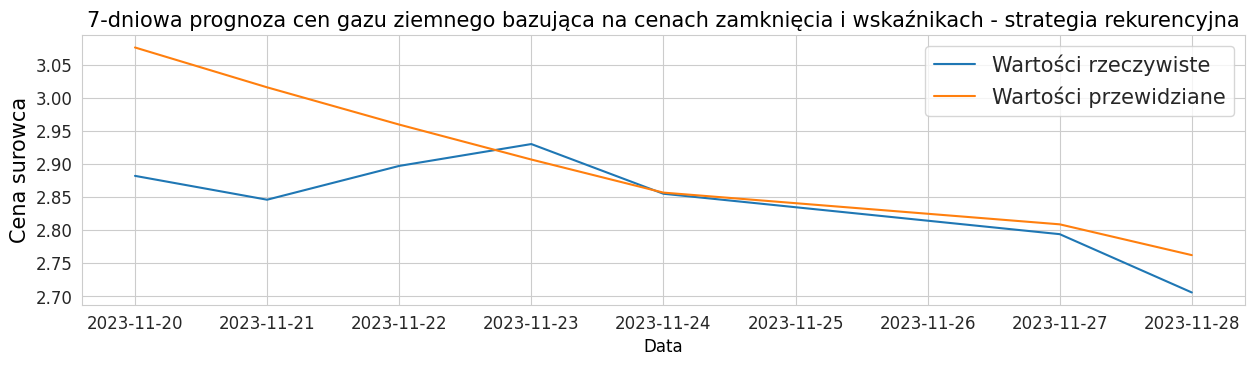

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,3.5))
sns.set_style("whitegrid")
plt.plot(df_final_prediction['Actual'].head(7), label='Wartości rzeczywiste')
plt.plot(df_final_prediction['Prediction'].head(7), label='Wartości przewidziane')
plt.title("7-dniowa prognoza cen gazu ziemnego bazująca na cenach zamknięcia i wskaźnikach - strategia rekurencyjna", color = 'black', fontsize = 15)
plt.xlabel('Data', color = 'black', fontsize = 12)
plt.xticks(fontsize=12)
plt.ylabel('Cena surowca', color = 'black', fontsize = 15)
plt.yticks(fontsize=12)
plt.legend(fontsize = 15);

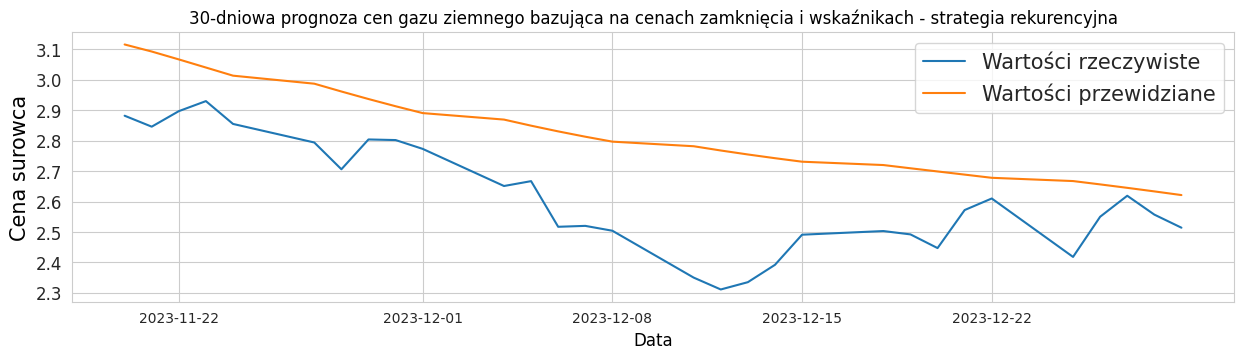

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,3.5))
sns.set_style("whitegrid")
plt.plot(df_final_prediction['Actual'].head(30), label='Wartości rzeczywiste')
plt.plot(df_final_prediction['Prediction'].head(30), label='Wartości przewidziane')
plt.title("30-dniowa prognoza cen gazu ziemnego bazująca na cenach zamknięcia i wskaźnikach - strategia rekurencyjna", color = 'black', fontsize = 12)
plt.xlabel('Data', color = 'black', fontsize = 12)
plt.xticks(fontsize=10)
plt.ylabel('Cena surowca', color = 'black', fontsize = 15)
plt.yticks(fontsize=12)
plt.legend(fontsize=15);